In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import TOFPET_cal_lib as TPcal

%matplotlib nbagg
%load_ext autoreload
%autoreload 2

In [3]:
filename = "/home/viherbos/DATA_daq/calibration_tpulse_allch_cold_nocompressor.h5"
with pd.HDFStore(filename) as hdf:
    print(hdf.keys())

['/ch0', '/ch1', '/ch10', '/ch11', '/ch12', '/ch13', '/ch14', '/ch15', '/ch16', '/ch17', '/ch18', '/ch19', '/ch2', '/ch20', '/ch21', '/ch22', '/ch23', '/ch24', '/ch25', '/ch26', '/ch27', '/ch28', '/ch29', '/ch3', '/ch30', '/ch31', '/ch32', '/ch33', '/ch34', '/ch35', '/ch36', '/ch37', '/ch38', '/ch39', '/ch4', '/ch40', '/ch41', '/ch42', '/ch43', '/ch44', '/ch45', '/ch46', '/ch47', '/ch48', '/ch49', '/ch5', '/ch50', '/ch51', '/ch52', '/ch53', '/ch54', '/ch55', '/ch56', '/ch57', '/ch58', '/ch59', '/ch6', '/ch60', '/ch61', '/ch62', '/ch63', '/ch7', '/ch8', '/ch9']


# DATA SELECTION

In [15]:
channel = 0
tac     = 2
tpulse  = 100
data = pd.read_hdf(filename,key='ch'+str(channel))
data = data[data['tac_id']==tac]
data = data[data['delay']==tpulse]

  # GAUSSIAN FITTING FOR SELECTED TFINE DATA

<IPython.core.display.Javascript object>


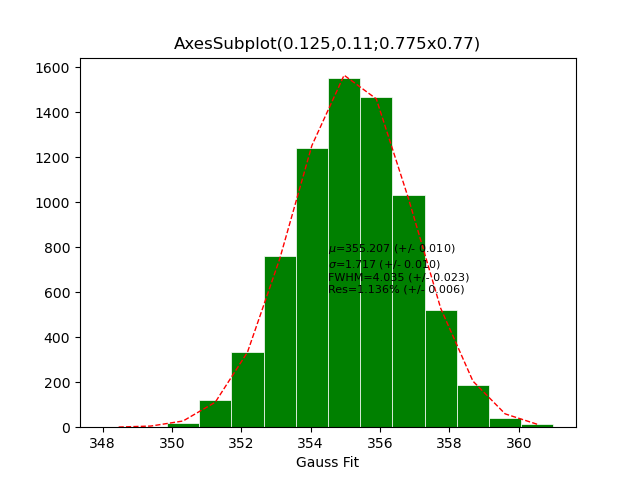

In [20]:
#for i in np.arange(0,360,10):
#    data_n = data[data['delay']==i]
#    coeff,coeff_err,chisq_r=TPcal.gauss_fit(data_n['tfine'],'sqrt',False)
#    print(i,chisq_r,coeff[1],coeff_err[1])
fig = plt.figure()
axis = fig.add_subplot(111)
coeff,coeff_err,chisq_r=TPcal.gauss_fit(data['tfine'],'sturges',True,axis,'Gauss Fit','','',[0.5,0.5,"left"])

# GAUSSIAN FITTING FOR ALL TFINE DATA

In [25]:
channels = range(0,64)
tacs = range(0,4)
res=[]
for ch in channels:
    data_ch = pd.read_hdf(filename,key='ch'+str(ch))
    for tc in tacs:
        data_tc = data_ch[data_ch['tac_id']==tc]
        # Blind fit
        for i in np.arange(0,360,10):
            data_fit = data_tc[data_tc['delay']==i]
            coeff,coeff_err,chisq_r=TPcal.gauss_fit(data_fit['tfine'],'stone',False)
            print(i,tc,ch,coeff[1],coeff_err[1])
            
            if coeff_err[1]>1:
                print("Fit failure")
            else:
                res.append([ch,tc,i,coeff[1],np.abs(coeff[2])])

df_tfine = pd.DataFrame(res,columns=['channel_id','tac_id','phase','mu','sigma'])
        

/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

0 0 0 244.35578479656235 0.6912391308692871
10 0 0 240.76818698523147 0.6892963875861032
20 0 0 236.22076633674493 0.7002752450725579
30 0 0 232.26527410235005 0.029994654131558034
40 0 0 226.34387757094697 0.31891675957055204
50 0 0 400.9478024534993 0.02934476869194845
60 0 0 395.5724003924465 0.7000254599733392


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

70 0 0 388.61076363698197 0.7335542662033283
80 0 0 385.6246466155768 0.6366737588489877
90 0 0 380.50105532054783 0.6669045919945502
100 0 0 373.0716217745449 0.6173061144378067
110 0 0 370.7276935704763 0.6739950411335078


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

120 0 0 366.5067349172397 0.6970363690947042
130 0 0 363.1877295815165 0.7201257834689532
140 0 0 355.8562473865193 0.7625154543638926
150 0 0 351.8875390764182 0.760776758062623
160 0 0 347.60241059777127 0.7442802268067579
170 0 0 340.7014471337122 0.7029238703530531
180 0 0 336.8860952058133 0.7045848731548523


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 0 0 332.1527698179291 0.7544993239856714
200 0 0 324.34129015074365 0.6543103036421973
210 0 0 321.8090716908794 0.7195535663470672
220 0 0 316.6159994230606 0.7394550376505111
230 0 0 308.862498617425 0.7328149345626839
240 0 0 305.65044031040526 0.6697779612111376


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250 0 0 302.4302578786173 0.7644088542095748
260 0 0 297.7056084189997 0.7035897454662441
270 0 0 289.42988865088313 0.6989064631751633
280 0 0 285.6931744939901 0.7308174419954108
290 0 0 281.6419114018925 0.6960040318087156
300 0 0 273.2024754567178 0.7400440551566103
310 0 0 270.45162159110606 0.7115426593007287


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

320 0 0 266.44341370372274 0.6489500080415657
330 0 0 259.2526281164636 0.703859043891763
340 0 0 255.40942800353665 0.7076480722772596
350 0 0 252.25358539127478 0.6829284453233475
0 1 0 229.49545804527816 0.6608672332210924
10 1 0 226.23565341542508 0.7062037606116541


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/s

20 1 0 220.8320070497908 0.7425168581961951
30 1 0 216.77394929673457 0.027606402753837512
40 1 0 387.37569209493404 0.26984651045100655
50 1 0 385.62584853817117 0.05759280518436015
60 1 0 380.5167093280994 0.6862191610466173
70 1 0 373.743706177906 0.737381758070659
80 1 0 369.8091925480464 0.7258197903450242


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

90 1 0 365.1305202846695 0.713711164285806
100 1 0 358.04980122161794 0.6427836263302255
110 1 0 353.55661415512174 0.6594343186849835
120 1 0 350.80916502642265 0.70312888386906
130 1 0 346.9928539245206 0.7198552323756656
140 1 0 339.3716306661898 0.7381843136030117
150 1 0 336.05194833245395 0.7035434164713458
160 1 0 332.6746368800255 0.6461992256815494
170 1 0 326.1441739827928 0.7121824992429802
180 1 0 321.4153307882511 0.7106485643312451
190 1 0 317.38932180218865 0.7797636649040728
200 1 0 308.6962701881239 0.7430096075064023
210 1 0 304.7675503085697 0.751048528013748


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

220 1 0 301.30904407157624 0.6804442089140498
230 1 0 294.51062764902133 0.7312939254919508
240 1 0 290.01999280972467 0.6646464154675018
250 1 0 286.0241965200987 0.6974554046811415
260 1 0 281.04700511389865 0.7338972503309789
270 1 0 273.5442024443787 0.6695405152435214
280 1 0 270.8659641686238 0.6989587214134695


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

290 1 0 266.12191226698735 0.6382270038006791
300 1 0 258.21172355837325 0.7146659220536002
310 1 0 254.0761158223967 0.7040301430149587
320 1 0 250.36219572941533 0.7005636451130115
330 1 0 242.97379661197147 0.7254176638354929
340 1 0 239.809567699254 0.7117910014662538


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((s

350 1 0 236.79330402711267 0.6878408395452681
0 2 0 226.73830985673666 0.6563997234180589
10 2 0 222.50556760212694 0.6422264214962302
20 2 0 219.03944860737275 0.6970513484469144
30 2 0 214.35345253961 0.029048178617532856


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

40 2 0 384.8674253705898 0.21264908274724764
50 2 0 383.0393412720402 0.016269034465542388
60 2 0 376.4916626099118 0.6258298976199465
70 2 0 371.45228855034156 0.7625377987066436
80 2 0 367.55557817768647 0.7504444907141523
90 2 0 363.03603227710903 0.6046512624495997


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

100 2 0 355.2494864826513 0.6840345706038687
110 2 0 352.20304377323333 0.6373803537337367
120 2 0 347.6486769028662 0.6519717642659557
130 2 0 345.6479247175922 0.7614429064079054
140 2 0 338.2274436432163 0.6751970899409183
150 2 0 333.6340667811171 0.7490097256450532
160 2 0 329.16086852344876 0.7586639106805406


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

170 2 0 323.06956853035837 0.719075257150348
180 2 0 319.4642043493553 0.7277058533548588
190 2 0 313.9278551071713 0.7028077994115084
200 2 0 306.70364680211065 0.7478286168067966
210 2 0 304.092954164287 0.7122320197426744
220 2 0 299.31048203486085 0.7169642416600945


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

230 2 0 291.5546911469812 0.6947930538925752
240 2 0 288.2506147961686 0.6275097975808982
250 2 0 284.2955287480039 0.7169055298946035
260 2 0 279.45221827241915 0.692995744757111
270 2 0 271.75404951688313 0.7160827866269386
280 2 0 267.9721105991167 0.7105758267110842


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

290 2 0 263.0242912478469 0.6704360290478066
300 2 0 255.6338759842169 0.7957731399292449
310 2 0 252.1064744848465 0.6997437783057506
320 2 0 248.27545083320655 0.695557160189559
330 2 0 241.41893583823568 0.6971058881334811
340 2 0 237.68783518399908 0.7242193257844212
350 2 0 234.12059197472465 0.6895731717436564


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((s

0 3 0 228.59677988975963 0.660308178230836
10 3 0 224.8364169955704 0.69645897345156
20 3 0 219.5514072749636 0.7162390934651003
30 3 0 215.7731991574838 0.7704807800768274
40 3 0 386.81727430584806 0.27036096197897114
50 3 0 384.89320327944625 0.032385878436152496
60 3 0 379.3025868898428 0.6327638555614575
70 3 0 372.853770237424 0.7150139886552266


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

80 3 0 368.2301049919422 0.7032835836342392
90 3 0 364.7975985168667 0.7058809712261122
100 3 0 356.9319038516878 0.6526897532250502
110 3 0 353.5567964793056 0.6684883456106798
120 3 0 349.7667941140252 0.6875527418802315
130 3 0 346.39634861215757 0.6730682436375943


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140 3 0 338.2860433195503 0.6797661873877927
150 3 0 334.8064770083776 0.7313829220212648
160 3 0 331.68467214457667 0.7432139604727741
170 3 0 324.9152533723889 0.7027002679168527
180 3 0 320.39017858474034 0.7207498169730321
190 3 0 316.1396794815823 0.6503233165962246
200 3 0 308.2299506927452 0.6490633365377934


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 3 0 304.44735999040364 0.7713929984164533
220 3 0 300.7683338584926 0.6943483692331065
230 3 0 293.35129010076406 0.7918126846768547
240 3 0 289.0639929126834 0.6440422221184
250 3 0 285.1066823044468 0.666979430430159
260 3 0 280.7495620839815 0.7391285179476564
270 3 0 273.3660205502866 0.6843884122822935


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

280 3 0 270.53636343500466 0.6546738949397046
290 3 0 265.5135063492984 0.6988134608684713
300 3 0 256.8201214083447 0.7578476354210043
310 3 0 252.8022877688322 0.6830411870586733
320 3 0 248.8159466079547 0.6475142597577562
330 3 0 241.86286659549887 0.7647986388300559


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


340 3 0 238.27493975099793 0.7236499042612407
350 3 0 235.78907788070381 0.6950196592304824


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 0 1 245.9047283650121 0.5977601560208662
10 0 1 242.90675688562575 0.6738363481279512
20 0 1 239.51936388221608 0.7385784281170373
30 0 1 236.65645915224977 0.6452979528998557
40 0 1 229.51215149512984 0.03652556371383134
50 0 1 392.9570185203281 0.0831037844918741
60 0 1 386.2708314941665 0.5696696168824528


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

70 0 1 380.74383211201183 0.6555053501108392
80 0 1 376.56487244237303 0.5860885864712119
90 0 1 373.26369326089895 0.6816638293543266
100 0 1 366.1316969371606 0.6625812308607202
110 0 1 362.46006414762206 0.6334830825991079
120 0 1 359.5554865637342 0.6507009555173116


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 0 1 356.6419048639579 0.635626376479668
140 0 1 349.2729578066283 0.7215312572717497
150 0 1 345.98227250357616 0.5433049580130274
160 0 1 342.7416343753241 0.6626615990402074
170 0 1 336.11012979943695 0.6018956159085121
180 0 1 332.0838568418223 0.6880336714934461
190 0 1 328.3314781007763 0.7480307430750821


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

200 0 1 321.56709356064056 0.6212096697997755
210 0 1 317.76432497937856 0.7042481818344604
220 0 1 313.72850792207737 0.7230895063973918
230 0 1 306.52161256535277 0.6885028677316595
240 0 1 303.24217512258724 0.6441816250783335
250 0 1 299.2016981236386 0.7700887915040362
260 0 1 295.5504010672677 0.7239247439911872


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 0 1 288.18952311502045 0.6911145867824655
280 0 1 284.85093928653873 0.7241595261651174
290 0 1 281.6822716966157 0.5903222344119554
300 0 1 273.20469350001264 0.6580781190107257
310 0 1 269.7794394047798 0.7184683963395989


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

320 0 1 266.9914542035043 0.5470976004321891
330 0 1 260.63451885290857 0.6965116504473559
340 0 1 256.478001293677 0.6281752229901222
350 0 1 252.43607088975315 0.6280956456465487
0 1 1 232.07498545437446 0.6220335149020101


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((s

10 1 1 228.45141317837533 0.7535342719209082
20 1 1 224.73072978995245 0.7511609018912584
30 1 1 221.41451255343824 0.6400897114771608
40 1 1 214.64899415567982 0.05003317018530485
50 1 1 375.47872342846216 0.39181740750121624
60 1 1 372.17537326218746 0.5471075597648858
70 1 1 366.6722669010487 0.6358645071431159
80 1 1 362.9901515430298 0.6964095728476624


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

90 1 1 358.7032990939345 0.7265483232040132
100 1 1 351.664566723364 0.6181621523275019
110 1 1 348.9800311989171 0.6979220489981485
120 1 1 345.27679011146955 0.7022819740853161
130 1 1 341.9528391590156 0.5334107435965744


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140 1 1 335.7301692922502 0.6140589531115829
150 1 1 332.15505548565415 0.6556440431399121
160 1 1 328.5124145295494 0.7308596780574567
170 1 1 320.4122688954678 0.7097952286483254
180 1 1 318.0802210568245 0.7487519609481602
190 1 1 313.6802142206518 0.7880807772744515
200 1 1 305.9488207287921 0.6362429374085832
210 1 1 303.46797670485176 0.7726309142205015


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

220 1 1 299.4751523286237 0.6730296876186743
230 1 1 292.31055533588096 0.6773562690039975
240 1 1 289.28293470969794 0.7821156363425746
250 1 1 285.6839954692206 0.7007074445522276
260 1 1 281.4781526488766 0.6612039345274381
270 1 1 274.3968151596131 0.7362009647656713


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

280 1 1 270.4864013839415 0.7446767188791762
290 1 1 267.13864558145633 0.6112509724096742
300 1 1 259.3414182398829 0.6917881872450232
310 1 1 255.62131921311578 0.6031963527422898
320 1 1 251.86367607005306 0.6240301007959572
330 1 1 245.91095660997243 0.6802089811566877
340 1 1 241.95870464218456 0.6488408601573911


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

350 1 1 237.2814050219078 0.575083276407215
0 2 1 226.48337694478388 0.6148923924600488
10 2 1 223.63360947789894 0.6552779417615222
20 2 1 220.44708590604392 0.6682178207529146
30 2 1 216.59660982389352 0.6688347614304296
40 2 1 209.21933543831287 0.08317085809629551


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

50 2 1 373.0062022286182 0.06633337238958639
60 2 1 367.1439407089342 0.5609571533342806
70 2 1 360.7530295030229 0.6576948647487525
80 2 1 356.6387425828147 0.6416609479677029
90 2 1 354.34624569502313 0.7287212125803101
100 2 1 345.79433379617274 0.7301089474547213
110 2 1 342.2135517768263 0.6016521449041909


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

120 2 1 339.8952172984017 0.7031723774268561
130 2 1 336.41710171368067 0.6650261990195641
140 2 1 329.24636885933506 0.7084587896773268
150 2 1 326.9217074571753 0.6483015814832357
160 2 1 323.17827392736217 0.7509734518907845
170 2 1 316.03734568422755 0.6959808404013464


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180 2 1 312.8421795661996 0.7196005557177849
190 2 1 308.4901963369357 0.756463475047462
200 2 1 301.81939367006476 0.6413679454641367
210 2 1 298.7442087794612 0.8180835519160683
220 2 1 294.1648458050626 0.7258893384519722
230 2 1 286.79369892740425 0.6215011650419738
240 2 1 283.56765374548115 0.6723213095698958


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250 2 1 279.5609208980255 0.7016837930870807
260 2 1 276.0284125335292 0.7016973754723613
270 2 1 268.728792133011 0.7216632462314165
280 2 1 265.49659226557617 0.7198321409850326
290 2 1 261.6409589819539 0.6074136626187493
300 2 1 253.54449234012765 0.7085432829127587


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 2 1 250.30922292430517 0.7158233009765372
320 2 1 247.48921693287994 0.6237477385306721
330 2 1 241.07068847897986 0.7162376993632741
340 2 1 236.32376802415456 0.599238452019548
350 2 1 232.4822831681841 0.6067401052122015


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((s

0 3 1 228.64613692867786 0.6843702859507909
10 3 1 225.27475344119003 0.7136238143089593
20 3 1 221.8044831466208 0.6308494719266755
30 3 1 217.82060263219387 0.6653445320946324
40 3 1 211.42622965590678 0.06849961459227853
50 3 1 373.71360231007816 0.44291904855428
60 3 1 368.6644028893502 0.6781475224275042


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

70 3 1 362.0238634861844 0.5639221105734326
80 3 1 358.7497243707877 0.696628109558877
90 3 1 354.9592433502871 0.7274622713262688
100 3 1 347.61172507465284 0.659713953004523
110 3 1 344.66667550117137 0.6612780326265556
120 3 1 341.63445829412944 0.6399483382731238


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


130 3 1 338.0152385007677 0.6944105087292584
140 3 1 331.7675100639283 0.5641209957831443
150 3 1 328.02384911537973 0.5956953427973385
160 3 1 324.1415977657154 0.7644988002052415


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

170 3 1 316.86315041240437 0.6248706678920796
180 3 1 314.04985668317323 0.7692037466682129
190 3 1 309.6039942044894 0.6927093831920836
200 3 1 302.72778270865786 0.6190746750588225
210 3 1 299.91725007667674 0.7305029904994474
220 3 1 295.6629254191465 0.6709271295612623


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

230 3 1 287.9864360012004 0.7374274439304083
240 3 1 285.21416792727234 0.6950459358866927
250 3 1 281.8182019283846 0.6793544901890015
260 3 1 278.04021800049225 0.7319710871048246
270 3 1 270.87093462622886 0.6571382047803813
280 3 1 266.69647999781273 0.6589102165948343


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

290 3 1 263.83369990226856 0.7307059383404262
300 3 1 255.7506709759226 0.6889992084489046
310 3 1 252.18968337800686 0.6318732543079102
320 3 1 248.11347776423233 0.6599797166943687
330 3 1 242.48295079050447 0.6893010737573576
340 3 1 238.79602461701057 0.6451969290521481


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


350 3 1 234.28337310553863 0.6577653284959549
0 0 2 233.15000246681961 0.698895907258954


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

10 0 2 229.62502703877192 0.7069959311993342
20 0 2 225.72469526521706 0.6632210663352861
30 0 2 221.74653177531127 0.018886781151358282
40 0 2 385.20320501695403 0.11349232369496726
50 0 2 381.31306482109414 0.018243686934720553
60 0 2 377.1528142849528 0.5431222620722427
70 0 2 370.2205880904785 0.6408766919910062


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

80 0 2 367.74498717362815 0.7795833577345739
90 0 2 363.0666893164647 0.614927747195108
100 0 2 356.383628585281 0.5386529035953737
110 0 2 352.6387352116857 0.700182110687902
120 0 2 349.6988925202017 0.707181258905993
130 0 2 346.42596081328986 0.6499382897931291


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


140 0 2 339.3821468435579 0.7931257490097262
150 0 2 335.8473102935443 0.7465432177883864
160 0 2 332.23659240054906 0.7222403529940993
170 0 2 323.9965800483683 0.8001079849254024


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180 0 2 320.97427901186825 0.57696918507222
190 0 2 316.9374852465141 0.6248380928982102
200 0 2 310.35416288142824 0.7015504205571745
210 0 2 306.1574495105719 0.6427621468133348
220 0 2 303.46093703355257 0.7035362898844035
230 0 2 295.56307583610715 0.6251391807690675


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240 0 2 291.49115139574957 0.6955433268598354
250 0 2 288.26349190799533 0.7466160033581778
260 0 2 284.7090478109338 0.7309998633541727
270 0 2 276.70708327882824 0.5934603017970015
280 0 2 273.5062682288307 0.7405324916245444
290 0 2 268.66587941336854 0.7075472795428203


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

300 0 2 261.78114595855914 0.6909724709680349
310 0 2 257.6535539692437 0.6827684692608175
320 0 2 254.32093728890325 0.7048116769553295
330 0 2 247.74381508477154 0.738568037430282
340 0 2 244.33372470276936 0.6834699002274991
350 0 2 240.39120478933327 0.6236934305295306


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

0 1 2 219.75216065201582 0.6628592021658852
10 1 2 215.65333803700835 0.6628940921649938
20 1 2 211.79186933888718 0.6834105150258614
30 1 2 207.27006313967138 0.02286506515603116
40 1 2 370.8142709484907 0.06979871903274158
50 1 2 366.4459211220833 0.055605929172125916


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

60 1 2 363.04412223180543 0.6075490820052551
70 1 2 356.6798848069307 0.6616607532775295
80 1 2 352.1370694446243 0.683674167683649
90 1 2 349.21868160687166 0.7328924766811937
100 1 2 341.70747069508866 0.612173647890057
110 1 2 338.76637038972007 0.6590475174995064
120 1 2 335.9754003685668 0.6527859172214346


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 1 2 332.47156046041016 0.7205664462243926
140 1 2 325.3353509867429 0.7382431903461527
150 1 2 320.94712381460465 0.7397963114900016
160 1 2 317.7882780602132 0.7432907123271061
170 1 2 310.74500646293586 0.6430724293331601


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180 1 2 307.2743395723443 0.7088876538210354
190 1 2 303.3378212805854 0.7351210686566908
200 1 2 295.75082331226685 0.6531542040319337
210 1 2 292.0039064839801 0.6818029279853746
220 1 2 288.3587445135764 0.7621819379601412
230 1 2 280.91956672004375 0.6223093839830525
240 1 2 277.94853603522154 0.7257367548245061


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250 1 2 273.6255837981572 0.6903851476907499
260 1 2 270.3804230220681 0.6361228996594855
270 1 2 262.5832760171327 0.6629998257585349
280 1 2 258.67691254942355 0.6819315966406828
290 1 2 254.53739320729517 0.7485955044313298
300 1 2 247.96791491430648 0.6622288147399076


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 1 2 244.33363553800294 0.6424266478065631
320 1 2 240.44956367203778 0.6432502632675743
330 1 2 232.65041441157237 0.6938330002943686
340 1 2 230.21213188251429 0.6167099106162072
350 1 2 226.02328600569183 0.5614871823265271


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

0 2 2 219.22684342317504 0.6782260265934231
10 2 2 215.26773814212325 0.6576386322287481
20 2 2 211.27444987697396 0.6440298797009738
30 2 2 207.44182989606514 0.02907004992375296


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/s

40 2 2 371.2819029475228 0.12294529488764544
50 2 2 366.7610399923978 0.04510506594769846
60 2 2 362.5514076854389 0.6632527670476996
70 2 2 356.2694886783203 0.6661965895972554
80 2 2 352.7511919015048 0.7186664556086266
90 2 2 349.0763360117249 0.6873129375872549


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

100 2 2 342.71075780362435 0.6866146163664995
110 2 2 338.93900388935094 0.7106234708279623
120 2 2 334.73990498080775 0.585347165239905
130 2 2 331.3105311599226 0.6620377836442763
140 2 2 325.7377952556505 0.6601394107391219
150 2 2 321.06185825851037 0.6875165121102543
160 2 2 318.1401432784694 0.7353721354367355


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

170 2 2 310.38594007898087 0.8116277765784958
180 2 2 306.9443209674687 0.5943674659054026
190 2 2 302.74121492542463 0.6717020119178998
200 2 2 295.6434509393326 0.7045040553168347
210 2 2 291.95337659518816 0.6973454850162739
220 2 2 289.5882278421239 0.7574398582876638
230 2 2 281.40790475479616 0.656785151021049


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240 2 2 276.45611153875427 0.6917802057832698
250 2 2 273.6453911523671 0.7126122300323225
260 2 2 270.35260141087497 0.6210820364855253
270 2 2 262.4202463397859 0.7033719445533707
280 2 2 259.2437175082732 0.7142005988153635
290 2 2 254.92059251876128 0.7111579743125189


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

300 2 2 247.23086192426328 0.6752676113922381
310 2 2 243.53607676113793 0.720737864489849
320 2 2 240.2739556593436 0.6799237465718041
330 2 2 233.29197593915083 0.6903586686171118
340 2 2 230.08144829486105 0.5563243503847736
350 2 2 225.85386154897265 0.662100547981925


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

0 3 2 219.30226997994055 0.6762409382600281
10 3 2 215.51161314618363 0.6903108533880055
20 3 2 211.50217126702958 0.717856674947391
30 3 2 207.33615374559102 0.021210957961999635
40 3 2 370.12318578604857 0.08155218985444983
50 3 2 365.71157481801646 0.030871262038383935
60 3 2 363.08354410397806 0.6783431676960444


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

70 3 2 356.8408302495367 0.7227621808539145
80 3 2 352.16347877893145 0.705880134067937
90 3 2 349.1440268181481 0.7540405441330339
100 3 2 341.094911764737 0.5786571930846784
110 3 2 339.054610559887 0.601999878227141


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

120 3 2 335.6479891400984 0.6541797939727616
130 3 2 331.77550874709937 0.6524709003952526
140 3 2 325.17403803076655 0.7472841039631604
150 3 2 320.9459554001198 0.7391615462593883
160 3 2 317.84560302385745 0.8049974462389412
170 3 2 310.965117955658 0.753323626353961
180 3 2 306.7692204925053 0.7422996772474958


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 3 2 302.3117269761858 0.6974923096936333
200 3 2 295.70393696318047 0.6858647456775216
210 3 2 292.06266706800994 0.6269124629671425
220 3 2 288.48025356691716 0.7101256897894154
230 3 2 280.65645746977145 0.6134457672590597
240 3 2 277.20423445786827 0.6331064811662573
250 3 2 274.0098927993101 0.6986503069876414


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

260 3 2 270.03290343229486 0.658777315878082
270 3 2 262.20714897693256 0.6347841149218806
280 3 2 258.3057490782641 0.687911190110068
290 3 2 254.44688970593987 0.8261130139464753
300 3 2 247.15765316597006 0.6874430350724202
310 3 2 244.4314316873144 0.6987938384638634


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


320 3 2 239.75562449365896 0.6938420970857953
330 3 2 232.50397070042317 0.6869913698777912
340 3 2 229.60495360063288 0.6486276711846799
350 3 2 226.18648459037178 0.6057129450566997


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 0 3 247.18099257986376 0.6912850526950409
10 0 3 242.59008851319098 0.7035890047333445
20 0 3 239.1499636862802 0.6642923097646297
30 0 3 235.54318911209714 0.6565355942755047
40 0 3 229.99771602324506 0.07432093441504749
50 0 3 393.9506765837981 0.22568927073037445
60 0 3 392.11735429673456 0.6668741256873111


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

70 0 3 384.966234858235 0.5775430028309356
80 0 3 380.97871128544267 0.6888371445463704
90 0 3 377.87003406380484 0.7407092018520981
100 0 3 370.059129900327 0.6973564707211614
110 0 3 366.83517252484785 0.7130574021440002
120 0 3 362.895284926324 0.6723570410584166


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 0 3 359.9910296560862 0.6427458289551633
140 0 3 353.0220844504272 0.6932708366012069
150 0 3 349.07548822755814 0.662873257758154
160 0 3 345.4454116539443 0.6054254430273194
170 0 3 339.0006098294671 0.6355259034079415
180 0 3 334.6900569352182 0.632606856433997


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 0 3 331.58154625737893 0.7090986526603869
200 0 3 324.6292001037785 0.6537599526383229
210 0 3 319.6043575192739 0.6638722821566352
220 0 3 315.6879298282471 0.6789531199251196
230 0 3 308.71779252016455 0.7339624074898081
240 0 3 304.85966923702347 0.5800486483532425


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250 0 3 300.5918593867176 0.6467475442962334
260 0 3 296.93345850909367 0.6873424208237797
270 0 3 290.50207593215913 0.6563922067879592
280 0 3 285.8862887135567 0.6928071541864148
290 0 3 282.06911367317275 0.7573385193769765
300 0 3 274.0255993955563 0.7067457808445006
310 0 3 270.4923861835028 0.716242981932068


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

320 0 3 267.5668237269097 0.6517703010356646
330 0 3 259.7060615008737 0.5993795189606435
340 0 3 256.61049871158167 0.7011834764773849
350 0 3 254.1296152805544 0.64367189437034
0 1 3 230.57621437112837 0.6280907324979295
10 1 3 226.38083283903202 0.691241530237949


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

20 1 3 222.49403444171324 0.7549824754293385
30 1 3 219.29118523153818 0.022644443930222306
40 1 3 213.37486773006043 0.10466730911806181
50 1 3 378.06844351256103 0.01734489910743697
60 1 3 376.5359598853248 0.7024903745800575
70 1 3 368.6591722638516 0.723967726654791


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

80 1 3 365.83729428399363 0.6688931743789261
90 1 3 361.28522856879704 0.7065416563194148
100 1 3 354.5601253868419 0.6910792047771062
110 1 3 350.50147505325975 0.5946459817181275
120 1 3 347.4318726522684 0.7283416904135177
130 1 3 343.5750302861764 0.6797230243065593
140 1 3 336.4877441874281 0.7458922020649181


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

150 1 3 333.3532754017019 0.6056872990734617
160 1 3 329.9693573695037 0.6562681958071329
170 1 3 322.6212500772922 0.7807099851628292
180 1 3 318.8428718866652 0.66731365619171
190 1 3 314.6605049239091 0.6575500963545867
200 1 3 307.9990156493505 0.7894733384631173


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 1 3 304.47909240100375 0.6629160621126173
220 1 3 300.0602515261116 0.6607370103006295
230 1 3 292.5262740181306 0.7198660421913972
240 1 3 288.8759780958107 0.6322325974033429
250 1 3 285.2147047211417 0.6210333331770068
260 1 3 281.23251135588856 0.6585123316360819
270 1 3 273.5991180119586 0.6589395804816471


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

280 1 3 269.84081776991457 0.6804172787257657
290 1 3 267.23773819713875 0.7563733126594685
300 1 3 259.0856121293464 0.6765031139127866
310 1 3 254.7486757949197 0.5966268391257091
320 1 3 251.34534341563423 0.6186419146553465
330 1 3 243.83159347798681 0.5878333342826332


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

340 1 3 240.79359450083166 0.6771218880926767
350 1 3 237.77801345775762 0.7365376769574375
0 2 3 231.37469842028375 0.6169919270247246
10 2 3 227.45609887504247 0.6998214050762481
20 2 3 223.36760304306813 0.7183439910252796


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: Runtim

30 2 3 220.42569963750915 0.03206075259898287
40 2 3 213.98803073985053 0.23783009430245503
50 2 3 377.87708859101105 0.08680558733761637
60 2 3 376.24911350186846 0.6611406791166277
70 2 3 369.34035908843043 0.5648745311195925
80 2 3 366.04519306463754 0.6778906615478633
90 2 3 361.7753785214481 0.7356029910549757


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

100 2 3 354.8893037039388 0.6760979503158332
110 2 3 351.8360901075957 0.682577396776337
120 2 3 347.58111706875115 0.6557074310727312
130 2 3 345.0467587366455 0.6758977866474113
140 2 3 337.9492295071568 0.7623468166907014
150 2 3 334.1157470731509 0.6647449720022076


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

160 2 3 330.20926692637175 0.6106258423690614
170 2 3 323.2952201520484 0.714232191288069
180 2 3 319.29471898514544 0.6147141549857109
190 2 3 315.697937254484 0.6100259222445082
200 2 3 308.8189245721638 0.649016658647388


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 2 3 304.5413867769472 0.6739069651428764
220 2 3 300.42467959902524 0.5519378707146373
230 2 3 293.18274170393045 0.6816014643795906
240 2 3 289.8085939209664 0.6418577244927605
250 2 3 284.59879204394485 0.6546525931303054
260 2 3 282.01738325259004 0.7607341814726738
270 2 3 275.1447488332249 0.6399986557571259


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

280 2 3 270.4906616062285 0.7177144092808956
290 2 3 266.8158930019957 0.8111199325429017
300 2 3 258.4463723247175 0.6950426952866186
310 2 3 254.54888693082313 0.6969960178900203
320 2 3 252.27691968075396 0.7195146512028958
330 2 3 244.4842571746962 0.6024825078430509
340 2 3 241.5394646092283 0.7249660915932665


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

350 2 3 238.95956761690798 0.6058861371735834
0 3 3 230.84356957802746 0.6296048772459595
10 3 3 227.12022429872152 0.721139386678585
20 3 3 221.97905706325446 0.7641419842965113
30 3 3 219.99518990449826 0.6561896825133912
40 3 3 383.5444256033413 0.3882034659671922


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

50 3 3 377.44963888935564 0.03408231813913373
60 3 3 376.0709637675645 0.687521450934274
70 3 3 369.1218412276112 0.72972621238797
80 3 3 365.48077690377886 0.6605641670813688
90 3 3 361.20224015217195 0.6584810530981517
100 3 3 353.7860214600059 0.6663096980039669
110 3 3 350.2822445837684 0.585344973297366
120 3 3 347.74227297281874 0.6890622118769517
130 3 3 343.51870911775126 0.6952221043073804
140 3 3 335.8917660703219 0.6021221907185418
150 3 3 332.56098762263025 0.7671649101998185


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

160 3 3 330.32095096436353 0.6377343712450877
170 3 3 322.582849629489 0.719309969448712
180 3 3 318.90843928790196 0.6411771377144628
190 3 3 315.24407407145793 0.6099338566383469
200 3 3 307.3266621523102 0.7477818145260291
210 3 3 304.03210108367483 0.7147362505776883
220 3 3 299.8091237745901 0.710584304867437


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

230 3 3 293.0065680681673 0.7165528349992486
240 3 3 288.4713849880246 0.6385884265878384
250 3 3 285.1042410092447 0.6059749900481525
260 3 3 281.11454961188645 0.6638341210918951
270 3 3 273.94488003483315 0.6627796773854377


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

280 3 3 270.0627238860485 0.6779281111511637
290 3 3 266.6291785949728 0.7139564041243687
300 3 3 258.424215751437 0.7668076940097859
310 3 3 254.9908589130995 0.6896993899529746
320 3 3 251.54491847962967 0.6779618172367515
330 3 3 244.39880821269594 0.6082236053809142
340 3 3 241.03672124952018 0.6597197082185375


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

350 3 3 237.49415046458577 0.693372857560066
0 0 4 244.12362478653102 0.5920824486439111


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((s

10 0 4 240.4004200250399 0.8041615118609197
20 0 4 236.995400522305 0.7970597904167428
30 0 4 233.0478656397888 0.6018877136023685
40 0 4 225.91017978425924 0.0318560106595265
50 0 4 390.342393436475 0.04189715661858741
60 0 4 387.420417343133 0.6409047834478664
70 0 4 380.7661980398229 0.7678308997291948


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

80 0 4 376.1330754076913 0.7274639895069245
90 0 4 374.16835828486614 0.586020776954141
100 0 4 365.76189934463025 0.7080767833479251
110 0 4 363.1582098518318 0.5847396873402693
120 0 4 359.76054400911346 0.6938451720635053
130 0 4 355.7131146801469 0.7067965303446614


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140 0 4 349.8602399745743 0.6492714763564605
150 0 4 345.06077155535144 0.7386119935413832
160 0 4 342.9528276485263 0.7946987796743584
170 0 4 335.44339961552873 0.654919990434529
180 0 4 331.41092429408087 0.7156373550956081
190 0 4 328.7920224844983 0.6739629472245069


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

200 0 4 320.6937180249309 0.743335510458238
210 0 4 317.37885559570435 0.722397873700566
220 0 4 313.3049425462148 0.6435984324509959
230 0 4 306.2156454450023 0.7304506962818791
240 0 4 302.38509234394485 0.6452240645519408
250 0 4 298.3133955885953 0.7063249621877871


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

260 0 4 295.1043867503288 0.6569533699038511
270 0 4 287.14567538409244 0.7358415099051593
280 0 4 283.3158318931865 0.7064237556355282
290 0 4 279.87714507659894 0.663445036544723
300 0 4 272.397082031094 0.6934007482231388
310 0 4 268.5774660972351 0.5603975593930947
320 0 4 264.8475122895979 0.6416993943839888


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

330 0 4 258.6193446959494 0.6336092365165102
340 0 4 254.9998255318121 0.6608867968280198
350 0 4 252.17899377018094 0.6897354225365492
0 1 4 227.9733918903824 0.6252090162136068
10 1 4 224.42463600725128 0.624653632024285


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((s

20 1 4 220.12757360231902 0.7210657894453636
30 1 4 217.5679404054475 0.6791757137696566
40 1 4 209.92286191072816 0.0184416875529869
50 1 4 374.0394484779392 0.08059428162091255
60 1 4 371.23623218877344 0.005173590948695266
70 1 4 365.00316331438484 0.71713924467573
80 1 4 360.76621041074924 0.6937481998360023


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


90 1 4 357.7929988118684 0.6940712404449869
100 1 4 349.5387135479975 0.578235527237378
110 1 4 347.5526820616201 0.7323532827550712
120 1 4 343.41455713179374 0.6469879339144533


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 1 4 339.96369909966404 0.7234356595274505
140 1 4 334.04034227250344 0.656297688570734
150 1 4 329.23896427793034 0.690423032154856
160 1 4 326.3322932586326 0.7820289950372954
170 1 4 320.0858604233508 0.6824515221724927
180 1 4 315.6059487817232 0.7203430573735907
190 1 4 312.0904565110251 0.8527937362536927


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

200 1 4 303.9694688509177 0.6308827386756067
210 1 4 300.90215366467095 0.6904930883684717
220 1 4 296.2835912955658 0.7432525146656886
230 1 4 289.4324021659624 0.6385611041559447
240 1 4 285.8493389050213 0.7238019070428827


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250 1 4 282.4272895281429 0.7400171587043279
260 1 4 278.7190611936892 0.6959931648845481
270 1 4 270.5888921910168 0.7355417802402306
280 1 4 267.55348499501 0.7316843362840436
290 1 4 263.0771338027966 0.7094886567251671
300 1 4 255.4958546414471 0.6301324568079361
310 1 4 253.10046701479635 0.6686756875070676


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

320 1 4 248.73887361638415 0.5657524977512002
330 1 4 241.78268401952235 0.7827898294513173
340 1 4 238.4408597413344 0.5878418103426534
350 1 4 235.3480917832576 0.6246333049797439
0 2 4 226.2753460603776 0.7209665977068285


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((s

10 2 4 223.31004889285353 0.6811051528007371
20 2 4 219.36720932183823 0.6131233666196533
30 2 4 215.19726298911777 0.6419242332234628
40 2 4 208.87497572691387 0.03954109570258999
50 2 4 372.3311600883406 0.07398156841125782
60 2 4 370.4309502061955 0.010273726496223684
70 2 4 362.5927066097861 0.7117791573242397


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

80 2 4 358.8816430989859 0.6250660884172197
90 2 4 355.80595453161743 0.748975904744475
100 2 4 348.8154467493923 0.5831651524919825
110 2 4 345.2140185087309 0.643805204328233
120 2 4 342.6308283336903 0.6820343182549387
130 2 4 338.7721084186497 0.6161997547374057
140 2

/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

 4 331.5370026101234 0.7550291812736487
150 2 4 327.013200678117 0.7094117662201993
160 2 4 325.71802191477514 0.8426234808249775
170 2 4 317.79358752969296 0.6673808370490416
180 2 4 314.0307208250527 0.6520748953318528
190 2 4 311.4166282795166 0.7641396467644285
200 2 4 303.2799734536802 0.6151861571318823


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 2 4 299.6575555289166 0.5210512187303672
220 2 4 294.8505187212723 0.6814792515427668
230 2 4 288.32514430584365 0.6506701687276432
240 2 4 284.8757433501033 0.6641621007095667
250 2 4 279.7523664409301 0.636298465322095
260 2 4 276.9924480071194 0.7915748543841701
270 2 4 269.47829360116395 0.5887747353510963


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

280 2 4 265.73140900425744 0.7473362719283018
290 2 4 262.92401659127023 0.7026813334742337
300 2 4 255.1206571875581 0.6816223058155111
310 2 4 250.779172362752 0.678489980665193
320 2 4 247.60047252677157 0.6433247803278955
330 2 4 240.37636190284408 0.7186743345433227
340 2 4 237.54422845789884 0.6755373416328945


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

350 2 4 234.32537472304858 0.5898354893501488
0 3 4 228.50650110003798 0.5997223576117189
10 3 4 225.68611524759206 0.7926934781043111
20 3 4 220.38341310867472 0.6939900025383187
30 3 4 218.42464047280055 0.6254843373384705


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/s

40 3 4 211.0027938508386 0.03388834909436069
50 3 4 374.50627611496736 0.1313583971674672
60 3 4 371.4878952923283 0.6649075941544903
70 3 4 365.6367205053716 0.6870709784401471
80 3 4 361.8694580755074 0.7360585734647486
90 3 4 358.7494763097794 0.641046039012068
100 3 4 350.15985159032175 0.6696622742068477


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

110 3 4 347.75831399277433 0.6351290807708936
120 3 4 344.33426539946225 0.6620479893385398
130 3 4 340.6557907613367 0.694677163848957
140 3 4 334.1512219019517 0.5928736197596067
150 3 4 329.75782622883577 0.6696374342377291
160 3 4 326.8373812682793 0.7766380841726541
170 3 4 320.13411315847975 0.7201204818594739


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180 3 4 316.048157067206 0.787268020913967
190 3 4 313.20000685582994 0.7547468796737652
200 3 4 304.0137724993882 0.604576258402776
210 3 4 301.7450184727834 0.7527084318663076
220 3 4 297.72404100234223 0.6364039027734959
230 3 4 290.76609420227885 0.7433677200825357
240 3 4 286.2795408169007 0.6743165093254675


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250 3 4 283.08136193272037 0.6536768625613188
260 3 4 279.01223062265547 0.6015513378754179
270 3 4 271.5829596244812 0.7400673344209278
280 3 4 267.5991727251817 0.6552325826943507
290 3 4 264.0009495075755 0.5582738610269424
300 3 4 256.13152176519196 0.7279891225989537


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 3 4 253.55350375747395 0.6207842126506403
320 3 4 248.98942017934414 0.5494234880433866
330 3 4 241.90324890770876 0.7724237768812723
340 3 4 239.42203895133764 0.615571884832168
350 3 4 236.64880094926914 0.746561013759082


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

0 0 5 254.8969869692275 0.7451429378935928
10 0 5 251.83410904592046 0.6807152586384071
20 0 5 247.53163348011222 0.6395698605581344
30 0 5 243.0390136402385 0.025786649163650963
40 0 5 237.96640854126758 0.3459520447453518
50 0 5 406.2090496741526 0.05836334092312493
60 0 5 403.63594807217294 0.6936117729833565
70 0 5 396.1805619813022 0.7175217033361162


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

80 0 5 392.4796671106307 0.6647014221928201
90 0 5 388.18388012941404 0.6249781412901306
100 0 5 380.5408026483568 0.7656885708184862
110 0 5 377.01700813460417 0.6513667072032403
120 0 5 373.922248097015 0.6764293675801487
130 0 5 371.2561211463491 0.6280351119899134
140 0 5 363.52742154310806 0.7292255851930033


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

150 0 5 360.0843350236632 0.8320535848663968
160 0 5 356.326844592504 0.7977135723266663
170 0 5 348.64707560483845 0.5806196445112484
180 0 5 345.6061101379823 0.6895517428075393
190 0 5 341.00876663709005 0.6308721293308329
200 0 5 332.39139664402086 0.6739724295974655


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 0 5 330.17795356335773 0.7403323267645602
220 0 5 325.50269505500444 0.7141008591055268
230 0 5 317.8846389291475 0.5657758235355014
240 0 5 315.24624745359966 0.6362741344239505
250 0 5 310.8399038354503 0.7461844470319366
260 0 5 307.1410568579801 0.7041231267344833


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 0 5 298.3391256705883 0.7051333563474239
280 0 5 295.8515771084062 0.7260611995790283
290 0 5 291.7335086481957 0.7340976043383823
300 0 5 283.81797457299 0.6660741787127928
310 0 5 279.9119793374978 0.6752219112777129
320 0 5 276.48709474091294 0.7071985334018278


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

330 0 5 267.8693896532906 0.5636715860253996
340 0 5 265.8153409745549 0.7077300539724926
350 0 5 261.7973434192013 0.6811396382903326
0 1 5 237.81080779649525 0.628986819541818
10 1 5 233.80266872387773 0.6985597956745381


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

20 1 5 229.76683078521708 0.7220574700461334
30 1 5 225.64679756572949 0.022421109397641244
40 1 5 393.43167042872886 0.10124083960297581
50 1 5 388.38961157578643 0.11700664885044884
60 1 5 385.37787632046917 0.7604790340403077
70 1 5 378.9532244460225 0.7322829483646665
80 1 5 375.8865475492767 0.7418634019436523


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

90 1 5 370.87597886345765 0.7116831791260338
100 1 5 363.7095812180922 0.6336629885419517
110 1 5 360.46148154618754 0.7394618397655948
120 1 5 356.93219466738736 0.6431176888765393
130 1 5 352.80837458015026 0.6934696972667265
140 1 5 346.09360642363185 0.7034750090565338


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

150 1 5 342.78039937090654 0.7278014779043607
160 1 5 338.7344199034275 0.6804846153351889
170 1 5 331.79817602519745 0.6988757204919958
180 1 5 327.68980720482136 0.6353151250024314
190 1 5 323.44555543255626 0.7020009297215125
200 1 5 316.1524811827549 0.7069314662191609
210 1 5 312.3058749419526 0.6710434169719226


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

220 1 5 307.965362003884 0.6715906927715871
230 1 5 300.716664474553 0.7065601118526373
240 1 5 297.24310074562857 0.6668388420451286
250 1 5 292.8555342628186 0.7129645611607615
260 1 5 289.0289997117587 0.6834763322017432
270 1 5 281.8919079693855 0.6268399795480964


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

280 1 5 277.591854773536 0.6089248978553579
290 1 5 273.9353139169917 0.737054296284912
300 1 5 266.2362822821263 0.7424462167444117
310 1 5 262.743218457675 0.6675253837520053
320 1 5 259.0613180824033 0.7452564982534846
330 1 5 251.67493151325004 0.6351386145472468


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

340 1 5 248.17609153226482 0.6265901263185737
350 1 5 244.40373670295006 0.6901544502177859
0 2 5 237.4920476047598 0.6135531120565222
10 2 5 233.5694545689431 0.7104509437582828
20 2 5 229.7093351021451 0.687869591977865
30 2 5 225.30555124771257 0.023462010539020563


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/s

40 2 5 220.3009371105979 0.15573387581079412
50 2 5 388.22654426669936 0.2134069825332026
60 2 5 386.0458728137694 0.6956876231035077
70 2 5 378.93309795812235 0.5548962365416461
80 2 5 375.3314684390483 0.775203883526387
90 2 5 370.7341433730859 0.698265894771288
100 2 5 363.5673018996458 0.6473865488839057
110 2 5 360.2527222355431 0.7527948512791567


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

120 2 5 357.3988967865894 0.6852343966596345
130 2 5 353.1557945968216 0.5868710449377649
140 2 5 346.1211170219741 0.7423572619524922
150 2 5 342.94462938971583 0.6732689484937647
160 2 5 338.0796085871379 0.6410759890368075
170 2 5 331.9722127486349 0.647056771333047


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180 2 5 327.47594880009456 0.5751675295203429
190 2 5 323.07270593882055 0.5705484338090983
200 2 5 315.527852482418 0.7349363545984037
210 2 5 312.27492668259373 0.6511323335561299
220 2 5 307.74286112069564 0.6444588978730211
230 2 5 300.626102778922 0.7433347782983848


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240 2 5 297.24391081008116 0.7200693825452301
250 2 5 293.20667327360843 0.6334863252720193
260 2 5 289.6700271610317 0.7382502498016587
270 2 5 281.13109461072924 0.7080953684313267
280 2 5 278.45799069093823 0.7126408049315512
290 2 5 274.1312517787008 0.6885043088138871
300 2 5 266.1847975065936 0.6989295535942104


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 2 5 262.32887323264987 0.688774542676276
320 2 5 258.31028158343486 0.7295787133368402
330 2 5 250.98202710557254 0.7322876682934821
340 2 5 248.32633339240297 0.6305994970706129
350 2 5 244.2660470647866 0.7000780314367286
0 3 5 236.7794784111196 0.6846048191368388


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

10 3 5 233.0832817994533 0.639794019975083
20 3 5 228.3269773620793 0.5682111974368301
30 3 5 224.6725225299651 0.020779478114951414
40 3 5 394.2910325504812 0.24840640194054914
50 3 5 388.73462722603216 0.17548947608945223
60 3 5 385.4939739384809 0.7300073458099786


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

70 3 5 378.6108920531856 0.6660314305886367
80 3 5 375.84542537460885 0.762468032367069
90 3 5 371.3684078538298 0.6963093190481341
100 3 5 363.685628878998 0.7876427847875727
110 3 5 360.06908640409114 0.677942939333974
120 3 5 356.70977956100467 0.6586996365806945
130 3 5 352.66221531539884 0.668858911799161


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140 3 5 345.9102919123496 0.7236110200808544
150 3 5 342.9025121177594 0.6681630319790032
160 3 5 338.47844707783656 0.7385266303687944
170 3 5 330.891843562263 0.7538704778933653
180 3 5 326.78992039780104 0.6737204557239621
190 3 5 323.50740879059606 0.6628671559772517
200 3 5 316.12416979190436 0.7368682381235319


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 3 5 311.27370029220964 0.7011056218971975
220 3 5 307.94888889970827 0.6155531024914829
230 3 5 300.03678130549434 0.7081033896741579
240 3 5 296.25691078952474 0.6936593688676245
250 3 5 291.9304279620585 0.6614289086541435
260 3 5 288.90031098205634 0.7093168292396398


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 3 5 281.08109316773255 0.7305446090715156
280 3 5 277.24380725119596 0.6206366924665627
290 3 5 272.7387045628905 0.6795199654866825
300 3 5 265.9954934993999 0.7096107227611262
310 3 5 261.7460722776444 0.7170605894697585
320 3 5 258.1805230307066 0.6645631671842971
330 3 5 250.5482034214263 0.7250013931634385


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


340 3 5 247.61239488003858 0.6014066913433058
350 3 5 243.23693563585124 0.6093741702731829


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

0 0 6 234.9206884879821 0.6669479929847454
10 0 6 231.5107109752831 0.6539880489331745
20 0 6 227.37628027883906 0.6287929003753405
30 0 6 224.19374999460567 0.010320985863866022
40 0 6 385.34347655860006 0.04712602717657496
50 0 6 381.26612352610266 0.14170379837302965


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

60 0 6 376.8557187383456 0.5312522382035105
70 0 6 370.7802130176374 0.665448456309485
80 0 6 366.8389619739009 0.6622544297365315
90 0 6 364.04227393871406 0.7662979711013082
100 0 6 356.5052275793762 0.6638608113944166
110 0 6 352.7824915939381 0.7125352173198225
120 0 6 350.380351163219 0.6324360020724511


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 0 6 346.12400636477753 0.562756608046492
140 0 6 339.0086676274327 0.7717504708275029
150 0 6 335.9136205465115 0.6155432288106815
160 0 6 332.006029690692 0.6922937097643042
170 0 6 325.0404632532546 0.7782777903617314
180 0 6 321.97444443333575 0.6677745066591623


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 0 6 317.69412918199026 0.7633915563467499
200 0 6 310.0959489237307 0.7325827040476616
210 0 6 306.5979374810123 0.6276852374338938
220 0 6 303.14835534393075 0.7682631913115575
230 0 6 295.7638497775355 0.5598687396476336
240 0 6 292.70192712809336 0.6553580152650742


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250 0 6 288.16970433743825 0.7232631300185404
260 0 6 285.0956481607685 0.7126971870879348
270 0 6 277.24469810734604 0.6972977037680583
280 0 6 274.1208606062449 0.7272545529312047
290 0 6 270.10398899147805 0.7532533204811814
300 0 6 262.51561617564124 0.7538726553767092


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 0 6 259.6834883533266 0.7165419440611419
320 0 6 255.97889989686084 0.6619414754406832
330 0 6 248.82780229471282 0.7094999165210325
340 0 6 245.7521123366063 0.6767283346219499
350 0 6 242.84468427298046 0.6796215222824081
0 1 6 224.4752102268395 0.7535584006139388


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

10 1 6 221.17957659152955 0.6210605076292767
20 1 6 216.68037760842066 0.6502923770420126
30 1 6 213.29680452030655 0.03164678551558016
40 1 6 375.2437072940691 0.037407459252325845
50 1 6 372.228880357255 0.0654445052498522
60 1 6 366.0760628892067 0.5432235471679777


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

70 1 6 360.81887197198836 0.6584024661918959
80 1 6 356.2848535502894 0.5805802355253807
90 1 6 352.58425684363255 0.7218214345204462
100 1 6 346.9379567105114 0.5910792962134834
110 1 6 343.0034216020792 0.7433883400298871
120 1 6 339.68944066763385 0.6632470064022001


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 1 6 336.3488500538751 0.6042248674752927
140 1 6 329.52247008381863 0.7601096663409538
150 1 6 326.29161149606244 0.6583904350334385
160 1 6 321.71043502824324 0.6836316002459152
170 1 6 315.27343944509477 0.7172727409554959
180 1 6 312.1552413813547 0.6834599927969952


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 1 6 307.6967322479503 0.6430649014535748
200 1 6 300.6557358050182 0.6413071745939054
210 1 6 296.6404788791105 0.6123820258103346
220 1 6 293.62136565863193 0.7860732761459122
230 1 6 285.583336145036 0.6951832696134228
240 1 6 282.47885500277164 0.6191350137835627


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250 1 6 278.8980824880504 0.7244791682685442
260 1 6 275.50767218913535 0.6151005496744858
270 1 6 267.74431871031265 0.6907204476179613
280 1 6 263.73191934287155 0.7361083680765944
290 1 6 260.07792785413136 0.762245858292979
300 1 6 253.44501853599698 0.7751372837710684
310 1 6 248.61024263912842 0.7001892197767908


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

320 1 6 245.550187160006 0.6832857046212277
330 1 6 237.9517766724731 0.6925769955942762
340 1 6 235.83075702709795 0.6062811062547716
350 1 6 232.26641665491667 0.6021435990393709
0 2 6 225.41099713195922 0.6285843876832469


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

10 2 6 222.15334107144437 0.6289285357194041
20 2 6 217.2445484558162 0.6737476609264228
30 2 6 215.1084899967023 0.06670352577337388
40 2 6 375.514266274824 0.03301672819118748
50 2 6 372.91888822633905 0.12641467331701023
60 2 6 366.9519930904095 0.6060027860283398
70 2 6 360.334655552739 0.7188364818055034
80 2 6 357.10260034003386 0.6811032817097276


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

90 2 6 354.0703102394735 0.7239086724364212
100 2 6 346.60035342919963 0.6049417311875568
110 2 6 343.20810845139056 0.6833019274663327
120 2 6 339.65607920080174 0.6652176775491762
130 2 6 335.83532195994576 0.5374455128079907
140 2 6 329.32280901800846 0.7695489265804277


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

150 2 6 325.96826137795995 0.6800310227502906
160 2 6 322.32467218557287 0.668894588758059
170 2 6 315.1291200589109 0.7511884600052823
180 2 6 312.28257716698823 0.640152139520787
190 2 6 307.25228904614227 0.6972530342087458
200 2 6 299.3694983410825 0.7334318587365989
210 2 6 297.16466176026057 0.6879821533384926


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

220 2 6 293.3067597316325 0.7405975334031392
230 2 6 286.2324045529814 0.6188151744596105
240 2 6 282.54281510345953 0.6811924070701368
250 2 6 278.0373925385087 0.7397831236803167
260 2 6 275.02550322275385 0.6565785837447302
270 2 6 267.2395242004468 0.6919862318036627


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

280 2 6 264.3803464614548 0.6429673236448827
290 2 6 260.4254940662332 0.7988272588354918
300 2 6 252.88456390092415 0.7944157740365925
310 2 6 249.76980497814188 0.6331925056363786
320 2 6 246.4732674586474 0.615928970508837
330 2 6 238.51453678709416 0.7061066369133702
340 2 6 236.17026016222079 0.5783268410139069


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((s

350 2 6 232.985811277974 0.7153002242107778
0 3 6 220.89782243895846 0.597761772856286
10 3 6 217.42528625181077 0.7146457900984904
20 3 6 213.53888675567134 0.7902524869270697
30 3 6 209.93778695932255 0.017916379887475953
40 3 6 372.2509074175038 0.028426162517450046


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

50 3 6 369.5765942482825 0.27161336488673254
60 3 6 363.142060370085 0.5967711663287689
70 3 6 357.20048898546196 0.7171815321995685
80 3 6 353.4878565310108 0.7397640231153132
90 3 6 350.2562318503971 0.7027752206702695
100 3 6 343.4483494394358 0.6156012019042331
110 3 6 340.53521511415676 0.6632052138694525


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

120 3 6 336.3251574838727 0.5670351149631655
130 3 6 333.6507381136257 0.6833053975843001
140 3 6 325.68050472317225 0.6695552271422882
150 3 6 322.41729801723784 0.7183114672062458
160 3 6 318.98156088022535 0.6964009031433873
170 3 6 311.51450771341115 0.6955166305416425
180 3 6 308.6136434780895 0.72031960161693


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 3 6 305.1575690577366 0.7326940521307584
200 3 6 296.734005058496 0.5999658194326608
210 3 6 293.24002040982487 0.6842152669041117
220 3 6 290.3393495363825 0.6706739492479405
230 3 6 282.4092624029403 0.6374168268625833
240 3 6 279.1515862514002 0.6555373346944625


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250 3 6 275.4460532772296 0.6050085752145458
260 3 6 271.5318927323719 0.612214233616053
270 3 6 264.3393448331625 0.6627923096845292
280 3 6 259.86204554393674 0.7283685103328914
290 3 6 256.4932219774573 0.7081095265755224
300 3 6 249.94108854292335 0.7589227104649328


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 3 6 245.88315102040565 0.606938715866522
320 3 6 242.064583720145 0.6811367703663173
330 3 6 234.51413073246474 0.6333458903498481
340 3 6 232.11530248649836 0.62522220936804
350 3 6 229.14005130843904 0.7297314120470795


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

0 0 7 228.66408816071183 0.6839521412695141
10 0 7 225.0608460084794 0.6974256774829886
20 0 7 222.12485890945348 0.7457065098534504
30 0 7 218.47010425148903 0.027964024435576718
40 0 7 378.7620121363981 0.09113372820559557
50 0 7 377.3638680056972 0.032712300306546864
60 0 7 371.54893020379274 0.6890843505970783


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

70 0 7 365.590327390065 0.5811038486051259
80 0 7 361.67672902761325 0.6558081687371627
90 0 7 358.19268471220965 0.6795130063575789
100 0 7 351.49408184253633 0.6878032105218862
110 0 7 347.94036888186827 0.6868274458693289
120 0 7 343.8149823807601 0.702780589344982


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 0 7 340.78205570031696 0.6466637031627801
140 0 7 334.55111456045074 0.6978865246568979
150 0 7 330.6642147477971 0.7227348540754436
160 0 7 326.9694271436307 0.7521648464667207
170 0 7 319.7242612182189 0.7126998815521149
180 0 7 315.7262691553143 0.681205386482022
190 0 7 312.50530210714334 0.7625609460570786


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

200 0 7 305.4787528184736 0.7040887210484942
210 0 7 301.1428143184968 0.7397761873970313
220 0 7 297.88577582850803 0.6464543563379402
230 0 7 290.22793303736194 0.6353811998398016
240 0 7 285.8316139640898 0.6728474451778372
250 0 7 282.2987287203132 0.7341558424806395


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

260 0 7 278.85866656580356 0.691510397594136
270 0 7 272.31510118113715 0.6680736277238173
280 0 7 267.08988659963745 0.6391773105957701
290 0 7 264.55190594207295 0.7189732760223188
300 0 7 257.61984395443017 0.7600057021651636
310 0 7 253.01899846963323 0.6935861137997253
320 0 7 249.92865694047404 0.5896725271043566


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

330 0 7 243.22089941365684 0.6591023880208656
340 0 7 240.07698874364365 0.6801883199287286
350 0 7 235.79772246365064 0.6325338625505162
0 1 7 209.61852001081465 0.6451904152321555
10 1 7 206.04091479101422 0.7038972155017602
20 1 7 202.68577721335984 0.7018436680380125


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TO

30 1 7 198.43505594346274 0.032750820860328975
40 1 7 360.4366116450314 0.1639683975658214
50 1 7 358.0682542211025 0.08016246338055447
60 1 7 353.0036694470204 0.6562405158910286
70 1 7 345.73972216595314 0.614211397887948
80 1 7 340.9756524986868 0.641187990718264
90 1 7

/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

 339.10223126337615 0.6809205461708285
100 1 7 330.79990299984235 0.622888423759595
110 1 7 327.95895507155495 0.7026527169592806
120 1 7 325.6400529063203 0.6037364113830606
130 1 7 322.1884488633198 0.6652854111038068
140 1 7 315.00937804589233 0.6104423106089398
150 1 7 310.7450455962918 0.6033477871469899
160 1 7 308.5346247095116 0.6562692527984306
170 1 7 301.07652137896184 0.6782343589487548


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180 1 7 296.4812560493584 0.7334227334242509
190 1 7 293.0925257524892 0.7540288386152982
200 1 7 285.08537167601463 0.7236604167492504
210 1 7 281.8456708304412 0.6873391440360933
220 1 7 278.2629103920125 0.6874562330039018
230 1 7 271.6354845914423 0.6598822364853364
240 1 7 267.628973885767 0.6746177358348624


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250 1 7 264.30576036068254 0.7166770971883876
260 1 7 260.41327892680266 0.6496782978444169
270 1 7 252.33439371837417 0.740360765139693
280 1 7 248.99950785722916 0.7525390785070363
290 1 7 245.0861406554423 0.670506528988241


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

300 1 7 237.2362342163222 0.7933923198580489
310 1 7 233.27293601103102 0.7364642373600689
320 1 7 231.45707702910548 0.5992705355716202
330 1 7 223.91516990818687 0.6630643850709567
340 1 7 219.87327629052766 0.6579147031543459
350 1 7 217.14420049142726 0.6642432772654097


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

0 2 7 210.96229224269817 0.6395521988875793
10 2 7 208.3132092121459 0.6689601745487075
20 2 7 204.74106310108115 0.6857738154541354
30 2 7 200.36792277109447 0.03072584556072312
40 2 7 361.37488412380554 0.0761545970262622
50 2 7 360.5701909978743 0.04392973982445566
60 2 7 354.06277473437615 0.6695116236588441
70 2 7 347.5809534419526 0.6839955270927265


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

80 2 7 344.03534721355794 0.6152821105433876
90 2 7 340.13779939172537 0.6559635705034931
100 2 7 333.3112268352076 0.6290699918732702
110 2 7 330.14276102039037 0.6649048831878651
120 2 7 325.90786665445523 0.6132618311189821
130 2 7 323.4426116522032 0.6146885821289655


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140 2 7 316.74537938586786 0.6628569806516222
150 2 7 313.94627931823595 0.7352423046973573
160 2 7 309.7108876436419 0.6558859634111135
170 2 7 302.5413619870079 0.7266312807069379
180 2 7 299.037246911154 0.6293924937900425
190 2 7 294.4479106200354 0.7218023029108864
200 2 7 287.67240242698466 0.6774010192260972


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 2 7 283.81858103283673 0.7002030115217482
220 2 7 280.8032809641788 0.6415665582962407
230 2 7 272.93439200988786 0.7273526222926878
240 2 7 269.20492175266065 0.7133648216504056
250 2 7 264.96113402653333 0.6558847151873738
260 2 7 261.4422710129025 0.6044967560284387
270 2 7 254.6305735133539 0.7385697435793999


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

280 2 7 250.5293170135105 0.6568366309965483
290 2 7 247.42353498446144 0.7304800034997714
300 2 7 239.93773440264326 0.7132105309439316
310 2 7 236.169320516908 0.6564491023762451
320 2 7 232.75068376257994 0.6267741223057587
330 2 7 225.7361874375335 0.6693322149851902


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

340 2 7 222.5314002546033 0.726045657015502
350 2 7 218.4681312371591 0.6894948721389428
0 3 7 213.6855413368641 0.6451135719883041
10 3 7 209.916228455511 0.7217047701953927
20 3 7 206.34203389515216 0.7406485414967474
30 3 7 202.18613412960298 0.02282695169968478


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/s

40 3 7 364.2893057449963 0.22912876709855295
50 3 7 361.3593467707761 0.07128381672536349
60 3 7 356.95735425624815 0.6288523058894487
70 3 7 350.304221105169 0.6426373926234434
80 3 7 345.49844290179874 0.6136553609450912
90 3 7 342.4478111744299 0.6896737664678688


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

100 3 7 334.98237062443246 0.6141045034183243
110 3 7 332.206286891831 0.7281708160651024
120 3 7 329.16997753904553 0.6382260826160059
130 3 7 325.56889777142385 0.6200982833979138
140 3 7 318.8934826789451 0.6684758323405671
150 3 7 314.80809458840287 0.7065804646602911
160 3 7 311.5510618866991 0.7175886540750498


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

170 3 7 304.14108943358195 0.6839888827398147
180 3 7 300.3016695676568 0.6996604033476291
190 3 7 296.7764765298655 0.7073533169354478
200 3 7 289.5034108601444 0.7165025201444466
210 3 7 285.7559886832932 0.7101737074571027
220 3 7 282.46076406447236 0.6775292373678844
230 3 7 275.2962018414167 0.666420857776526


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240 3 7 271.71174893746036 0.6614425665254405
250 3 7 267.3915017156632 0.6771813090470671
260 3 7 263.9980586822158 0.6875133718665023
270 3 7 255.63458316551302 0.7127125730725313
280 3 7 252.5255841113137 0.6934575947468212
290 3 7 249.0312654446928 0.6652789061111634


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

300 3 7 241.12742464954115 0.708648926838459
310 3 7 237.2360059917812 0.7454646831152325
320 3 7 234.68809074736077 0.6245525751771425
330 3 7 227.74655130223817 0.6860998801230462
340 3 7 223.81370273294522 0.6716063043184669
350 3 7 220.59478821567166 0.5689818521910508


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

0 0 8 253.47284122343873 0.6586781166356904
10 0 8 249.30290790745414 0.5878270372382158
20 0 8 245.55659062519905 0.6206396127036045
30 0 8 241.12401986956465 0.018668291914072332
40 0 8 410.65114390023126 0.11093147513955216
50 0 8 406.0397040370482 0.034538391672493014
60 0 8 403.99225406460624 0.6233854574783412


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

70 0 8 395.57133771792047 0.6726056303316654
80 0 8 391.3012173799142 0.7179315758995591
90 0 8 388.3540881283486 0.6996622782392434
100 0 8 380.3671808424578 0.6708258749331706
110 0 8 377.18816393251774 0.6535557733393754
120 0 8 373.247686088321 0.6741847690413604
130 0 8 370.84528304019045 0.6733190939309168


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140 0 8 363.0816571379593 0.6668366184076373
150 0 8 359.036003847838 0.5898103719053512
160 0 8 355.7601869424644 0.7309992150917156
170 0 8 348.4793733498574 0.6615340712078637
180 0 8 343.9934078085166 0.7112190659940509
190 0 8 339.9598348705728 0.6639970286545954
200 0 8 333.01716581860035 0.7089485421735217


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 0 8 328.9550873167413 0.6256556313189847
220 0 8 324.69051558782144 0.6111770535536597
230 0 8 317.45269265524666 0.6926044907666423
240 0 8 313.44638710981985 0.6801856441078737
250 0 8 309.4687703254359 0.6425111714114033
260 0 8 305.53925102205267 0.6902424536579786
270 0 8 297.763072822869 0.7078343431837564


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

280 0 8 294.29844843202983 0.5871296667881466
290 0 8 289.71526009131736 0.6926292803271036
300 0 8 282.44239494669034 0.6955706839793088
310 0 8 278.6924902401028 0.6922543086150994
320 0 8 274.43439266115263 0.5300603973955678
330 0 8 267.42455448287336 0.7408376307447468


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

340 0 8 264.1139607511153 0.6280976288300676
350 0 8 260.2489710059743 0.6722055798900662
0 1 8 237.39235415722686 0.6712030570351653
10 1 8 232.41568632458592 0.7415497546770028
20 1 8 229.68372008364653 0.6202652109221328


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TO

30 1 8 225.1478467099054 0.025022537732865873
40 1 8 394.2532447500385 0.06627053936583278
50 1 8 389.1874878113351 0.017751099056951544
60 1 8 386.3509559846602 0.6880447525404314
70 1 8 378.376753518522 0.6993401709083832
80 1 8 375.594892026275 0.7799824419610321
90 1 8 371.5977100832251 0.687915669200302


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

100 1 8 363.36643809822635 0.6286711436558239
110 1 8 361.19536538588653 0.6893369758850699
120 1 8 357.5785329368617 0.743984478298057
130 1 8 354.05280146885883 0.6450016439254284
140 1 8 346.70454585082985 0.700931577901013
150 1 8 342.79833175299694 0.7478316649403385


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

160 1 8 339.46467439381854 0.7018914708742994
170 1 8 332.525605543389 0.6940900124169028
180 1 8 328.32422978913456 0.6862549696593595
190 1 8 324.2497707494119 0.6622876823693596
200 1 8 316.75943097932793 0.7163645360133067


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


210 1 8 312.9634229842155 0.6848453654947303
220 1 8 308.44650805546786 0.7052903235737082
230 1 8 300.6677386794683 0.627866919324429
240 1 8 296.2786639448357 0.7038988514185569


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250 1 8 293.41626790810136 0.7537725124358589
260 1 8 289.4002161392761 0.5895463536538956
270 1 8 281.69926578809947 0.782467677986535
280 1 8 277.41765377864687 0.7678887613847867
290 1 8 273.31119035385666 0.7371633741219997
300 1 8 265.6901287973869 0.708496543957402


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 1 8 261.68220605621053 0.7170238856313055
320 1 8 258.3659138654587 0.625877670724113
330 1 8 251.728479224716 0.7311008191512837
340 1 8 247.63119087881057 0.6680804640451182
350 1 8 244.87313021385367 0.5822219336372448


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

0 2 8 230.33866531164006 0.6387943771912186
10 2 8 225.65874451525752 0.675788315113156
20 2 8 221.796311356863 0.6987052708889266
30 2 8 218.26113316836987 0.0382456526178507
40 2 8 387.2011349644866 0.11533943195671667
50 2 8 381.57880027765856 0.04660450472411476
60 2 8 379.3142527817279 0.6107073505697603


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

70 2 8 371.80684287604294 0.6908223087134747
80 2 8 367.9592687738044 0.7925245250284781
90 2 8 364.42786883312374 0.6487484428563836
100 2 8 356.56629487889126 0.757882258898212
110 2 8 353.1734020008084 0.6464776146037328


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

120 2 8 349.6067611571914 0.6821415050166577
130 2 8 346.8676371437499 0.6970542265840735
140 2 8 339.8023894060004 0.6447753406981308
150 2 8 336.00635886675445 0.6829886931222464
160 2 8 331.4449287207475 0.7088979862731579
170 2 8 324.21090452488056 0.627009514845025


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180 2 8 320.4250145336921 0.7142752651059552
190 2 8 317.1858144933542 0.6950310632779287
200 2 8 308.85523820348965 0.6679066640502569
210 2 8 305.27192150146965 0.6403661052988036
220 2 8 300.9995744277977 0.6349415926660312


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

230 2 8 293.6421285861775 0.6956939692733383
240 2 8 290.1323265497414 0.6463149571087626
250 2 8 286.7372579492449 0.7345101346260333
260 2 8 282.04805325892136 0.7530476993759591
270 2 8 273.7754989262848 0.687302253362261
280 2 8 271.1124798004781 0.6711795904718958
290 2 8 266.091391157503 0.770903520328872


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

300 2 8 259.28309321896893 0.7089813563805406
310 2 8 254.92737082157535 0.6652853078464257
320 2 8 251.03577964301596 0.6801401096427027
330 2 8 244.11496210455226 0.638564618508798
340 2 8 240.3030441428241 0.5765081381183776
350 2 8 237.65544542826927 0.7628693927331833


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

0 3 8 232.7956911385291 0.7186351383680177
10 3 8 227.53698657362577 0.7423869609651876
20 3 8 225.14186918081307 0.6838798166786453
30 3 8 220.26407115473023 0.031512174489134515
40 3 8 390.54758785491396 0.07169625257403454


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

50 3 8 385.1512519532035 0.026783616703834594
60 3 8 382.17741390931275 0.6985750564999116
70 3 8 374.899779233318 0.6243212651112277
80 3 8 370.8523469231601 0.7247894105571017
90 3 8 367.6568469051933 0.6901019070613233


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

100 3 8 359.34630154359934 0.7255754112307209
110 3 8 356.27029465437715 0.700821965617939
120 3 8 352.46480776845345 0.6214767666412159
130 3 8 349.8908863136031 0.6550890165036409
140 3 8 341.6035173924026 0.7024524851254477
150 3 8 338.8792672291106 0.6843186790543925


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

160 3 8 335.0313026487249 0.7115269917886479
170 3 8 327.77248813894937 0.7403818245309425
180 3 8 323.25665534057936 0.6807947060591333
190 3 8 320.14642800572346 0.6140732078238862
200 3 8 312.05066452171127 0.7857549721047449


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 3 8 308.3381681067711 0.6324240258233231
220 3 8 303.7023796940317 0.6806116652754741
230 3 8 296.35133050715103 0.7236652551184464
240 3 8 292.28911068439646 0.7028204387749951
250 3 8 289.3031314518122 0.564026425924948


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

260 3 8 284.64490877204815 0.6219744257844134
270 3 8 277.202614297818 0.6859175305414884
280 3 8 273.49085959742024 0.6582464499049685
290 3 8 269.3336808100991 0.6751523890881028
300 3 8 261.0980967314306 0.7226295843025394
310 3 8 256.8611248420909 0.7233945008508267


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


320 3 8 253.6488638278407 0.6148303252944152
330 3 8 247.4255408856221 0.7265610436527478
340 3 8 242.92807005177667 0.6597691063745172
350 3 8 239.856763977022 0.6593666522914683


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((s

0 0 9 244.375096771705 0.5807683428319041
10 0 9 240.8549123655222 0.719808576672698
20 0 9 237.78592770111024 0.6976805115048337
30 0 9 233.87795056442795 0.6147530185336479
40 0 9 228.37201036377846 0.13068437069394662
50 0 9 392.5531669198851 0.007002890052985579
60 0 9 388.27852463803276 0.6433948167014799


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

70 0 9 381.0209309468113 0.693802915154151
80 0 9 378.8314405467968 0.6974754877709486
90 0 9 373.914251039611 0.6334736151962722
100 0 9 367.3746842986125 0.6617346354086067
110 0 9 363.84053185950887 0.593846834777172
120 0 9 360.5441398727914 0.6570616331375803


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 0 9 356.8350404116393 0.7104675221076443
140 0 9 350.05962422799746 0.6647041245440443
150 0 9 345.69000389798765 0.7698276757596929
160 0 9 343.00987385767155 0.8190484588397619
170 0 9 335.91612205189665 0.7100808619030966
180 0 9 332.6325391659594 0.788087122663973


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 0 9 328.7937000566452 0.648335803307182
200 0 9 321.27685348423773 0.7371634530886382
210 0 9 317.31541715977414 0.6861482340600111
220 0 9 312.8902092561998 0.635563303925996
230 0 9 306.40964203550084 0.7139009880451689
240 0 9 302.75747623309576 0.6303644907865193


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250 0 9 299.01664252839356 0.5914625341066752
260 0 9 295.54108466648967 0.7043373458858526
270 0 9 287.6235548444094 0.6918394416685972
280 0 9 283.7400898193718 0.6883206121245691
290 0 9 280.4629028234401 0.7090280601417246
300 0 9 273.21629569019245 0.7130726809663378


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 0 9 268.8975119506725 0.6271030082301833
320 0 9 265.7479522950164 0.6647882577300533
330 0 9 259.1479497008568 0.6903548380510381
340 0 9 254.61348152806406 0.595396627991081
350 0 9 251.39141088043155 0.706015652877469


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((s

0 1 9 230.88248119863334 0.7072771215002366
10 1 9 227.63379250214794 0.6704111055462995
20 1 9 224.23474312876834 0.6171223307125316
30 1 9 219.88807600199218 0.628875611579292
40 1 9 214.92270822451684 0.05555220483724948
50 1 9 377.9381859111564 0.01411203305415947


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

60 1 9 374.81555233944425 0.6721616403676035
70 1 9 367.78331012584715 0.6322474238274308
80 1 9 364.02691050825587 0.6233378094818451
90 1 9 361.1453035597142 0.74228544851046
100 1 9 353.1109130818512 0.6081904582958729
110 1 9 350.05211370337037 0.5534807358326657


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

120 1 9 346.4752413365154 0.6725579705719107
130 1 9 343.4643954065559 0.6202665341503676
140 1 9 335.57193015557954 0.6594181280071503
150 1 9 332.9016869195906 0.6872523049371536
160 1 9 328.5524457055058 0.7199981739791315
170 1 9 322.6461148455713 0.6749680572140931
180 1 9 317.979838673972 0.8018186283942305


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 1 9 314.00367711631674 0.5890225600395049
200 1 9 307.8940572715455 0.6203648992748936
210 1 9 303.4451143685685 0.6516466491086377
220 1 9 300.22971596985354 0.6787639567596404
230 1 9 293.12645890158336 0.6200135813485976
240 1 9 288.4762330411512 0.5728516919538486


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250 1 9 285.1649064311402 0.6051692818167193
260 1 9 281.5002188135034 0.7346287005166529
270 1 9 274.19116998270744 0.6458540300575341
280 1 9 270.27049051506214 0.7138042186712216
290 1 9 266.4975253586314 0.7526895826998943
300 1 9 259.4487150704892 0.7005607158607493
310 1 9 254.49929339066492 0.6684710518842131


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

320 1 9 252.7548898801293 0.6167234493217623
330 1 9 245.3969603741032 0.7718359268750032
340 1 9 241.99478695112717 0.719095919574039
350 1 9 238.1111447511165 0.5639457438468082
0 2 9 226.95381392149415 0.6610071880350997


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((s

10 2 9 223.21771369964992 0.6334911140208499
20 2 9 220.37056375944886 0.6972120322406122
30 2 9 216.3661678779557 0.7194887343130316
40 2 9 210.36284015240463 0.036424476594516364
50 2 9 374.72813543597755 0.006082292673638593
60 2 9 371.59835583846785 0.6607459688030534
70 2 9 364.19808848217946 0.623340285245185


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

80 2 9 360.71307046010384 0.7500654120931478
90 2 9 356.0318387998932 0.6775730041520085
100 2 9 350.2759211247322 0.7307354529414909
110 2 9 347.0286989758089 0.6442076426991512
120 2 9 343.0588487899436 0.6234643682205772
130 2 9 339.7607510968841 0.6811229394481337


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140 2 9 333.373646281141 0.5801738509223319
150 2 9 329.0810286025211 0.6999919411154076
160 2 9 325.54076037702754 0.8138341469011012
170 2 9 317.8376009954772 0.628994723794726
180 2 9 315.10711848124316 0.745783091033718
190 2 9 310.998986398759 0.7329275147198834


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

200 2 9 303.72925198466913 0.5896537775874203
210 2 9 300.01124344293737 0.7508528560695513
220 2 9 295.5195808266108 0.7393427088451514
230 2 9 289.1684322097984 0.5302619220634828
240 2 9 284.92743989349685 0.6452155592994251


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250 2 9 281.6581984869851 0.7092226042659635
260 2 9 277.7446415268838 0.6272552363920645
270 2 9 269.80264061197755 0.703050088601553
280 2 9 266.51555710125274 0.6646557500394539
290 2 9 262.8392888168877 0.7172594690498142


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

300 2 9 254.91987482577196 0.6739950132566765
310 2 9 251.66502695308407 0.6885549048270516
320 2 9 247.84746443102884 0.6275699752209265
330 2 9 240.99817595749354 0.6931291631528692
340 2 9 237.42729830391502 0.6361543923566187
350 2 9 233.86249372317988 0.6265603368880049


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 3 9 227.05542532391684 0.6520478868301547
10 3 9 223.78730430666354 0.5996995617454903
20 3 9 220.08764226689541 0.6665177999267373
30 3 9 216.25787228345297 0.7021399214082358
40 3 9 211.51801827107798 0.02162917294518441
50 3 9 374.6788372134638 0.01721270508535695


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

60 3 9 371.1843409739834 0.7367618286549579
70 3 9 364.73875320304234 0.634539482754263
80 3 9 361.2368197541946 0.7769890695595832
90 3 9 357.1476768119596 0.6666854867381605
100 3 9 349.08348405975295 0.6808510285714823
110 3 9 346.32968526340284 0.6828191383190175


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

120 3 9 343.0158239407558 0.5988390039135116
130 3 9 340.49140767262594 0.6512971925051867
140 3 9 332.3729602703351 0.6477103696977674
150 3 9 329.33508004464716 0.7227479869902022
160 3 9 324.5085028101511 0.7497145659266155


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

170 3 9 318.5143456756989 0.5997364977833062
180 3 9 314.7491758003589 0.7522120269570206
190 3 9 311.01651606529873 0.7395674231640806
200 3 9 303.95588220007966 0.6531185553923474
210 3 9 299.3513045405601 0.6487868897276451
220 3 9 296.45437508649434 0.7838816792048744
230 3 9 288.4797918915761 0.6455754047932236


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240 3 9 284.2034154983421 0.5975304528278607
250 3 9 282.03454868418186 0.6494260974691578
260 3 9 277.8016099750066 0.6548187557314646
270 3 9 269.9521448887687 0.75602154542999
280 3 9 266.997680562108 0.6236104279281398
290 3 9 263.1398712897397 0.6789466210654324


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

300 3 9 255.30708633461143 0.6938748158774158
310 3 9 251.37599573120445 0.7571344219642325
320 3 9 248.5580549816704 0.5821350432594967
330 3 9 241.51317551893982 0.6978194572158128
340 3 9 238.08353855099605 0.6376377600862553
350 3 9 234.12687571977298 0.6700904524984291


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


0 0 10 247.32242008863878 0.5777666222519022
10 0 10 242.96809219601042 0.6954916269332128
20 0 10 238.6774419539463 0.6866599179762046
30 0 10 235.2182079968732 0.7316230425564119


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/s

40 0 10 230.35598434895655 0.05603144692048316
50 0 10 395.5650354409857 0.01683443843194705
60 0 10 392.4080701939102 0.6953989218240242
70 0 10 385.89065184146705 0.671213874620186
80 0 10 381.71931285280607 0.7566591491132736
90 0 10 377.66042729963596 0.6523297227580882


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

100 0 10 371.2862370942132 0.7348214455109835
110 0 10 366.67161312909013 0.6176173443394348
120 0 10 364.3259503762797 0.7189047736683544
130 0 10 360.1601666125858 0.723470461468115
140 0 10 353.8843470534884 0.7146302303924293
150 0 10 350.0858129317774 0.7878729947350351


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

160 0 10 346.44287337622796 0.7415586105097866
170 0 10 337.74508309310653 0.7290439841030271
180 0 10 335.01084155162766 0.6920748956731512
190 0 10 332.61350939695353 0.604784312314497
200 0 10 324.37844834743146 0.7210545119308801


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 0 10 319.9796627660521 0.6818198967040179
220 0 10 316.11476056078317 0.654970356469685
230 0 10 309.227770745271 0.6641285936093066
240 0 10 305.66687187270344 0.6633502451611774
250 0 10 301.4002936705419 0.6935192793187946


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

260 0 10 297.825424211016 0.6464000050462125
270 0 10 289.2268203919011 0.7001375110391546
280 0 10 286.27144560171683 0.6440380556466541
290 0 10 282.7820246277862 0.7889768454161972
300 0 10 274.66438901578476 0.6662640830933333
310 0 10 271.78154511360026 0.6537670138236302


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

320 0 10 268.57018404478896 0.6965980905667157
330 0 10 260.9040426835706 0.7787087462854196
340 0 10 257.9833259870616 0.706732074744674
350 0 10 254.08379691495793 0.6533961409716146


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 1 10 231.8470873229651 0.6621101901052009
10 1 10 227.87470656064775 0.7154371319209425
20 1 10 223.79739979013536 0.7342727380050795
30 1 10 219.95336752318866 0.7775876052965331
40 1 10 214.44761502430507 0.12766822382591272
50 1 10 380.62726102300996 0.004794838430682831
60 1 10 377.74278301486754 0.6687663129452586


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

70 1 10 370.5117317168714 0.6632814148234575
80 1 10 366.79272955566535 0.6719213923162386
90 1 10 362.6097214338689 0.5866325449867266
100 1 10 355.42148670118974 0.750845510115155
110 1 10 351.89015114805477 0.6173022184695337
120 1 10 349.0199963675931 0.7112042059119885
130 1 10 345.1817497412574 0.6728165707716721


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140 1 10 338.1272831437492 0.6386307169644141
150 1 10 334.36476742727666 0.7543776284051626
160 1 10 330.5262086108127 0.8188871946015509
170 1 10 323.3512983463627 0.7251458467666934
180 1 10 320.4244629055184 0.6299862081738216


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 1 10 316.57481698567256 0.6569532760186604
200 1 10 308.7483441006517 0.7931690999144263
210 1 10 304.3171427951603 0.6632044027695236
220 1 10 301.1320785284538 0.658063298456887
230 1 10 293.0461939344662 0.6577964542783667
240 1 10 290.2920944251011 0.661531754764652
250 1 10 285.6740396072384 0.7076158246586088


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

260 1 10 282.07849474005155 0.5804424379352447
270 1 10 275.0019857454584 0.7829464650825707
280 1 10 271.91821233359553 0.6448544409828944
290 1 10 267.70345641820876 0.6017606144253703
300 1 10 259.1945471135456 0.6820726236246815
310 1 10 255.94857351158947 0.701240771344614
320 1 10 252.1304115287383 0.658956371922397


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


330 1 10 245.80138415714592 0.7504374228670171
340 1 10 242.3464957131373 0.6458458110109938
350 1 10 238.72910733609982 0.6687444254634611
0 2 10 230.92557759589522 0.6780571090360792


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

10 2 10 226.91118526880084 0.6699807994948117
20 2 10 223.23746820479545 0.7005756175303854
30 2 10 219.51321571147122 0.021722065940165926
40 2 10 214.35332945837294 0.11203998016588615
50 2 10 378.63515080410383 0.017831817066135854
60 2 10 376.1745346553103 0.7276930391668324
70 2 10 369.45474596963663 0.6722438338087446


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

80 2 10 365.9800451836151 0.6878085850170182
90 2 10 361.2616131816368 0.7274930326788583
100 2 10 354.3001175479154 0.684761994327028
110 2 10 350.32326504535024 0.7268931007819722
120 2 10 347.19544018444503 0.6308733062279569
130 2 10 343.86198215760845 0.6659272585966449


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140 2 10 337.17238413950577 0.6590535791677461
150 2 10 333.3528903338685 0.6488695162671854
160 2 10 329.10233001445556 0.6919459326262736
170 2 10 321.6649325153926 0.8197749359995631
180 2 10 318.18295826808975 0.6382752163444662
190 2 10 315.36016937050437 0.7272203105568442


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

200 2 10 308.5359827480247 0.6980764117740293
210 2 10 303.4635983439695 0.621756544571715
220 2 10 299.1860452565756 0.6221386788155305
230 2 10 293.1242981341136 0.6474745918062067
240 2 10 289.12564230586764 0.6809777273766773
250 2 10 285.003404129455 0.7068136608816649
260 2 10 281.8381283503643 0.6230021831821965
270 2 10 273.3897021368323 0.6176050681334183


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

280 2 10 270.2460224085115 0.7321449780794138
290 2 10 266.2286347748504 0.8253638052563659
300 2 10 258.2935271856838 0.7026151647333374
310 2 10 255.67258055895147 0.7106264455018824
320 2 10 252.07429450106812 0.6691638888775333
330 2 10 244.475063796698 0.7370863331247782
340 2 10 241.72671893701528 0.6944045984518299


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((s

350 2 10 237.6918891730955 0.6331609126625237
0 3 10 234.51264498554238 0.6413901624389549
10 3 10 230.46410327345836 0.7286420857457669
20 3 10 226.64920341546315 0.7391929436999811
30 3 10 222.15005740952643 0.023186253583319164


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/s

40 3 10 217.48214100446884 0.09551319540601508
50 3 10 382.2473171657282 0.008856718379413023
60 3 10 378.9819303051741 0.6034855891917184
70 3 10 371.82813518415406 0.6618564914668739
80 3 10 368.7127693813703 0.7398775899263157
90 3 10 365.0114396039758 0.679784137655168


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

100 3 10 357.3102740833629 0.6465568354317759
110 3 10 353.20989865671214 0.62009439619244
120 3 10 351.40617292048637 0.7166997747487394
130 3 10 347.4828455589563 0.6193916835491843
140 3 10 340.11708706162216 0.695369087008589
150 3 10 337.13624856616354 0.7110220010997269
160 3 10 332.5908464909912 0.7405436559515516


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

170 3 10 325.73646544723914 0.7701737776246815
180 3 10 322.32999631382745 0.7057280635822967
190 3 10 318.403649848668 0.640419062396374
200 3 10 311.127957788205 0.641760839351129
210 3 10 307.515839777733 0.6008917918907121
220 3 10 303.9546571596128 0.6478267692788636
230 3 10 295.37756726989005 0.6734979087306862


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240 3 10 292.6160535805659 0.5885488432018883
250 3 10 288.5840962053744 0.6572399821223167
260 3 10 284.8335151199926 0.7088310087395501
270 3 10 276.97982813900444 0.6618429233973014
280 3 10 273.6132894242164 0.5519962766477509
290 3 10 269.89153409363473 0.750091714743828
300 3 10 261.91119499580475 0.7136946985563061


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 3 10 258.70387368397917 0.583698137313729
320 3 10 254.72312078183543 0.6499546982989499
330 3 10 248.48129620807708 0.6958557191382344
340 3 10 244.54004976110483 0.6812389597370312
350 3 10 241.3368508895716 0.6775989678304557


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

0 0 11 242.07328886730375 0.6152587268125412
10 0 11 237.66416570437713 0.6628062800001113
20 0 11 234.26973152297677 0.01940958631954724
30 0 11 229.8631478189596 0.011561944383294706
40 0 11 402.3183861053361 0.026494167356522803
50 0 11 395.79189712560776 0.6134989666478097
60 0 11 394.26657226552516 0.652212825918468
70 0 11 386.5328947438233 0.6513904541500973


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

80 0 11 383.3563270106888 0.728181034273297
90 0 11 379.9039451770706 0.7516383443934634
100 0 11 370.86669270304753 0.6423172946791558
110 0 11 367.6001549031159 0.600543059261126
120 0 11 363.55207562353127 0.6563448495571274
130 0 11 361.23100802218175 0.6423905371896637


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140 0 11 353.33916676361946 0.6343189406841927
150 0 11 349.1650027641554 0.8028301017762612
160 0 11 345.7940971737883 0.7167971447514071
170 0 11 337.23605988836846 0.6504615883670517
180 0 11 334.6713087441334 0.759333548046403
190 0 11 330.40871254626234 0.70058667696705


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

200 0 11 322.58730827066967 0.7504146231121036
210 0 11 318.52175484221124 0.6589568641331843
220 0 11 313.79901711981483 0.7355636133010394
230 0 11 306.66289104786273 0.592750358082128
240 0 11 302.65108147275186 0.6957697892583035
250 0 11 298.3898918165567 0.6579023455967792
260 0 11 295.13589121520096 0.7158383604281615


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 0 11 286.46071830809785 0.7200474744261438
280 0 11 282.4099281661451 0.7349184682722129
290 0 11 278.4440025221772 0.7650847164716332
300 0 11 271.81018412303115 0.6294233085336065
310 0 11 267.16347898530995 0.64251011167635
320 0 11 263.93984405212734 0.6668940768986767
330 0 11 256.3139852515619 0.5675207307247954
340 0 11 253.01899530165832 0.6660021887570224


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((s

350 0 11 249.3528993569511 0.6638557956374577
0 1 11 224.79283282518378 0.723856997785159
10 1 11 220.96667608776556 0.6649970934356985
20 1 11 217.29366988194752 0.669532294204015
30 1 11 212.4419425867647 0.033172395850198426
40 1 11 385.0977153150138 0.04773232758175379


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

50 1 11 378.48402858954034 0.5805393789276677
60 1 11 375.39789066522314 0.6508902103655888
70 1 11 369.26212839502784 0.7425221842583474
80 1 11 364.1619879485768 0.6758151839300386
90 1 11 360.70543492056504 0.7208276678956355
100 1 11 353.242171131941 0.7080975427667037
110 1 11 349.3596868901781 0.5894608521615222


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

120 1 11 346.11431887839785 0.6752212603857412
130 1 11 342.6777102696659 0.6572307924191059
140 1 11 335.897055880036 0.6459516379991931
150 1 11 331.55890877471603 0.7968887648285795
160 1 11 327.73392698428347 0.724859291304107
170 1 11 320.8909809310691 0.6588981382395392


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180 1 11 316.2592385388152 0.6998478484719757
190 1 11 311.2288553685398 0.7582950277913674
200 1 11 305.25575813798616 0.7399844846534387
210 1 11 301.4573468176039 0.7161335522167135
220 1 11 297.70560476243764 0.6342552209645984
230 1 11 289.1960268957059 0.7050434957077463


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240 1 11 286.0593836673599 0.6889168745485156
250 1 11 282.0210680099732 0.6902338261656045
260 1 11 276.96808812927924 0.6406986765456617
270 1 11 269.5468289299105 0.7326194356231317
280 1 11 265.9601786669229 0.6571058757164645
290 1 11 261.6876007682018 0.7988083672845491
300 1 11 253.25789181100382 0.6613870944610548


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 1 11 249.96423599459922 0.733607097347495
320 1 11 247.0403204865853 0.6979418062139406
330 1 11 239.0212667786759 0.7860311878960534
340 1 11 235.24247788755724 0.7207278417425921
350 1 11 231.5451212772316 0.6162577476338874


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

0 2 11 224.38829000150747 0.7136276998989576
10 2 11 219.48309619177874 0.7059965449264447
20 2 11 216.1536798053213 0.02192008451507099
30 2 11 212.35716961185193 0.023651925768099213
40 2 11 384.0886637519641 0.03330257241701564
50 2 11 377.51618554394884 0.5597585812588224
60 2 11 375.9102317265791 0.6347569856218989


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

70 2 11 368.73208378674036 0.6336810643529317
80 2 11 365.00587861464373 0.6724312563568383
90 2 11 361.46124826986926 0.6092625736596967
100 2 11 352.72905106424514 0.6183408932952401
110 2 11 348.7937550044625 0.712617421755708
120 2 11 345.96257345886846 0.645488711721412


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 2 11 342.47303211353943 0.6414115415784606
140 2 11 335.5944954398416 0.667297370086638
150 2 11 332.0355310870604 0.6917378007160878
160 2 11 327.9695048672359 0.6846062254451831
170 2 11 319.68834701053134 0.677741279111913


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180 2 11 317.4992895467096 0.5991786005194185
190 2 11 312.3612341932478 0.7259474100645621
200 2 11 304.8980320527211 0.7404269011383512
210 2 11 301.3215200222408 0.7486577553649674
220 2 11 296.53548958437744 0.6710967662563437
230 2 11 288.6409176459442 0.5991749343891338
240 2 11 284.81202808633594 0.7113822734070742


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250 2 11 280.7064999898734 0.6690670586448865
260 2 11 277.45084104609305 0.6732885442706331
270 2 11 268.8313018548221 0.7551127189743599
280 2 11 265.3183192362622 0.6578331634785525
290 2 11 260.97988112345206 0.7187866582648854
300 2 11 253.94382737550382 0.7408289592110286


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 2 11 249.53512426571424 0.697578955313265
320 2 11 246.633091443268 0.6454286677311093
330 2 11 238.77136546219506 0.6795853102125807
340 2 11 235.53393387704853 0.6797255588788456
350 2 11 231.49392524818592 0.5769327826528163
0 3 11 222.74171726226206 0.6924148359179932


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/s

10 3 11 219.30669167282844 0.7322324351624693
20 3 11 215.44736574894776 0.03498610793117665
30 3 11 211.47112303885234 0.030782774271879684
40 3 11 383.24569244668356 0.0659864167152421
50 3 11 377.70086539987915 0.019347695615905526


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

60 3 11 374.44828046845004 0.6390269203997241
70 3 11 368.26739771682844 0.6016602460637669
80 3 11 363.77770129164867 0.7287759853685537
90 3 11 359.36123250850363 0.7606451693959899
100 3 11 352.77257177051666 0.6392692914024745
110 3 11 347.840596028976 0.5908526365445547
120 3 11 345.0711764734624 0.6900215733598952
130 3 11 341.34221882605254 0.668432535022586
140 3 11 333.7130645516255 0.662496121770822
150 3 11 330.08589124163586 0.8058334262591743
160 3 11 327.10312288740323 0.7392073599437105
170 3 11 319.2415323357722 0.733320783781602
180 3 11 315.29808772904363 0.7324607289961591


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 3 11 310.64755498956094 0.6761836946807165
200 3 11 303.5258375466418 0.6431337594408439
210 3 11 299.65409226684477 0.6581946578750979
220 3 11 295.7493323489537 0.7174264821168715
230 3 11 287.4057933182019 0.5605124256633183


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240 3 11 284.5369249817836 0.6826928298770562
250 3 11 279.89990222659674 0.7436253991196414
260 3 11 275.66620813971883 0.6978314087940543
270 3 11 268.13150616542487 0.7453938695246538
280 3 11 264.24062948009725 0.7643297792465672
290 3 11 260.3224556646326 0.7604960735982683
300 3 11 252.2526914345118 0.7039674826051152


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 3 11 248.0109459207529 0.7555934259056439
320 3 11 245.2122541732845 0.7284745129707654
330 3 11 236.89712968595302 0.6511360827531443
340 3 11 233.55778102547166 0.6765079086982703
350 3 11 230.28437581308293 0.609955816131164


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

0 0 12 247.18436526726478 0.6471619151436012
10 0 12 244.83160186160876 0.6489476157016485
20 0 12 240.28133267844828 0.6880575358599548
30 0 12 236.04436251988884 0.019475127838961395
40 0 12 399.4618822946019 0.1560255958160421
50 0 12 392.5314037186325 0.014902283984915082
60 0 12 390.3443048989121 0.6700561679630123


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

70 0 12 384.1207070573772 0.6908590972628067
80 0 12 380.35690301978 0.5859432398198365
90 0 12 376.0848861195041 0.6062325964873884
100 0 12 368.88493325871076 0.6670069665270848
110 0 12 365.0481316208819 0.6279873593712072
120 0 12 361.938734033644 0.6635254202425699
130 0 12 359.7729229409947 0.6749007289816207


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140 0 12 351.6439295264737 0.6334155086437061
150 0 12 349.1955206255543 0.6852170794950149
160 0 12 344.4487161224732 0.6859341642132815
170 0 12 338.0765812983003 0.7022205308311485
180 0 12 333.73745292247486 0.8268816771479375
190 0 12 330.48180943488455 0.7008262694614491
200 0 12 323.8383049487823 0.7282130629801113


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 0 12 318.81309862817017 0.7217599671236032
220 0 12 315.16056854119114 0.6754559215663088
230 0 12 307.9541058597959 0.6733516819692471
240 0 12 305.0517933673299 0.6913765828437438
250 0 12 301.17647173981476 0.6916933652346362
260 0 12 297.35402549031363 0.6674731663146918


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 0 12 290.9847206962873 0.6760159248311469
280 0 12 286.73099371663017 0.6599290196022999
290 0 12 282.4911692735774 0.7634456312178632
300 0 12 275.20790700080914 0.6484967652851646
310 0 12 271.4867232036884 0.5852019122313613
320 0 12 267.7874989968398 0.6487415256767737


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

330 0 12 261.66761223184426 0.606364366183211
340 0 12 257.96370382347345 0.725655184793475
350 0 12 254.04315437446982 0.7258369749465297
0 1 12 225.83325814386 0.6029223003207504
10 1 12 222.27790955720383 0.7226866110815192


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

20 1 12 220.0426530309257 0.7135295269150451
30 1 12 215.775592693557 0.021853893839505513
40 1 12 377.60088940539885 0.07114089746037101
50 1 12 372.42271243678715 0.008107267968955735
60 1 12 369.8860401200084 0.7053570996444574
70 1 12 362.9289338964679 0.7058086264866157
80 1 12 358.89134837691 0.7108614216646396


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

90 1 12 355.2587285627603 0.6688562082249357
100 1 12 347.78396252701 0.7196145086202018
110 1 12 345.41455481343013 0.625674029157789
120 1 12 341.3620785519142 0.5858354743996309
130 1 12 338.1928973395588 0.7097978181314406
140 1 12 331.3550176126039 0.6097986516291498


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

150 1 12 327.16875571191827 0.6732147606897784
160 1 12 324.69396046441733 0.6696297847682018
170 1 12 317.0411870168039 0.7888697019995661
180 1 12 313.52133887082545 0.750680857894578
190 1 12 309.8664702654758 0.6741860621189103
200 1 12 301.89005903854917 0.6338734206272311


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 1 12 299.3761739041724 0.7339559072017915
220 1 12 295.00773864817717 0.6482758745066474
230 1 12 287.24490760271846 0.6707212617904904
240 1 12 285.1417320297041 0.6206155406085416
250 1 12 281.0027425257373 0.6743812000176157


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

260 1 12 276.4554634210245 0.6570421032418227
270 1 12 269.31373706278436 0.7193511398410583
280 1 12 266.2438791831591 0.5792145100814907
290 1 12 261.4323941216998 0.7120575148442404
300 1 12 253.51304973496272 0.6919180790428601


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 1 12 250.06946474683338 0.6232905883272606
320 1 12 246.72613514878032 0.6713368319437051
330 1 12 240.61115558278433 0.5868277326434194
340 1 12 237.90901825997875 0.6755843229414699
350 1 12 233.1503321948056 0.7274325789839236


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

0 2 12 228.62071906043235 0.6614545177499227
10 2 12 225.87903247485087 0.6586707263863872
20 2 12 221.84278318716028 0.6411700278551008
30 2 12 217.88879823545253 0.012168019194933129
40 2 12 380.99897305820497 0.08334123041559027
50 2 12 374.5873232221873 0.5860391038955586
60 2 12 372.9064137773692 0.699335256775226
70 2 12 366.4519240261695 0.7135497675690232


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

80 2 12 362.448790041569 0.6673490410711589
90 2 12 357.9151460021701 0.6825612584443885
100 2 12 350.75472821525966 0.63495022777169
110 2 12 346.416445204709 0.5507093915690656
120 2 12 344.46469041786133 0.6859051856483818
130 2 12 340.8767668681882 0.6428952581009142
140 2 12 333.7788380101079 0.7196226051583474


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

150 2 12 330.88314165531045 0.5951361005969158
160 2 12 326.6317760739715 0.6637565893367372
170 2 12 320.00224206909235 0.7241457603673132
180 2 12 315.1626012263476 0.6234616510613237
190 2 12 312.07822402713987 0.6507074258343531
200 2 12 305.53971214536256 0.6769687218985362


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 2 12 300.8921794400864 0.648806195933373
220 2 12 296.4933089328167 0.6750238882725281
230 2 12 289.98489127744034 0.6560457986734719
240 2 12 286.81311785983456 0.6573616022787745
250 2 12 282.7920677105672 0.6984594637948776
260 2 12 279.2103317914402 0.7396298205726659


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 2 12 272.29662630225806 0.6939486522318262
280 2 12 268.18579857420985 0.7137065210918394
290 2 12 264.28751788010845 0.7788709301482184
300 2 12 256.3414124540334 0.652828908874003
310 2 12 253.30177944125802 0.6201945275553066


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

320 2 12 249.6402831695104 0.6738984945985795
330 2 12 243.2176564873553 0.6529928068117785
340 2 12 239.7280274803419 0.6317300909432798
350 2 12 235.86987660577915 0.6504332205384008
0 3 12 230.96930640390906 0.6343850201821442
10 3 12 227.23002854815994 0.7228863326827581


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

20 3 12 224.08023612984047 0.5987108520253246
30 3 12 220.20436704981842 0.02022879471439682
40 3 12 382.89255494947173 0.0852868453696489
50 3 12 376.84297450762534 0.008607732509977326
60 3 12 374.2343817392485 0.6808827021289301
70 3 12 367.0565932295647 0.668886858125541
80 3 12 363.5177162323505 0.7073989079490304


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

90 3 12 359.5274852345094 0.6901592238520357
100 3 12 352.13131625051363 0.6979033578404316
110 3 12 349.56983883442837 0.6201405416596496
120 3 12 345.44245068094654 0.6244423307344472
130 3 12 343.2187354447459 0.6507515101601252
140 3 12 335.8260142006564 0.6202327029362144


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

150 3 12 332.4737628114351 0.670445363611492
160 3 12 329.3753276303667 0.6886586944081668
170 3 12 321.4957836978459 0.6746268298942771
180 3 12 317.69982314056324 0.7322571346392802
190 3 12 314.6805600568987 0.6923630743214629
200 3 12 307.0968738399077 0.628837446424477
210 3 12 303.3145417424125 0.7291716297766732


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

220 3 12 299.6191248858851 0.7481054082615887
230 3 12 291.6425530452888 0.6533946719828061
240 3 12 289.0799596614594 0.6745641434533788
250 3 12 285.54564353139983 0.6278494677001022
260 3 12 281.1825113111971 0.623852622527476
270 3 12 273.8215077663083 0.7444134702043942
280 3 12 270.420327463856 0.6492018352176013


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

290 3 12 266.12677581014935 0.7061407129324788
300 3 12 257.83929326434594 0.6904967094855885
310 3 12 255.18381570714766 0.5530019576982065
320 3 12 251.871747417143 0.6240294220035042
330 3 12 245.3477809564187 0.6544845702910423
340 3 12 242.24522941250527 0.6345004520235922


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


350 3 12 238.27354804083856 0.7201280458539413


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

0 0 13 249.071813296435 0.6501768975492336
10 0 13 244.90487350645904 0.6511347767626886
20 0 13 240.69254351038728 0.6696994434765265
30 0 13 237.10622982214562 0.016582724874217327
40 0 13 403.6774529497529 0.026658341956478745


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

50 0 13 398.10507781211345 0.6401506254419895
60 0 13 395.4438972111232 0.6611174325838406
70 0 13 387.56323374593575 0.7261725206621513
80 0 13 383.7989257349543 0.6603879367836313
90 0 13 379.9606968142216 0.6232640326712732
100 0 13 371.98307072672253 0.6574142139341205
110 0 13 369.1626351708803 0.6595131070464991


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

120 0 13 366.1957719169685 0.6357858407080151
130 0 13 363.25395565625365 0.6519670713787522
140 0 13 355.2074002759505 0.710478331761467
150 0 13 352.74028330918264 0.805661488833214
160 0 13 348.76216900001543 0.6891689324132274
170 0 13 341.2201034002756 0.6549562969475743
180 0 13 337.2231262213895 0.7691248960250541


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 0 13 333.4670353278567 0.6663007466781581
200 0 13 326.5067342300811 0.7628979390056734
210 0 13 322.12723452532146 0.70432742858737
220 0 13 318.58179677428075 0.6122043578166712
230 0 13 310.8688765151502 0.5961867466167842
240 0 13 307.73922607693197 0.7403302865752465


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250 0 13 304.0862855457275 0.6838579933642108
260 0 13 300.4012388018571 0.6455640729421043
270 0 13 293.0188508752648 0.7329941071803469
280 0 13 288.2819940170317 0.7264966719077276
290 0 13 284.6357487350409 0.6295597660933517
300 0 13 277.1614740005428 0.7293702715333424
310 0 13 273.27021470756097 0.6904376421361252


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

320 0 13 270.06003859215394 0.6331231019331033
330 0 13 262.6074770666162 0.6843541450140895
340 0 13 259.0534866860403 0.6187556228035299
350 0 13 256.46877621898443 0.6098643741668264
0 1 13 226.21626087207767 0.6150939202890752


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/s

10 1 13 221.2973234755217 0.6625918204683381
20 1 13 217.33462987174659 0.02385624257375441
30 1 13 213.65639205933064 0.016260912069267476
40 1 13 380.6837984307345 0.016096186041520598
50 1 13 375.03860436605936 0.5253912609407098
60 1 13 372.16906286754585 0.6831528315963932
70 1 13 364.6914672200807 0.6691367209098229
80 1 13 360.5072382951929 0.648726568619042


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

90 1 13 357.47950082685605 0.7444100700753837
100 1 13 350.08198083610927 0.6525764355508662
110 1 13 347.12297820603993 0.739289556776836
120 1 13 343.48368392662223 0.7188696530898518
130 1 13 340.50231946389766 0.613556805933042
140 1 13 333.76374684610226 0.761473002308681


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

150 1 13 329.70845210927337 0.632084774484651
160 1 13 325.850735407764 0.6464129923250798
170 1 13 318.8849639357404 0.7371796178433632
180 1 13 313.5702315124351 0.7506338768765042
190 1 13 310.5364585195994 0.7514727914094719


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

200 1 13 303.893203877198 0.6895159873239523
210 1 13 299.26000061402965 0.7215642798373124
220 1 13 296.43639727808846 0.6870366370061003
230 1 13 287.363622852624 0.6445344805837155
240 1 13 285.43603350050836 0.6951288597388698
250 1 13 280.5172606779788 0.6671234883018559


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

260 1 13 277.581006609671 0.7572755744990045
270 1 13 269.623991998248 0.5834180658762157
280 1 13 265.96209703496504 0.7092539286364149
290 1 13 262.51898009014616 0.8441455169777176
300 1 13 254.25989047942633 0.6546704657882745
310 1 13 250.3965226633256 0.6238248586434626


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

320 1 13 247.84318872780065 0.6510870106066537
330 1 13 240.03159325018123 0.6430154775764775
340 1 13 236.5832463120042 0.7368132216288027
350 1 13 233.73259436309328 0.7140914146495889
0 2 13 228.1444311525086 0.6123362608658535
10 2 13 224.7241106752767 0.6496679474096159


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

20 2 13 220.04522671669713 0.637324056413362
30 2 13 216.64592653688518 0.0201156178140286
40 2 13 381.70302027212944 0.046070495061408326
50 2 13 375.620182745845 0.5937843498383132
60 2 13 374.68915223740555 0.5903072879540542
70 2 13 366.787406218016 0.6905742885539957
80 2 13 362.2139601172349 0.7361367671823891
90 2 13 358.6073728169408 0.6719523247443883


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

100 2 13 351.45713916571424 0.6341584001139862
110 2 13 347.4272850865006 0.7310806900270024
120 2 13 345.29500322386696 0.6686602576495209
130 2 13 341.66864589572884 0.7053951123613099
140 2 13 333.86179784364396 0.642004841389885
150 2 13 331.4566043987938 0.7800909131833348
160 2 13 327.623569640014 0.7024033556422945


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

170 2 13 320.09675390972114 0.6435852625097578
180 2 13 316.00946136367304 0.7215131681880127
190 2 13 312.55274346777935 0.6992441536976661
200 2 13 305.43114058225353 0.7331569733074788
210 2 13 301.56337801193 0.6885899825242248
220 2 13 297.68710811615216 0.7246542440498801


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

230 2 13 290.11885769878444 0.5751068794890635
240 2 13 286.5636871966573 0.6103808736445058
250 2 13 283.40722901031535 0.7297989314103124
260 2 13 279.11816766205874 0.7002906343283252
270 2 13 272.0380637850993 0.7363166808442264
280 2 13 267.773031485811 0.7061435410289266
290 2 13 264.3672447293872 0.7068603449846558


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

300 2 13 255.76652049386692 0.6062349158033123
310 2 13 252.21612813599606 0.645039551650162
320 2 13 249.52438793532775 0.6190433050425733
330 2 13 241.9236479371092 0.7255979281649855
340 2 13 238.54336552411368 0.6138031188079867
350 2 13 235.3215577465841 0.6199200908237015


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

0 3 13 227.40576080246058 0.7102036318335416
10 3 13 222.96363405143285 0.7419152817828658
20 3 13 218.60255939548387 0.735431336384785
30 3 13 214.18812357339658 0.02196266538921256
40 3 13 382.26816141170247 0.016731658657502743
50 3 13 377.1435423360898 0.006185970652026041
60 3 13 373.44072459098027 0.663000206245306


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

70 3 13 366.25879824730436 0.7423790468434258
80 3 13 363.0792638045794 0.7034172857950417
90 3 13 358.9852062982712 0.5735409782776192
100 3 13 351.86659446996146 0.7105439364259778
110 3 13 348.51481623577837 0.6915345441137101
120 3 13 344.7663154740222 0.6864931490207804


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 3 13 341.88776177645815 0.5629038698104525
140 3 13 334.6319473113205 0.6885526329066483
150 3 13 331.0314981603681 0.7537496452900508
160 3 13 326.8650395110752 0.6895050949446346
170 3 13 320.531995731142 0.6557803925554705
180 3 13 315.77158682236916 0.7212754972386551
190 3 13 312.58435073252986 0.6991228858098127


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

200 3 13 305.48864681259545 0.6751644886951429
210 3 13 300.3347733488103 0.574353577929718
220 3 13 297.9323256040145 0.7687683615498989
230 3 13 289.32038816713714 0.6454355972391216
240 3 13 286.35142855147234 0.7187053865399707
250 3 13 281.9235332740482 0.7747808232409426
260 3 13 279.32799340467926 0.6535604564282803
270 3 13 270.82179813568706 0.6662049191638283
280 3 13 266.92894794896324 0.7426164362305282
290 3 13 263.7997720765054 0.8247763284484249
300 3 13 255.5376183162497 0.6291802068841346


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 3 13 251.79810139082267 0.6765454362750098
320 3 13 249.1019807823363 0.6178991320388955
330 3 13 240.01518004431637 10086.047575000071
Fit failure
340 3 13 238.58681722823374 0.625285306672335
350 3 13 235.13079264120964 0.6240834535163942


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

0 0 14 250.58882797463843 0.7074750237765133
10 0 14 247.20339909373376 0.7237556408310604
20 0 14 243.8242090234541 0.02750103498019216
30 0 14 239.52281820252642 0.02729086465889221
40 0 14 412.14410938148905 0.03790593685432239
50 0 14 406.1240262687546 0.6731419972026335
60 0 14 403.91923045641767 0.6181454738236265


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

70 0 14 395.03153484431226 0.7003388156415982
80 0 14 392.8754799408126 0.7127666201711513
90 0 14 388.2058904162266 0.6924346539253056
100 0 14 380.5851823179881 0.6761941908519415
110 0 14 376.96954467714005 0.759384807495938


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

120 0 14 373.5025645798473 0.6458304071880855
130 0 14 369.0473776418376 0.6506321599276462
140 0 14 362.64521243105366 0.6390253515578659
150 0 14 359.3858562671152 0.7273975510156687
160 0 14 354.80114601776944 0.6812481059307955
170 0 14 347.179270250649 0.7379320319788729


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180 0 14 343.46089200638073 0.6253191720548598
190 0 14 339.23882012410303 0.6945242896212749
200 0 14 332.6378460444243 0.6786504481896167
210 0 14 328.05355389940286 0.6509820823242771
220 0 14 324.0115747808599 0.6834703956565928
230 0 14 317.0795903398082 0.7056045135891851


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240 0 14 312.3405167051398 0.7042137852386462
250 0 14 308.44684419830367 0.6373941852789965
260 0 14 304.2206963103827 0.5993743209984382
270 0 14 296.065872039014 0.7442836049393227
280 0 14 292.522942767194 0.7327456926480966


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

290 0 14 289.0762344967928 0.7340662210979866
300 0 14 280.12837212966497 0.629207328314089
310 0 14 277.2559838577122 0.7003927306164696
320 0 14 273.6732800853403 0.6604315603731852
330 0 14 266.6261416383611 0.7236453452737904
340 0 14 263.0610643857145 0.709805447698787


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

350 0 14 259.5972300756803 0.6257485379659639
0 1 14 231.9672931813509 0.6918645417229208
10 1 14 227.66676752464798 0.7568920920492107
20 1 14 223.47468233912537 0.03824031823325933
30 1 14 220.76594566948825 0.02686411257352948


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

40 1 14 391.4917441866359 0.02170896526725341
50 1 14 384.9737535916134 0.6290198805550229
60 1 14 383.4791565588804 0.6551946509427095
70 1 14 376.2081694354279 0.7243477846972909
80 1 14 371.8585917150077 0.7317932210794851
90 1 14 367.92982241813866 0.6880591594632506
100 1 14 360.1455842059215 0.6467810372734419


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

110 1 14 356.07759216612885 0.7604195510894948
120 1 14 353.44814241036863 0.6343756363769236
130 1 14 350.2791078028163 0.6878123742059169
140 1 14 342.86163721250614 0.6203665739621801
150 1 14 338.8218131737658 0.7231602248621106
160 1 14 335.81250390199244 0.7579621382222778
170 1 14 327.27091761525674 0.6863681558140489


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180 1 14 323.75920373429744 0.6775885106699244
190 1 14 319.8920127968927 0.7810223103165197
200 1 14 312.156083832207 0.7194535642138505
210 1 14 307.6468947082771 0.6990118851563641
220 1 14 304.1131543651821 0.6380019521794371
230 1 14 296.46130490909604 0.7179621565835325


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240 1 14 292.3616014398074 0.6990986417634686
250 1 14 289.5074064208764 0.6379007691994188
260 1 14 284.74776904134364 0.5368804908687171
270 1 14 276.3700324336248 0.7127695038104839
280 1 14 272.95143879004934 0.7055697810716338
290 1 14 268.88233789629777 0.6925850031347732
300 1 14 260.77069654183 0.7289805175143769


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 1 14 257.2934091579043 0.6431155759823005
320 1 14 254.51214007109698 0.6986399611968879
330 1 14 247.01820534714162 0.7575347904325219
340 1 14 242.77494061369063 0.6899377753354338
350 1 14 239.8668533206305 0.6796670262656747
0 2 14 233.54115270703065 0.6363844518137362


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

10 2 14 230.55497331060474 0.7053258682475257
20 2 14 226.4598824783901 0.028161768518730246
30 2 14 222.83574045879166 0.030605517608293758
40 2 14 394.98505145019897 0.030011769813487164
50 2 14 388.27424113399206 0.5854034243794152
60 2 14 385.45053791079454 0.7068301786256306


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

70 2 14 378.19673074488486 0.5405044814466442
80 2 14 374.4982625508091 0.6357035578917022
90 2 14 370.9009615178667 0.738174006641314
100 2 14 362.9021841015385 0.6670756234245797
110 2 14 359.4419267222642 0.6270902595159866
120 2 14 356.04591247333263 0.7159984566238181
130 2 14 351.84922551565126 0.7361395791002573


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140 2 14 345.3650932770721 0.6077858518356438
150 2 14 342.18250144616997 0.7933522917119706
160 2 14 337.0355979241139 0.7037968984359118
170 2 14 329.4186152274112 0.6269667493922509
180 2 14 325.2718881980968 0.7124964193243926
190 2 14 322.5639722462441 0.7644183800532386


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

200 2 14 314.50846463777947 0.6771077038753723
210 2 14 310.52615327816875 0.69306587319097
220 2 14 305.9646242743938 0.745546987976743
230 2 14 299.41011059569996 0.6677550899595461
240 2 14 295.22581917444813 0.6784071182018935
250 2 14 291.631845600264 0.7166793539543894
260 2 14 287.2531601587044 0.650575105620815
270 2 14 278.9962564494591 0.6662327783851201


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

280 2 14 274.9331953767195 0.6579291748820985
290 2 14 271.29613881337787 0.7744449893600864
300 2 14 262.95378368812237 0.6726844506893705
310 2 14 260.5901240914128 0.7023036789218532
320 2 14 256.69544695142105 0.7084322700641781


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

330 2 14 249.3176906940819 0.6229555401459085
340 2 14 245.22364578018383 0.5881246125715336
350 2 14 243.0393989737894 0.7024558017255148
0 3 14 235.54346884050588 0.7074242073254056
10 3 14 231.34827318107807 0.7422561640058098
20 3 14 227.02589409618682 0.017253346934871235


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/s

30 3 14 224.43058663786346 0.022424263334890296
40 3 14 395.4857946590922 0.030219523236482068
50 3 14 389.050560158973 0.5301123224966474
60 3 14 388.2803984486282 0.6407658690392186
70 3 14 380.502965184515 0.6607377751409361
80 3 14 376.5783122821117 0.7166013597800172
90 3 14 372.80422001141255 0.6609522235552187
100 3 14 364.41845155047423 0.6248425448192494


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

110 3 14 359.8365153259472 0.6550877364736957
120 3 14 357.109046942137 0.6484297633900767
130 3 14 354.4989506083963 0.6742105046575547
140 3 14 347.44151097743895 0.585073364269693
150 3 14 342.8330385141446 0.7599760524713772
160 3 14 340.2041265190491 0.6021906076504229
170 3 14 330.7941776459743 0.6817419974602362


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180 3 14 327.2668435851313 0.7303685969768418
190 3 14 323.9424422992944 0.7186499603214458
200 3 14 315.97170286979406 0.814345536984912
210 3 14 311.74331036809383 0.6690398862667628
220 3 14 307.58105652170286 0.6623795450680269
230 3 14 299.75149659020286 0.7530213269060516
240 3 14 295.8703472330152 0.6827259284592164
250 3 14 293.10375386232346 0.6973758449258025
260 3 14 288.4707761068417 0.6343852900186472
270 3 14 280.7636430085417 0.6942555725853702
280 3 14 276.750147622365 0.7640602469321003
290 3 14 272.8484236492934 0.6945120272154219
300 3 14 264.58997745962205 0.6891155474766938


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 3 14 261.069073265179 0.7591996308796927
320 3 14 257.6231935487587 0.6890624755068558
330 3 14 250.34948050740533 0.662156751244882
340 3 14 246.75474721346475 0.676940023991517
350 3 14 243.17524389004328 0.6822138307780379


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 0 15 237.44488539546796 0.6450213746562504
10 0 15 233.8093882195529 0.7231082477370008
20 0 15 230.3518397094068 0.7775448592503708
30 0 15 226.09939618109576 0.04770069949570501
40 0 15 391.03532250749953 0.08910181764197712
50 0 15 385.56514274746377 0.6826222124246834
60 0 15 382.58031632176227 0.6843917999724776
70 0 15 375.34790370086597 0.6704527855893134


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

80 0 15 372.08987354347516 0.659664393346419
90 0 15 368.00134590378923 0.6612052410641629
100 0 15 360.2520021427348 0.7088996624206361
110 0 15 357.38450805658437 0.6960054200573371
120 0 15 353.6103728364008 0.581403806355174
130 0 15 351.61134490956977 0.6624666663721522


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140 0 15 343.77583687923357 0.6819541564242446
150 0 15 340.06037813844273 0.7082919890634942
160 0 15 336.65050827772086 0.774971947796226
170 0 15 328.55301101336954 0.7551726185364553
180 0 15 325.04643393748 0.7727195324831795
190 0 15 322.4734680402917 0.6922030398802796
200 0 15 313.91835613404874 0.7994773299992596


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 0 15 309.93264518885127 0.7048089102402867
220 0 15 307.27202814151826 0.6697656788070253
230 0 15 298.79154794405616 0.6626373596197609
240 0 15 295.475747021169 0.7048613656452178
250 0 15 292.3493275752977 0.6472866696090342
260 0 15 288.8226574661996 0.6694989131323635
270 0 15 281.41772223299773 0.6869806101194895


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

280 0 15 277.0867336719554 0.771780699072447
290 0 15 273.4021615217892 0.6777388765820245
300 0 15 265.36898431107727 0.7103012614909632
310 0 15 262.4096824070985 0.6091691226805065
320 0 15 258.9682297579473 0.7518833833432038
330 0 15 250.9172766927353 0.6312421976208171


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


340 0 15 248.12464575828565 0.5940028551945942
350 0 15 244.00757187870056 0.7192165859495717
0 1 15 220.47315891535746 0.6382251978538527
10 1 15 217.75650799335662 0.6561615773775293


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

20 1 15 213.3142503320421 0.6580505453044198
30 1 15 210.1556671662137 0.021423147543714913
40 1 15 373.5437423070497 0.030059988427607424
50 1 15 369.3217044580594 0.008528634122559109
60 1 15 366.03514292797735 0.6860995616598511
70 1 15 358.7407697634046 0.7008341553812693
80 1 15 355.59394219280586 0.6209750288159046


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

90 1 15 351.2498262120312 0.6943329819745206
100 1 15 343.89205881407474 0.6467319088059204
110 1 15 340.95026679289697 0.7136576944482854
120 1 15 337.64904932966783 0.5969844810939376
130 1 15 333.79001881473096 0.5864672110004728


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140 1 15 327.49904629930126 0.7252286315481045
150 1 15 324.06598465042174 0.7271903253267487
160 1 15 319.80591787744305 0.7695634897586056
170 1 15 313.21434086209035 0.7926557863754932
180 1 15 309.5977338909615 0.7589382127613236
190 1 15 305.34157050006394 0.7355885208789452
200 1 15 297.537037785272 0.7166466733575397


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 1 15 293.94751520162225 0.5974661009474973
220 1 15 289.89092447560523 0.7010172338192724
230 1 15 283.2688444043573 0.6204745448681332
240 1 15 279.2471241248298 0.7174781484239617
250 1 15 275.9618669592787 0.7369819965666227


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

260 1 15 271.6060391231151 0.6768404526063856
270 1 15 264.1542878194361 0.6579834890478845
280 1 15 260.2600792817625 0.7619242405648917
290 1 15 256.45169600482814 0.758057494449464
300 1 15 248.19538272711057 0.7013659256405902


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 1 15 245.4986329676128 0.6665776237498786
320 1 15 242.7121863639706 0.6556081347535603
330 1 15 234.74516514691646 0.6945731944760707
340 1 15 231.88641121095438 0.6472737201809117
350 1 15 228.458171797599 0.6266229321412193


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

0 2 15 222.20015631551777 0.6286297398308011
10 2 15 218.53147437830054 0.673454739365447
20 2 15 215.17874266458733 0.7103561132650509
30 2 15 211.26673434740363 0.035756464026704377
40 2 15 375.5103439267335 0.05807561493343281
50 2 15 370.25831935430153 0.006226760834887088


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

60 2 15 366.84557159086165 0.6361311137684894
70 2 15 359.3317915158292 0.6589048865365756
80 2 15 356.8750431216987 0.6535011071943206
90 2 15 352.6180241390739 0.6494745738367167
100 2 15 345.17166458735863 0.7255476804254675


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

110 2 15 342.53402104050394 0.6841916328704741
120 2 15 338.5620459081454 0.5846020339007969
130 2 15 335.66973232294697 0.707371828135112
140 2 15 328.9706559750169 0.7094544367754598
150 2 15 324.48998432905097 0.7396835371111866
160 2 15 320.39933489950596 0.7971568370244071


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

170 2 15 313.1149012407481 0.7393272576806709
180 2 15 309.8315290865359 0.7711581087117452
190 2 15 307.3341693696142 0.7205494879223333
200 2 15 298.5096248173523 0.6753820619997407
210 2 15 294.71095708909075 0.7033074197805498


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

220 2 15 291.63811412918426 0.581856608423121
230 2 15 283.6659494693216 0.674221933580244
240 2 15 280.58437342285964 0.6233436544105461
250 2 15 276.8323456783113 0.6703628919155759
260 2 15 273.2274992692689 0.569716876604882
270 2 15 265.65671564482 0.7149597556531907


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

280 2 15 262.34634175584745 0.6822564462977995
290 2 15 257.8515712166139 0.7213899444029758
300 2 15 250.24112556682252 0.7046111536679307
310 2 15 246.9021824538216 0.6661063053632558
320 2 15 243.6506926435685 0.6486305549661019


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

330 2 15 236.25875910243914 0.6707821574996664
340 2 15 233.09245372809954 0.6413119821623868
350 2 15 228.88844994436107 0.6657358097551488
0 3 15 219.26186742024723 0.6558053440623951
10 3 15 216.7059838268858 0.6920963777148249


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

20 3 15 212.81718025500984 0.6578212467470655
30 3 15 208.7973636419437 0.01900638330498639
40 3 15 372.4454754344335 0.040363358408272154
50 3 15 368.00782327372207 0.5687038376810667
60 3 15 364.9271251493294 0.6995317486853339
70 3 15 357.54576428347957 0.667283727888448
80 3 15 354.17646770880947 0.6700078761597204


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

90 3 15 349.68738472087745 0.6983005825700216
100 3 15 343.30646603635483 0.6374557120557145
110 3 15 339.5253561841607 0.6523547869470667
120 3 15 336.80693082766834 0.6416570387536619
130 3 15 333.5380944785513 0.6387057345703767
140 3 15 326.5049857637446 0.7009907796222505
150 3 15 322.3739096773147 0.7145091337586376


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

160 3 15 318.8224898542102 0.7493659752418417
170 3 15 311.83639664895367 0.7154781208799795
180 3 15 308.74604133058534 0.7107655284755185
190 3 15 304.6585249873977 0.7394034428636563
200 3 15 296.86298496646816 0.7090137068062707
210 3 15 293.29833269549687 0.6281007264947795
220 3 15 288.4175894426947 0.6037006612505231


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

230 3 15 282.1970353213947 0.6379897062199118
240 3 15 278.26361993882216 0.680220798624065
250 3 15 274.7957393303675 0.7728382711337087
260 3 15 270.52572992259144 0.6804801912791577
270 3 15 263.30358557434374 0.6725493773567583


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

280 3 15 259.02078516947574 0.654781619326083
290 3 15 255.10669753775647 0.694291533616433
300 3 15 247.7335986942529 0.6614648647668939
310 3 15 244.9047760118001 0.5754712252576812
320 3 15 241.50494855341194 0.7435927088783123
330 3 15 233.33054924835693 0.6047535493294827


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


340 3 15 230.94800724634413 0.7077654229317226
350 3 15 227.3226430182989 0.6812250012973027


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

0 0 16 230.0794120724524 0.6678659348202711
10 0 16 227.01947592971243 0.6125296985679266
20 0 16 222.88002599564584 0.6941340847413793
30 0 16 219.15587527297635 0.016846228132687303
40 0 16 382.99356263161803 0.057138845478171066
50 0 16 379.82586279491176 0.6802851621339319


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

60 0 16 376.3994591127221 0.6052497896712669
70 0 16 368.8308994822702 0.6962511965920697
80 0 16 363.993243411691 0.7214728413161223
90 0 16 361.92993812963243 0.6046205161350565
100 0 16 354.3851688915629 0.6421988831716755
110 0 16 351.6395566664666 0.6731937391479758


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

120 0 16 348.72159708947817 0.7043780957945448
130 0 16 344.36314705514457 0.7451332886727122
140 0 16 337.57337543835195 0.6801708488317612
150 0 16 333.7547994608709 0.7539580333150339
160 0 16 331.0503547768923 0.7301905280261882
170 0 16 322.6583511783923 0.7274409583945509
180 0 16 319.62539941957476 0.715338380518692


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 0 16 315.30502592778447 0.7411954336079987
200 0 16 307.5755024080397 0.6644650976281002
210 0 16 304.4229584364482 0.7538351468376474
220 0 16 299.7504612510828 0.6000745329764811
230 0 16 291.98473477557826 0.6335315322792873


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240 0 16 289.0582236876704 0.6858478552591871
250 0 16 285.07092163800843 0.6884491135562895
260 0 16 281.8461843922906 0.6747356983210289
270 0 16 274.5718995880793 0.7229657327239634
280 0 16 270.34224166352465 0.7840953698151314
290 0 16 266.25941218416796 0.7233560570519985


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

300 0 16 259.35146149279996 0.7217510402564697
310 0 16 255.5264423484673 0.6729691455397363
320 0 16 251.3906600161354 0.6469123407780822
330 0 16 244.54158933209487 0.7159259335423854
340 0 16 241.53764607979463 0.6529534290831315
350 0 16 237.57279152658367 0.5999513399395958


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

0 1 16 219.3889014132998 0.6595313845598713
10 1 16 215.35399910987397 0.7064678619857522
20 1 16 212.30786543025258 0.6036796399427179
30 1 16 207.5481576833549 0.019547337228360776
40 1 16 371.34605712708884 0.07228918768845964
50 1 16 368.73981930738876 0.016044973483295245
60 1 16 364.6511315027181 0.6696404468593035
70 1 16 358.0398223600477 0.6639547127461295


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

80 1 16 353.969170453126 0.733376418985125
90 1 16 349.76621385532906 0.7148141306957975
100 1 16 342.24263502981063 0.5796270005946405
110 1 16 339.4548167609313 0.7107586578237464
120 1 16 335.7575912237544 0.6970762146630817
130 1 16 333.91506202887933 0.747605100292223
140 1 16 325.5593061228083 0.6523380868884323


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

150 1 16 322.51259573964643 0.7099375790562575
160 1 16 319.1256307643495 0.7475300335656856
170 1 16 311.4331503538411 0.6563946765555194
180 1 16 308.01775303997954 0.7274650769273087
190 1 16 303.60526789384227 0.6836832475777223
200 1 16 296.3622885703032 0.6491611901239455


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 1 16 293.44150526829077 0.715402169826297
220 1 16 289.0099666401632 0.6640804885491799
230 1 16 281.8730892621351 0.6448488296948576
240 1 16 278.0348657192399 0.6788405452573231
250 1 16 274.48957301260015 0.7778222495097082
260 1 16 270.32587503356206 0.6894478458728697


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 1 16 263.141169069828 0.7016783769803667
280 1 16 259.5819026076818 0.733974876645765
290 1 16 255.64971968656243 0.7324330909491708
300 1 16 247.33690245092518 0.6565096323415462
310 1 16 244.40842364455742 0.7049817404757708
320 1 16 240.88481957641184 0.7113027505422033
330 1 16 232.80217440570684 0.5921728197155267


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((s

340 1 16 229.98716919630766 0.663629781363495
350 1 16 226.83032281236387 0.5986072051387207
0 2 16 217.8232013797823 0.6099872307885261
10 2 16 214.02407177434765 0.709268549775673
20 2 16 211.08091978777762 0.013932270364054812


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/s

30 2 16 207.58097877706814 0.017407165823184016
40 2 16 371.19203802009946 0.05075068433786021
50 2 16 366.21711157326234 0.6583920641662796
60 2 16 363.2248041746566 0.66974119961243
70 2 16 355.5067126343465 0.7246624538271617
80 2 16 351.6983128530314 0.6884360447279622


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

90 2 16 349.1059627789211 0.6766311437803124
100 2 16 341.5382049980173 0.6099073543595571
110 2 16 338.2828526876801 0.6883964438551575
120 2 16 335.62753933177595 0.6635881889795455
130 2 16 331.9363145789057 0.6581147861153281
140 2 16 325.3140147046931 0.71999819123319
150 2 16 321.8316799092538 0.7418047630578095


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

160 2 16 317.98464916837116 0.710771098619855
170 2 16 309.7897888880683 0.7495087222905776
180 2 16 306.89981247770345 0.7095155434175996
190 2 16 302.27724388001957 0.6132333681177184
200 2 16 295.33592610311166 0.6623005825901407
210 2 16 292.1661219078576 0.6713402689810564


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

220 2 16 287.78553238322377 0.6596830735496706
230 2 16 279.84717659441276 0.6833585490388978
240 2 16 276.10376892575414 0.639125194428374
250 2 16 272.31354295703477 0.6552076113638812
260 2 16 269.11448235346194 0.6949121978491266
270 2 16 262.0560810046079 0.7438974171029415
280 2 16 257.9512416507981 0.7062194713626602


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

290 2 16 253.65557779704037 0.744601403250458
300 2 16 246.73310369833825 0.639029342041472
310 2 16 242.96802059894281 0.6286599550224616
320 2 16 239.11651220826076 0.735136356907655
330 2 16 232.00343300632503 0.676096433278402
340 2 16 229.02422095117154 0.73406513066992


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


350 2 16 225.589029475194 0.6553700797601917
0 3 16 219.84567031083898 0.643633710355962
10 3 16 216.1143438288534 0.651654267911171
20 3 16 213.09886224837422 0.7032225344102153
30 3 16 207.9323488232042 0.012450934899766328


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/s

40 3 16 372.4600683107919 0.08777503373762624
50 3 16 368.6336758459157 0.723718452776016
60 3 16 366.0948348396297 0.6000068287451229
70 3 16 358.6218879831461 0.7492547464710004
80 3 16 354.48471261433866 0.6745624399181126


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

90 3 16 351.027653302599 0.6234086561102365
100 3 16 343.42096726916725 0.6530345368381048
110 3 16 340.40401018035095 0.6742111286862287
120 3 16 336.9548884587901 0.6182339564887964
130 3 16 333.9796061861119 0.6827749846153889
140 3 16 326.18063533243105 0.6782622391206078
150 3 16 322.89744901679916 0.7471333984608911


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

160 3 16 319.1900389218896 0.8270295133849407
170 3 16 311.38393523659107 0.6974748056108663
180 3 16 308.58731196281644 0.6890884900110642
190 3 16 304.0516516819615 0.6760134186023252
200 3 16 296.70966270050667 0.7077884124468663
210 3 16 293.12578935569667 0.6771798378008818


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

220 3 16 289.46025159015244 0.7284948950042903
230 3 16 282.09712067751076 0.6879594945762375
240 3 16 278.92058219181496 0.6941110793345187
250 3 16 274.6504048152968 0.677928834020055
260 3 16 270.76388705713015 0.6718574845086318
270 3 16 263.5477294790816 0.7122150302695143


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

280 3 16 259.6210790548614 0.7316665842531536
290 3 16 255.99876805461335 0.7607573897661406
300 3 16 247.46477919419524 0.5576158103655838
310 3 16 244.8211210762537 0.683828014039612
320 3 16 241.17498269832015 0.6514366705672853
330 3 16 233.46294890581387 0.707890377461785


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


340 3 16 230.1916604336168 0.6853892226888889
350 3 16 226.97225481375244 0.6624104522218583


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

0 0 17 224.23598146548971 0.6615466954974331
10 0 17 219.72878943911866 0.6713496806628877
20 0 17 216.32249007241913 0.027425275084210318
30 0 17 211.8463441689298 0.07284393622051322
40 0 17 375.08182134792156 0.04130318814511171
50 0 17 369.28220350643977 0.6397020548094705


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

60 0 17 366.66886734693077 0.6352738468696792
70 0 17 359.0822690844743 0.6860832005989269
80 0 17 355.09559428762077 0.6548621154129539
90 0 17 351.0391050861388 0.6058629476815989
100 0 17 344.8061058010208 0.6601671062695039
110 0 17 342.2033546737193 0.6649639963607064


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

120 0 17 339.2787806270672 0.6541477058126286
130 0 17 335.2763407993368 0.6349420945267167
140 0 17 328.2798949337656 0.7769025311576725
150 0 17 324.38871606405814 0.7396153233625703
160 0 17 321.2947528276729 0.6759821911377542
170 0 17 312.36645461124414 0.727289565770573
180 0 17 311.08378640700005 0.8008957881132582


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 0 17 306.5517642353023 0.6491194870024781
200 0 17 299.1241742658301 0.6823360155724925
210 0 17 295.1064158927489 0.6992765469055304
220 0 17 291.25597443225155 0.6168117805042189
230 0 17 284.8672339887557 0.5339944477451858
240 0 17 280.81205261634034 0.6490596917447822


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250 0 17 277.41439001577567 0.6366006407836776
260 0 17 272.405193786769 0.6990226199589159
270 0 17 266.254248392221 0.6027094572041557
280 0 17 262.11923836303043 0.6333549176173269
290 0 17 257.4137480529906 0.6723804268438752
300 0 17 250.8995208444771 0.6497953547109345
310 0 17 247.36178719346717 0.6164726624325698


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

320 0 17 243.7049899375301 0.6787703056600803
330 0 17 236.67960409502138 0.6554589671168259
340 0 17 233.7426734254554 0.6566547838678484
350 0 17 230.49131637454326 0.6345062772918815
0 1 17 207.83316366971604 0.6280443279750252


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/s

10 1 17 203.9917177039496 0.675591568577395
20 1 17 199.97040257947845 0.01341268429715123
30 1 17 196.7772235355336 0.03485336914111246
40 1 17 358.277956995939 0.03665812821707518
50 1 17 352.25372581568183 0.5639052723004355
60 1 17 349.887977575983 0.7109635663026455
70 1 17 341.854393269541 0.6168583436578474


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


80 1 17 339.56811091259186 0.631882574611974
90 1 17 334.8608386061609 0.6492384987681603
100 1 17 328.3125071117465 0.7088919097880004
110 1 17 325.2382447807877 0.6862478576282411


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

120 1 17 321.4715735287877 0.5937772205902161
130 1 17 318.40573485472845 0.691436546098252
140 1 17 311.27804084942437 0.7290624695621211
150 1 17 308.36703016790995 0.7956415921863114
160 1 17 304.5262878235466 0.6708845743933979
170 1 17 297.262950646234 0.7248214784525419
180 1 17 293.7049744954015 0.7652143308874806


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 1 17 290.57279833632526 0.6487305564554163
200 1 17 282.531755806538 0.6648411414997731
210 1 17 280.04887050643856 0.7126702547968078
220 1 17 275.57610397077787 0.6494823528509105
230 1 17 267.79676995901394 0.6566305651642294
240 1 17 264.4966751637148 0.6876718663069998
250 1 17 261.18599061463294 0.6701299217529435


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

260 1 17 256.8482345391835 0.5917259830535135
270 1 17 249.70642024010652 0.6192056896861421
280 1 17 245.51878570013437 0.7190675640729414
290 1 17 242.34506753966875 0.7509659127026259
300 1 17 234.59522652416268 0.684012912986521
310 1 17 230.76513666210246 0.5843614692523519


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

320 1 17 227.60074698524457 0.6910216527076928
330 1 17 220.69106076508018 0.6273462504416307
340 1 17 217.52166597708342 0.6732363524037679
350 1 17 213.56464880467962 0.6576620325570339
0 2 17 206.17232430250468 0.6132041318228918


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/s

10 2 17 202.2093442982314 0.670416168792693
20 2 17 198.241579420759 0.012789801792492094
30 2 17 194.8671161519031 0.05870120349660874
40 2 17 355.80854975936876 0.06846848803568778
50 2 17 350.58232025522284 0.5860516848520818
60 2 17 347.6398543340801 0.7171023097992061


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

70 2 17 340.2011229009525 0.63341403903292
80 2 17 335.89393714646656 0.620377082163167
90 2 17 332.5657917970147 0.5761255218137566
100 2 17 326.6529017365409 0.6683071869073549
110 2 17 322.7906055195603 0.6990749521525389
120 2 17 320.1494152668685 0.6026836136857461
130 2 17 316.8412959813941 0.6462536387947946


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140 2 17 309.72347641736167 0.6659536465260598
150 2 17 305.67854735457297 0.6914614238488657
160 2 17 302.68824055142227 0.6751673987744543
170 2 17 294.8126548216449 0.6611965598426278
180 2 17 291.9686759297619 0.7359934985343967


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 2 17 288.27861316690144 0.6031583791776501
200 2 17 280.9656181843014 0.5811437440118963
Fitting Problems
210 2 17 277.27569960022845 277.27569960022845
Fit failure
220 2 17 273.4292895997348 0.7173824546951709
230 2 17 266.67650791078626 0.6395968920818595


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240 2 17 262.8813697524376 0.6599008802541032
250 2 17 259.17214275208255 0.666261629086755
260 2 17 254.57415024471396 0.7018046123510389
270 2 17 248.3783961812422 0.6845504521271201
280 2 17 244.25698248643684 0.7301150731833845
290 2 17 240.30423360501823 0.613043797123922


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

300 2 17 233.59508653299946 0.7552442239651717
310 2 17 229.51592183977812 0.6272009140897457
320 2 17 225.90122211370175 0.6110549552007518
330 2 17 218.92814349086015 0.6914781218333441
340 2 17 216.28974793064185 0.59750036710751
350 2 17 212.71981603989408 0.6472353252320068


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

0 3 17 205.78771957624798 0.5967050403076964
10 3 17 201.76313853929508 0.5957520230843942
20 3 17 197.40201860884224 0.01858032509763141
30 3 17 194.50365789878535 0.044486640775833315
40 3 17 355.40740610150965 0.019533014397195445
50 3 17 349.17887274412016 0.5400940436881242
60 3 17 346.72427857558256 0.6103663135388444
70 3 17 340.01504591735176 0.6632720068378792


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

80 3 17 336.99483346777197 0.6803065738565499
90 3 17 333.00961525743276 0.6801821747403997
100 3 17 325.69883159131 0.6332760866901701
110 3 17 322.81282276219474 0.6937588052245872
120 3 17 319.1162623158489 0.627190880794368
130 3 17 315.8187248657739 0.5711059660935784
140 3 17 309.7019562041841 0.6946260836863962


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

150 3 17 306.7199996281975 0.6951370135849058
160 3 17 302.3490899177775 0.6775247349626471
170 3 17 295.1778189753121 0.6543174312721189
180 3 17 291.1231337762499 0.7091601365857492
190 3 17 288.078090829606 0.6806566401714363
200 3 17 280.2187083303651 0.6291039211313609
210 3 17 277.43559544100106 0.7312468358633929


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

220 3 17 273.86764399745175 0.7288919261863752
230 3 17 265.8320687190215 0.6020014391381896
240 3 17 262.6222455320319 0.6940021805538373
250 3 17 258.56747036747527 0.6837939274231998
260 3 17 254.9807076849064 0.6897814596741467


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 3 17 247.36718667824474 0.6719443257315679
280 3 17 242.8786483139127 0.7567236633116933
290 3 17 240.41916576294824 0.6595503852198605
300 3 17 232.4701394579692 0.6814445874509804
310 3 17 229.03553635644639 0.6481657637770372
320 3 17 225.64023678110706 0.620469232874044
330 3 17 219.05953653309197 0.6236148003414249


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


340 3 17 215.56236814807977 0.6113084984471947
350 3 17 211.95381286304126 0.6257651176339246


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

0 0 18 226.9579818399823 0.646006349084518
10 0 18 223.8031296658438 0.6487357079296899
20 0 18 219.0147452475362 0.017557131427948104
30 0 18 215.12421496877383 0.02877103564425376
40 0 18 376.9710906857327 0.07114379333115994
50 0 18 371.60218592816256 0.661421823078989
60 0 18 367.965000413067 0.6512981137449607
70 0 18 361.769839173289 0.7074222912723371


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

80 0 18 358.14316818111126 0.6681475765928818
90 0 18 353.7195548792105 0.6467735260077154
100 0 18 347.19433779592634 0.7154728852929321
110 0 18 344.6073853622892 0.5709542943995085
120 0 18 340.71774782024727 0.5440627467682578
130 0 18 337.6890287450533 0.7037379332803001
140 0 18 330.49885289739524 0.6671255140124591


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

150 0 18 327.30700784088646 0.8092014652886045
160 0 18 323.71485054763576 0.5931696551771961
170 0 18 317.1805047453564 0.660296451843671
180 0 18 312.2033074749757 0.6895082803853742
190 0 18 308.5676422773009 0.6564952973702891


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

200 0 18 301.2733860854335 0.6681908334663934
210 0 18 297.4411891670948 0.708454133246965
220 0 18 294.5364160351645 0.6465285435806002
230 0 18 287.0998943390633 0.6519245724842481
240 0 18 283.8405352726448 0.6181380589087895
250 0 18 279.0059986158344 0.6627167639348386
260 0 18 275.95407947724766 0.661354274953


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 0 18 268.9596222786797 0.6233541873415225
280 0 18 265.00525006095825 0.649600577263417
290 0 18 260.91074710549 0.7085902589173368
300 0 18 253.7468453489016 0.6772464687597743
310 0 18 250.2664106767276 0.6664356304118382
320 0 18 246.7319323388815 0.653773876008416
330 0 18 240.39404739980552 0.6790801881970587


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((s

340 0 18 237.31571108524298 0.6875621578921227
350 0 18 234.14170863863123 0.6807966459173508
0 1 18 214.97163216525087 0.6077597921234483
10 1 18 211.10529537253393 0.6607311977951104
20 1 18 206.3228647697085 0.025014692413248447


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/s

30 1 18 203.82610315750412 0.022381414601183775
40 1 18 365.3975258175602 0.047857537182549516
50 1 18 360.1862048921776 0.6059700556242534
60 1 18 356.50258627065966 0.6556691055652154
70 1 18 348.76700473542274 0.6838294702136742
80 1 18 346.27043212692615 0.6966153165914812
90 1 18 343.17875956184326 0.7175059719017913


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

100 1 18 335.03475536647335 0.6022508904405885
110 1 18 332.2520510659377 0.6604288904858777
120 1 18 329.49720883070285 0.5250497606788989
130 1 18 324.71950524629244 0.6277350170133912
140 1 18 319.70848485983754 0.70464298022322
150 1 18 315.2320797765085 0.6827330308901729


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

160 1 18 312.2515832738556 0.6476989853527132
170 1 18 304.61290808743195 0.5939110951826092
180 1 18 300.7944974372983 0.7152462018046425
190 1 18 296.8945614952698 0.5926162027703863
200 1 18 290.2361289338887 0.6639511668193664
210 1 18 286.8305981321563 0.7047982506629522
220 1 18 282.18339388348267 0.7644799302471761


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

230 1 18 274.9113891880141 0.6229354711314257
240 1 18 271.04055775564643 0.6077268022885999
250 1 18 268.0744243602854 0.6903621816796833
260 1 18 264.33990037278136 0.6770112492051246
270 1 18 256.86514892159624 0.6981498209549915
280 1 18 252.7545322018537 0.6726322894912855


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

290 1 18 249.61403532334705 0.7122254894641014
300 1 18 242.01219823990127 0.6681931640249199
310 1 18 238.82146373709716 0.681467662962121
320 1 18 235.1926030224215 0.6673233466728572
330 1 18 228.25088993722596 0.7008103577801926
340 1 18 225.32650870280838 0.6302334033585396
350 1 18 222.38751540409993 0.6859705462902835


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

0 2 18 214.5703185389949 0.5957244869357743
10 2 18 210.48160013132494 0.6324265844679252
20 2 18 206.25229909687616 0.017702168690634505
30 2 18 202.74038434566188 0.03589420925169428
40 2 18 364.4409785879134 0.05795745558823075
50 2 18 359.51053459184016 0.5711527277432878
60 2 18 355.69774755174524 0.6121709657664454
70 2 18 348.95716468996017 0.6293493379416005


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

80 2 18 345.597412728022 0.5779925612050342
90 2 18 341.7797110066588 0.7509389639906626
100 2 18 334.47651874248015 0.6052490864255117
110 2 18 331.3008724298529 0.6489024326785516
120 2 18 328.5933550798194 0.6317081081881507
130 2 18 324.81450238208623 0.624189853383067


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140 2 18 317.7025492036471 0.7590316519293936
150 2 18 314.1825767610674 0.6230066000529704
160 2 18 310.596294729855 0.6119189705327608
170 2 18 303.94836295818675 0.621271569930615
180 2 18 299.9107670169155 0.6474482856459307
190 2 18 296.3942359254651 0.6568043343346338


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

200 2 18 287.93359428603816 0.6724175528273506
210 2 18 284.81431186745476 0.6293464413917629
220 2 18 281.71877442311467 0.7395210802421056
230 2 18 275.0339997925466 0.6295761433046011
240 2 18 270.6254008051181 0.5905491936262953
250 2 18 266.78912374513317 0.6396800816386796
260 2 18 263.1751439152768 0.6852318723809363


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 2 18 256.33806884277175 0.6608538526432429
280 2 18 252.54657335893333 0.6826395101549739
290 2 18 248.89020732256319 0.6800507198237319
300 2 18 240.77323579311437 0.5982154551935366
310 2 18 237.80907087971792 0.7091613298405486
320 2 18 234.32198944751502 0.6774660060280424
330 2 18 228.01346044438336 0.7366271757367069


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((s

340 2 18 224.3088067586328 0.6376198677930027
350 2 18 221.44109262232965 0.7191500414115043
0 3 18 212.94004606277278 0.6610834935461744
10 3 18 209.08231391774115 0.6530169010273945
20 3 18 204.33676237969675 0.02286313642097047
30 3 18 201.7214450022464 0.030041411580365107


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

40 3 18 364.17592659745543 0.06755790212755994
50 3 18 357.84171111324747 0.6685687128533134
60 3 18 354.9700387022481 0.6283283051282021
70 3 18 347.432874378769 0.7151103807716686
80 3 18 343.9987095184869 0.609870480009542
90 3 18 340.9052937658571 0.628708674549225


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

100 3 18 333.3728169046018 0.6808748394638663
110 3 18 330.6341520855455 0.5778676945665063
120 3 18 327.51578220252526 0.6827461146081336
130 3 18 323.41237686310023 0.710427992207723
140 3 18 317.35876807959863 0.7709205054714308


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

150 3 18 313.9626611587149 0.7107669428577842
160 3 18 309.677373440597 0.6270107888591359
170 3 18 302.50609205192313 0.688721688326026
180 3 18 298.58645932835043 0.6743478758518939
190 3 18 295.4332571937135 0.686355897259458


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

200 3 18 288.09720107647036 0.7161338495399057
210 3 18 284.0689439784569 0.664436613053483
220 3 18 279.77124553370084 0.7212629957273194
230 3 18 272.8422696553029 0.71172174890736
240 3 18 269.57388161783643 0.5711230293431797


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250 3 18 266.29120615771353 0.6060922793628066
260 3 18 261.9355087453277 0.7087272041095164
270 3 18 255.08960878472138 0.5723269561405973
280 3 18 250.80493294738477 0.6909950329584038
290 3 18 247.65443548049382 0.792065337738175
300 3 18 239.7022862372579 0.5982469602286616
310 3 18 236.64969716676376 0.7142012507028663
320 3 18 232.98572659428336 0.6586322847041602


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


330 3 18 226.143380953255 0.7015325679097323
340 3 18 223.42587720672586 0.6624847821776277
350 3 18 220.18904311453545 0.6657430233921884


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

0 0 19 248.41585739205706 0.6007814931499398
10 0 19 244.14591260421207 0.6723554959029006
20 0 19 240.83686144437817 0.7812740675473573
30 0 19 237.24604239338663 0.03999312683447386
40 0 19 400.1693276977417 0.135620670855163
50 0 19 395.0927382933529 0.613249378180627
60 0 19 392.5608769476382 0.7354697736860586


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

70 0 19 385.91647009342444 0.7591723145226054
80 0 19 381.30391083741864 0.7545017273071413
90 0 19 377.94391807023686 0.6819174626364419
100 0 19 370.6869407905441 0.6736577513042123
110 0 19 368.5197782087516 0.6592209357073869
120 0 19 364.2270670708198 0.6677528168604128


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 0 19 361.06923428830567 0.7202116791691909
140 0 19 353.64073616653417 0.6908613362237597
150 0 19 350.2178915122857 0.6710038786651275
160 0 19 347.6704586821024 0.693712801943374
170 0 19 339.43267885703136 0.7108197953883946


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180 0 19 335.2436295419011 0.6881938710911423
190 0 19 331.9799328933174 0.8276963903351474
Fitting Problems
200 0 19 324.70683808985586 324.70683808985586
Fit failure
210 0 19 320.3665227361625 0.6998119853390002
220 0 19 315.9528672065566 0.769218186919293
230 0 19 309.4377727171538 0.625133330058736


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240 0 19 305.5236135942276 0.7164115447538144
250 0 19 302.8679994530989 0.6026413025043726
260 0 19 298.62667565471855 0.6621685335990761
270 0 19 290.42517487654845 0.70174995631208
280 0 19 287.1004138108305 0.8041354218833747


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


290 0 19 283.51284229493405 0.7433332693117441
300 0 19 275.53473009899875 0.678119219489346
310 0 19 271.8580881508815 0.640385325345289
320 0 19 268.3282615796862 0.6324293438559025


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

330 0 19 262.01338892785043 0.6977838890857432
340 0 19 258.7671584480698 0.5984756721703783
350 0 19 255.53719488080287 0.7041668686783767
0 1 19 231.5031965952084 0.665323647123335
10 1 19 228.07938996485774 0.7160405347573269


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/s

20 1 19 224.0066521000579 0.6634863826850296
30 1 19 220.10169585304192 0.0203162679571291
40 1 19 383.37464458619525 0.08503485361414954
50 1 19 379.3734948610505 0.6544406690524102
60 1 19 376.90768890763593 0.6752725391487927
70 1 19 368.75717100844633 0.5589650440523094


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

80 1 19 365.24490344987703 0.7222199506096832
90 1 19 361.6068305173549 0.662461044830176
100 1 19 355.0300075452682 0.7092021514730416
110 1 19 350.78724435685524 0.7301205125835853
120 1 19 348.53152028159127 0.6702951731019223


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 1 19 345.1515422165089 0.6786134665639567
140 1 19 337.1175909519038 0.7356004837032313
150 1 19 334.16960727477317 0.6307534874856333
160 1 19 330.09472948057623 0.6319130434903804
170 1 19 322.5115571635103 0.7718977335648044
180 1 19 319.7161351357179 0.6768228232531451


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 1 19 315.19593220870894 0.7228610564245052
200 1 19 308.1253199181544 0.6979545952311593
210 1 19 304.35953962477157 0.663743794276387
220 1 19 300.1834207144178 0.7341632862343717
230 1 19 292.86593475835366 0.6427574457845118
240 1 19 289.3053281814516 0.6632982830513923


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250 1 19 285.6500477122308 0.7312141652061195
260 1 19 281.60567868560395 0.6522954557182383
270 1 19 273.8816346038188 0.6609973207885124
280 1 19 271.28840700925736 0.7278384761526511
290 1 19 266.42508931922697 0.8112256155810793
300 1 19 258.64042143355465 0.6845909844815433


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 1 19 256.4000757388215 0.6683516688960309
320 1 19 252.18265873414873 0.6792628893661833
330 1 19 245.90914972757926 0.6515358022533511
340 1 19 241.63784139842255 0.7144456035935222
350 1 19 238.94487918241407 0.6398851036734875


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

0 2 19 232.24166326060262 0.6471967046308086
10 2 19 228.20456191604725 0.7082553509425601
20 2 19 225.04867607158417 0.6807795827137766
30 2 19 220.54924365385648 0.020763333444979732
40 2 19 383.38972205268055 0.14294542934258878
50 2 19 379.3191330108627 0.6120229091497399
60 2 19 376.22995341444863 0.6986286812224182
70 2 19 369.8296061672096 0.6819681945802463


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

80 2 19 364.7217204810357 0.7139911211389197
90 2 19 361.04846222193635 0.7047540215517856
100 2 19 355.0299078214946 0.6858971684043584
110 2 19 351.7924967965258 0.7344653924250085
120 2 19 347.91724725280767 0.6271480108493235
130 2 19 344.5109964424006 0.6454166526948819
140 2 19 337.2482819791173 0.7430424807796435


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

150 2 19 334.65364183605413 0.6555351758125912
160 2 19 330.868227046653 0.7292855838646602
170 2 19 323.23793025666043 0.7445498889675799
180 2 19 318.8624146741156 0.6572021963387084
190 2 19 315.8442847568729 0.7389841793793612
200 2 19 308.7110673524263 0.7565265364574619


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 2 19 304.6158734800638 0.5763529146108061
220 2 19 300.0536968848128 0.6660822905289331
230 2 19 293.28269806366853 0.5209342034483229
240 2 19 289.6012829106814 0.5984627751343038
250 2 19 286.7414883430762 0.6787733563369766
260 2 19 282.6692476182365 0.6374869531021694
270 2 19 274.5809076608994 0.624195855540685


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

280 2 19 271.15052039115176 0.7561936924028572
290 2 19 268.12596380209266 0.8272288345600443
300 2 19 259.677655091973 0.6795303351149526
310 2 19 256.24343707767633 0.6844768674458682
320 2 19 252.50474835055851 0.6738284949317356
330 2 19 246.2780195126041 0.6932422157452547
340 2 19 243.28337374082864 0.652375629257401


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((s

350 2 19 239.62746913750658 0.6109278228075642
0 3 19 232.2680389448605 0.6438997717105971
10 3 19 227.99678078979184 0.6587570703187331
20 3 19 225.00786110122115 0.7532967317291146
30 3 19 220.088406904976 0.019557922013400838


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

40 3 19 384.6618092391777 0.10344818348946229
50 3 19 380.5320869034141 0.696517339782197
60 3 19 376.9915106280906 0.7341413700602594
70 3 19 370.25665570247685 0.6920857157840024
80 3 19 365.98276466401313 0.6900807066293222
90 3 19 362.4212054526794 0.6838502699484081
100 3 19 355.332582384403 0.6916513074486735


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

110 3 19 352.38012908540975 0.7130542893433879
120 3 19 348.94355143570147 0.6183013631920738
130 3 19 345.33069307038255 0.6667441109205628
140 3 19 338.4402265282583 0.658949156801542
150 3 19 334.6136139749481 0.6439107379394664


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

160 3 19 330.9750441101139 0.742262330310264
170 3 19 323.49389151823186 0.7328446514529557
180 3 19 320.64320816948054 0.7048800419642817
190 3 19 316.4436237484262 0.7470858744517258
200 3 19 308.99641352480876 0.5987004280419697
210 3 19 305.35699208497505 0.6996801430251584


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

220 3 19 301.216524183649 0.7352234456236743
230 3 19 293.65947784712785 0.625568520017888
240 3 19 289.57795547789885 0.6235501532299089
250 3 19 285.8248578197317 0.6789495888917864
260 3 19 281.8567133618342 0.7193373842005821
270 3 19 274.6552938731499 0.6947526629422739


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

280 3 19 271.84102727331395 0.7080122478785594
290 3 19 266.7858480422867 0.7184402970988725
300 3 19 258.9075788799858 0.7075669086280393
310 3 19 256.8688969948028 0.6723502696899676
320 3 19 252.55734805137257 0.6517581903648204
330 3 19 246.27742832660388 0.6970322348224702
340 3 19 242.34230924534592 0.6305481472332587


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


350 3 19 239.24387005127923 0.6392496070269112


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

0 0 20 235.44473019077645 0.690624351121956
10 0 20 230.98817108193347 0.6622570300970299
20 0 20 226.21496602559264 0.019394605751314877
30 0 20 223.60351216973183 0.029204627647524153
40 0 20 387.33441706081453 0.011091946596162236
50 0 20 381.0315777287085 0.5392063054687691
60 0 20 378.9697639372267 0.6706108431009896


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

70 0 20 371.7747768054274 0.6506639054341452
80 0 20 367.3046921120868 0.6820718896349045
90 0 20 363.90413286955334 0.6910858759494646
100 0 20 357.39723688456417 0.5364700044861699
110 0 20 354.0947650994449 0.6534532293610983
120 0 20 350.5740226439043 0.6607305937229534


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 0 20 347.5226132858074 0.6037861054510852
140 0 20 340.0451115470212 0.72716998512837
150 0 20 336.85205850297484 0.7001943609441238
160 0 20 332.9758675842989 0.6350183004243892
170 0 20 326.14875560557357 0.6817446493847578


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180 0 20 321.6353953609762 0.6407729146812899
190 0 20 318.2035590229556 0.7188718619154719
200 0 20 310.04476236077375 0.7192125202966003
210 0 20 308.06514309964916 0.664511007178783
220 0 20 303.59766848322977 0.6699689013846419
230 0 20 296.82553839809395 0.6669114244646127


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240 0 20 292.9444502952305 0.6164597685942786
250 0 20 288.80931371551395 0.7066575006706097
260 0 20 285.03955856048185 0.7579403724066441
270 0 20 277.553075341475 0.6571667182041697
280 0 20 274.15832229733326 0.7328486744790188
290 0 20 269.8329855261915 0.7777391538248296
300 0 20 261.904398557306 0.6509313078952358


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 0 20 259.3503939966249 0.6185327727061282
320 0 20 255.66651330717565 0.6978861948411911
330 0 20 248.1945573390757 0.6434646825690626
340 0 20 245.57086731364865 0.7145485942927606
350 0 20 241.3906896663375 0.6834048824408518


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

0 1 20 224.32688482086903 0.6754324194712148
10 1 20 220.71351968357672 0.6341909141882581
20 1 20 217.30504175009068 0.048625412405597535
30 1 20 213.42352196718616 0.01780662823594445
40 1 20 377.28422010790723 0.024057063059707676
50 1 20 369.832986186299 0.6009931188624352
60 1 20 368.1096078188158 0.6551737860964066
70 1 20 361.85398953383395 0.6888038188525905


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

80 1 20 357.4096801067423 0.6784147929894101
90 1 20 353.99896836582457 0.6552439038815808
100 1 20 347.81251663891766 0.6912028342970377
110 1 20 343.5961496323709 0.6214347000572643
120 1 20 340.2647117115795 0.6474376715767457
130 1 20 337.10646059591113 0.7053453300751241


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140 1 20 329.04545492600613 0.7769544699303549
150 1 20 325.79411564649195 0.7507032447714966
160 1 20 322.6800824034007 0.6885180656503692
170 1 20 315.6962925806326 0.7007073099733976
180 1 20 311.6406695212409 0.6842316981254593
190 1 20 307.5663048956838 0.6566647560439612


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

200 1 20 300.63229199718575 0.7967465184031627
210 1 20 297.2242193865231 0.762779799840573
220 1 20 293.0043439694512 0.6264524117234586
230 1 20 286.15444024417025 0.705832978538311
240 1 20 281.52716895840246 0.6679050196605947
250 1 20 278.05573341797344 0.6464324608076244


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

260 1 20 274.73018596769947 0.7186224390782073
270 1 20 267.023959207802 0.7141682550692969
280 1 20 263.4572238201219 0.6924200701273618
290 1 20 259.2123905725029 0.7508606867358215
300 1 20 252.01825283377488 0.6374339893508922
310 1 20 248.0612308120469 0.635652283047986
320 1 20 245.39735684526147 0.7044989417882281


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


330 1 20 238.10386463867275 0.5906000878560895
340 1 20 234.50867945307388 0.7162031135165217
350 1 20 230.83872937961598 0.6365574115300369
0 2 20 220.08807483621234 0.6824374663785898


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TO

10 2 20 215.74942375516375 0.7148285713958396
20 2 20 211.1562698996156 0.015806953328071055
30 2 20 207.98852827135076 0.027412673016995168
40 2 20 371.84811421963246 0.039729681591737794
50 2 20 365.06774967722316 0.5729079791818603
60 2 20 363.46691379754833 0.6614796342567796
70 2 20 355.9178673730806 0.7280732684734844


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

80 2 20 351.88995127328604 0.6893898467041264
90 2 20 348.95830032607455 0.6505173466403472
100 2 20 341.5010296683561 0.7052871927254636
110 2 20 338.89638811777934 0.6284209104651715
120 2 20 334.7135613775949 0.6204526239751835
130 2 20 331.9198413164823 0.6943713557375947
140 2 20 325.20785002227655 0.708655635000543


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

150 2 20 321.9906678671814 0.7086855442024469
160 2 20 317.8984606562554 0.5550147448186207
170 2 20 310.6783475442729 0.7254756091754814
180 2 20 306.04755014198776 0.6949950543069778
190 2 20 303.06325140780666 0.7134778156319431
200 2 20 295.397652666947 0.7928765323733806
210 2 20 292.11617561344053 0.6058509028451372


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

220 2 20 288.0727780571843 0.741946298689746
230 2 20 281.0336119930665 0.7090183408966598
240 2 20 277.6825376213297 0.6308575589702485
250 2 20 273.1753479408472 0.7146954631309818
260 2 20 269.1142037165503 0.7109411080640508
270 2 20 262.3339885980635 0.6740388796939963


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

280 2 20 258.81391107553907 0.7077453123835289
290 2 20 254.2690614567874 0.7465667004601644
300 2 20 246.64853557110126 0.5454755042078077
310 2 20 243.62019034781272 0.5922868253199236
320 2 20 239.7501641057286 0.6922873333141959
330 2 20 232.69240655794945 0.5994571738422054
340 2 20 229.7254086956737 0.6630216585210009


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

350 2 20 226.01967244501668 0.6661643291023635
0 3 20 220.76544816386112 0.7132707501671438
10 3 20 217.53215792935853 0.6630835971002721
20 3 20 212.850178686441 0.023524010479091785
30 3 20 209.69902603678082 0.02516901331071104
40 3 20 372.65130858342076 0.02009033092793537
50 3 20 366.3456562984476 0.5541914360761195


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

60 3 20 364.02333710950785 0.691053757303479
70 3 20 357.60150770181696 0.6787629700891223
80 3 20 353.7790859029339 0.6237723371449051
90 3 20 349.80607269960507 0.6789763064126012
100 3 20 343.38290707088856 0.6006924260975998
110 3 20 340.019912806252 0.6284506668420993
120 3 20 336.44665801540725 0.6493933547487774


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 3 20 333.5942085396499 0.6422200778986831
140 3 20 324.6046701813402 0.7297836254880214
150 3 20 322.2984390285984 0.7140202801845456
160 3 20 319.21893664674155 0.6705640074038101
170 3 20 311.35524766567966 0.748065264849443
180 3 20 307.3774117941792 0.6744914616112062


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 3 20 303.735979781628 0.7280111928719282
200 3 20 296.95287224232527 0.710763894644692
210 3 20 293.60331040737526 0.6787462135987661
220 3 20 289.04015519683827 0.7247118065129022
230 3 20 281.91424247904007 0.6362621442023434
240 3 20 278.0225528850729 0.6487610694011124
250 3 20 274.41944584235705 0.7334848730091258


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

260 3 20 270.9871381871433 0.6827836672706661
270 3 20 263.31209102373003 0.6733171456640283
280 3 20 259.7078754964133 0.7386823982583227
290 3 20 255.29682195463403 0.8300996034076525
300 3 20 248.27009339380876 0.6462493337471846
310 3 20 243.84618797611503 0.6733730744706797
320 3 20 241.664739655639 0.7135111417484322


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


330 3 20 234.26539507806908 0.6344230431683843
340 3 20 230.99402648374726 0.6613244972821405
350 3 20 227.53422610425002 0.614299614419312


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

0 0 21 248.1181148066608 0.6301183170896613
10 0 21 244.5622535325935 0.7529641674221765
20 0 21 240.32404996332608 0.029860645275737955
30 0 21 237.0283387610239 0.09119906006325786
40 0 21 406.93543524785133 0.026927054103423123
50 0 21 403.56831790983887 0.693793077089402


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

60 0 21 400.6252197525125 0.646162025999622
70 0 21 392.7932038979786 0.6854369597867223
80 0 21 389.63113701690304 0.7395317922214932
90 0 21 384.92486384082326 0.68001873279999
100 0 21 377.697498630521 0.6341962700690579
110 0 21 374.25409893184263 0.5853702939514633
120 0 21 371.3830332989672 0.6805527290321765


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 0 21 367.7333459177992 0.6511428049058723
140 0 21 360.29752263713476 0.6967209142282909
150 0 21 356.4274434462591 0.7177006555165805
160 0 21 352.3561472236814 0.6989032585285819
170 0 21 344.13488471040444 0.7407006685329286
180 0 21 339.91250390699014 0.5987623581202574
190 0 21 336.13781004228076 0.7123919306490116


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

200 0 21 328.7605555523282 0.5996946567843522
210 0 21 325.86337335221253 0.6806299317893845
220 0 21 320.08153912764175 0.6522314062766851
230 0 21 313.3362119793451 0.6919209165794095
240 0 21 310.55289641951157 0.7191639985358534
250 0 21 306.13720989666393 0.7028409579810367


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

260 0 21 301.37255145768404 0.7310902775531204
270 0 21 293.6631537721865 0.6726426845510036
280 0 21 290.43196227388586 0.7628409140462417
290 0 21 285.9283009745336 0.7149070185652849
300 0 21 277.71346597750284 0.6035326543068213
310 0 21 274.04544082228995 0.7033135468812053


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

320 0 21 270.0920521539752 0.7510268558161373
330 0 21 262.83150855654435 0.6686760150865362
340 0 21 259.6833576692911 0.7137286304206129
350 0 21 255.55116857523294 0.6632660250761863
0 1 21 226.9150365774455 0.6072409131599423
10 1 21 223.1257945928497 0.7139312621990059


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: Runtim

20 1 21 219.4562899253442 0.029629496326124275
30 1 21 216.17209213393778 0.04966117167704412
40 1 21 385.07012671096356 0.044320624976296456
50 1 21 381.5741400352085 0.6175057640605751
60 1 21 379.7416652710093 0.651011148664351
70 1 21 371.5295946233013 0.6663625132570017
80 1 21 367.7526925090852 0.7281390271556067
90 1 21 364.8561566700821 0.7783105746301419


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

100 1 21 356.4292585106175 0.6961987392699641
110 1 21 353.858709382509 0.6579586724246563
120 1 21 348.9045318606035 0.7027189255897177
130 1 21 346.055039108229 0.5995867304439645
140 1 21 337.8717783947841 0.6934814246402632
150 1 21 333.9322355012252 0.8350647191260558


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

160 1 21 330.8388256829897 0.6693573483968954
170 1 21 323.1977237092299 0.6470292879600544
180 1 21 319.74965014718333 0.6793667112754467
190 1 21 315.61303733971647 0.7096734729179
200 1 21 307.90944281923777 0.726049813482858


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 1 21 304.3255972913671 0.6846186482380546
220 1 21 299.8820140422543 0.7391113293802829
230 1 21 291.59535146348225 0.5924200305104321
240 1 21 287.8140620007827 0.647937503802468
250 1 21 284.8356897261434 0.6270344176628255


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

260 1 21 279.995847367546 0.6979188009826311
270 1 21 271.7460605492509 0.6149034824947838
280 1 21 268.3458523353107 0.717235775054977
290 1 21 264.0139165816407 0.7229743363268378
300 1 21 256.8142818255368 0.6558984375531817


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 1 21 252.19830935651348 0.6498971871044199
320 1 21 247.92661923079717 0.6888951722375662
330 1 21 241.3924575592817 0.6469325791753776
340 1 21 237.6891229678956 0.6347655720723446
350 1 21 234.67600359066086 0.738600435093067
0 2 21 228.8278845570534 0.6432057870484728


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TO

10 2 21 225.62609067364838 0.687591459033832
20 2 21 220.29910014736024 0.020710350364338256
30 2 21 217.1854145929301 0.1046543008289615
40 2 21 387.95292764675065 0.022166236236186073
50 2 21 383.6714359549477 0.7174259725851596
60 2 21 381.1253970633938 0.6690560227670174


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

70 2 21 372.98436632506235 0.647908110732616
80 2 21 370.1530183317149 0.7117328259862165
90 2 21 366.36284137550666 0.6764658155999873
100 2 21 358.8661430187941 0.7348248331639912
110 2 21 354.5880703489605 0.6596609164369671
120 2 21 351.4043106487695 0.6748928355882772


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 2 21 348.59757750364247 0.6443494076989362
140 2 21 341.47531355380875 0.6747376072860324
150 2 21 336.5370144942797 0.7115720236562556
160 2 21 332.7213014492273 0.6516608098756932
170 2 21 324.2757084228984 0.5911049955770011
180 2 21 321.3541259744097 0.6542540032331912
190 2 21 316.70852661006234 0.6846195463026462


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

200 2 21 309.23627706814415 0.641924897237282
210 2 21 306.53145454789814 0.6693800654228844
220 2 21 301.4639396892599 0.7206132924068465
230 2 21 293.47418312679895 0.7184382119200226
240 2 21 291.3823717318909 0.6957801358750371
250 2 21 286.18271206188894 0.6868380513204088


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

260 2 21 282.11027861118083 0.6638321628119199
270 2 21 274.5238279478413 0.6378453791760681
280 2 21 270.4879193271775 0.7869600724774584
290 2 21 266.3269918668887 0.7439979341011932
300 2 21 258.0154055466756 0.6066025573523272


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 2 21 254.38888502655192 0.657664660962023
320 2 21 250.72317616685243 0.7110936701511816
330 2 21 243.56593883451944 0.68670895873493
340 2 21 240.59633480398907 0.6610948017389946
350 2 21 236.3245136841996 0.6762898510877099


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

0 3 21 226.88698391783646 0.6721217720862582
10 3 21 223.07375927178703 0.6658193919779972
20 3 21 219.22181791149663 0.031520517882622265
30 3 21 215.86073470558603 0.08623302537528091
40 3 21 385.163353576673 0.038767564138964296


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

50 3 21 382.12640028168425 0.6875271466830547
60 3 21 379.4080308829127 0.6971527964440708
70 3 21 371.83881271149556 0.6837391528107507
80 3 21 367.858698696729 0.7112297601014924
90 3 21 365.67135011915315 0.6937803151719975
100 3 21 356.02403294281595 0.698910258625743


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

110 3 21 353.4062812545025 0.6616281383148497
120 3 21 349.5161589486956 0.7561011472560659
130 3 21 345.96131112505327 0.6683265922150963
140 3 21 338.42176959019446 0.5916516000581832
150 3 21 334.54070378789186 0.7671108331176998
160 3 21 330.8060179501756 0.6747945146663389


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

170 3 21 324.0683367076183 0.6897078012520336
180 3 21 320.3882106827863 0.67995411231187
190 3 21 316.002377476521 0.7627399432554992
200 3 21 308.76943548769407 0.6873804626779517
210 3 21 304.3619192434773 0.6820192363558139
220 3 21 300.16947062928136 0.7261872490571655


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

230 3 21 292.2500518980148 0.6902282332388451
240 3 21 288.49672714258884 0.6923402059235616
250 3 21 285.0707875948596 0.727504682235716
260 3 21 280.3372754986632 0.7308369531772868
270 3 21 272.0303716801823 0.6633750758070419
280 3 21 268.58522314582694 0.7812806155294925


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

290 3 21 264.6721076562739 0.7326689608943858
300 3 21 256.36793533612376 0.6127716266267297
310 3 21 252.02213210595028 0.6523977808184936
320 3 21 248.49796389901184 0.6980793972893926
330 3 21 241.77318927142085 0.6412417608302641
340 3 21 237.79365061323028 0.7046519355960643


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


350 3 21 234.34142951653217 0.7276518089424238


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

0 0 22 237.3992164906658 0.6915218753893312
10 0 22 233.96313504659884 0.7523194672957448
20 0 22 229.2347562044423 0.01401405355476792
30 0 22 227.68585135467296 0.03614167747840865
40 0 22 388.7204322026599 0.18571922010922098
50 0 22 382.1872521481457 0.600888711467308
60 0 22 380.92025195546137 0.6275572578435775


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

70 0 22 374.17009707596975 0.7524510117469674
80 0 22 370.4855871017067 0.6337652174802823
90 0 22 366.5745861590646 0.669529444884289
100 0 22 360.5380894476562 0.6066422276334171
110 0 22 355.47990988627714 0.5619884822818966


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

120 0 22 353.72749059103586 0.6465543784802175
130 0 22 349.9146035591704 0.6318950971945787
140 0 22 342.96759497701726 0.6786132529121195
150 0 22 339.04407996671284 0.6829653555919938
160 0 22 335.23170504462576 0.7101575824507795


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

170 0 22 328.2588126245588 0.717824375784097
180 0 22 325.17879831961005 0.7074360052204944
190 0 22 320.6796747900059 0.6253033288683508
200 0 22 313.8937567509782 0.6523863830727372
210 0 22 309.86455457336376 0.7001418888637796


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

220 0 22 306.60216282062845 0.6211581709964346
230 0 22 298.8988689119133 0.6709394296006449
240 0 22 295.68668543109925 0.6021845309080713
250 0 22 291.9367112803754 0.682955268045412
260 0 22 287.71440430885184 0.7113600784425911
270 0 22 280.55681751075133 0.5928305666766945


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

280 0 22 276.5665499200666 0.7266436993810385
290 0 22 272.23410404864575 0.7608700673701073
300 0 22 265.12496950288244 0.6288021711895317
310 0 22 262.38875730306347 0.6838325071149749
320 0 22 258.7926250593225 0.7048931618723824
330 0 22 251.8669143599551 0.6147845280688562
340 0 22 248.50892405838178 0.6716132172277418


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

350 0 22 244.6996592656092 0.6374336134105116
0 1 22 222.85504923292737 0.6823216135204687
10 1 22 220.14764944970892 0.6929596333703805
20 1 22 215.20246129609654 0.016810056033376812
30 1 22 212.54100674425996 0.05219109166185376


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

40 1 22 371.22170619861714 0.053506525392841044
50 1 22 368.38008194901533 0.6306018194765445
60 1 22 365.616465031735 0.6393171442730164
70 1 22 359.4287352452147 0.6977167141333739
80 1 22 355.51242006844126 0.6761546195386893
90 1 22 351.2837828282199 0.6137611625181354
100 1 22 344.1305019572904 0.7130903275510936


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

110 1 22 341.4447135237181 0.6246492336074614
120 1 22 337.6941801030799 0.6386082796605722
130 1 22 335.3918320826823 0.5812863394241384
140 1 22 327.7524596007601 0.6710366128030149
150 1 22 324.32260693535073 0.6881723154914201


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

160 1 22 320.6967609355169 0.725341831641788
170 1 22 314.7583779722303 0.6877338831100532
180 1 22 309.9019901541481 0.7173946444158781
190 1 22 306.5076540835353 0.6310155067767171
200 1 22 299.38873504016897 0.691945654886109


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 1 22 296.00294224882003 0.6929637682846645
220 1 22 291.7450801998782 0.7242302386662899
230 1 22 284.7529958559484 0.6511278229340004
240 1 22 280.75126046330007 0.6508683797365356
250 1 22 277.0208671895733 0.7276587191837363


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

260 1 22 273.20723205430795 0.6884654391126338
270 1 22 265.58774179929605 0.6121161997554274
280 1 22 262.2904049981284 0.7126550614143098
290 1 22 257.9091311238613 0.7586521468178291
300 1 22 250.4094145602137 0.510750428066595
310 1 22 246.94939682919423 0.6440613150713653
320 1 22 244.37442859910593 0.6650602584953388


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


330 1 22 237.00778871544185 0.6756395381438979
340 1 22 234.0137192669372 0.6666529690542106
350 1 22 230.36747150005772 0.6311807060571758
0 2 22 221.319518149303 0.561365638475063


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TO

10 2 22 217.44044567130234 0.6926574877880005
20 2 22 213.52530347481812 0.01582830450286255
30 2 22 210.8004429098713 0.04584686408582954
40 2 22 371.62385558618234 0.13778807324178627
50 2 22 365.7378183896519 0.6275548822251693
60 2 22 363.8867220191614 0.6673966652756904
70 2 22 356.1796503302083 0.6605936378651018


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

80 2 22 353.4319959995891 0.7261634908980849
90 2 22 349.4400060073962 0.6710053344881507
100 2 22 342.5162414942437 0.6827333467223906
110 2 22 338.5341436022279 0.6321217477493031
120 2 22 336.65155405650995 0.5753889888784881


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 2 22 332.5822308847729 0.6308767881687457
140 2 22 326.0802089632409 0.6037795567050603
150 2 22 321.9472873426396 0.6595131988956296
160 2 22 317.6157853746815 0.7044144231823819
170 2 22 311.02733526245953 0.6392135913700973
180 2 22 307.43406312339556 0.7322826087636113


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 2 22 302.97333301928364 0.6727044888169642
200 2 22 296.7397832901818 0.6215086576621971
210 2 22 292.94075180989756 0.7191720174048793
220 2 22 289.5332835909811 0.6058640355649245
230 2 22 281.6732622817801 0.621891151693889


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


240 2 22 278.32412697737584 0.679875018539926
250 2 22 275.1250721453576 0.5708218605318554
260 2 22 270.3240187751455 0.6361110472386236
270 2 22 263.2291400660398 0.708888768813962


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

280 2 22 260.1377839165281 0.7104741562478492
290 2 22 256.1269752947747 0.6299752825743038
300 2 22 248.56963981853468 0.7461763480665089
310 2 22 245.4289753471314 0.5786278888762365
320 2 22 241.86708558072243 0.6342756727402076


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

330 2 22 235.07969077320743 0.6817072297114914
340 2 22 232.24399105049227 0.6142998385797519
350 2 22 228.16695669711106 0.6706834040894606
0 3 22 220.9705359673323 0.618212495812469
10 3 22 217.62882210947402 0.6669529620798536


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: Runtim

20 3 22 213.36816236599512 0.015089327139705015
30 3 22 210.71322203981373 0.12035443078811416
40 3 22 369.9543349811594 0.03444714447761291
50 3 22 366.2134200556599 0.6088268264012883
60 3 22 363.4095850925017 0.6698759104024449
70 3 22 356.93943454791344 0.6560235228843442
80 3 22 353.9857538705524 0.6671464772175821


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

90 3 22 349.1306839298893 0.727389866058568
100 3 22 342.2141849444189 0.69802742201085
110 3 22 339.5310249300878 0.637123590281518
120 3 22 335.3761530642375 0.6185289965385393
130 3 22 332.42563598871527 0.6333568957407757
140 3 22 325.41029564933825 0.6124220450265154
150 3 22 322.3087972494155 0.6815385791817795


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

160 3 22 319.2279728585773 0.6771673754837655
170 3 22 311.93129731400717 0.6887470752101414
180 3 22 307.0985027299311 0.6446806938507916
190 3 22 303.90726611998565 0.689243775898206
200 3 22 297.3513505147556 0.6349757910334787
210 3 22 293.64991740445464 0.7330077484231059
220 3 22 289.8386449070387 0.7545447356520913


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

230 3 22 282.3680790904615 0.6243907843566306
240 3 22 278.8788554312508 0.706178178746985
250 3 22 274.954524236787 0.6039275244167195
260 3 22 271.1268678762139 0.5816470571935254
270 3 22 263.49712310112574 0.7227341400556742
280 3 22 260.49110168346755 0.6536599226015007
290 3 22 255.72840640216407 0.7468565591831002


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

300 3 22 248.2376956532648 0.7019294756363671
310 3 22 245.00134308424825 0.6221982551739144
320 3 22 241.6093393124388 0.654737198866801
330 3 22 234.85169548762497 0.6552247078208939
340 3 22 231.37283007208387 0.588576477185188
350 3 22 228.27869508505378 0.7100471190201848


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

0 0 23 239.6143366454158 0.6350363985357683
10 0 23 236.7768824836469 0.6339694651786197
20 0 23 232.86837677270805 0.6950535448757378
30 0 23 229.49258440546978 0.02779497154630987
40 0 23 388.90654367117673 0.08725922266671203
50 0 23 387.1890006773477 0.6435225954653905
60 0 23 384.4312296401909 0.6684351141058347


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

70 0 23 376.3540286726126 0.5961765304111093
80 0 23 372.178330189836 0.7144600389114132
90 0 23 367.65167646853087 0.7324104484439562
100 0 23 361.4310763266525 0.6894608681128332
110 0 23 358.61116693890574 0.6698545428094845
120 0 23 354.296902369895 0.6909876574252286
130 0 23 352.1513844292817 0.7321661700581304


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140 0 23 344.68587194387004 0.5880830647913051
150 0 23 342.1373127029812 0.705400237267282
160 0 23 338.2183059716088 0.6643773726966968
170 0 23 329.99330709689224 0.6860608048753588
180 0 23 327.35429176425185 0.7381832097907336
190 0 23 323.446424816196 0.7370295775740523


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

200 0 23 316.1706658305426 0.7425084662294615
210 0 23 312.0954917782218 0.702784391218932
220 0 23 309.2205099984484 0.6900664383920649
230 0 23 301.2818284584868 0.6353072015747141
240 0 23 297.66945236858334 0.6791496792764311
250 0 23 294.5087539880545 0.7029758962919836
260 0 23 290.6728992073815 0.6834287982252039


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 0 23 282.857183766655 0.767182031171813
280 0 23 278.7341679018034 0.6807136578815045
290 0 23 275.64281152684583 0.6007383023731975
300 0 23 267.98585791613317 0.7179873789997763
310 0 23 264.4140121428476 0.6360696098588929
320 0 23 260.6221248269891 0.6422476833369708


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


330 0 23 254.27304367737125 0.6653900003000992
340 0 23 250.37833523747915 0.6116940033211383
350 0 23 246.81527253054895 0.7035736910814643
0 1 23 225.4169504847524 0.6072840741159258


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

10 1 23 222.1492745276066 0.6853961470867185
20 1 23 217.56219916065808 0.6817173001473983
30 1 23 214.52985971161868 0.022716125588764544
40 1 23 373.2372482005217 0.12318798656570429
50 1 23 372.85383237994716 0.7286510905040439
60 1 23 367.75941612017715 0.7213099484550508


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

70 1 23 361.61826014682816 0.7426951018708661
80 1 23 358.10041522088426 0.5930903575066762
90 1 23 354.1356602564116 0.6529807635125963
100 1 23 345.8884367768628 0.6272750322708894
110 1 23 344.08520836580516 0.6401360985932365
120 1 23 339.9108315835471 0.5812765260019916
130 1 23 336.4507292218156 0.7084983273745104


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140 1 23 330.61283689693454 0.7107733608143043
150 1 23 326.2217519309224 0.670445790234264
160 1 23 323.5832637763326 0.6821648681566194
170 1 23 316.21343228212163 0.6858973897304276
180 1 23 311.7635974570125 0.7383831337456467
190 1 23 308.6987766509572 0.801778085814612


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

200 1 23 301.7874316041458 0.732999087810922
210 1 23 297.14725574633377 0.6616055199890276
220 1 23 293.7866324660442 0.6626941911989168
230 1 23 286.18792179201404 0.6395963840811617
240 1 23 283.49243161340786 0.6650423000406053
250 1 23 278.65273031173456 0.7031197105155368
260 1 23 275.20312352522336 0.65652838102374


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 1 23 267.24280349883134 0.7214498987523583
280 1 23 264.60365938203023 0.6213159511570557
290 1 23 260.53188299199854 0.7125254595492754
300 1 23 253.1183873762726 0.619829762774188
310 1 23 249.14198927119307 0.6490003584712791
320 1 23 245.96716787980398 0.6497349728850101


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

330 1 23 239.4994240561433 0.6578503603133579
340 1 23 235.51837709694536 0.611291362580618
350 1 23 232.5226967961295 0.6828577596052777
0 2 23 222.95075210598807 0.6582260893302669
10 2 23 220.17316028085642 0.6537084551509799
20 2 23 215.8189817500943 0.646796250984288


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/s

30 2 23 212.74899568644082 0.012677400406316168
40 2 23 373.05219998096317 0.14010393005026445
50 2 23 369.9575340357963 0.6424844958396076
60 2 23 367.34105940878953 0.7367032910863462
70 2 23 359.4720926569396 0.6381823965125776
80 2 23 355.403065519352 0.6622947425955371


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

90 2 23 351.6717029510871 0.7130080512409983
100 2 23 344.9683732317519 0.6603332313047491
110 2 23 341.03843131593095 0.6596028639296948
120 2 23 338.05085517730356 0.7287084344995532
130 2 23 335.32295425391004 0.6943114853175055
140 2 23 327.7436817336984 0.6599721925864681
150 2 23 325.2945359254736 0.6457648802839502


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

160 2 23 321.4194489277821 0.6666618025277584
170 2 23 313.6664812642235 0.65473307672895
180 2 23 310.3889650066641 0.761008546655314
190 2 23 306.83560065362565 0.73519462428602
200 2 23 298.9156364073199 0.7208920246023162


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 2 23 295.99820338279665 0.6825724266682975
220 2 23 292.12862301799726 0.6544433491342357
230 2 23 285.05836938754896 0.6656976363262216
240 2 23 280.57369898547273 0.6277930259206357
250 2 23 277.64428755614193 0.7442119341083246
260 2 23 274.63064142844524 0.6715541611004355
270 2 23 266.7086051329635 0.7111062503401344


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

280 2 23 261.9119539835469 0.662283150341185
290 2 23 258.87400748034673 0.639747905381858
300 2 23 251.19207016463375 0.6747982086821194
310 2 23 248.22382684984683 0.683067538387277
320 2 23 244.11864716800736 0.6552889418886599
330 2 23 237.7584891304548 0.7207055827355664


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

340 2 23 234.23314685586124 0.632141363337698
350 2 23 230.13584167228754 0.65404830810186
0 3 23 222.8629771995692 0.6667392134938811
10 3 23 219.54177559937423 0.6533662111488074
20 3 23 214.89143552568373 0.6211326267483954


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/s

30 3 23 211.43646041547265 0.0204463761664216
40 3 23 371.18991521863165 0.09020443972537712
50 3 23 369.72129425225563 0.6202759039494745
60 3 23 366.0528312918297 0.690125446126125
70 3 23 359.64670725435974 0.6726139700712445
80 3 23 355.37923761669776 0.6766516101063389
90 3 23 352.20227091773285 0.6707915176519104


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

100 3 23 342.90231023099017 0.6658567207877326
110 3 23 341.14224543127983 0.6497659329633574
120 3 23 337.7381449515818 0.6793931704418789
130 3 23 334.7861074930738 0.6138748872891706
140 3 23 327.9715566754079 0.7947763717056331
150 3 23 324.0800802331463 0.6211884216250116


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

160 3 23 321.29877767965047 0.6813650554361586
170 3 23 313.601946851657 0.6786987267766587
180 3 23 309.0181566162186 0.7131340737165899
190 3 23 306.73352266631 0.7521320588480028
200 3 23 299.0555058536171 0.6749819353269497


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 3 23 294.8208299959222 0.6214371371751322
220 3 23 291.9456303741666 0.6315050294523085
230 3 23 284.17738699319904 0.6229550000853463
240 3 23 281.1033169582368 0.7046463198941842
250 3 23 276.05702145323914 0.7042792474814601
260 3 23 273.06603777790224 0.6914830545777869


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 3 23 265.11502781767456 0.7395366107747384
280 3 23 261.8572276115034 0.5634240062713034
290 3 23 257.73703367830177 0.7650396224941982
300 3 23 250.55957427778156 0.5834072759094113
310 3 23 246.98940807313562 0.6975784124813023
320 3 23 243.0040954117162 0.6448578925864155


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


330 3 23 236.84989500447267 0.6742617241483355
340 3 23 233.1802508963699 0.6722222319582997
350 3 23 230.3423556936378 0.6430735882363069


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

0 0 24 231.5439212610963 0.6738863024997203
10 0 24 228.1030554920586 0.7001134303541161
20 0 24 224.6645218621915 0.6809771017880715
30 0 24 220.49171244791543 0.022647964805053
40 0 24 384.5861087068722 0.005855851583178645
50 0 24 377.59239130680714 0.5622766787286854
60 0 24 375.56159462647724 0.6882414152135067
70 0 24 368.7720888292422 0.6798780139189778


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

80 0 24 364.9430795247049 0.6645920486039766
90 0 24 361.12459165520744 0.6949424943309677
100 0 24 354.09605607703423 0.6900831112197641
110 0 24 351.3116621475273 0.6447180607752929
120 0 24 347.5183055030973 0.6734852831728242
130 0 24 344.8596635421026 0.6597008526687297
140 0 24 337.28078510699953 0.7558117659342329


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

150 0 24 333.98139189914673 0.6546805948216233
160 0 24 330.26702966552944 0.7729820303060256
170 0 24 323.65194168435215 0.7151541517222247
180 0 24 318.41635998197904 0.6685083070584558
190 0 24 315.5666994179463 0.7293504067794303
200 0 24 308.30707504372356 0.7554934546161666


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 0 24 304.0593749535857 0.6060157437997185
220 0 24 300.81679338699234 0.7361932415557259
230 0 24 293.1692198592955 0.7028729355337865
240 0 24 290.1468788972126 0.7056295846190047
250 0 24 286.9221785810391 0.690917857674151
260 0 24 282.7170053630957 0.6857243983797696
270 0 24 274.96095541601 0.685445178724805


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

280 0 24 270.892889411472 0.6903109081615617
290 0 24 267.5362071969481 0.741972003100631
300 0 24 259.5214195995841 0.706735296861634
310 0 24 256.6728031206198 0.7055209365937493
320 0 24 253.40936934262007 0.6845451503629422
330 0 24 245.79973935072053 0.67683094080505
340 0 24 242.3403397859102 0.64049512569025


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((s

350 0 24 238.3400046927478 0.6959751366093676
0 1 24 214.32459800530026 0.6088009687373247
10 1 24 210.95470879916618 0.6930291172290085
20 1 24 207.50575668438657 0.7279155334298806
30 1 24 203.38769822677477 0.03313478937004948
40 1 24 366.1142867298856 0.009847921626021872


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

50 1 24 359.8793617193453 0.595983397713478
60 1 24 358.12572167481824 0.6510392060638384
70 1 24 351.29081233340656 0.6740601419697535
80 1 24 347.38086890783194 0.664502774478922
90 1 24 343.3193702309237 0.6606896157748547
100 1 24 337.01864827491903 0.6437416809021375
110 1 24 332.1249778713182 0.695367408186973


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

120 1 24 329.8156914692506 0.6374219574465606
130 1 24 326.31135828888205 0.6824468938047608
140 1 24 320.4323386452075 0.7449993400172495
150 1 24 316.20796785368475 0.6943967160590957
160 1 24 311.497512002289 0.8035718886238519
170 1 24 305.7697148918597 0.7710006323779127


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180 1 24 301.5960513993202 0.7292108891074965
190 1 24 297.8525087917617 0.7018487204993439
200 1 24 290.1752052649153 0.7192726113422635
210 1 24 286.9995053984353 0.6543414335467663
220 1 24 283.4549993389547 0.6286519379267547
230 1 24 276.55277896071385 0.7404165749303151
240 1 24 272.7272041690125 0.6770574005491087


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250 1 24 268.9046661784804 0.6993754144806582
260 1 24 265.83510075926404 0.6112471053325195
270 1 24 258.6531255804256 0.7037556998751641
280 1 24 254.65170754602408 0.6818516599947112
290 1 24 250.03264137096832 0.718855310372659
300 1 24 241.7456194500382 0.6790116522761925
310 1 24 239.51659056200225 0.6385703858368347


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

320 1 24 235.61323288304288 0.6680424078241582
330 1 24 228.72193609409555 0.6889374420518621
340 1 24 224.66049931750425 0.6683189804159672
350 1 24 221.45076102695833 0.7314299651400198
0 2 24 213.83189752817708 0.5913824089986911
10 2 24 210.24753888548622 0.6497127706266632


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: Runtim

20 2 24 207.3320422438043 0.03736623848963254
30 2 24 202.29577867244902 0.03375599837026184
40 2 24 366.2104040557788 0.016641767475352898
50 2 24 359.0970943568124 0.5786071267857964
60 2 24 357.6471322490845 0.7339827487789485
70 2 24 350.83401202256175 0.6972355453601022


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

80 2 24 347.2457241375698 0.6552158615188342
90 2 24 343.5310047719647 0.6227185345186703
100 2 24 335.2028094227152 0.7204468340838753
110 2 24 332.98913526588046 0.6189817021654996
120 2 24 329.51188792607184 0.6029501593464744
130 2 24 326.5534814287422 0.7180759685540999
140 2 24 319.3159458263199 0.7336469110903868


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

150 2 24 315.80202871180154 0.6647532433473343
160 2 24 312.1366922934388 0.7877871062346204
170 2 24 304.8756560133032 0.7403704007881851
180 2 24 300.55256902649336 0.7680749268549462
190 2 24 297.63996709477243 0.6961741178063358


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

200 2 24 290.3065277353565 0.7713299343368569
210 2 24 285.6918265898671 0.6819570800355755
220 2 24 283.5886930839923 0.6858549847894053
230 2 24 275.11953919629167 0.6523731438367308
240 2 24 272.2373273711763 0.6605071103725649


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250 2 24 268.42806169009174 0.6894836492284032
260 2 24 264.040371958299 0.6484545851478413
270 2 24 257.425081398069 0.6762958791346304
280 2 24 253.10083977640724 0.6688692137312869
290 2 24 249.2833763803728 0.5915428804466482


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

300 2 24 241.9788119483849 0.6659285055480013
310 2 24 238.59106569951098 0.6349709350208571
320 2 24 235.1086175350683 0.7120386408297464
330 2 24 228.29121785978626 0.6071826819788851
340 2 24 224.75330920130185 0.6549358883705322


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

350 2 24 220.93712844930317 0.6414564567085947
0 3 24 216.4691770710973 0.7082928519875642
10 3 24 213.14152046728145 0.685587614008276
20 3 24 209.28244049380484 0.028153747661954193
30 3 24 205.63635939513244 0.018554722822469304
40 3 24 368.63363227864596 0.013233984959599782


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

50 3 24 362.5212084227798 0.6183573334415184
60 3 24 360.1691185571848 0.6823911381744915
70 3 24 353.93160152531215 0.6781375323216781
80 3 24 349.501789552205 0.5963620508604178
90 3 24 345.85280341501925 0.6983832426422627
100 3 24 339.3034581862962 0.6885010925911991


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


110 3 24 335.3091161504035 0.7049785362358811
120 3 24 333.07372654466303 0.6424259362756932
130 3 24 328.98799183608696 0.6898625529267394
140 3 24 322.5190984866163 0.7022823878610646


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


150 3 24 318.88711441742464 0.6603602673034852
160 3 24 314.263992018272 0.7470367873687382
170 3 24 307.85545377310456 0.7636421986372443
180 3 24 303.90308446648584 0.7758598727509229


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 3 24 300.6634795439559 0.7134559997442105
200 3 24 291.9329797590719 0.7314721365410908
210 3 24 289.3200234962821 0.6486874522426603
220 3 24 286.09384135806215 0.6738612010791316
230 3 24 278.7159651561385 0.6826026780534974
240 3 24 275.4153833413167 0.7042332047128563
250 3 24 271.4518244248669 0.7415117273039791


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

260 3 24 267.8806123102847 0.6691860520092127
270 3 24 260.28167510650593 0.7002570390461885
280 3 24 256.3319432038476 0.7336393004462938
290 3 24 252.19375460597388 0.7061898570171555
300 3 24 244.08635724282016 0.6268558706108166
310 3 24 241.37984203158993 0.715443446986242
320 3 24 238.16688332981164 0.7044157000390923


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

330 3 24 231.05996834325657 0.6805734788106247
340 3 24 227.22634477031784 0.6904908655580781
350 3 24 223.90941726488424 0.6256927124927893


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

0 0 25 236.78948453982434 0.6070939842283399
10 0 25 232.6817735317546 0.6382829256108695
20 0 25 228.91309020225586 0.7182780226527301
30 0 25 224.81390509436247 0.015442838126223716
40 0 25 220.20230899876233 0.06587126816540696
50 0 25 383.64467756753777 0.01856870032337468
60 0 25 379.7477138062305 0.7227716384596318


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

70 0 25 373.6513595941247 0.6996039723563997
80 0 25 370.0304925715969 0.7393041364927797
90 0 25 366.4258317127782 0.7710086182813674
100 0 25 358.7384725352678 0.5936743874055305
110 0 25 356.01116085589535 0.6817173404706516


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

120 0 25 352.2597183262153 0.5596259700918634
130 0 25 349.702031557151 0.6740110113235598
140 0 25 342.16365158689126 0.6940845422376524
150 0 25 338.09009454537176 0.6965002037635692
160 0 25 334.5988077248169 0.713856865968919
170 0 25 327.5460997770817 0.7243618400090294


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180 0 25 323.87097835920696 0.7368477448934125
190 0 25 320.31818011100654 0.6702998179684605
200 0 25 313.2143468910031 0.7050809682884471
210 0 25 309.30312088629694 0.6360750902028963
220 0 25 305.32307138559463 0.7707246179109082
230 0 25 298.3737754841825 0.6464691353542303


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240 0 25 293.91090009940706 0.6608971120237996
250 0 25 290.08676696506546 0.6432337487890131
260 0 25 287.4546329593711 0.6236511469776931
270 0 25 278.5773093827947 0.7023185845833863
280 0 25 275.5688958982818 0.7632445475004538


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

290 0 25 271.4208721994147 0.6750385290424626
300 0 25 264.5690714267428 0.7604864327764275
310 0 25 260.8226911971735 0.7108100081819562
320 0 25 257.3566192505089 0.5802451927057889
330 0 25 250.93184636662414 0.6987874481516643


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


340 0 25 246.7800208734935 0.6279100727590896
350 0 25 243.3296820850619 0.6270506472654898
0 1 25 222.43949639621317 0.6219767068686977
10 1 25 218.4756114677659 0.6415617087546394


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

20 1 25 214.81093879716997 0.7012506921892357
30 1 25 212.02106657197677 0.7540234234515292
40 1 25 206.1719032524998 0.07221573856557423
50 1 25 368.7339416711621 0.019237033791942176
60 1 25 366.27532417857486 0.6884471595006817
70 1 25 359.57138846916706 0.7299758413752443
80 1 25 355.65100245808964 0.8061832152573088


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

90 1 25 352.1633521823895 0.7250990182852121
100 1 25 345.33206081357673 0.6983156167483122
110 1 25 342.46447651664994 0.6583512712122787
120 1 25 338.654518319467 0.5970640058845279
130 1 25 334.7338454915219 0.6445377403702734
140 1 25 327.9169311831948 0.6169980182073858


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

150 1 25 324.03214092792297 0.7181926599071667
160 1 25 320.97211936540884 0.7123688630506086
170 1 25 313.7919682384019 0.7408756087471645
180 1 25 310.07595652422117 0.7099183106737151
190 1 25 305.5104051977188 0.7472843529157075
200 1 25 299.08380274092843 0.6587249945015854
210 1 25 295.00363491267024 0.785049792151851


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

220 1 25 292.37890644091027 0.6531203141952383
230 1 25 283.2281956326927 0.6333225288897224
240 1 25 279.4127435961545 0.6303011664036223
250 1 25 276.3782992614869 0.6260167454698063
260 1 25 272.7443796193364 0.6277922868018659
270 1 25 265.3541877069421 0.646528270821395
280 1 25 261.316469289572 0.7023798953629546


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

290 1 25 258.2669359190123 0.6577127643361703
300 1 25 250.02009500264663 0.6896928022452131
310 1 25 246.903078707424 0.6800800816191358
320 1 25 243.2430252994971 0.5905442948258682
330 1 25 236.5204476011276 0.633833048022653
340 1 25 232.9400293797395 0.5953111676047768
350 1 25 229.86785217049595 0.6642384710841045


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 2 25 224.36174210093498 0.67029578273404
10 2 25 220.81254655772972 0.6597696379489083
20 2 25 216.43384473048695 0.6767558648077335
30 2 25 212.6937848530243 0.657908544739742
40 2 25 207.41097125221444 0.0488012212791975
50 2 25 370.97382853686486 0.013462304212033968
60 2 25 367.73078913010755 0.6131979356525104


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

70 2 25 361.13337598023367 0.7330050547584707
80 2 25 356.94900970633853 0.7391675669978193
90 2 25 354.0870410998285 0.6343848912438904
100 2 25 346.238512603112 0.68730335233104
110 2 25 343.27472443728163 0.5788934846227778
120 2 25 339.7844703243549 0.6481129221945287


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 2 25 337.01432522315275 0.6239747956419635
140 2 25 329.0046540630355 0.6784684396075232
150 2 25 325.73900520970795 0.8048376973263744
160 2 25 322.46194642077774 0.5773171239457098
170 2 25 314.70647043930524 0.7757103281924227
180 2 25 311.2139203575533 0.7265077631405671


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 2 25 307.45543739550857 0.6894496498938003
200 2 25 300.7505037534029 0.6846620393083924
210 2 25 297.28162408955126 0.6680506727336016
220 2 25 293.2376092850795 0.6887674682135057
230 2 25 285.96729375285884 0.7529952268639831
240 2 25 281.28134176591004 0.6046643530075166


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250 2 25 278.246859696774 0.652234977585551
260 2 25 274.4772461946961 0.7198034797971415
270 2 25 266.4043970722684 0.7266048032431156
280 2 25 262.9634416301622 0.6900230261604872
290 2 25 259.0644033633464 0.6859784298112106
300 2 25 252.26423976436902 0.6443242687768204


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 2 25 248.24501264914036 0.6817986896677132
320 2 25 244.79037816966692 0.6800843253651024
330 2 25 238.52513644736428 0.5783319724953166
340 2 25 234.60103644114722 0.6437998880106255
350 2 25 231.28606997173128 0.705168664241719


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

0 3 25 222.9986383997285 0.6132758364769739
10 3 25 218.52659920997246 0.6719532700585293
20 3 25 214.26500283776 0.6618024357304272
30 3 25 211.8226685499249 0.021054222340894824
40 3 25 205.75742230304797 0.08716673706473241
50 3 25 369.23631342035964 0.008070900371429825


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

60 3 25 366.8152671514025 0.6607272697644413
70 3 25 358.6825070704938 0.654392797684663
80 3 25 355.9178011724342 0.7221628571762189
90 3 25 352.16042687694977 0.6646238233176691
100 3 25 344.522498333823 0.6670997587294647
110 3 25 342.1004256810708 0.6683063945680152
120 3 25 339.1823467043961 0.5959457340392077


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 3 25 334.9299959129567 0.7003989411718553
140 3 25 327.42029031009935 0.6283121025232292
150 3 25 324.5711313227717 0.8174075792328279
160 3 25 320.7882457664088 0.7557128411460229
170 3 25 313.57241459225156 0.7148799453012864
180 3 25 309.62033773525525 0.7392534866864241


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 3 25 305.7010951623213 0.7838186551669825
200 3 25 298.5159180788279 0.648166808215206
210 3 25 295.5668608990266 0.8089986663752817
220 3 25 291.72924089866154 0.6785176336257016
230 3 25 283.8675043361377 0.6514858954515349
240 3 25 280.03867105023795 0.6942355277843999


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


250 3 25 276.35573946109264 0.6714448208683116
260 3 25 272.31167442961794 0.6576788033649659
270 3 25 265.5809513611715 0.7116157667816533
280 3 25 261.46163752396103 0.7232292920586431
290 3 25 258.1421310364484 0.6473352016773258


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

300 3 25 249.628977535317 0.6766426686340775
310 3 25 246.9417767893407 0.6556078090968085
320 3 25 243.1174519573904 0.569520159779593
330 3 25 236.20625970145997 0.6548928686133131
340 3 25 232.67367752088654 0.6038241379522286


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


350 3 25 229.59533771357212 0.6564435483186813
0 0 26 237.3053015548959 0.6239777936658705


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

10 0 26 234.4451772075915 0.6620961970103407
20 0 26 230.74804466352307 0.7013038557079204
30 0 26 227.34118724602877 0.0308940747424772
40 0 26 387.1674264038307 0.2495149131076174
50 0 26 382.5888884027372 0.020757560751285938
60 0 26 379.14645236686107 0.6855909306988524
70 0 26 371.49976926531303 0.6840986633701875


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

80 0 26 369.597783827876 0.7001154106052487
90 0 26 365.1053509021505 0.7663843997376824
100 0 26 358.8618179600368 0.7276217813714045
110 0 26 355.02565586771925 0.7034127774196801
120 0 26 351.6662845385174 0.6125578704100942
130 0 26 348.55941732059244 0.6552760002725779
140 0 26 342.1192149062297 0.6173640825227935


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

150 0 26 337.65687289061975 0.7117511452128639
160 0 26 333.19134044668675 0.6842349683597563
Fitting Problems
170 0 26 327.1449134948097 327.1449134948097
Fit failure
180 0 26 323.97936812055985 0.6434998931972233
190 0 26 320.58819864337244 0.6189097416818489
200 0 26 313.01595882179026 0.7220937908270281


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 0 26 309.0173954592671 0.6743243007314131
220 0 26 306.4047871449897 0.6684911520868311
230 0 26 297.99637487008715 0.6529169647465694
240 0 26 294.69321926650537 0.7247876403931968
250 0 26 290.5919153725205 0.7296439458023275
260 0 26 287.4179797124519 0.6360421030203627


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 0 26 279.34911868965736 0.7276574314416607
280 0 26 276.45625522888696 0.6438603529215264
290 0 26 272.35484092363583 0.7090348675745632
300 0 26 264.6492316372239 0.7443650928230325
310 0 26 261.5570095704151 0.5752621287273163


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

320 0 26 258.05952784358476 0.6301246146122286
330 0 26 251.74535635944528 0.6176739385367406
340 0 26 248.09397129410402 0.6232563672951821
350 0 26 243.76179753428218 0.7288039790318253
0 1 26 222.96553289917796 0.579839333224823


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((s

10 1 26 219.67199980883444 0.721828930881283
20 1 26 216.36718900334444 0.6405688379334843
30 1 26 212.23305005209812 0.027105103390847807
40 1 26 371.32911875630964 0.09190611800888308
50 1 26 367.59244968387446 0.011922125471397035
60 1 26 364.16947176467824 0.6326503217989554


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/s

70 1 26 357.3343307652586 0.5228830441807558
80 1 26 354.0999660561413 0.7382079353477484
90 1 26 350.11859461390355 0.6787865405166544
100 1 26 342.23872410564155 0.6303304839274686
110 1 26 340.6522971471209 0.6732721871462628
120 1 26 336.92162668902716 0.5500390569808409


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 1 26 332.406242639813 0.6008348446485128
140 1 26 326.8476426185464 0.5820220502973404
150 1 26 323.51293416765407 0.6545620903771917
160 1 26 319.4849348160728 0.7099141249048093
170 1 26 312.7217117131652 0.646668978635782
180 1 26 308.7140308187702 0.6664711670899756


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 1 26 305.31898508265454 0.6804472862995179
200 1 26 297.71531418895125 0.7308627124765191
210 1 26 293.9237054380925 0.6702185660216058
220 1 26 291.069248382975 0.6825840435853118
230 1 26 283.8899628981266 0.6868672400887347
240 1 26 280.0142665512188 0.6705995908749195


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250 1 26 275.96410153734 0.6577243459723968
260 1 26 272.67265553991695 0.5760896143481777
270 1 26 265.2898581982048 0.6565222814548173
280 1 26 262.1761813518745 0.6632193094452794
290 1 26 257.55839410959123 0.7496416808632239
300 1 26 250.0267392390183 0.7751916859624671


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 1 26 246.57033606462576 0.5894815591492999
320 1 26 244.36622831154156 0.6799161081933562
330 1 26 236.9457427527077 0.6086494734465745
340 1 26 233.65647621823788 0.6350251564546957
350 1 26 230.34204452361007 0.6474442666824333
0 2 26 222.36106338709453 0.5420611517481839


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((s

10 2 26 219.61053027567954 0.7730666915917609
20 2 26 215.7686177848412 0.6434486411518362
30 2 26 212.48312315811503 0.030298238535757346
40 2 26 371.59841456801263 0.15204200808796428
50 2 26 366.55165358005564 0.01761110737042441
60 2 26 364.191436950506 0.7043101555529478
70 2 26 356.54857412528355 0.6160170553690283


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/s

80 2 26 353.19335679979406 0.5362501439842703
90 2 26 349.8600641250633 0.7473484283518578
100 2 26 342.93485991709497 0.6521539018003312
110 2 26 339.0224307929904 0.7301958930381134
120 2 26 336.05880769464505 0.6101362094754822
130 2 26 332.56744174670564 0.6210909174604193
140 2 26 326.4528712194542 0.5902053228056807


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

150 2 26 322.59510185900604 0.627400302550254
160 2 26 318.34820906750787 0.6761087173382963
170 2 26 311.3261058503058 0.6612097472581933
180 2 26 307.9729820393528 0.7117639230819897
190 2 26 305.2665925119034 0.6758441368644782
200 2 26 298.1449797770368 0.6772596938816826


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 2 26 293.6576744839602 0.6542505077059789
220 2 26 290.46097278284776 0.6641147331611239
230 2 26 282.6273641230817 0.6395007073750644
240 2 26 278.72440317607544 0.7231615362708745
250 2 26 275.3825252020968 0.7186357348579316
260 2 26 272.2550143686177 0.6534437370061725


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 2 26 264.00323409192765 0.717577360476388
280 2 26 261.14427948088706 0.6999959863570528
290 2 26 256.6903566229029 0.6659945946881723
300 2 26 249.1878298682694 0.6806132911877861
310 2 26 246.48255998587362 0.6293093963984194
320 2 26 242.96292765451378 0.6044466101152591


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

330 2 26 236.8880002948255 0.6084055106029231
340 2 26 232.51435356706395 0.6084178282211689
350 2 26 228.83580897315255 0.6969151471711956
0 3 26 220.9163944956685 0.6518665191149631
10 3 26 217.59943813280756 0.49508653273979203


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

20 3 26 213.72597656589605 0.7108487076538047
30 3 26 210.60724323088306 0.027144759620875498
40 3 26 369.8374398106884 0.08017338754034734
50 3 26 365.5672385731921 0.022989313248385563


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/s

60 3 26 362.469236533052 0.6413282093165071
70 3 26 355.0843442780481 0.7601743350379855
80 3 26 352.45199113629246 0.5954366445403564
90 3 26 348.15832952310757 0.6499101122972519


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

100 3 26 341.25142206770107 0.6465206413251163
110 3 26 338.09113915161277 0.6976403966792786
120 3 26 335.5227569447173 0.606866880309179
130 3 26 330.96557238491783 0.6397293429458817
140 3 26 325.2122690896279 0.6732487418214926
150 3 26 322.2856598551901 0.6308427468753139


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

160 3 26 318.047617490488 0.658270260254894
170 3 26 311.2516787300883 0.6581664054476469
180 3 26 306.8318969355312 0.6763609225104804
190 3 26 303.08745618038625 0.7203568951801138
200 3 26 295.9419804978717 0.6463052147252011


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


210 3 26 291.7447416491993 0.6319336250109218
220 3 26 288.9855131087765 0.7422956049687419
230 3 26 282.0697522167447 0.5943483488049254
240 3 26 277.58754782927815 0.6648726859168457
250 3 26 274.14499120761127 0.6941877062735814
260 3 26 270.7409374446532 0.6453308249423422


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 3 26 263.7458502233609 0.654945085300758
280 3 26 259.7707928589677 0.7094535182136
290 3 26 255.2770841846127 0.7306141326527512
300 3 26 247.89896851359345 0.7019814327134377


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 3 26 244.3560712884498 0.6726229348601105
320 3 26 241.88058667149124 0.6315775507912726
330 3 26 235.37871717843407 0.6864696575556296
340 3 26 231.63387025579075 0.642449691721705
350 3 26 227.70249137850794 0.6102736971417454


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 0 27 242.3597935467597 0.7219602835771577
10 0 27 239.65679001033953 0.6437233245710314
20 0 27 235.580444077609 0.6073680671592424
30 0 27 231.40402835699066 0.03752905468788137
40 0 27 397.3137195590484 0.0894056850672846
50 0 27 392.3791592805769 0.04612538502259414
60 0 27 390.59469846144026 0.5972184969254382


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

70 0 27 383.05173714992316 0.7278031458210749
80 0 27 379.8911387771082 0.6430467229486551
90 0 27 375.2712299150102 0.5940779700667046
100 0 27 368.0343027838396 0.7611834665310395
110 0 27 365.42115838283183 0.6264888021031793
120 0 27 361.7796158280473 0.6290566697668986
130 0 27 357.52344946146457 0.7068358104833673


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140 0 27 350.75238029365516 0.661560549386593
150 0 27 347.4201472582959 0.6100070772718789
160 0 27 343.94702259836316 0.7236259008183107
170 0 27 334.9508951280832 0.6414531779975557
180 0 27 331.8940667062539 0.770394986849918


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 0 27 328.98703746154496 0.6300296673964161
200 0 27 320.7521898978202 0.6891873439696049
210 0 27 317.4339223348176 0.7216664151169345
220 0 27 313.1925587855781 0.7115496159615845
230 0 27 305.8876505441803 0.5903271233902693


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240 0 27 302.2401678657636 0.6941893104981885
250 0 27 297.5596106824172 0.6226900672087263
260 0 27 294.15284418823455 0.707540996010998
270 0 27 285.8226031734131 0.6293896668334747
280 0 27 282.34087462578873 0.6502196579973812


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

290 0 27 278.6054290804484 0.7965007187071416
300 0 27 270.6770944544605 0.5854865964953184
310 0 27 267.534411609794 0.6879127881633805
320 0 27 263.79200128732487 0.7177041256414647
330 0 27 257.1491701751139 0.6958070516235942


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

340 0 27 253.5406343768809 0.6402851694033018
350 0 27 250.43292116136348 0.5714670205272775
0 1 27 227.0223968335265 0.7018254660251259
10 1 27 223.28813365885682 0.6818377643901306
20 1 27 219.631762601907 0.6407746000469654


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TO

30 1 27 215.98513678868406 0.02419737667096401
40 1 27 381.11305509012254 0.042674916319919896
50 1 27 375.3498723525458 0.025756949129375012
60 1 27 373.3597819830581 0.68647681671478
70 1 27 366.2157102808771 0.6948143649968074


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


80 1 27 362.5824979916767 0.7004769504083931
90 1 27 359.6907321834604 0.683119053145061
100 1 27 351.64382742852797 0.6980530670032605
110 1 27 347.51357752670737 0.7247347882294921


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

120 1 27 345.3554213740779 0.5978671558331078
130 1 27 341.4704891654094 0.6655764923353602
140 1 27 334.1106384809523 0.7125465767503051
150 1 27 329.8131666001137 0.6632762548094897
160 1 27 326.4670950417666 0.6683882484045817
170 1 27 319.2625313908669 0.7179604838997209


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180 1 27 315.5491302993533 0.6867735565524148
190 1 27 311.04944736306743 0.6370375294709809
200 1 27 304.0992262108398 0.7353687042329025
210 1 27 300.33840686883445 0.650199582477284
220 1 27 296.9025614143491 0.6731547513995458
230 1 27 289.9948247464467 0.6431760483813264


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240 1 27 285.0823733219935 0.5831748614793069
250 1 27 281.97443978444903 0.6211795287659139
260 1 27 277.64482185582943 0.7610718583638737
270 1 27 270.5956222793836 0.6241798585426827
280 1 27 266.27808495380935 0.5992700449828411
290 1 27 261.9483407027242 0.6880029720668434
300 1 27 255.34726232970874 0.5715398951580294


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 1 27 250.68727293847834 0.6222982857657731
320 1 27 248.54507136902689 0.6913182954882995
330 1 27 240.53293881625373 0.5667499666121283
340 1 27 237.71684719468794 0.7062513764745836
350 1 27 233.4283353865507 0.7025599318894893


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

0 2 27 227.06917271380004 0.6468328195630499
10 2 27 223.80446029106753 0.7207123046820326
20 2 27 220.42167360046824 0.6166361252977393
30 2 27 215.72695843446527 0.024764646462661292
40 2 27 381.89976977018097 0.08646609407395985
50 2 27 376.9368158014519 0.031066741760153706


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

60 2 27 374.38223534758754 0.6612418142759162
70 2 27 367.33926625574975 0.7694953636683941
80 2 27 363.6230692175287 0.7485155899824696
90 2 27 358.4890534934675 0.7298221736833029
100 2 27 351.60172247641157 0.685055262196876
110 2 27 349.24406190145413 0.6933080852836971


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

120 2 27 345.97135712676703 0.6143581325059798
130 2 27 341.9384312976185 0.6654137800855123
140 2 27 334.30610048280647 0.7308799003092976
150 2 27 330.96284659459513 0.6450972269024604
160 2 27 328.3330419181897 0.7439320671986048
170 2 27 319.3148750283354 0.7440229646625537


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180 2 27 315.76125558445466 0.7079101967363828
190 2 27 312.2490629342911 0.7659575230491253
200 2 27 304.64307060251133 0.6981482393396303
210 2 27 301.02086584099055 0.639728989809154
220 2 27 297.84086294514776 0.7889500095647539


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

230 2 27 289.76498458601094 0.6602170814186564
240 2 27 285.8717432176278 0.666501724265993
250 2 27 281.69763436891196 0.6563423925070536
260 2 27 278.3964125713696 0.7196610272996414
270 2 27 270.28005008239427 0.6546868017998029
280 2 27 266.27439344343935 0.7524100271664772


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


290 2 27 262.76001320280534 0.7892453805467325
300 2 27 255.41824623196356 0.5881047331889913
310 2 27 252.00998520449056 0.7316677614974557
320 2 27 248.1419743654064 0.6522357247353316


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

330 2 27 241.07893496464894 0.618978011918332
340 2 27 237.59966643856433 0.6997648982857926
350 2 27 234.67079388810873 0.6373777211419361
0 3 27 228.12161640364724 0.7402654542200425
10 3 27 224.837472899224 0.6504204676799645


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

20 3 27 221.40323832032837 0.645735582468572
30 3 27 216.9090447526341 0.014961191505423882
40 3 27 382.3881646491835 0.03365273189036941
50 3 27 376.24005490223544 0.03651105960435175
60 3 27 374.42627687033416 0.6074125818713039
70 3 27 367.23565065949373 0.7074577697545152
80 3 27 363.534448581261 0.7671623282744406


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

90 3 27 360.38998412619634 0.6428035109773674
100 3 27 352.5076733810127 0.7389604569345825
110 3 27 349.2426256608585 0.6658617603297855
120 3 27 346.18920134985683 0.5898390182740529
130 3 27 342.2526787333962 0.6525696620495817


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140 3 27 334.728517650834 0.7531009997707652
150 3 27 331.2107110536922 0.6552324394644178
160 3 27 328.08299359173594 0.6729599542364579
170 3 27 320.85534123419376 0.7061987757375725
180 3 27 316.97122730806404 0.5921197416689902
190 3 27 312.184595458535 0.7465411983004594
200 3 27 305.44876580958754 0.6829619829536719


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 3 27 301.04653844061534 0.6240202866936232
220 3 27 298.29713567174326 0.6369806626245955
230 3 27 290.6182843783228 0.6034099948208136
240 3 27 286.1488983110899 0.6290183264900363
250 3 27 283.0230555028799 0.6652563385051927


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

260 3 27 279.28621292280104 0.6903577198362015
270 3 27 271.37544624617897 0.6220847404435103
280 3 27 267.9355093660633 0.7611891321823692
290 3 27 263.74195258987623 0.7876550540596143
300 3 27 256.5217927295901 0.6031619408093617


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 3 27 252.49771839679985 0.6990533221932013
320 3 27 249.72553057833207 0.586751522819099
330 3 27 241.19282780775012 0.5620606059102871
340 3 27 238.86397845600274 0.7114657809347936
350 3 27 234.83642703040684 0.5831159355992774


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

0 0 28 257.3417834905774 0.7106100817866038
10 0 28 253.99625037668972 0.6254591368201472
20 0 28 250.12840014691665 0.6532247242905919
30 0 28 247.2540870349091 0.03470068671149818
40 0 28 410.1177779939986 0.1423960364377388


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

50 0 28 404.64522055895895 0.02187377662072345
60 0 28 402.4743767477229 0.7410915477214358
70 0 28 394.2512513744235 0.6513664516971613
80 0 28 391.2221995520036 0.7770690607324107
90 0 28 388.52715878216867 0.6187311518553731


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

100 0 28 380.91135309294015 0.6805843190910776
110 0 28 378.0981843335381 0.7295202065482596
120 0 28 374.66172648854183 0.5560281484235355
130 0 28 370.3878254646604 0.6326746424106185
140 0 28 363.13354793134255 0.6453621205697537
150 0 28 359.7785448652746 0.6185081951044873


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

160 0 28 355.0869425270084 0.6751191075538769
170 0 28 349.1429261810048 0.6542924014086805
180 0 28 344.9366242904591 0.61003600850628
190 0 28 341.5323071244548 0.7714734110348479
200 0 28 333.6960844217993 0.6337043768307349
210 0 28 330.18268644384125 0.6869461008066653


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

220 0 28 327.0579075438066 0.7570632090000927
230 0 28 318.54713898082485 0.7083477442361493
240 0 28 315.591411862353 0.758318613724242
250 0 28 312.46538459468735 0.7479094539431729
260 0 28 308.0039275228612 0.6461276075543757
270 0 28 301.0256719998567 0.7547320931836572
280 0 28 297.5008463964309 0.7704375315427426


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

290 0 28 293.6455357591742 0.7568144598337331
300 0 28 285.09557960451673 0.5968909088177937
310 0 28 281.60654546034385 0.7391383290645779
320 0 28 278.90254670600785 0.5452826753657386
330 0 28 270.77889588966195 0.7508489086363758
340 0 28 268.0311161548507 0.7133403503550042


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((s

350 0 28 264.54639608253217 0.5946023492881627
0 1 28 239.47135168140525 0.5775924412337468
10 1 28 236.10445040339232 0.887311879806589
20 1 28 232.8071153948853 0.7305692917972344
30 1 28 227.97488201823774 0.012668832506690984
40 1 28 392.76329820779137 0.17687660584375295


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

50 1 28 387.1743834920826 0.006320483138916657
60 1 28 383.6959966315881 0.6007426314988072
70 1 28 377.37573052249877 0.7469788589258991
80 1 28 372.9550386802328 0.7792962161520725
90 1 28 369.18216609362935 0.5800842544212184
100 1 28 362.7329067886621 0.7714600392844448
110 1 28 358.8625389077424 0.6234078477706446


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

120 1 28 355.4071060788855 0.6995356868255072
130 1 28 352.712366499182 0.6856864799632417
140 1 28 345.65841992153764 0.7945174798774483
150 1 28 342.347316216508 0.757863316873967
160 1 28 338.6549489198053 0.6884842006227986
170 1 28 331.08252367329686 0.8255258754307254
180 1 28 326.9630583666077 0.8415769888395295


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 1 28 322.6227569595616 0.7301144860664821
200 1 28 316.28191514781514 0.7635140229308492
210 1 28 312.91886460310116 0.7289569748346609
220 1 28 308.60710130756314 0.6304890392762706
230 1 28 301.4627560743553 0.7029521500237144
240 1 28 297.9303487265537 0.7075245103806124
250 1 28 293.96388664674123 0.5455773406467683


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

260 1 28 290.6162269512757 0.6786351324409715
270 1 28 283.2009679850066 0.6369193691827711
280 1 28 278.47932181838945 0.6315320984799585
290 1 28 274.39238624085965 0.6750264618515995
300 1 28 268.0108623339911 0.6268705339142692
310 1 28 263.86128664525637 0.6249090492090802


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

320 1 28 260.390136325397 0.6741495829157791
330 1 28 252.78148025980315 0.7166485036312187
340 1 28 249.87130428727167 0.5784169733708476
350 1 28 246.0443860170437 0.7041134849502341
0 2 28 239.55644681263465 0.5757521304602317


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

10 2 28 235.85702939360272 0.750047912767248
20 2 28 232.59864797159426 0.7179408180304765
30 2 28 229.81793381556648 0.060238688429817
40 2 28 391.87658215202777 0.18760643453253067
50 2 28 387.38578489145317 0.022302128336839342
60 2 28 384.40310677435855 0.6091512953911427


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

70 2 28 376.5380631396565 0.7589587216338014
80 2 28 373.73201240944667 0.661766140999669
90 2 28 370.125508357964 0.5962922643692353
100 2 28 363.19767462442644 0.6139616552158216
110 2 28 359.13031779214435 0.5698656369078278
120 2 28 356.5431424297139 0.7034825059633691


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 2 28 351.82531320706255 0.7391923406644513
140 2 28 345.05542599340964 0.6618434401841603
150 2 28 341.139051675394 0.6911153788338903
160 2 28 337.5854475491639 0.7717897563449573
170 2 28 330.8220436472164 0.8176210956294445


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180 2 28 326.3974154922861 0.8243219626315993
190 2 28 323.63099791634295 0.619398596574949
200 2 28 316.28319128552886 0.7575213107158904
210 2 28 312.22082502014695 0.7891672264775731
220 2 28 308.8857339558198 0.5498681398669496
230 2 28 301.00284488981777 0.6918083419676883
240 2 28 298.0334734412337 0.7337809003730243


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250 2 28 294.6899280383935 0.5795617524093865
260 2 28 289.7946234162202 0.6342564575430278
270 2 28 282.97861946338696 0.649356451663693
280 2 28 278.96581355730046 0.6264178971020506
290 2 28 275.3115180827483 0.7771225087942505
300 2 28 267.35378569664005 0.8229647091918745
310 2 28 264.01999952984875 0.578821507800227


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

320 2 28 260.5896726332848 0.6796380311471815
330 2 28 253.62488202969146 0.6369844972138975
340 2 28 249.40427029730415 0.4566010321020069
350 2 28 246.84079157369453 0.7697863523237096
0 3 28 237.01426108009855 0.6984676385181431


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

10 3 28 233.11111386092864 0.7081477822012302
20 3 28 229.6508096773173 0.6195915544390757
30 3 28 225.1148907638702 0.022967335386536506
40 3 28 389.9159000965707 0.11660571799003946
50 3 28 385.6417052963073 0.008030909202331283


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

60 3 28 381.4999680955151 0.7413600392183629
70 3 28 374.9204821762945 0.7107702161920745
80 3 28 369.76849059631337 0.7067986800489546
90 3 28 366.70037462457674 0.7532932376486724
100 3 28 359.34646807888777 0.5707315119639461


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

110 3 28 356.3110520963104 0.792535202566674
120 3 28 353.6231453600959 0.5608021690881915
130 3 28 350.03661154756077 0.6216914980293371
140 3 28 343.6212636461813 0.6950586582977731
150 3 28 339.530671146738 0.5927458399828237


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

160 3 28 335.8325512233204 0.7554337595551565
170 3 28 328.00219673122854 0.7928719333716644
180 3 28 324.63369174367875 0.6441088873922449
190 3 28 320.47946078872474 0.6147478592166444
200 3 28 313.9377971004153 0.525609072053437
210 3 28 310.5959068341553 0.7031176883389021


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

220 3 28 305.2135271388518 0.6190802177120777
230 3 28 299.14447322443147 0.5817699318329148
240 3 28 295.352805466526 0.7386441244249871
250 3 28 290.96227449279786 0.6795412094267912
260 3 28 288.25938170750703 0.6984598660311145
270 3 28 279.866076775004 0.6888411714240766


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

280 3 28 275.6962230759884 0.8409169373162392
290 3 28 272.47652599012474 0.8287526978040521
300 3 28 264.9828277708239 0.6309906199459105
310 3 28 261.3558308591273 0.7051418158621171
320 3 28 257.28282303381553 0.7324774360871682
330 3 28 249.93892709041828 0.6462568716084897
340 3 28 247.81012158423604 0.7023989882489279


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


350 3 28 243.2892685861426 0.6479579054887876


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

0 0 29 242.191151604592 0.6820853459469389
10 0 29 237.8603794184853 0.6688853527506358
20 0 29 234.349821313825 0.03251253884990542
30 0 29 230.41567201105042 0.01841161854135695
40 0 29 404.1786435594831 0.022412876796050595


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

50 0 29 398.9834407144539 0.5987276285101965
60 0 29 394.27991358723295 0.6226107689466766
70 0 29 387.9445426697776 0.6929030944131489
80 0 29 383.9685807258148 0.7189223651632985
90 0 29 379.67585442554764 0.6839706144667518


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

100 0 29 372.9682621901994 0.6532232042537793
110 0 29 369.5020947319018 0.6131972020394681
120 0 29 365.8899791537313 0.7824407437088178
130 0 29 361.0510795405022 0.7118584343863349
140 0 29 354.0894116089495 0.7271482285611136
150 0 29 350.09811827588237 0.681763781205093


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

160 0 29 346.99147868775225 0.7283594307975046
170 0 29 339.1611920551259 0.7549340962837245
180 0 29 333.97545149159237 0.6453387798932275
190 0 29 331.02743900881194 0.5908463232337998
200 0 29 323.681224269503 0.6074245722959881
210 0 29 319.8531710914931 0.7105323088625592


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


220 0 29 315.9522892098993 0.777416338072925
230 0 29 307.3353613301934 0.6691254003377878
240 0 29 303.4710973621842 0.6596444416549562
250 0 29 300.0406928059095 0.7603388339241373


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


260 0 29 295.77849004364396 0.6636057921197146
270 0 29 287.3903349118137 0.7225030635074806
280 0 29 283.7762456435061 0.7598917212396492
Fitting Problems
290 0 29 280.1629291251384 280.1629291251384
Fit failure


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

300 0 29 271.20811189552984 0.7367916202933436
310 0 29 267.9034041963497 0.671483917403237
320 0 29 263.7512174788052 0.6202755844977026
330 0 29 257.40780502151154 0.7173280415810429
340 0 29 253.33376953278523 0.5763231054906351


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


350 0 29 249.35634927154814 0.6469842820167978
0 1 29 228.1609533456887 0.6215944266153568
10 1 29 224.71629079480002 0.6167017009905673


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TO

20 1 29 220.2719908309916 0.024265300583426727
30 1 29 216.4472325032811 0.018865312368433872
40 1 29 388.88780724964045 0.02152874518514502
50 1 29 384.2955580710592 0.45676057205038356
60 1 29 380.44021869143404 0.6900273380394969
70 1 29 373.7441193868522 0.6726781097828171


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


80 1 29 367.7997615704228 0.6449086142725289
90 1 29 366.2215734095407 0.7168633360397322
100 1 29 357.44369880576636 0.7031767709147416
110 1 29 354.0362758422502 0.5988818452619928


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

120 1 29 350.9480367379357 0.7144417130211619
130 1 29 347.4522113911309 0.6789102239635095
140 1 29 340.0702202857744 0.7413834562940221
150 1 29 336.1232522607683 0.6544339014706352
160 1 29 332.5107087260759 0.752236748951863
170 1 29 324.92870817465547 0.7090239744035636


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180 1 29 320.33745335751263 0.747667522760861
190 1 29 316.792734678652 0.7085257013768294
200 1 29 309.21793516287147 0.6624074206176012
210 1 29 304.6538950407361 0.7094354153573658
220 1 29 301.02635078584575 0.7340125516161266
230 1 29 293.70415023818737 0.668045765611498


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240 1 29 289.4204269648932 0.6358166475403377
250 1 29 285.250503290536 0.6965482590842088
260 1 29 281.0804030236523 0.750629500364631
270 1 29 273.77239243663377 0.6247501224702577
280 1 29 269.5827025573491 0.6510572745510692
290 1 29 264.92611837436647 0.6950059686917337
300 1 29 257.3968888603661 0.8044612278986648


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 1 29 253.97655666566567 0.6032996597088229
320 1 29 250.60624776258655 0.5567524026007513
330 1 29 243.1436775326279 0.6863444026145871
340 1 29 239.04255347555792 0.630539236727321
350 1 29 235.96311993981274 0.7187909669775521
0 2 29 226.2153009922398 0.6777505290969777


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

10 2 29 222.32489350135413 0.6866239173455534
20 2 29 218.76214150256212 0.6416946191558586
30 2 29 214.59611891534084 0.023907664256502453
40 2 29 387.95615725285694 0.05389172919393667
50 2 29 381.4026104257472 0.7169830050513097
60 2 29 378.58439424879253 0.6367685034584019
70 2 29 370.86480715807437 0.7473724376508198


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

80 2 29 366.94280808138683 0.6994466245056801
90 2 29 362.85373180878713 0.6030264973985543
100 2 29 355.7952847606999 0.6581819472841544
110 2 29 352.5394110054655 0.6872083254505884
120 2 29 349.9589919534809 0.6541932580931122
130 2 29 344.52422086405346 0.6266438842362632


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140 2 29 338.384419419496 0.7138034636813662
150 2 29 333.98557307281106 0.6428504326661826
160 2 29 331.0902628882846 0.7558099663404718
170 2 29 322.16254845349005 0.8157699060662897
180 2 29 318.53295292991083 0.7516952337641151
190 2 29 314.7475686660277 0.5913909710854476
200 2 29 306.54207684920016 0.7439681476099299


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 2 29 303.6994772383416 0.6736864504415857
220 2 29 299.7069673911523 0.601327661174312
230 2 29 290.7177973070592 0.6926132464110007
240 2 29 287.1040623470263 0.7030139880332671
250 2 29 283.6096225369603 0.5919215011350936
260 2 29 279.732111969428 0.594052018471159


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 2 29 270.61982209375196 0.6587458739890883
280 2 29 267.698113445432 0.7444093474729809
290 2 29 263.95376649054265 0.7014088403125187
300 2 29 255.39213905522868 0.7620694678068036
310 2 29 252.10244195448166 0.7162193324601808
320 2 29 248.3252570480764 0.6088644103836077


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


330 2 29 241.3667994839396 0.6660327352925856
340 2 29 237.28689313818242 0.6348332533922603
350 2 29 233.79159811570452 0.6891564469525872
0 3 29 224.3027158194026 0.6100559042152045


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

10 3 29 220.8295415760633 0.7362404751624596
20 3 29 217.10705138156774 0.70758251960505
30 3 29 212.88895860803802 0.01962106909442503
40 3 29 385.88106903488676 0.02516878279517401
50 3 29 380.06187707875694 0.6732180114866143
60 3 29 377.40972274880426 0.7300852467086175


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

70 3 29 369.3140230873406 0.5832454214951434
80 3 29 364.73959551626655 0.7278662035449567
90 3 29 362.0140484079893 0.7186544709479066
100 3 29 353.623330602176 0.6304508131823782
110 3 29 350.19879022968735 0.666831410273635
120 3 29 346.50614656922943 0.7055660083224167


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 3 29 344.1015451691504 0.6158602013341521
140 3 29 335.93879893974514 0.7196440476637759
150 3 29 332.714311245211 0.7048774323230439
160 3 29 328.64412416054716 0.7080688255758298
170 3 29 321.1980274939814 0.7924935565681195
180 3 29 316.75234437749407 0.7782753334471052


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 3 29 312.7009881193726 0.6741087996018236
200 3 29 305.10248634158785 0.6875492574145391
210 3 29 301.55349290913153 0.6762572686945572
220 3 29 297.98384526214335 0.672382974671061
230 3 29 289.87329739519413 0.6356339885304285


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


240 3 29 285.34475367473476 0.6015893202148291
250 3 29 282.3936021363944 0.7326325927496089
260 3 29 277.31733568460487 0.7065151686474821
270 3 29 269.73165125699694 0.5939954366070836


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

280 3 29 266.0193378317741 0.7830807160766876
290 3 29 262.02696407417955 0.6752043070322605
300 3 29 253.7195102982254 0.6786247089004488
310 3 29 250.2616001816017 0.6195025828206634
320 3 29 247.04836480871361 0.661136243028645
330 3 29 239.60459158013063 0.666685575087746
340 3 29 235.10303454495758 0.6719762138978468


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


350 3 29 231.98414167854423 0.7046687132019152
0 0 30 250.42920098479044 0.6062660039345492


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/s

10 0 30 246.38327199252055 0.7305049546251913
20 0 30 242.69141778553404 0.02190963100077756
30 0 30 238.2580913221505 0.02613460139370662
40 0 30 402.6167813588624 0.10419838682811616
50 0 30 396.71481433154395 0.013936008460208498
60 0 30 394.91182801428124 0.575039613344811
70 0 30 386.57612917287463 0.6695549569621492


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

80 0 30 383.347012966944 0.6089399455417388
90 0 30 379.97560779789006 0.7354614309229308
100 0 30 373.33700287314855 0.5763255918451452
110 0 30 369.6099186975955 0.7083914413701666
120 0 30 366.18875820841873 0.6422042399773934
130 0 30 363.06862695676176 0.6164220839013423
140 0 30 356.4308753900446 0.7174530185222777


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

150 0 30 351.9111906231151 0.6339867719420714
160 0 30 348.5379993254036 0.6538211356734934
170 0 30 341.7976292527643 0.664066328869551
180 0 30 337.92989311969944 0.6794379171604477
190 0 30 333.7984581613146 0.766403971295125
200 0 30 326.35760517504804 0.7630333685504307
210 0 30 322.99891218766686 0.5912442020204608


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


220 0 30 319.7484604792448 0.6374495299498593
230 0 30 310.7558003293625 0.6813662714747675
240 0 30 308.1695491746845 0.6305196309543539
250 0 30 303.8673058858175 0.7139117237011318


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

260 0 30 300.52524158422483 0.6918148896102645
270 0 30 293.6102772604099 0.6002926790604451
280 0 30 288.80382042211426 0.6947097972423771
290 0 30 285.2053274452717 0.7664144258566858
300 0 30 277.2493380079863 0.6322392907351274
310 0 30 274.58281230369573 0.6536044745282498


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

320 0 30 271.5349248171597 0.6616049652905414
330 0 30 263.32690596578925 0.6110841836906232
340 0 30 260.26479960869693 0.6855654884623655
350 0 30 256.16679289747265 0.7352939622874687
0 1 30 234.323715068114 0.5812218853583553


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

10 1 30 229.69226153021825 0.7547488104463552
20 1 30 226.3747404682663 0.7340498018516299
30 1 30 221.92280500886122 0.01874206603091398
40 1 30 385.7504815336201 0.10176152963258168
50 1 30 379.87486556497083 0.00861733581859747
60 1 30 378.3510662221646 0.6186275340632448
70 1 30 370.8945113218574 0.7713321876164715


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

80 1 30 367.6135398916538 0.6765924779760648
90 1 30 362.9328799661082 0.6112844350810673
100 1 30 355.76770881176833 0.6287141933361826
110 1 30 353.81663674965995 0.6423196870382063
120 1 30 350.0780825611516 0.6320387393265472
130 1 30 346.2931698271706 0.6165205894747575
140 1 30 339.6637420569541 0.7148273282519637


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

150 1 30 336.26058541027857 0.6754156250447154
160 1 30 331.1607382839201 0.6675995220691441
170 1 30 324.57791979202216 0.7073790680310671
180 1 30 321.00414738182377 0.6631524908195225
190 1 30 318.0007389957485 0.6988639362609935
200 1 30 309.87416594931875 0.6981460807303026


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 1 30 306.393418890183 0.6646386967966124
220 1 30 302.9183276187651 0.6409438332032822
230 1 30 295.5237105982837 0.7178907037082467
240 1 30 292.14243397638427 0.6390164278464969
250 1 30 288.19604749508403 0.5399227377535897
260 1 30 283.84763771148556 0.6600899602170123


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 1 30 277.23288885352537 0.636190744106313
280 1 30 273.4289471164736 0.6368586565378505
290 1 30 269.14771021138984 0.6877733055502288
300 1 30 261.8393685090257 0.680795778725196
310 1 30 258.5405012259032 0.6586285258208505
320 1 30 254.9021232579252 0.6694064199644839


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


330 1 30 247.7165165150936 0.6254290954788354
340 1 30 244.30122461101143 0.6277525496677265
350 1 30 241.03033489994627 0.7446569429536826
0 2 30 233.6916035864375 0.5551002959967943


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

10 2 30 230.33170724432821 0.6636825307086947
20 2 30 225.88995634075306 0.6746610464220397
30 2 30 222.18338936877413 0.01928990583936743
40 2 30 385.8571511130234 0.21077136657562484
50 2 30 379.6443182235161 0.5770027920859332
60 2 30 378.07404381253565 0.5755258444780447


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

70 2 30 370.3596099634564 0.6964747540872018
80 2 30 367.2092016488938 0.6903087774119168
90 2 30 363.0206880130422 0.6572130830656364
100 2 30 355.8252365071248 0.6609459234479028
110 2 30 352.9051363125225 0.6063360223806705
120 2 30 349.2353097005536 0.5968658944995098
130 2 30 345.3888856053407 0.6794591365188483


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140 2 30 339.3176725161476 0.6452092744392185
150 2 30 335.27936187640717 0.640332976149737
160 2 30 331.838569325802 0.6029655135803045
170 2 30 324.318258928553 0.6828422508128769
180 2 30 320.7349711299598 0.6701656915826394
190 2 30 316.4671342409452 0.7513547913245774


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

200 2 30 309.65707884558583 0.6910916832591795
210 2 30 306.6081758901453 0.6859858314288503
220 2 30 302.57384119847296 0.6578080027909852
230 2 30 294.6547313894738 0.6535286252881385
240 2 30 291.6084133617058 0.6555162513321805
250 2 30 286.992875972532 0.6696559201815436


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

260 2 30 283.43451005773454 0.6559502031451113
270 2 30 276.8377177868754 0.6646375516971129
280 2 30 272.2166520585288 0.6872323502037698
290 2 30 268.55141140598755 0.7131168729387377
300 2 30 260.7715364768585 0.7185783236627895
310 2 30 257.5970731962136 0.5659248051886835


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


320 2 30 254.96307525149598 0.7244065828207015
330 2 30 247.46940350163118 0.6658170672356493
340 2 30 243.95402238827972 0.6564358985011789
350 2 30 240.0985535057432 0.6825177968829392


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

0 3 30 232.7023846998682 0.5948891818355213
10 3 30 228.73602686457642 0.6902699255774973
20 3 30 225.06192645532107 0.01490279883684133
30 3 30 221.38758018930145 0.030216640986166048
40 3 30 384.1167714072207 0.1323837944727299


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

50 3 30 378.9357627545813 0.571812091712609
60 3 30 377.42819998087043 0.5861286535918536
70 3 30 370.100013067144 0.7077248940994579
80 3 30 366.779475833265 0.6164479918379541
90 3 30 362.3318184543967 0.6410866098654762
100 3 30 355.4915709468475 0.625701090318235


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

110 3 30 352.6575664700631 0.5859460924950206
120 3 30 348.9366099626026 0.6261409311666748
130 3 30 344.9732586978992 0.665478344913733
140 3 30 338.7427488051153 0.6809668859173872
150 3 30 334.58176510716305 0.6636497283087096
160 3 30 330.3955878074954 0.723198888987655


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

170 3 30 323.6626272121444 0.6157887725386276
180 3 30 320.59612305583414 0.6819215294513482
190 3 30 316.3898786967155 0.7068875328663067
200 3 30 309.0303670230532 0.7008574618343059
210 3 30 305.63666397208067 0.6658826956729766
220 3 30 301.4062636643011 0.6949478972474068
230 3 30 294.0758394171353 0.6272968179191365


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240 3 30 290.69260867987975 0.655691581733038
250 3 30 287.1155259548381 0.6924542295546667
260 3 30 283.1198693666161 0.7055456992136252
270 3 30 275.2623218484231 0.6741489171429726
280 3 30 272.0721608388831 0.7034062808842638
290 3 30 267.62965312673987 0.6958255839157718


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

300 3 30 260.35329477976006 0.7099133753418434
310 3 30 256.946345837354 0.7124148322784589
320 3 30 253.53084647761196 0.6323886808466911
330 3 30 245.8543305029938 0.6607208012811447
340 3 30 242.59873549771754 0.5673847202067065


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


350 3 30 239.49921044220488 0.699292892042481
0 0 31 258.3432478620368 0.6368034807391898


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TO

10 0 31 254.41497188373938 0.6965153623746312
20 0 31 250.93783634611464 0.019855815887338917
30 0 31 247.38600886946492 0.03314216725201193
40 0 31 419.2051863417238 0.21850396633132585
50 0 31 413.4354197466208 0.5821162951936557
60 0 31 411.3623920839993 0.655056242309768
70 0 31 404.62384676817624 0.6533926921654162


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

80 0 31 400.1308408578409 0.7699090171051295
90 0 31 397.3583451760438 0.6822390564593231
100 0 31 388.98844425440024 0.6832063591735166
110 0 31 385.5099766733641 0.6174075315978595
120 0 31 381.63023118286856 0.583189166564452
130 0 31 378.36295009645943 0.6727634903345989


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


140 0 31 370.7511111024989 0.6017284332423378
150 0 31 366.24908926951935 0.7536573577761319
160 0 31 363.280769679424 0.6902053390426727
170 0 31 354.6574085505987 0.7061714911072448


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180 0 31 350.9067629288759 0.6246613763871142
190 0 31 347.8572981942884 0.6212186639516002
200 0 31 339.47819086109683 0.7284974942739075
210 0 31 336.6243749864517 0.7071745681020176
220 0 31 331.93121333502705 0.6513948832133264


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

230 0 31 324.70197513796626 0.7943964485934
240 0 31 320.86990445163264 0.691801067783738
250 0 31 316.96756148096944 0.5476139505149082
260 0 31 313.2153222762704 0.6528908864003736
270 0 31 304.4078357805346 0.7185651871687876
280 0 31 300.77027389342766 0.7029617310658874


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

290 0 31 297.01961453971614 0.7337523187803228
300 0 31 288.0249323056751 0.6692246026701676
310 0 31 285.10722724162065 0.734469201357299
320 0 31 280.27316010498197 0.7484247650864371
330 0 31 273.594985503763 0.67652545084115
340 0 31 269.99906644132363 0.7182657193637445


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


350 0 31 266.4581397587319 0.6613767784635771
0 1 31 242.38665756451485 0.5763496507800427
10 1 31 238.63482586934327 0.7411295768152614


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TO

20 1 31 235.1292027601266 0.04454930743410625
30 1 31 231.03460037814432 0.040802384784128
40 1 31 403.8028486991552 0.06321844350900059
50 1 31 397.5117647297994 0.5623939940850091
60 1 31 395.7662539838523 0.6935878221933064


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

70 1 31 387.2323297995151 0.7474108037508337
80 1 31 383.8845730566548 0.7068712412993777
90 1 31 379.3179267905914 0.6889972431903593
100 1 31 371.74975509217273 0.5674632557272183
110 1 31 369.39400929781226 0.6776725051349833
120 1 31 365.0184830281612 0.7508287185614847


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 1 31 362.0519569249135 0.6102223499305184
140 1 31 354.4820798238773 0.6322372892407795
150 1 31 350.178506536992 0.7314097398695584
160 1 31 347.52304037222325 0.7253776996593245
170 1 31 339.86779827454114 0.7557783713721498
180 1 31 336.2712837474152 0.6186413763824331


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 1 31 330.9167140879722 0.679322362398802
200 1 31 323.66047149386844 0.696277255434474
210 1 31 319.2633666524469 0.7819188714698474
220 1 31 316.5618385448184 0.5909048794389021
230 1 31 307.51191080250703 0.6636697060671369
240 1 31 303.7846139181845 0.7197972563768945
250 1 31 300.8594611792125 0.6598771490835712
260 1 31 296.51081193727475 0.673270809438351
270 1 31 288.0707933683492 0.6475869115712727
280 1 31 284.06912600607495 0.7773333450888129
290 1 31 280.35529230322686 0.7626666195660122


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

300 1 31 272.0264490330952 0.6188466545094058
310 1 31 268.2776973084635 0.6562092741566214
320 1 31 265.2729040857122 0.685988289265212
330 1 31 258.13026823723567 0.6751997280524356
340 1 31 254.358667898203 0.6209367327175506


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

350 1 31 250.04839837247536 0.6473874623060388
0 2 31 240.87290149167865 0.6282723422393508
10 2 31 237.03790919157584 0.599717144409126


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TO

20 2 31 232.26572814006153 0.03956591956879497
30 2 31 229.3831007977088 0.03067049613939692
40 2 31 401.07907337956186 0.05818119921106353
50 2 31 395.3779447895519 0.5613549500110516
60 2 31 392.3277394011607 0.645714984429372
70 2 31 386.4331172749451 0.6108774151370331
80 2 31 382.0600598206652 0.6805540122466796
90 2 31 378.2976013185141 0.7044362343264735


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

100 2 31 370.1497265144491 0.6686818907348832
110 2 31 366.9867215009617 0.6236597631273183
120 2 31 363.33259357933997 0.6851814782388891
130 2 31 359.4605458097627 0.7300000617477779
140 2 31 352.8093175381161 0.6647773712796126
150 2 31 348.12114517275666 0.7072173129304844


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

160 2 31 344.1775775108735 0.7955617593895311
170 2 31 336.4321275244574 0.5738222509984686
180 2 31 332.5245729445336 0.623952619597258
190 2 31 329.28982345290564 0.7521994638143497
200 2 31 321.45899578475615 0.6609010443676318
210 2 31 317.88881673302075 0.6320748153953056


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

220 2 31 313.3704697594681 0.7150091578739112
230 2 31 306.7835465536915 0.6302118811493895
240 2 31 303.09038483560477 0.6857150403017176
250 2 31 298.31884581884725 0.7312557016731402
260 2 31 294.6910233837705 0.6937649265086966
270 2 31 285.88239148281593 0.6274283454625299


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

280 2 31 282.87922057173375 0.6543171516299076
290 2 31 278.41379628904014 0.8014165412687287
300 2 31 269.903776543846 0.733266442104574
310 2 31 266.672060172248 0.6490077334015045
320 2 31 262.4242777076722 0.6291747501894915
330 2 31 255.62631627585935 0.6760407393025948
340 2 31 252.0221721640512 0.6273230130051123


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

350 2 31 248.06170529090687 0.6300797022905944
0 3 31 239.82132648051456 0.7122879816044768
10 3 31 236.43250159013468 0.5330479108913301
20 3 31 232.36994806908405 0.03637754611613667
30 3 31 228.33460913322156 0.056183034965646216
40 3 31 402.7808648434529 0.09479846678058457


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TO

50 3 31 395.1113585653531 0.6035052823262169
60 3 31 392.8894600430045 0.7062409326591137
70 3 31 384.95885424492013 0.7217014766471781
80 3 31 381.7628603120237 0.6824111096890277
90 3 31 377.3959025610702 0.6872505922843725
100 3 31 369.64573422707264 0.7141498280658704
110 3 31 367.40604095411743 0.5952508486461


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

120 3 31 362.194711280726 0.5737919197032907
130 3 31 359.5059499184817 0.7389013035644233
140 3 31 351.3814375009026 0.6564305810579275
150 3 31 348.0911491923318 0.7513128293399771
160 3 31 344.66238998091404 0.7111470801147272
170 3 31 336.79145310560494 0.6350264691946397


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180 3 31 333.04801826939973 0.7030071927760894
190 3 31 329.04583362993054 0.6935516178680775
200 3 31 320.5668514173387 0.6817686844533737
210 3 31 317.1471146883054 0.6830241424005464
220 3 31 313.28404548946713 0.6888243857595657
230 3 31 305.5541925829186 0.7049971664650652


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240 3 31 301.2966229567686 0.678241339683771
250 3 31 297.8740494021055 0.6944817649903545
260 3 31 293.39707557127656 0.6526016519763495
270 3 31 285.5757372471759 0.7161201403421882
280 3 31 282.0198352938425 0.7208743719790816
290 3 31 277.34816979676856 0.7745518053889732


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


300 3 31 269.7319335878126 0.6669543341819792
310 3 31 266.15019124795197 0.66783146086416
320 3 31 262.4850365222735 0.6604241250563708
330 3 31 255.76282096644206 0.6585002139132371
340 3 31 251.91547206347298 0.6459358746362741


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


350 3 31 246.66140416403232 0.5738303676587853
0 0 32 244.17114356183066 0.6609887444187111


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

10 0 32 240.74773100488216 0.5671450709536408
20 0 32 236.36130297162288 0.03236221147769367
30 0 32 233.3167606377509 0.02868765313278131
40 0 32 395.6492388374085 0.32822067958577283
50 0 32 391.20114893774985 0.6483985977797361
60 0 32 387.94637451536823 0.7041535327858888
70 0 32 381.0880094247601 0.6132872611148286


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

80 0 32 376.75598694221674 0.670697456382588
90 0 32 373.93009917091183 0.7338024503016226
100 0 32 366.0543530824104 0.615834235399908
110 0 32 362.20460817664264 0.6505004504652827
120 0 32 360.07063315386284 0.6503898459041321
130 0 32 356.6105299630577 0.7249469268064932


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140 0 32 348.46062778246613 0.7516335298172409
150 0 32 346.1378233437618 0.7961029171585376
160 0 32 341.29693104743063 0.7473832485013518
170 0 32 335.1364171712828 0.6097267215021939
180 0 32 330.58970317773634 0.6533313029662631
190 0 32 327.81880286032236 0.7858591164646105


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

200 0 32 320.47145049820705 0.6461852912398092
210 0 32 316.30997819733443 0.6442423654230438
220 0 32 312.2588167487819 0.7075642945678341
230 0 32 305.5463855800493 0.5298199513469597
240 0 32 301.27852912667095 0.6159005491859151
250 0 32 298.271456547938 0.6922358412559273
260 0 32 293.8862207060785 0.6417527214303337


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 0 32 286.0933769764349 0.7331784795154395
280 0 32 283.115636634331 0.764837906487478
290 0 32 278.505481144062 0.856607062843787
300 0 32 270.9040665720908 0.7225466117868228
310 0 32 267.7261891991216 0.6998658796596163


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

320 0 32 263.69828976738836 0.7267440260788333
330 0 32 257.32943283567516 0.6485429903806869
340 0 32 254.03834241168616 0.6427974268349589
350 0 32 251.247275593068 0.6097472809766528
0 1 32 232.34663772253523 0.6721438339249471


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

10 1 32 228.19147187966794 0.6500934071658342
20 1 32 224.92357474987233 0.019795063520846017
30 1 32 220.5804206106968 0.02157742988719504
40 1 32 384.2608768729961 0.36514602138280466
50 1 32 379.70878413558637 0.68967753709621
60 1 32 375.5893716492489 0.6507935921208624
70 1 32 368.50736918778193 0.737103714265102


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

80 1 32 365.2735573000784 0.6113015658174903
90 1 32 362.049114425669 0.7589852788562753
100 1 32 354.7900207008562 0.6549119499305494
110 1 32 350.61822113940514 0.5934243245699018


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

120 1 32 347.46292728851694 0.7243676613615501
130 1 32 342.7715206864399 0.7361527830593824
140 1 32 337.2905127065393 0.7447153587828419
150 1 32 333.3151497730859 0.8186626074551732
160 1 32 330.40581076316727 0.782071150328472
170 1 32 322.0055499575646 0.7037804360991855


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180 1 32 318.8437727169342 0.731725428198894
190 1 32 315.18098598318136 0.704464015871944
200 1 32 307.47636680941633 0.7380888778621074
210 1 32 304.5145642599822 0.7218538425478896
220 1 32 300.6655141351419 0.6392601221361094
230 1 32 293.20755806177186 0.7110315423121464


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240 1 32 289.58428752549247 0.6152077033418769
250 1 32 285.82988304315296 0.7061507419221369
260 1 32 281.4150314494562 0.5927905468874936
270 1 32 274.6383236912145 0.6635168768813744
280 1 32 271.09151658016515 0.5867039272825089
290 1 32 266.276549872089 0.7773570286700966
300 1 32 258.75322828572183 0.678428343035621


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 1 32 255.77908307862467 0.6130583061608262
320 1 32 251.8266038591197 0.6481118210927982
330 1 32 245.2418416103892 0.6246973317402841
340 1 32 242.58723419848846 0.6574138829178934
350 1 32 239.01656249214835 0.6783455360480162
0 2 32 230.4373496977276 0.6042521105426016


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/s

10 2 32 226.70947403578825 0.6337914265072894
20 2 32 223.49047426799726 0.0239686125250783
30 2 32 219.73064493272082 0.012589765791450377
40 2 32 382.76393478534885 0.2684450932926069
50 2 32 377.4117572116304 0.7690395104433957
60 2 32 374.46184517465275 0.6620047906690264
70 2 32 367.76808961295626 0.6977985391165008


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

80 2 32 363.6466604360412 0.7348491225823611
90 2 32 360.19435246070026 0.6111117149487444
100 2 32 353.21707060472147 0.6876813012559516
110 2 32 349.1457088106371 0.6241492552396468
120 2 32 346.11855051534945 0.6876565586784179
130 2 32 342.3104788253513 0.6295056960083714


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140 2 32 334.57014759229304 0.6268620249819749
150 2 32 333.2443200081215 0.8649713481423406
160 2 32 327.57233376532054 0.6792173542055684
170 2 32 320.80904667572815 0.6323513544980299
180 2 32 317.1959314874924 0.7226952094300451
190 2 32 314.5367106928321 0.7312210837261154
200 2 32 306.63227789116917 0.7142312392682916


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 2 32 302.86055034009706 0.69984239653365
220 2 32 298.9284208744694 0.7491572196292966
230 2 32 291.9888069076692 0.6594667974179346
240 2 32 288.4795627728912 0.6571778232507006
250 2 32 284.6308961266224 0.6917414928070106
260 2 32 280.674050037609 0.5440020126800642
270 2 32 272.61338502423894 0.783471936593343


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

280 2 32 269.298683191878 0.7053513175278525
290 2 32 265.28319759751946 0.7213364361948835
300 2 32 257.6982866202324 0.6873943204554408
310 2 32 254.09047477739549 0.6550781041090042
320 2 32 250.53184014301604 0.6318908676287968
330 2 32 243.80596995603952 0.7336769916887913


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

340 2 32 240.07313123082537 0.5908345458233031
350 2 32 237.6128709772893 0.6197465681409385
0 3 32 224.83282317576501 0.6150377475570938
10 3 32 220.9281024809943 0.6219135495969229
20 3 32 217.50387715462244 0.6923549663653865
30 3 32 213.56117461958644 0.023541036429573056


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

40 3 32 378.10695380917497 0.06117539845620696
50 3 32 371.7684125181921 0.6880731316446826
60 3 32 367.4234872857517 0.7348620095353633
70 3 32 360.83224203223824 0.635877537027727
80 3 32 358.18492463495346 0.706075816575091
90 3 32 354.24918478919307 0.6868957338998553
100 3 32 346.87147462774755 0.6258273924624571


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

110 3 32 343.6537165237499 0.7149783615909555
120 3 32 340.539001353117 0.5970235439880751
130 3 32 336.20661982974735 0.7201351808162996
140 3 32 329.75581199732585 0.6397080715706789
150 3 32 325.8826783874103 0.6569581263362898


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

160 3 32 322.82716742319445 0.6942085546893582
170 3 32 314.9365298164197 0.6615422051960923
180 3 32 310.83081379010594 0.6373977646530242
190 3 32 308.4700039673631 0.8052444131465625
200 3 32 300.50361316198786 0.6306428784939289
210 3 32 296.8860786760149 0.7328037672557516


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


220 3 32 292.8175397151396 0.6974657309519638
230 3 32 285.77360193485816 0.6657492128212107
240 3 32 282.60357270106834 0.6528857271750262
250 3 32 278.1825388426316 0.7292842016342511


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

260 3 32 274.122694180556 0.6963655884307128
270 3 32 266.5789423776039 0.6846978066139714
280 3 32 263.7138321666649 0.7297246612105374
290 3 32 258.5034757375872 0.7299161321270042
300 3 32 251.09206785010767 0.569374181540858


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 3 32 248.27828104532662 0.6860930881541841
320 3 32 245.1459941691458 0.6528660582518183
330 3 32 237.2572275453734 0.7094396403596107
340 3 32 235.4175696350842 0.6034403750953478
350 3 32 231.4072924352376 0.6434507133839549


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

0 0 33 254.24004910598066 0.6321876267116529
10 0 33 250.39142612125096 0.6997552839698558
20 0 33 245.74564385637393 0.020210806081412354
30 0 33 242.67977336713992 0.013039727803362093
40 0 33 414.94438048210236 0.03845603657814156
50 0 33 410.2685337869213 0.6997057159411375
60 0 33 407.35756498773094 0.7420540898553312


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

70 0 33 399.3637439336927 0.616724708582148
80 0 33 396.15487191115307 0.6066698860862837
90 0 33 391.127611780343 0.7448508098336022
100 0 33 382.9985538854934 0.7191470385538625
110 0 33 380.8761539512606 0.6321786326793865
120 0 33 377.7638647594125 0.6701171489493486


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 0 33 373.9002743203933 0.6214376429348791
140 0 33 366.0211752825633 0.7606475424909107
150 0 33 361.8017121145897 0.7033198767316104
160 0 33 359.4649044125548 0.6944639726675654
170 0 33 351.0817735737118 0.7480475395792139


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180 0 33 347.3648746774145 0.8207237492142448
190 0 33 343.59127218317485 0.6606496000997303
200 0 33 334.96398950855024 0.6722266801505368
210 0 33 331.20982487468143 0.6224621460276804
220 0 33 327.9448908668578 0.7004927902221634


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

230 0 33 319.8623380402707 0.5818978459045324
240 0 33 316.3376293635201 0.7083391276512001
250 0 33 311.84092510558025 0.7487892712535031
260 0 33 307.5787051652465 0.7513605773484616
270 0 33 300.2594797540095 0.6610986575276089
280 0 33 296.66887706878816 0.7079243899548714


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

290 0 33 291.38294716223095 0.7567417688625309
300 0 33 283.5366466010794 0.7654729038554214
310 0 33 280.02094729801775 0.6030036246511371
320 0 33 276.70340671331036 0.7496135909005649
330 0 33 269.8702787512287 0.6359200026169942
340 0 33 265.7317762480721 0.6719230528065722
350 0 33 262.6490976037509 0.6969417006031908


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

0 1 33 244.60727017349643 0.6274025267717704
10 1 33 240.77019834145932 0.5696740624121014
20 1 33 235.99561159859184 0.01842528350194597
30 1 33 233.06766898339544 0.014702251560034397
40 1 33 404.18165875560305 0.04820231961671773
50 1 33 400.15277410081995 0.6276893645410865


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

60 1 33 397.3442110254731 0.72647808531676
70 1 33 390.05094711217333 0.612182175393288
80 1 33 386.1719594783117 0.7944895895196529
90 1 33 381.6676926497944 0.7984292666469178
100 1 33 374.3264480082039 0.6237268574998415
110 1 33 371.58314547423305 0.7303614068205626


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

120 1 33 366.67048632982 0.6715770820739434
130 1 33 363.4655332013693 0.6584109284769702
140 1 33 356.7825956335876 0.8316225587538922
150 1 33 353.2510745678236 0.6874169715212362


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

160 1 33 348.74980642086723 0.6790754362555694
170 1 33 341.50108263229197 0.6611435520579779
180 1 33 337.39600110822795 0.7391761987757375
190 1 33 333.1823204664143 0.6858897503367419
200 1 33 325.3631353077465 0.6149491897325025
210 1 33 321.0065180518864 0.633079215422766
220 1 33 317.2606806332775 0.686489759418944


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

230 1 33 309.5843880457471 0.489138429705624
240 1 33 306.1812266411609 0.6359933408187975
250 1 33 302.3481951452695 0.7371027644548656
260 1 33 298.89802414017737 0.7001738133766999


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 1 33 290.2638140383187 0.5987189337133908
280 1 33 286.2178052826967 0.7068150094728437
290 1 33 282.0658848442627 0.767338238830541
300 1 33 274.66692956671943 0.6744313385017165
310 1 33 271.2450430887502 0.6781645146392118


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

320 1 33 267.0706782714304 0.7759239376941333
330 1 33 259.6910032187009 0.676621402329625
340 1 33 256.4377462706174 0.6861283535267713
350 1 33 252.7991321519681 0.7176633607980607
0 2 33 240.0403961696594 0.6580122571385467


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TO

10 2 33 236.49017120427936 0.6899747348376168
20 2 33 232.23525374962617 0.040864811597656724
30 2 33 228.78959801828344 0.015349258473117623
40 2 33 400.02497562598194 0.11891845031984818
50 2 33 395.3760350956371 0.5984732491985052
60 2 33 

/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

393.19391922690596 0.7054334056095001
70 2 33 385.0635417118743 0.6847977528918796
80 2 33 382.4376464076752 0.7450387717300779
90 2 33 377.29117010074964 0.7299659040257693
100 2 33 369.38616713517047 0.5883910024146238
110 2 33 366.650166104045 0.7342816374879286


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

120 2 33 362.90298967992095 0.6761169477129366
130 2 33 359.44696844425704 0.6300187380955092
140 2 33 352.5956790092001 0.7461810351087593
150 2 33 347.8890567049863 0.7170617601745777
160 2 33 344.9215487928143 0.6901053377002837
170 2 33 336.0558732959972 0.7062450771093826
180 2 33 332.99845533380835 0.7878811070214432


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 2 33 329.5466087267161 0.7043961347250245
200 2 33 321.13388696186905 0.6818318128159224
210 2 33 317.6054039069514 0.7092462888812842
220 2 33 313.65955631866956 0.6488592867576555
230 2 33 305.61773311217013 0.6399829566445404
240 2 33 302.591169698382 0.6500440201435855
250 2 33 297.53548270405935 0.7531180133684597


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

260 2 33 293.38307261108474 0.7192406019791248
270 2 33 286.35716265164507 0.7363733344284361
280 2 33 282.9163653555739 0.6944974293791988
290 2 33 278.0490745086619 0.6717764484482598
300 2 33 269.8349318080186 0.6615292134279747
310 2 33 265.5107780039929 0.6644951068853131
320 2 33 262.477566029695 0.7033895889670603


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

330 2 33 255.46748613845762 0.6969320610883917
340 2 33 251.73232038133773 0.7036447169798099
350 2 33 248.40339962247597 0.6552282536355641
0 3 33 237.83716375158133 0.735013024447524
10 3 33 234.61729929639066 0.6109773981476896


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/s

20 3 33 230.47702124405407 0.7482944896651657
30 3 33 226.2276455142812 0.016987752072276745
40 3 33 397.964827064539 0.03570467582737095
50 3 33 393.97288023529484 0.6158699187733669
60 3 33 391.2356347401764 0.7153174761359048
70 3 33 383.63403379185416 0.6762035437375419
80 3 33 379.45832912638997 0.6729135001662738


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

90 3 33 376.2216558843064 0.7008064003080213
100 3 33 368.9159349759105 0.5974537214193933
110 3 33 364.79966168383663 0.5911626317341033
120 3 33 361.34548920548025 0.6554034279146059
130 3 33 358.02225355051297 0.6940188733630428
140 3 33 350.79339550527266 0.78075995659482


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


150 3 33 347.39170783219686 0.7303139933266408
160 3 33 342.8846032342023 0.7525008215695705
170 3 33 334.9905373641555 0.686119354395754
180 3 33 330.7210725228714 0.687831044719213


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 3 33 327.5975038987804 0.7701147972171113
200 3 33 319.29595387727136 0.6209826654600007
210 3 33 315.4475609719501 0.7639981802881961
220 3 33 310.5484908267942 0.6641698474993804
230 3 33 302.82502437569985 0.6658161335437172
240 3 33 299.23996288955226 0.5507495151017466


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250 3 33 295.69856132294314 0.7819310781330026
260 3 33 292.00548643922485 0.717329545845174
270 3 33 283.8379946019895 0.672541201886513
280 3 33 279.84909338671844 0.7144737419960797
290 3 33 275.8746574398342 0.7251480155970841
300 3 33 268.58118492055905 0.6981846569991329


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 3 33 264.66864592405955 0.6787636678991539
320 3 33 260.5310222901032 0.6334851622735403
330 3 33 253.78678857320207 0.6818183097783272
340 3 33 249.78383315238491 0.6173020174946053
350 3 33 246.4335342623991 0.702920708388378


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 0 34 256.9608485055332 0.6350192963539874
10 0 34 253.14676286611095 0.5912360850834589
20 0 34 249.36808738367083 0.6495400370799301
30 0 34 246.18784969095634 0.6668268799133927
40 0 34 239.412004534264 0.6924186009886426


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

50 0 34 234.97079838547512 0.6425544887640714
60 0 34 232.6159542681018 0.636662499076217
70 0 34 225.93328074137176 0.6935874897316212
80 0 34 223.66537418777278 0.020466998666378782
90 0 34 383.4308669879608 0.06650851818269646
100 0 34 378.2916036073926 0.6060000311497566


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

110 0 34 374.13847593719856 0.6050967033416215
120 0 34 370.9453777387743 0.6855078711374399
130 0 34 367.7963462635452 0.6254824898249305
140 0 34 361.05112263532453 0.7151266039845411
150 0 34 357.278653285617 0.6538324216407551


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

160 0 34 353.90288930835806 0.7202462717088437
170 0 34 348.2564368789725 0.6891539093998879
180 0 34 343.5282086241816 0.7635067599019815
190 0 34 340.12171556604085 0.7095412025492712
200 0 34 333.2535665644266 0.6734307224121299
210 0 34 328.6604396291736 0.6598271528966881


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

220 0 34 324.84422960167507 0.6326642839051203
230 0 34 317.6781406741994 0.6850672956367688
240 0 34 314.7094205400038 0.5419816300257974
250 0 34 310.3173912113466 0.6311790210400727
260 0 34 306.31154323344794 0.6790397917967577
270 0 34 299.57807106713324 0.6831662464579861


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

280 0 34 296.1285917325795 0.7125526974857208
290 0 34 292.6975204841145 0.7324134092373169
300 0 34 285.0489161122967 0.6847356403699298
310 0 34 282.62579012718624 0.651893219823784
320 0 34 278.70890916318683 0.5748616535656815
330 0 34 271.3436323431015 0.6945717521973274


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


340 0 34 268.05688035892865 0.6712180488655192
350 0 34 263.3213652953661 0.6615659494888965
0 1 34 244.8454960371681 0.5942880464164868
10 1 34 241.40254476803113 0.67022759598066


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


20 1 34 236.9485074616213 0.679079741025504
30 1 34 234.56990198253536 0.547539465257556
40 1 34 227.52723002521452 0.7138643537696227
50 1 34 223.83433720476066 0.6129707735409576


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

60 1 34 220.52711516434704 0.6598593241121317
70 1 34 214.1092522240979 0.6532156884910959
80 1 34 211.22363977370716 0.02596618328767012
90 1 34 370.65170650778794 0.0760146109872622
100 1 34 364.23853318653187 0.631669506763879
110 1 34 360.9015247111285 0.6652096507089291


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

120 1 34 358.56046298153075 0.6307335365932689
130 1 34 355.12652135494545 0.6675959193133053
140 1 34 348.14381343598114 0.6655903062053661
150 1 34 345.15249435574276 0.6657092933456249
160 1 34 340.9654825827189 0.7167847494033188
170 1 34 334.4705449772944 0.673247218602943


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180 1 34 330.768040950922 0.8101737703342238
190 1 34 327.94388552274245 0.6553690917968681
200 1 34 320.15175870521 0.7473465152472214
210 1 34 316.11431355742934 0.7376900534970063
220 1 34 311.89724923276094 0.6287518786230907
230 1 34 304.7311864465911 0.6800930836693126
240 1 34 301.92374340294464 0.6602722453792972


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250 1 34 297.95403721277575 0.6475049632749674
260 1 34 294.90431285554774 0.6409764384394149
270 1 34 287.2777368700485 0.695844558836841
280 1 34 284.2347292218745 0.6360363210039007
290 1 34 279.53406597830576 0.635072092213753
300 1 34 272.8169642415977 0.6902708096724586
310 1 34 269.6369608672752 0.6509019448301457


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

320 1 34 266.20346278789515 0.667370893632295
330 1 34 259.15596301519673 0.6326593594063497
340 1 34 255.86203408291507 0.7633106398352568
350 1 34 251.61051900701025 0.650337290410578
0 2 34 239.90811163356884 0.6153320882561849


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

10 2 34 236.11070913801098 0.7141407534751225
20 2 34 232.92792563144567 0.595358673201021
30 2 34 229.19972681787166 0.6225991267241753
40 2 34 222.75698263345183 0.6658136774652329
50 2 34 218.73966279566955 0.5180792149739658


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

60 2 34 215.68184024102447 0.6468185656237394
70 2 34 209.66559715847345 0.015238064451373419
80 2 34 206.82722957490896 0.018099634391384678
90 2 34 366.3553499362553 0.06535999831940893
100 2 34 360.8851701395252 0.7054544083242718
110 2 34 357.5181343132498 0.6624988504991298
120 2 34 353.4079424735744 0.6124153313258643


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 2 34 351.0629901241837 0.691986355582174
140 2 34 344.0463129739769 0.7025340695329235
150 2 34 339.7048912383788 0.5974061942061981
160 2 34 336.1141347004706 0.7879844560757965
170 2 34 330.70317128504155 0.7347220412563907
180 2 34 326.5743668200657 0.7534838634510518


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 2 34 323.0257276870617 0.7136757634769043
200 2 34 316.2830181204558 0.766824342301513
210 2 34 311.2585913902786 0.7380501569822149
220 2 34 308.25626400840093 0.6085566340370266
230 2 34 300.0635118933967 0.63532538885357
240 2 34 297.5690908569949 0.6924948864568882


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250 2 34 293.7069006322273 0.6070159974904604
260 2 34 289.7247684592553 0.6433515618143681
270 2 34 282.53383703271334 0.6126956009217649
280 2 34 279.14314726022127 0.6412989007570374
290 2 34 275.8058618791866 0.7203893786694094
300 2 34 268.42639458834236 0.6578162649398179
310 2 34 265.7612059448768 0.7157114429107326


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

320 2 34 262.03993917411015 0.6932390960471952
330 2 34 254.3773768861572 0.6381785121250156
340 2 34 251.46078122491778 0.7795990344655462
350 2 34 246.02009896786407 0.714530811419444
0 3 34 241.96043629786416 0.709045903879871
10 3 34 238.31705846515615 0.6499788973243418


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

20 3 34 234.26329618295068 0.6235322871842768
30 3 34 231.69934243703503 0.7300370809054407
40 3 34 223.8277806759107 0.6952308650847627
50 3 34 221.1847321770191 0.7007870139746647
60 3 34 217.37431377069885 0.6781466557257009
70 3 34 210.41384497881745 0.6515024919095851


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/s

80 3 34 207.67781317091033 0.021204998249942413
90 3 34 368.6504121153362 0.07006509319542796
100 3 34 362.1717011202109 0.6738458912449735
110 3 34 357.5584696011358 0.6498881070371606
120 3 34 355.04070869704793 0.5766497664457417
130 3 34 352.0111368218515 0.6841297341422328
140 3 34 345.3335424685799 0.7265620369084359


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

150 3 34 342.27685318874694 0.6480568984590125
160 3 34 338.504006943005 0.6779160300526806
170 3 34 331.5735342957577 0.7829593847436719
180 3 34 328.69251884414126 0.7606647950897979
190 3 34 325.71624634507765 0.663448828948812
200 3 34 317.73385206665216 0.7008913505799057
210 3 34 313.2840276506981 0.6177308562452936


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

220 3 34 308.71990156688975 0.5852023316669442
230 3 34 302.4895399682424 0.693294157338362
240 3 34 299.48416306520215 0.6658334847925592
250 3 34 295.15165577915167 0.6267507391585526
260 3 34 292.0204872854768 0.6722057687068246
270 3 34 284.0410889884402 0.6632880573091613


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

280 3 34 280.67218936268586 0.6790676712143153
290 3 34 276.63955965616856 0.705101633246328
300 3 34 270.3755045930802 0.6748749938912836
310 3 34 266.8236796189423 0.7351318279580605
320 3 34 263.5083697619377 0.6494515930909995


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


330 3 34 256.6552449017798 0.6499077042372299
340 3 34 253.23383116003984 0.6671118195772799
350 3 34 248.9743160324067 0.668639671500483


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 0 35 264.4082471886041 0.6549068631675641
10 0 35 260.52987133120047 0.7051028455814068
20 0 35 257.0704804869989 0.5596744683817527
30 0 35 252.55684410330548 0.6311261207860915
40 0 35 246.3617485302213 0.7321190498437646
50 0 35 242.85074386258887 0.6528358964130926
60 0 35 238.34075919810266 0.7074944420960007


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

70 0 35 231.71525516685918 0.6575782066837378
80 0 35 228.5467360429068 0.009515541912968098
90 0 35 394.7843774522981 0.04406316850382841
100 0 35 389.1371380985703 0.7374423610345671
110 0 35 385.72121283987957 0.6889303940439443
120 0 35 382.14637181875514 0.5827610987642102


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 0 35 379.0938576429157 0.7177368199785934
140 0 35 371.9525128411302 0.6288530156955635
150 0 35 367.50620830733806 0.6288874506084128
160 0 35 365.3518433230068 0.7713098932864602
170 0 35 358.1202793336144 0.6350446436016773
180 0 35 353.08822321560655 0.7100103055022718
190 0 35 349.91546210354386 0.7123077815592854


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


200 0 35 342.03083654080694 0.6596150686451616
210 0 35 338.6656533348248 0.7164893339513964
220 0 35 334.39446776629325 0.7282871093182403
230 0 35 327.8269448558855 0.68601799335621


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240 0 35 323.58997379117227 0.6715636168449173
250 0 35 319.89858051676003 0.7283348931449837
260 0 35 316.26277479028033 0.689804567707529
270 0 35 308.7556673236816 0.6821767742927468
280 0 35 305.0501699011428 0.8050640427916557
290 0 35 300.91437467001657 0.7398852992784335


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

300 0 35 293.878283331945 0.7612455744609579
310 0 35 290.23287985271276 0.706636950016203
320 0 35 286.503792138226 0.6537260529678621
330 0 35 278.7182412022993 0.5919342086452716
340 0 35 275.59786243708567 0.7765089737469721


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


350 0 35 271.2828656424531 0.6558723675499326
0 1 35 246.97845307109986 0.6009762562161569
10 1 35 242.69599423442182 0.659220138606266


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

20 1 35 239.66398463698692 0.6982395798430423
30 1 35 235.90513025979857 0.674445178755207
40 1 35 228.92568234364373 0.6799969905794213
50 1 35 225.60767947403977 0.7023668066890335
60 1 35 221.60044932569977 0.7082517719890172
70 1 35 215.48684120570616 0.7474023053213327
80 1 35 212.00127564614712 0.011073096358199069


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

90 1 35 376.6318564951815 0.019218647980592002
100 1 35 371.91038841876934 0.6778453322491372
110 1 35 368.16773616109214 0.6843876037166008
120 1 35 364.1145364780828 0.672638564345605
130 1 35 359.9261504508096 0.782206373279127
140 1 35 354.2402412969176 0.6334757774162992
150 1 35 350.3229997329837 0.8011862732578054


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

160 1 35 347.1300514356012 0.7205235165857323
170 1 35 340.16732626654095 0.6709517015521512
180 1 35 336.7823708255588 0.8164996855548206
190 1 35 332.3942594753253 0.7291467846682108
200 1 35 325.754086786256 0.704847090724215
210 1 35 321.2276327985533 0.6597491180171497


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

220 1 35 317.30467752708586 0.5737046463818124
230 1 35 309.71739907952247 0.665186019537962
240 1 35 306.0910611793911 0.7263992973814196
250 1 35 302.99057518187476 0.6270087251501282
260 1 35 298.8288697290571 0.7366418497542722


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 1 35 291.36375373483 0.6696021891452079
280 1 35 287.2435174068926 0.649913380887836
290 1 35 283.2231835412447 0.7124735204572282
300 1 35 277.0455006502618 0.7096784850380411
310 1 35 273.3817417772642 0.674979279824944
320 1 35 268.9936108105934 0.7310982405893077


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


330 1 35 261.54144483590176 0.7089468801348051
340 1 35 257.892397902033 0.6690860716193707
350 1 35 253.66106639237836 0.5442533657450989
0 2 35 242.79355483570538 0.5801844012504732


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

10 2 35 238.92582430232008 0.7534423099932843
20 2 35 235.2060331615986 0.7562117103419246
30 2 35 231.7415665552654 0.6665564306222407
40 2 35 224.48174756050474 0.776993161957636
50 2 35 221.38403407438446 0.7100609949194966
60 2 35 217.40267817491934 0.6318465565494461
70 2 35 210.21629510210397 0.7739907521294518


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: Runtim

80 2 35 207.57509280246646 0.012993467566534172
90 2 35 372.61955656446213 0.041434977372678726
100 2 35 367.84479438390343 0.025921394974638936
110 2 35 364.3235408604246 0.7298620837518166
120 2 35 359.9231980330876 0.7093244559009872


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 2 35 356.47483544099856 0.685824832616427
140 2 35 349.12352773662667 0.6188771134003354
150 2 35 345.3972440655392 0.7462931793968592
160 2 35 342.5942409760132 0.7197869002626774
170 2 35 336.03601515331866 0.6847930918343007
180 2 35 331.92910845259024 0.724783871915465


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 2 35 328.10096013059973 0.7126176917350513
200 2 35 319.9860719563532 0.7699668889375644
210 2 35 317.16694881004435 0.6862887496937309
220 2 35 313.1765896529397 0.6360080632118124
230 2 35 306.17276244960806 0.6561947051335332
240 2 35 301.89931266773004 0.6252925709227809


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250 2 35 298.6192798701015 0.6434226261206384
260 2 35 293.6681866009208 0.704292074007676
270 2 35 287.539065655732 0.5975768685936451
280 2 35 283.1473757650014 0.7401106632372558
290 2 35 278.80663465459895 0.6671062765843517


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

300 2 35 272.4630861657454 0.7050521057687494
310 2 35 268.51030160216334 0.6849805664550249
320 2 35 264.65683611135825 0.6628939976956145
330 2 35 257.4745613259783 0.6814732093352964
340 2 35 253.3791107916109 0.7313163799917148


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


350 2 35 249.4366415275386 0.6875490835243144
0 3 35 246.11126433042077 0.6692693282663066
10 3 35 241.75054237457485 0.6925546763479327
20 3 35 238.34276386951925 0.6600709665879424


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


30 3 35 234.2370282292058 0.6659667841357554
40 3 35 227.77019037759058 0.6664363692311134
50 3 35 223.6724469957788 0.6656602953287982
60 3 35 220.41418370886834 0.7136798325539925


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

70 3 35 213.83353421035523 0.6897125314020914
80 3 35 211.23581904279115 0.025411806986875566
90 3 35 375.07055949459215 0.02062448828910124
100 3 35 370.71832847271133 0.7005586752032269
110 3 35 366.9824272240151 0.6604035270186169


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

120 3 35 363.22091988520316 0.6710023344684309
130 3 35 359.1732282782938 0.7133809098758037
140 3 35 352.9567466012969 0.6809896302741212
150 3 35 348.85219880083474 0.7188843313639464
160 3 35 346.42518090079824 0.748098393323903
170 3 35 339.2280419406288 0.7121939044161768
180 3 35 336.1954792924099 0.7721307022029894


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 3 35 331.51131440109634 0.7401189424487862
200 3 35 323.6632847187809 0.6836689051815448
210 3 35 320.17265258583717 0.717639565150088
220 3 35 316.5531874535258 0.7026995308800206
230 3 35 308.27968755579093 0.6989544534861069
240 3 35 305.59746843029006 0.7181863357229915


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250 3 35 301.9321551572308 0.6450907891656676
260 3 35 297.7155447312599 0.6356879157687876
270 3 35 290.11612407075586 0.7231064157279543
280 3 35 285.4108963929428 0.7308299998307985
290 3 35 282.28142069457635 0.681930890335134
300 3 35 275.5111105099007 0.7184102207032557
310 3 35 272.1569934549347 0.5730313792613766


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


320 3 35 267.93410246669356 0.6802063273258458
330 3 35 261.02207697124265 0.7004834043438734
340 3 35 256.6112456302492 0.7134339443980627
350 3 35 252.75153291036546 0.6806822260136473


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 0 36 258.48163415450176 0.6442934936815792
10 0 36 254.28704967945592 0.6647863886438735
20 0 36 250.56773032351805 0.6763656740942942
30 0 36 247.6196520437993 0.5872586247989112
40 0 36 241.1354062514068 0.6381095175923799


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

50 0 36 237.77160424285373 0.6066036295087953
60 0 36 233.66784921302653 0.6959097613061025
70 0 36 227.28740842412134 0.029508740124683953
80 0 36 224.14662115119813 0.009960437731121078
90 0 36 383.9023491029652 0.023874230778432738
100 0 36 379.0548833832491 0.6688169470924861


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

110 0 36 374.4820866859407 0.7138031378291249
120 0 36 371.7016938198193 0.616933468097782
130 0 36 368.3518300439903 0.6132188293438254
140 0 36 361.6135503005184 0.7062448395594837
150 0 36 358.4084037484604 0.7870341112552364


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

160 0 36 355.6835906562422 0.6667161214908502
170 0 36 348.27472892572035 0.7489416671597107
180 0 36 344.6181258524195 0.7183903408606817
190 0 36 340.95564181002254 0.7360166952735917
200 0 36 334.29245289740834 0.7155872256585657
210 0 36 328.74581528099367 0.7870815771712968


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

220 0 36 326.24378066460883 0.6183342561533068
230 0 36 318.4841030053376 0.65217945565611
240 0 36 314.8268736990893 0.6632099495401982
250 0 36 311.68023765386874 0.6069714072574486
260 0 36 308.15455857633555 0.7069593060130384
270 0 36 300.754078006991 0.6995296271668411


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

280 0 36 297.18977441051624 0.6744844831890441
290 0 36 293.3181108390258 0.6439187747416022
300 0 36 286.8478298916573 0.6705083203266565
310 0 36 283.87939948660744 0.7184288092527948
320 0 36 280.3687355902715 0.6782203900206887
330 0 36 273.33379482563714 0.6467096649174607
340 0 36 268.5879205354897 0.666676618645189


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


350 0 36 265.0295054414522 0.6480955148666793
0 1 36 245.47922541556565 0.6018938782912764
10 1 36 241.89540189539284 0.6354771008208314
20 1 36 238.43474253519986 0.6867412742207288


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((s

30 1 36 235.0772778792551 0.6799237905128902
40 1 36 227.7038874637251 0.6265644388671968
50 1 36 224.49855228199797 0.6724462800216833
60 1 36 221.11650622697724 0.6942616699714085
70 1 36 213.44520196252108 0.02427424503105259
80 1 36 210.82436651118374 0.008073665432810873
90 1 36 371.63688111358374 0.03401619344172684


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


100 1 36 365.5166603774178 0.6994699100641876
110 1 36 361.9660373326316 0.6019547325702587
120 1 36 359.279610877876 0.725259434239142
130 1 36 354.50573122927415 0.6412353142897858


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140 1 36 347.5332299988904 0.7087817072320145
150 1 36 344.9081468059207 0.7457112765041133
160 1 36 341.468421359397 0.6861683143307725
170 1 36 334.8035842082222 0.7436740059839778
180 1 36 331.55944149663196 0.6351135273680354
190 1 36 327.49487195411075 0.7147867251763034


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

200 1 36 320.45648629152345 0.7020893174106659
210 1 36 316.5574488577135 0.6856004034329211
220 1 36 312.5597368250056 0.5865584902636997
230 1 36 305.9033905387316 0.6608526688947141
240 1 36 302.4624659333674 0.655665184260488
250 1 36 298.322859193029 0.6963105675366467


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

260 1 36 293.9802994512593 0.7334140613621746
270 1 36 288.0194865890332 0.6606675129069585
280 1 36 283.8998329728599 0.6944833093799824
290 1 36 280.94020410087177 0.650849864201531
300 1 36 274.43721944902154 0.7741155430252774
310 1 36 270.29056480472724 0.6581974714168144
320 1 36 266.5685146004065 0.6039679064122451


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

330 1 36 260.0936318757454 0.7068698554777448
340 1 36 256.2459770165859 0.6447185105717823
350 1 36 252.0218349735217 0.6552233109805728
0 2 36 238.0922038621397 0.616831301796226
10 2 36 233.55513549142904 0.6891803702372274
20 2 36 229.7429091973941 0.6774193986747977


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

30 2 36 227.1178256212148 0.6445573029290087
40 2 36 220.61006932248551 0.6361412242595724
50 2 36 217.00135333692788 0.5575571154719946
60 2 36 213.2031726809678 0.6778206720339179
70 2 36 205.97628083484668 0.016341883629474585


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

80 2 36 203.26822327069925 0.009516859352497591
90 2 36 363.31869143249554 0.011831149998904836
100 2 36 358.4232876991099 0.6850633956151225
110 2 36 354.3825023476102 0.6994084356863114
120 2 36 350.4906771154954 0.6392658699862213
130 2 36 347.75238498953127 0.6337644600712476


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


140 2 36 341.0129726002378 0.7473517818859889
150 2 36 337.60084541189474 0.6722969040894204
160 2 36 334.5149874463715 0.7457389925224455
170 2 36 327.52365565354523 0.7989497858212641
180 2 36 324.15338922040127 0.6633646678441435


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 2 36 319.75304112206993 0.7483861690933655
200 2 36 313.1315451335983 0.7401084025537403
210 2 36 308.8089785979663 0.7171486119745646
220 2 36 305.5649043599912 0.6809067481933065
230 2 36 297.57960020857286 0.5963159389213026
240 2 36 294.72077450230137 0.748808981778316


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250 2 36 290.5816994550161 0.629864559647465
260 2 36 287.24611417607497 0.6550861929359983
270 2 36 279.61647646227345 0.7353384904843905
280 2 36 276.7251086635047 0.6335875825912883
290 2 36 273.0296437257994 0.6444181288743087


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

300 2 36 266.2813580758046 0.698792079770729
310 2 36 263.301379033388 0.7137047018642833
320 2 36 259.8613850836759 0.6360704306677186
330 2 36 252.3990591274024 0.6576043490016429
340 2 36 248.40317986582255 0.7383630210083727
350 2 36 243.847535832713 0.7231557561551585


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


0 3 36 242.5866685260986 0.6005605878462709
10 3 36 238.9998920849686 0.6632489988860292
20 3 36 235.21254853243178 0.7071732129092536
30 3 36 232.45037177437456 0.594204636158546
40 3 36 224.70906005994684 0.6544522176653244


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

50 3 36 222.12000694267363 0.6343762441964164
60 3 36 218.05145588374626 0.6452238467630748
70 3 36 210.92905589280295 0.015294378763631288
80 3 36 207.96255396607364 0.008666100216085219
90 3 36 369.1540515806316 0.039699209708544785
100 3 36 362.3909877505865 0.6470191173192799


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TO

110 3 36 359.7045212354768 0.711435568174155
120 3 36 356.14563822651724 0.6302159228697876
130 3 36 351.7421063345535 0.6283870662557333
140 3 36 344.9626955126486 0.7647627036445079
150 3 36 342.52272814242394 0.737333261700875
160 3 36 338.91973504673524 0.6427953288141558


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

170 3 36 332.2355858712441 0.6954426081311085
180 3 36 328.5160817979572 0.6121917340302181
190 3 36 325.0500621671442 0.765123778180506
200 3 36 317.8832900561723 0.6684789325171528
210 3 36 313.846762499713 0.733772664076599
220 3 36 309.1424127643145 0.645983911710038
230 3 36 303.09100273869296 0.629863075060435


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240 3 36 299.1614469892614 0.71691385384644
250 3 36 295.37423905649905 0.6232240755963814
260 3 36 291.8011517332381 0.6504485365044812
270 3 36 285.7660365816359 0.7274708992172373
280 3 36 281.5380760639119 0.6942578927660926
290 3 36 277.4865015685164 0.6715343862439856


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


300 3 36 272.0713418211363 0.673920626790292
310 3 36 267.4751995254144 0.6289160502886708
320 3 36 263.6666257652703 0.6525099879315515
330 3 36 257.355588054689 0.64478912413656


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


340 3 36 252.93508434319776 0.651200263389771
350 3 36 249.51857729220274 0.7040661692529439


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 0 37 280.09139402319886 0.6441112271583045
10 0 37 276.06703087722764 0.6392344147158006
20 0 37 272.26099934138665 0.6608673838735093
30 0 37 269.27669661325973 0.7211127117358753
40 0 37 262.40327806151646 0.7097642878088439
50 0 37 259.440692456019 0.6165405612321624


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

60 0 37 255.23998295316767 0.7295271938630643
70 0 37 248.04816965090006 0.6857948384852086
80 0 37 246.61852278180837 0.02299660133827485
90 0 37 406.75831763410025 0.04565209104770787
100 0 37 401.27961873735467 0.6158899588591947
110 0 37 397.6676151507316 0.7336267760406525
120 0 37 394.13175873811554 0.6576134783027554


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


130 0 37 391.48997311977246 0.6867460730304368
140 0 37 384.8357925224215 0.7170236033314626
150 0 37 380.34059926420974 0.686973218896167
160 0 37 377.855789535085 0.6662387551943946


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

170 0 37 370.6552783217544 0.7296795912973482
180 0 37 367.4093220771557 0.7784143225929833
190 0 37 364.1843085481744 0.7303142666145952
200 0 37 355.93913668875575 0.7219438400055544
210 0 37 353.59134261342405 0.7514450190236006
220 0 37 348.79242670535734 0.7417617198256807


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

230 0 37 341.64797261949695 0.6573873062712811
240 0 37 338.15801689224463 0.6742564590101249
250 0 37 335.4909908090167 0.6893572300347229
260 0 37 330.4962607777657 0.7015969027940329
270 0 37 322.63237283714585 0.7092311852065032
280 0 37 319.25562915573795 0.7151595432598464
290 0 37 315.11518796695765 0.7047731106520846


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

300 0 37 309.3976287582068 0.6290898949309683
310 0 37 305.4633010295021 0.7031506933744792
320 0 37 302.18363738976984 0.6770446318734163
330 0 37 294.76122904356964 0.6801394912478397
340 0 37 290.70500380998175 0.6559023672284089
350 0 37 285.943340519254 0.6589397305467307


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 1 37 259.7929135091616 0.6801033059159246
10 1 37 256.49863343216873 0.6266661081851195
20 1 37 252.44179137962115 0.7001088588988406
30 1 37 249.27648828813952 0.7155948321989537
40 1 37 243.12937132715763 0.7432165690066738
50 1 37 238.97985196619874 0.5986917525076239


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

60 1 37 235.7624706187197 0.6538160454226593
70 1 37 228.69602500795085 0.7258559948228246
80 1 37 226.6588051543429 0.008280083547282489
90 1 37 386.42520687716785 0.06796092970269768
100 1 37 381.33718388210355 0.6537468606399661
110 1 37 377.2791232774183 0.6925509795273287
120 1 37 374.0346859822612 0.7243762429089833


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 1 37 371.1308267294771 0.6098267663992519
140 1 37 363.3860248021008 0.7988783803509615
150 1 37 360.6068868540835 0.7404190109281109
160 1 37 357.7576556408022 0.6614248868393431
170 1 37 351.09673848508623 0.7485897764526634
180 1 37 346.60265658149035 0.7317171909131567
190 1 37 343.64492381300545 0.7493413895692848


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

200 1 37 335.52556371555005 0.6879833520680543
210 1 37 331.8424114972795 0.7026839621112383
220 1 37 328.1319614083597 0.7337696115028731
230 1 37 321.83381952566685 0.6280892842475028
240 1 37 318.1522511297915 0.7245031924447091
250 1 37 314.45318735653507 0.6982510130013051


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

260 1 37 310.3880206003382 0.6631760600531882
270 1 37 302.2976716767872 0.6582507115401279
280 1 37 299.7694912852327 0.6602801976661806
290 1 37 295.7470891274971 0.7039771718949095
300 1 37 288.84622030843104 0.7034964880536525
310 1 37 284.80583836412 0.587479376224689


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


320 1 37 281.8720545281009 0.695544017587684
330 1 37 275.0692862436934 0.6411731077853065
340 1 37 270.38180636228464 0.7069191776540865
350 1 37 265.86167544818505 0.6697543906346597


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 2 37 258.53011897999426 0.6738631266654587
10 2 37 254.46170360189618 0.6312501860733927
20 2 37 250.41681388545626 0.6829941778747894
30 2 37 247.25379929069243 0.6370388998947387
40 2 37 240.59412676259888 0.71106223362521
50 2 37 237.3707546160275 0.6781599995644361


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

60 2 37 233.8716005209606 0.6839497061306266
70 2 37 226.7873915647914 0.6408570361842436
80 2 37 225.81330812915743 0.02924651457692203
90 2 37 384.4277741313803 0.02740878742201805
100 2 37 379.6780434590757 0.6836853043540436
110 2 37 375.8555716175049 0.575501950691807
120 2 37 372.681750037888 0.6484160216349618


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 2 37 369.8769744436335 0.6913113255149249
140 2 37 362.2617397508985 0.7032218729171512
150 2 37 359.2100742801391 0.7830589228537734
160 2 37 355.3955652689569 0.6504818875435102
170 2 37 349.569601296092 0.7616792180434591
180 2 37 345.5554036285921 0.7686489312474524


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 2 37 342.97435662371834 0.7557021014973156
200 2 37 334.16149962116066 0.7595749448633778
210 2 37 331.3342293685082 0.6787842904185388
220 2 37 326.33830869332314 0.5694678920864548
230 2 37 320.4936302024352 0.6345798639165133
240 2 37 315.97522437555307 0.6239533354303751


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250 2 37 313.8879384584738 0.7511060258144525
260 2 37 309.01191256262837 0.7025494554856733
270 2 37 301.1943461675512 0.6420097988481958
280 2 37 297.5508699182154 0.7105817890424834
290 2 37 293.77052281724747 0.7545288673717154
300 2 37 287.71455487797266 0.7054943712642889


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 2 37 283.2803664674068 0.7174920931158748
320 2 37 280.66725504428643 0.5658088904515705
330 2 37 273.48690908029084 0.5688212518921102
340 2 37 269.3354305257013 0.6768524018707446
350 2 37 264.8084775934925 0.6874660764208989


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 3 37 260.29643417469174 0.6609463488584197
10 3 37 256.29661645989387 0.59483409228977
20 3 37 253.0230613560738 0.737234773634748
30 3 37 249.42082923270962 0.7758361387341479
40 3 37 242.93786019925335 0.6671370084221194
50 3 37 239.38722127554843 0.676464860684509


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

60 3 37 235.7120867043564 0.6184191423281489
70 3 37 228.7214255151399 0.6500579985667571
80 3 37 226.38675867763095 0.020021612764357977
90 3 37 387.246879501722 0.04954104896317922
100 3 37 382.4590693173848 0.5978250008880817


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

110 3 37 378.56350322188985 0.7245617308174067
120 3 37 373.9969183318526 0.6763504565328529
130 3 37 372.47046696335735 0.6304862843954603
140 3 37 363.98632646338615 0.806202022720836
150 3 37 361.3546323019952 0.749252628309002
160 3 37 358.11143841706894 0.6612195062911632


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

170 3 37 351.08278220011283 0.6549089426923911
180 3 37 347.88928056580227 0.7858731817772189
190 3 37 343.92094774726723 0.7778089422031929
200 3 37 336.67914947717054 0.7036365319175405
210 3 37 332.50663457702467 0.7273261816186432
220 3 37 328.52158067975654 0.6687408884570566


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

230 3 37 321.9631931165651 0.654746668272039
240 3 37 319.25788274046363 0.6799374644593685
250 3 37 315.01428551099156 0.7309205285789845
260 3 37 310.71535043692256 0.6491487305695851
270 3 37 303.3903735804964 0.6954444747253664
280 3 37 300.25042618848937 0.671307288451852
290 3 37 295.96207521282935 0.6728538339354017


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

300 3 37 289.8799350681916 0.7028532562900864
310 3 37 285.4259678117552 0.6354226383882199
320 3 37 281.76067944058195 0.6643586333034968
330 3 37 274.8527818428423 0.6563124981819862
340 3 37 270.58885039369466 0.6777909257358677
350 3 37 265.7467458309962 0.6550928982677592


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


0 0 38 269.8951956314937 0.6270692978761485
10 0 38 265.294884569206 0.7130319962260315
20 0 38 260.93130243674216 0.7472323070246268
30 0 38 257.8478040323407 0.7420131583392404


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((s

40 0 38 250.85606331616404 0.6497934669991585
50 0 38 247.7162597937048 0.6803784658198744
60 0 38 243.61179134921693 0.7089093082111982
70 0 38 236.29578862684642 0.6103049315623708
80 0 38 234.72497914139532 0.07386119950220976
90 0 38 226.79300213440163 0.08305866399598671
100 0 38 395.82719302861693 0.02160534085093395


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

110 0 38 391.91458135700157 0.6901410344660063
120 0 38 388.78934583357335 0.7098908211093096
130 0 38 384.3350315772093 0.6921273218091297
140 0 38 378.2272845460446 0.6921895827539641
150 0 38 373.7207982901878 0.762005439558798
160 0 38 370.0827153061937 0.636016563986904
170 0 38 363.896094215034 0.6510645820142509


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180 0 38 360.03410317128856 0.5855684446016648
190 0 38 356.65349729414635 0.6865886444445249
200 0 38 349.06398262354855 0.7239557165055435
210 0 38 344.3496563031944 0.620899643251829
220 0 38 341.39147933724286 0.7304183014289248
230 0 38 333.1578980587091 0.6497867571500244


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240 0 38 330.23009797807555 0.6240554589779785
250 0 38 325.1715144498707 0.6368920223357795
260 0 38 321.6204514456881 0.6097397485441372
270 0 38 314.4756453235357 0.6642775939299499
280 0 38 311.1968044146731 0.6709130504478068
290 0 38 307.52747649341217 0.7366476533446485


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

300 0 38 300.35050756937534 0.6574401173338089
310 0 38 295.41134332566025 0.5773042756061958
320 0 38 292.2687639370779 0.6715855430498747
330 0 38 284.51774288322594 0.6125123535902574
340 0 38 281.4871370092264 0.7052394657991904
350 0 38 277.3863484797662 0.7416217726416088


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 1 38 257.85979378657714 0.6567016934384367
10 1 38 254.26022011830173 0.6029049966595669
20 1 38 250.41618268673218 0.6175613951366828
30 1 38 246.25846608078479 0.6875585276271465
40 1 38 240.16925561452572 0.6523792482801
50 1 38 235.55378352846049 0.7216732824685205


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

60 1 38 231.78992360855804 0.7339545570615286
70 1 38 224.38537931736172 0.6922509655076424
80 1 38 222.51666688068715 0.018052169757753717
90 1 38 214.98375273857485 0.09338679738646033
100 1 38 382.80014534568517 0.0198243885726915
110 1 38 380.14281385740065 0.656617694656964
120 1 38 375.8690091764584 0.6826411266827476


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 1 38 372.8232903896832 0.702403150288088
140 1 38 365.55535653394963 0.6265831901054326
150 1 38 361.7878778368231 0.6901239710333688
160 1 38 358.0384441305193 0.7299861385001788
170 1 38 352.012763561096 0.6759253537585607
180 1 38 348.51806799569846 0.7215206240644771


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 1 38 345.2671012777166 0.6344004274016881
200 1 38 335.77470138564956 0.5948207040379435
210 1 38 332.64117077620574 0.7668615426793065
220 1 38 328.1754055636096 0.6336084371227315
230 1 38 320.67513451126536 0.6853793978396806
240 1 38 316.96632495402736 0.7294592598373874


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250 1 38 313.751944250363 0.6107216480056599
260 1 38 310.2600868799712 0.7281692513827331
270 1 38 301.94656834331977 0.637423579211797
280 1 38 298.9582606081928 0.6793192511543329
290 1 38 294.86599145651616 0.665351327840898
300 1 38 287.40693823402364 0.7771468722854519


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 1 38 284.30906753881857 0.6425476453593041
320 1 38 279.8939116089096 0.6516021521740378
330 1 38 272.96839228031087 0.628661901790108
340 1 38 269.4282483516052 0.6615702855627223
350 1 38 265.9001397574313 0.6830597367781427


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 2 38 255.50419138370708 0.6299977155611286
10 2 38 251.37003166029334 0.7166742088297395
20 2 38 247.1769048196411 0.7871947285397877
30 2 38 244.422480485855 0.6934691585728836
40 2 38 236.86850485124563 0.69799925791645


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

50 2 38 233.84303936075258 0.6880295148661643
60 2 38 230.1609468524307 0.5670880746179013
70 2 38 222.95589602311873 0.7406965677696388
80 2 38 220.80819173983977 0.04961211226082843
90 2 38 213.4254453693884 0.052303645146295034
100 2 38 381.8233885807012 0.017842933044731554
110 2 38 377.92432835516547 0.6853640393072945


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

120 2 38 374.2126865709736 0.6828493572916932
130 2 38 370.7380146148455 0.7276304021427065
140 2 38 364.0825155038608 0.6676075200558248
150 2 38 359.78490624321654 0.6957938148237663
160 2 38 356.5091641460554 0.6675680719388631
170 2 38 349.9652312176656 0.6315224699652452


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180 2 38 345.93135908972937 0.6888862002537244
190 2 38 342.53301774845073 0.7583305956597007
200 2 38 334.95266404798014 0.6233993505843548
210 2 38 330.764161232617 0.716155601595469
220 2 38 327.645387718112 0.6812195085573758
230 2 38 318.98512766736604 0.6813812736251076


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240 2 38 316.34588476322375 0.6724814732121402
250 2 38 310.881697535314 0.630283785565161
260 2 38 307.9647846954667 0.7194858609569537
270 2 38 299.80757925143644 0.6146514571379947
280 2 38 296.8196085688697 0.6622053139357793
290 2 38 292.8822494580765 0.7199757342219624


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

300 2 38 286.46618961829876 0.6125986858638602
310 2 38 281.8248583515951 0.6514490626543259
320 2 38 277.9780612245771 0.7178705317361628
330 2 38 270.74367939181434 0.6690965750919591
340 2 38 267.2925160532487 0.7270308089226901


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

350 2 38 263.18211331201775 0.8067083397003761
0 3 38 253.4457336875534 0.6372485938272439
10 3 38 249.2490787715723 0.728379820519859
20 3 38 245.32732838689802 0.6995490670435628
30 3 38 241.69499171703094 0.7039304506481745


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

40 3 38 234.81943358351768 0.6502055266919053
50 3 38 230.1876248666167 0.6939837129858215
60 3 38 227.27519873608546 0.7558593220796692
70 3 38 220.21914709323988 0.6107545199905445
80 3 38 218.29017081878672 0.6080265408538477
90 3 38 210.3938553309236 0.06131914800005189


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

100 3 38 378.57132134659673 0.013252735960158657
110 3 38 376.01250113798574 0.6797360020630636
120 3 38 371.73695894617197 0.743351124951221
130 3 38 368.2276882245511 0.7789226259758976
140 3 38 361.91965835408763 0.6553900823957759
150 3 38 357.68565674679144 0.752003954100017


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

160 3 38 354.07010955602016 0.6512485199729199
170 3 38 348.39157553384416 0.7016380580747009
180 3 38 343.4256046548173 0.6893142606564623
190 3 38 340.1308830261751 0.6108150915504615
200 3 38 331.50876927527617 0.7309936433540218
210 3 38 328.18440200294066 0.745823986204975


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

220 3 38 324.268107135268 0.6173776479741553
230 3 38 316.81039192953625 0.6718308689552809
240 3 38 313.1106926125361 0.7122347784287361
250 3 38 309.90616613893263 0.6831747100231647
260 3 38 305.3913408853804 0.6701610826405298


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 3 38 298.087640006142 0.7237864681983095
280 3 38 293.7721179724276 0.6981688690913661
290 3 38 290.5288195161413 0.694235979431776
300 3 38 283.31159928405333 0.6177148164528437
310 3 38 279.7242909366243 0.6599277065162457


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


320 3 38 275.54556575446605 0.6781915099430178
330 3 38 268.6729659263539 0.738365345628854
340 3 38 265.0127407830223 0.6633277731278467
350 3 38 260.8767060639593 0.6352844582666022


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 0 39 279.8922029570288 0.6617488923716421
10 0 39 277.4343856820629 0.6953149998901282
20 0 39 272.44038491023554 0.6827447239433805
30 0 39 269.1832769293668 0.6042313404923061
40 0 39 262.69667414223466 0.7497253066175182
50 0 39 258.63076256727004 0.6826731809090532
60 0 39 255.43517989518463 0.7199416281861905


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

70 0 39 248.15543556507774 0.4929244260638141
80 0 39 247.17173710267411 0.5540586458696618
90 0 39 239.4380523565555 0.3071179584095083
100 0 39 402.97280010231816 0.0170335643811157
110 0 39 399.6285373502869 0.5635632689625009
120 0 39 396.82196391792274 0.6680714712879666


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 0 39 392.90317575320864 0.6481036909254694
140 0 39 385.68177215961725 0.7351951713556817
150 0 39 381.3774836457298 0.7474904564706479
160 0 39 378.6018037326929 0.7594689246425345
170 0 39 372.5147461852987 0.7175744786620142
180 0 39 368.64381341049625 0.6982665253942891
190 0 39 364.81341298965276 0.6306816189983742


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

200 0 39 356.4743103034066 0.7561587190152754
210 0 39 354.43586426461223 0.601800754016797
220 0 39 348.92544403106734 0.6647892404696731
230 0 39 341.7221091897587 0.7016759218496265
240 0 39 338.4960489534304 0.6376120100805764
250 0 39 334.82357780099414 0.7145246820555949
260 0 39 332.5124733006707 0.7393450809928922


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 0 39 323.10049512976593 0.6291995887816237
280 0 39 320.98962348601157 0.779510784357896
290 0 39 316.37841128432024 0.6727617371546281
300 0 39 309.08870366985656 0.6528098271259742
310 0 39 306.9298313377871 0.737339556007581
320 0 39 302.4333590618291 0.7224837369165416
330 0 39 295.4005381555374 0.6912254814309767


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

340 0 39 291.7727741300589 0.7675698415387999
350 0 39 288.0325120143763 0.7205386992608828
0 1 39 266.2326205226995 0.6632677739623956
10 1 39 263.1370633073107 0.6348603564858443
20 1 39 259.09314924746906 0.5980953828933075


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

30 1 39 255.94834031014867 0.7116719429144079
40 1 39 249.22561841872266 0.6379237106548652
50 1 39 245.46171070040205 0.6793506594610506
60 1 39 241.92118744675076 0.7686135134338049
70 1 39 234.25757419103772 0.5826692780529059


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TO

80 1 39 232.0761645855102 0.007844389796439186
90 1 39 226.32277343843995 0.0646629564128078
100 1 39 390.0694760522981 0.014441998092906366
110 1 39 385.7746525730743 0.6982834744779336
120 1 39 381.38169591875027 0.6837936793404626
130 1 39 378.909195437029 0.623199132179013


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140 1 39 370.1417091257485 0.7156851322754509
150 1 39 368.5959434193696 0.5836075243489184
160 1 39 364.27252999622226 0.740481283859653
170 1 39 358.3666766350492 0.707307796589671
180 1 39 354.19135606024383 0.6685587518885888
190 1 39 350.4249099876264 0.7465761015965428
200 1 39 343.45652894974444 0.6466635480988346


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 1 39 339.44891256741823 0.6182471880976225
220 1 39 335.0625153413023 0.6387622314004247
230 1 39 327.81944053681553 0.5795100731535844
240 1 39 325.52364510845354 0.6571325472510758
250 1 39 319.87589955167266 0.6362744483673934
260 1 39 317.4157739308938 0.7113542735231176


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 1 39 309.7833482431426 0.6372603428554523
280 1 39 306.3541705896114 0.7246917768523387
290 1 39 302.92482895778375 0.6978040295233733
300 1 39 295.783099896381 0.7342604967968817
310 1 39 291.93189232832844 0.7691009654797897


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

320 1 39 289.151348807415 0.5890152253205622
330 1 39 281.1784426041246 0.7821590382625566
340 1 39 277.201320702176 0.765983120961429
350 1 39 273.88055583413956 0.645320368776845
0 2 39 263.7218580961296 0.6061442251608377


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

10 2 39 260.7755284869443 0.7019867328222901
20 2 39 256.7498820054439 0.7260561262106769
30 2 39 253.41072838774218 0.6169908012853248
40 2 39 246.23495367490074 0.803960736543407
50 2 39 242.7666049686403 0.6970556263255959
60 2 39 239.4079424799256 0.6970574664931797


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TO

70 2 39 232.60681367769362 0.6167077169793069
80 2 39 230.77142857376873 0.011780194505143376
90 2 39 223.7970959616986 0.24809553506646229
100 2 39 385.57386303528034 0.021311493928505017
110 2 39 383.39063855297064 0.671937058324612
120 2 39 379.5684467725829 0.5957114109633866
130 2 39 376.5619406846261 0.7239166462911386


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140 2 39 368.7085773909826 0.6679743184916695
150 2 39 364.6878648586834 0.6737397377945261
160 2 39 361.438937475684 0.8181123273673575
170 2 39 355.7571889484419 0.7103260673232006
180 2 39 352.2282141128258 0.7758111668893287
190 2 39 347.4870706149365 0.7661170964272587
200 2 39 339.9274995296713 0.7306323575318053


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 2 39 337.13520462266445 0.8172171785973551
220 2 39 332.364720774544 0.7359577695040339
230 2 39 325.2885252558446 0.6710139205605219
240 2 39 321.6728095074162 0.721408169610934
250 2 39 318.49164473733833 0.5572721746783695
260 2 39 315.40744319472896 0.6822403336890833
270 2 39 307.18580654267856 0.6661544517535777


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

280 2 39 304.0384505969462 0.6286158842034555
290 2 39 299.3948552566502 0.5651315636068523
300 2 39 292.89749048737724 0.6976638286046992
310 2 39 290.6850510610229 0.6839374901112417
320 2 39 286.51456013393494 0.7549155371477585
330 2 39 278.895295378067 0.680412109980591
340 2 39 274.7017460273069 0.7197393801171316


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


350 2 39 271.40020343027345 0.7022673216445675
0 3 39 262.0934491498001 0.6853288234300156
10 3 39 258.74772679467026 0.5884840704500504


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


20 3 39 254.32764780486065 0.6332005287385148
30 3 39 252.11845226424924 0.752011000771259
40 3 39 245.1331200604089 0.7124910299983093
50 3 39 240.71340416111033 0.7538731871385319


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

60 3 39 238.06441296926496 0.663169328401376
70 3 39 230.4337098168194 0.6462432218960431
80 3 39 228.27909372278873 0.014023211010593674
90 3 39 221.59171030977237 0.0490052003194933
100 3 39 384.34896843150625 0.018847179831098546
110 3 39 379.9890560687206 0.6905757730846432


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

120 3 39 376.6538195267849 0.7569671386761501
130 3 39 373.58864108451627 0.621930603951337
140 3 39 365.9776718487186 0.7693695102649825
150 3 39 363.87133866569303 0.6603471612425228
160 3 39 359.70619458323364 0.7310878315685666


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

170 3 39 353.2824661221556 0.6626730072786103
180 3 39 349.82770963553116 0.6980152308152316
190 3 39 345.88325629277205 0.6898907342833942
200 3 39 338.93473164346733 0.6690752920607329
210 3 39 334.4629131549574 0.7180169463215076
220 3 39 330.10582157042563 0.705887037519152


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

230 3 39 323.17115225550975 0.591879765855933
240 3 39 320.22945448321315 0.6792170324792643
250 3 39 315.87680938525 0.7795311005610311
260 3 39 312.341497959251 0.764394863605848
270 3 39 305.1546537276418 0.6903093216442152
280 3 39 301.85835609290535 0.7402381723035211


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

290 3 39 298.01617452333704 0.6074404346209217
300 3 39 290.86981197544736 0.6831595585273625
310 3 39 287.85012912113507 0.6730400890885349
320 3 39 284.65369295983453 0.6403306119527028
330 3 39 276.7717928736152 0.6303685723779997


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


340 3 39 273.0391193181884 0.7373580538088087
350 3 39 269.9590001306504 0.7245733772491733


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 0 40 270.2957131411129 0.6433950878533384
10 0 40 265.9281604966066 0.7045672714544537
20 0 40 262.4467263721354 0.6753802409130435
30 0 40 258.6782438239136 0.6029367481658275
40 0 40 252.0269236882145 0.5814110506245862


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

50 0 40 248.36975616608854 0.6708372015542029
60 0 40 243.663741451899 0.6849975552159163
70 0 40 236.81449700787172 0.6244168556209544
80 0 40 234.4201599074647 0.02801403743694175
90 0 40 403.3309583824604 0.14076311368498454
100 0 40 398.8834271400687 0.0189272678663941


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

110 0 40 393.50420694448763 0.644990064643376
120 0 40 390.7166391142646 0.6807933819210176
130 0 40 386.4569251701821 0.7211566439292789
140 0 40 380.1167134147041 0.7483670682572053
150 0 40 375.46157853976 0.704790467015173


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

160 0 40 371.8074789303462 0.7098624628882859
170 0 40 366.27867966599695 0.771586923382458
180 0 40 362.27777780983877 0.7586877871826815
190 0 40 356.9438335600574 0.696662341759091
200 0 40 350.5265387727951 0.6919306512313177
210 0 40 346.3655136956648 0.7223723087130554


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

220 0 40 342.58294273099125 0.6868319125851262
230 0 40 334.06247432050947 0.6780984521109773
240 0 40 331.13362532571864 0.7674047816385482
250 0 40 327.31144441559917 0.6918914829972372
260 0 40 322.76706661246635 0.5771045227069579


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 0 40 314.966164131211 0.6802611607492339
280 0 40 311.19220327896716 0.7405688838726256
290 0 40 307.417392573163 0.691730266084117
300 0 40 299.8652686177134 0.6532951682729601
310 0 40 297.60620790476486 0.6209033899953548
320 0 40 293.482369686781 0.6827868681074829


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

330 0 40 284.87859055329056 0.6669534926468016
340 0 40 281.1592235546879 0.797525401011005
350 0 40 277.2905561069153 0.7278291136944425
0 1 40 253.97315711590306 0.5834443650862293
10 1 40 250.3807627834271 0.7202710540920179


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

20 1 40 247.1007409425998 0.7168580229456541
30 1 40 243.12019313057627 0.6399891293717254
40 1 40 235.66479905646608 0.7445625821196484
50 1 40 232.16043689188564 0.7002347047471885
60 1 40 228.35932795061564 0.6679057582164167


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

70 1 40 221.44481262974207 0.6725497883969042
80 1 40 218.56257785665886 0.015316054474334963
90 1 40 387.17001388929856 0.2087510061710773
100 1 40 381.09932958140064 0.014129442535507044
110 1 40 377.9367700691901 0.6359138722309803
120 1 40 373.6140321796797 0.6747393242047661


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 1 40 371.1756914576786 0.6631143051080107
140 1 40 362.5101150961161 0.675603541264367
150 1 40 360.1206928816238 0.7123985805361083
160 1 40 355.8482549277553 0.7744891791930847
170 1 40 349.38229899827047 0.6929676477259226
180 1 40 345.8351639601948 0.8038266471872164
190 1 40 342.032962862105 0.6892437317557848


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

200 1 40 334.9324284592323 0.6968399267625692
210 1 40 329.02413417115457 0.7333417162636567
220 1 40 326.0101675454317 0.7427443370475374
230 1 40 317.85907797821346 0.6226757665742735
240 1 40 314.47965867405185 0.6900575136278136


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


250 1 40 310.6592923191975 0.7133921469394618
260 1 40 307.40932424853895 0.6547565879665546
270 1 40 299.0149190869895 0.7019931535756582
280 1 40 295.95565967446066 0.6930429884843565


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

290 1 40 292.5859497037776 0.6182225114045435
300 1 40 284.05669601317436 0.6370533364198486
310 1 40 280.78061984236126 0.7233589205554984
320 1 40 276.3822091272736 0.717513054750705
330 1 40 269.6080444843813 0.696580247495473
340 1 40 266.2330928064088 0.7144435004027566


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

350 1 40 261.34155660807767 0.6957320517776151
0 2 40 251.60583727766263 0.678646605992509
10 2 40 246.8485458447298 0.6924504568518414
20 2 40 243.813753512413 0.7275084213161152
30 2 40 239.69194587850288 0.6994513539656422


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

40 2 40 232.6332406828784 0.6362240252115634
50 2 40 229.5888715525773 0.7692382287796381
60 2 40 225.39802000393047 0.690992036235444
70 2 40 217.64665265072253 0.5810121362436634
80 2 40 215.33233574564198 0.03112449586425046
90 2 40 384.9129016702438 0.34999876764496546


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/s

100 2 40 379.4638374263084 0.022695660667371564
110 2 40 374.6382737480737 0.6116144218496377
120 2 40 371.3787332372987 0.6732934195826704
130 2 40 368.25669246183696 0.6659450252525287
140 2 40 360.68979928141175 0.7678056881123477


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


150 2 40 356.3540391808716 0.6900099108697798
160 2 40 353.5666449099241 0.7990981259482894
170 2 40 347.0337245026938 0.701286815539302
180 2 40 342.6309954437437 0.6697152601560613
190 2 40 338.634099807207 0.682113379384969


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

200 2 40 331.43648646483456 0.6753105733622266
210 2 40 326.952070854361 0.7229362565712129
220 2 40 323.24926105071876 0.6876713472446437
230 2 40 315.3351365379335 0.6707955521724318
240 2 40 311.6385890908998 0.7570813973883499


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250 2 40 308.947999036021 0.7054944191490448
260 2 40 303.5448513763437 0.6746364929095386
270 2 40 295.9392559269162 0.7028010815746029
280 2 40 292.804931880325 0.5952902916205772
290 2 40 288.8965512782855 0.5772348053462167
300 2 40 281.72494838876935 0.7217211473738993


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 2 40 278.6410581088373 0.5359228670780497
320 2 40 273.916987113238 0.74351382537872
330 2 40 265.78597779527774 0.7312353647942924
340 2 40 262.62758788715337 0.6583342300484776
350 2 40 258.47388523869296 0.6182554388375257


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 3 40 248.55062947549914 0.6421331811884226
10 3 40 244.73947926810942 0.7639548458320022
20 3 40 240.93477189352456 0.7485975134363982
30 3 40 237.54310829669137 0.6198292512649758
40 3 40 229.7312694114113 0.7356244466642806
50 3 40 226.55116194443607 0.7615409196463377


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((s

60 3 40 222.37862684125247 0.6973084788524981
70 3 40 215.67350684217345 0.7150003289285448
80 3 40 212.505338033909 0.00800564752782488
90 3 40 382.1498205089187 0.15265176668416025
100 3 40 376.0938206591021 0.01421270584270341
110 3 40 373.3598114454639 0.695049217482042
120 3 40 368.60281666065305 0.6227427734024013


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

130 3 40 365.39252184625104 0.7616844859863972
140 3 40 357.474043148638 0.7120270407390578
150 3 40 354.23938411216307 0.6732511473962113
160 3 40 350.81560417984684 0.7793244244247962
170 3 40 344.29125199003255 0.7049126878412678
180 3 40 340.8896369511049 0.7988770718155218


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 3 40 336.84888426636326 0.686339300036535
200 3 40 328.9488781149531 0.660688680700372
210 3 40 324.1954352778782 0.6288255928453794
220 3 40 321.3569301509634 0.6804994720483281


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

230 3 40 312.8427085166105 0.6268643004074115
240 3 40 309.1282624390306 0.6892900783394553
250 3 40 305.6401658327762 0.740316978025494
260 3 40 301.523815021955 0.7084479379005988
270 3 40 293.3351068098868 0.6695176760421057


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

280 3 40 290.26718755733646 0.7480064840518561
290 3 40 287.007504815227 0.7043530780986975
300 3 40 278.4069652426426 0.5861041293247332
310 3 40 275.3945644646166 0.6761566389222518
320 3 40 270.85312647351526 0.7403114764783727
330 3 40 263.9711895913172 0.5529969440682282


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


340 3 40 260.1878078534024 0.6991430173878208
350 3 40 255.44481358804234 0.7260246764285231


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 0 41 259.9647981828467 0.6665343419770747
10 0 41 256.4390327458975 0.6874492754727677
20 0 41 253.84792535505466 0.7063988760070367
30 0 41 249.64185637611996 0.7302148806803206
40 0 41 242.64148655478263 0.7101279969997539
50 0 41 238.48759418743688 0.7697239450013669
60 0 41 234.98492255832195 0.7410139010159656


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

70 0 41 226.94135894548995 0.6824107805558658
80 0 41 224.06173095250082 0.009907055936888896
90 0 41 393.93018926195555 0.2287487377366578
100 0 41 388.6206569787803 0.7139944626151405
110 0 41 385.2174826456758 0.6494279724015279
120 0 41 381.319139808894 0.6768309082339082


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 0 41 376.85967811925815 0.7139611776155064
140 0 41 371.1884846688832 0.7267918919328896
150 0 41 367.02670980811746 0.7239547566420603
160 0 41 363.04716715024347 0.7308414834938506
170 0 41 355.7179211937677 0.7825956162044466
180 0 41 352.87740864798417 0.7284930758552959


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 0 41 349.44563556268525 0.6673175780318282
200 0 41 341.42839521660034 0.5786279556204811
210 0 41 337.7709690597442 0.6882165949412015
220 0 41 332.8039420082445 0.6525881474734769
230 0 41 326.0027869207716 0.6528771474355818


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240 0 41 322.1605508421253 0.629440273606619
250 0 41 318.7803146597474 0.7823150311093049
260 0 41 314.2357676820274 0.6813437216930271
270 0 41 306.40115289812604 0.7279877813837374
280 0 41 302.45160289169485 0.6231494527059923


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

290 0 41 299.36974340591615 0.7685227015459826
300 0 41 290.90915174379427 0.666847705572062
310 0 41 288.0526617837229 0.6546051039984964
320 0 41 284.0448116227788 0.7339839583344006
330 0 41 275.9228750885392 0.64133341874217


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


340 0 41 272.2750068307726 0.7137558974489903
350 0 41 268.0087746213352 0.684113033149285
0 1 41 247.51818577064103 0.6285800123553095
10 1 41 243.8880936146978 0.6640878060323453


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

20 1 41 240.4647539160754 0.6785316491179427
30 1 41 236.71113822201698 0.7571020679907038
40 1 41 229.2074847731165 0.7321498437795596
50 1 41 225.31239327893962 0.7651052361071201
60 1 41 222.29127314398167 0.751872225042448
70 1 41 214.7230159862644 0.6984148338859597


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

80 1 41 210.89759605806069 0.010970397383170941
90 1 41 380.9471935414722 0.09195599465859204
100 1 41 375.465168778579 0.7336526828863714
110 1 41 371.80482525756554 0.6868494673668256
120 1 41 369.2785611997369 0.6924723930185033
130 1 41 364.6387973820212 0.7357329632329767


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140 1 41 356.94760150186244 0.7464663875863133
150 1 41 353.799521063207 0.7877929182416655
160 1 41 349.886058108135 0.6418142543250044
170 1 41 343.4401613584937 0.7746179199128256
180 1 41 339.5925440852639 0.7759417362970283
190 1 41 335.172772068625 0.6945578613186121
200 1 41 328.54157605511347 0.6964003905919679


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 1 41 323.5571893327696 0.6724086750115437
220 1 41 319.24033756443333 0.7257651755131412
230 1 41 312.3486065642328 0.6697558129767344
240 1 41 308.2801277682932 0.6440033866394193
250 1 41 304.9421430842543 0.7711999501321445
260 1 41 300.7967889096607 0.7497533825490897


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 1 41 293.88185338448307 0.689233431881451
280 1 41 289.91029713315515 0.7685587791307225
290 1 41 285.6552678929296 0.759108792684658
300 1 41 277.96087352410876 0.7014185392358488
310 1 41 275.1115013311243 0.6459805659755975
320 1 41 270.25970282320486 0.6596889005920553
330 1 41 262.87277663188183 0.6568838005831027


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

340 1 41 259.59487464893954 0.6840282669518567
350 1 41 254.6246239117335 0.6714825789654614
0 2 41 241.65337064960707 0.6583331916856284
10 2 41 238.68636540074726 0.6574849855601645
20 2 41 235.5165138273947 0.7389257373454798
30 2 41 230.95214538309835 0.6634072481378976


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((s

40 2 41 224.55373233345972 0.6935969890456632
50 2 41 220.2754743179121 0.6930990110245361
60 2 41 216.23478015404874 0.6387360524453355
70 2 41 208.60920284225432 0.7200155572943192
80 2 41 205.65655228668177 0.0077011816474273
90 2 41 376.02901583287723 0.527552029089365


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

100 2 41 370.25283167397345 0.7222751036747589
110 2 41 366.05823394577465 0.6738117036734245
120 2 41 362.54495477238174 0.7241532433835188
130 2 41 358.67541418021557 0.7020612706716783
140 2 41 352.47160124156505 0.745960843064737


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

150 2 41 348.819265395538 0.7517891467952792
160 2 41 345.3265138536413 0.7259888332964697
170 2 41 337.4858461130656 0.6877095597281893
180 2 41 334.3483874724148 0.7189291977486805
190 2 41 330.75030584554014 0.6270817855103545
200 2 41 322.1964645234029 0.6823989373613601
210 2 41 318.8568984021446 0.6924349679157172


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

220 2 41 314.82115086779095 0.6672888810514042
230 2 41 308.15595373681873 0.7596104452829564
240 2 41 303.20811569987933 0.6457087148008606
250 2 41 300.1097821158895 0.5897508916330567
260 2 41 295.23641602633785 0.6913439552365602
270 2 41 288.39777639032053 0.7781539498918371
280 2 41 284.3319731352426 0.7862289686691594


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

290 2 41 280.6193730106502 0.7013070212621966
300 2 41 272.94957411789846 0.6439050784295369
310 2 41 269.43619000144605 0.7038408460926182
320 2 41 265.5485752655374 0.6438028511415509
330 2 41 257.70456484409505 0.6881222565572277
340 2 41 253.67537385405564 0.6777846363119178


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


350 2 41 249.11776472478346 0.6857468887448372
0 3 41 242.98227553198768 0.6827110030746129
10 3 41 239.25058118745486 0.7063319063942732
20 3 41 235.6107958234331 0.6551224283727698
30 3 41 231.71178255375372 0.6629295180422031
40 3 41 224.88570435371005 0.674037910699857
50 3 41 219.9681827543485 0.6955827269287415
60 3 41 216.9369124448124 0.6803931477408823


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

70 3 41 210.17491427827468 0.6955925812412216
80 3 41 205.78403644466266 0.011150012278909265
90 3 41 376.21100551953884 0.15330158722779638
100 3 41 371.32480576784064 0.6568993488706688
110 3 41 367.85547829982323 0.5971461743671991
120 3 41 364.63984531740147 0.6430983453985964
130 3 41 360.7563940081027 0.6543871384834469


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

140 3 41 352.40470676680474 0.7790598719959264
150 3 41 348.8811933035655 0.7404916428139768
160 3 41 346.0503909000663 0.7374007900642499
170 3 41 339.5500956345523 0.8019725957631112
180 3 41 334.9822925877903 0.7192127190276811
190 3 41 330.77196463523694 0.7056205140456909


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

200 3 41 323.5891310899878 0.6640520473655029
210 3 41 319.35481836448173 0.7719105751869044
220 3 41 314.370567627474 0.6572891049033679
230 3 41 307.67183769674335 0.6918012237878656
240 3 41 303.14229349810154 0.5711461419704789
250 3 41 299.7696994031252 0.7697879962936524


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

260 3 41 295.9811925517179 0.7194911667086356
270 3 41 288.6080369910314 0.726026267288541
280 3 41 284.59919048670645 0.7312136701674964
290 3 41 281.2227172855324 0.7022904932567074
300 3 41 273.65721593423973 0.6641961209817834


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 3 41 269.95808394985113 0.65932402526272
320 3 41 265.5261306824905 0.6512497592829759
330 3 41 258.18171430027314 0.6294831910022862
340 3 41 254.69480419004586 0.7266781231899417
350 3 41 249.811021690872 0.7252492966413329


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 0 42 253.64149402963173 0.699377152131384
10 0 42 250.4192468119145 0.6884415736015586
20 0 42 246.90001302642364 0.682415134142509
30 0 42 242.78775408571468 0.6777160520317704
40 0 42 236.10975869981917 0.6775024354774556
50 0 42 232.8874719956173 0.7203109541121436


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

60 0 42 228.73188034881207 0.6706646598005095
70 0 42 221.85529709750807 0.6845599615046938
80 0 42 219.6137561373159 0.014806951399191862
90 0 42 381.0051288221998 0.16343940208569016


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

100 0 42 376.4544215901874 0.026071474409368276
110 0 42 372.2211873285587 0.6215028442718421
120 0 42 369.112387927383 0.6461571348038616
130 0 42 365.986998242838 0.6133858446353748
140 0 42 358.7431607093326 0.6994139301932675


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

150 0 42 354.7430432591998 0.679817233405113
160 0 42 350.8381727978082 0.5995592570867764
170 0 42 344.54359871359094 0.6625491946042027
180 0 42 342.2709139577033 0.7387314261555307
190 0 42 338.33411080672033 0.7397654763684233
200 0 42 331.3310590358281 0.6141609242833963
210 0 42 326.8610322440653 0.7303496172862116


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

220 0 42 323.1993603083452 0.7111126706529863
230 0 42 316.041747904796 0.6113336111934368
240 0 42 311.6443473193342 0.6822332181503675
250 0 42 307.95887504361593 0.6629149399949706
260 0 42 305.0045772687049 0.6507492416424605
270 0 42 298.08688711076286 0.6673989550578469


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

280 0 42 294.4911584606828 0.7312900900897262
290 0 42 290.80804992272937 0.611930742174672
300 0 42 283.33058755583363 0.7579134906482125
310 0 42 279.9054470671231 0.6673025435567255
320 0 42 275.9944047888258 0.6121755698512353
330 0 42 269.4031905875664 0.6908924515913828


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

340 0 42 265.2698534634309 0.6706226407000213
350 0 42 260.94329875701465 0.630289219378787
0 1 42 236.2226004970376 0.6064816075728668
10 1 42 232.64313634206354 0.738246198053206
20 1 42 229.9387242396154 0.6783010256927772
30 1 42 225.8188962763818 0.6180784699979484


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((s

40 1 42 218.82131876663962 0.7379743279702703
50 1 42 216.06083308241153 0.7056904173505067
60 1 42 212.566290440581 0.7172738413096501
70 1 42 205.1668592682845 0.6749795562678216
80 1 42 202.80650293873876 0.01586080261972443
90 1 42 364.4420728150772 0.10276088615276315
100 1 42 360.0123320317273 0.02027951189099446
110 1 42 355.4792727810937 0.5926505594884441


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

120 1 42 353.1479562258289 0.7187164186900407
130 1 42 349.5313275273034 0.7440842666655308
140 1 42 341.56989828870525 0.5730541055286668
150 1 42 339.2169005382502 0.6593703146268627
160 1 42 335.26764981375925 0.5956532072591739
170 1 42 328.7685108382526 0.7431863253027691
180 1 42 325.11989816387774 0.6413831029710784


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 1 42 321.48226417649244 0.7183795303027671
200 1 42 314.5747850491295 0.6420397817441462
210 1 42 311.28615164007994 0.6818604197707204
220 1 42 305.9822230199174 0.6455635781439779
230 1 42 299.90487419381475 0.592901043311468
240 1 42 295.6718483786945 0.6243265795292297
250 1 42 291.91083092469734 0.5930594351957966


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

260 1 42 287.94898689751585 0.6994617765480129
270 1 42 280.62149689344085 0.6270852887535073
280 1 42 276.89654774140865 0.7096103513816334
290 1 42 273.9905020631446 0.6591673519642808
300 1 42 266.35437869669516 0.6218756760709667


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 1 42 262.26239413211334 0.6657777664973478
320 1 42 259.17897302765266 0.7046823290566042
330 1 42 252.60656717614253 0.674179491199909
340 1 42 248.4954748330481 0.7976910319348459
350 1 42 244.74846513503212 0.7061578583415213
0 2 42 235.61067318319158 0.6260334325960185


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

10 2 42 232.26387628725996 0.717346516894557
20 2 42 228.47113458155818 0.7159311520352876
30 2 42 224.9301842835752 0.6461176767704961
40 2 42 217.59698554306306 0.6169130984187877
50 2 42 215.35482486986587 0.7211968411966873
60 2 42 210.8855859345699 0.6698726434876862
70 2 42 203.2805507146232 0.6831537925305565


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: Runtim

80 2 42 202.01146016489508 0.009866940747688561
90 2 42 195.84460853713054 0.1959899876464642
100 2 42 358.3901685861215 0.012217068554981092
110 2 42 354.70233209794077 0.6641611270382369
120 2 42 351.3025024616956 0.6342210618030723


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


130 2 42 347.3619335851115 0.705800383890402
140 2 42 340.7949119484904 0.5932366333548313
150 2 42 336.91663585521394 0.6335200289166026
160 2 42 333.31335499772126 0.632864778230988


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

170 2 42 327.12479484743164 0.6593179949113926
180 2 42 324.1900647961466 0.737313725402399
190 2 42 320.15339328034105 0.7425616652244564
200 2 42 313.90358706644514 0.6851252386748797
210 2 42 309.2475775299854 0.695965900407267
220 2 42 304.60383969480205 0.6911344102098047
230 2 42 297.60059642360517 0.6712335743024886


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240 2 42 293.7827901575077 0.7374728302564223
250 2 42 290.05415331458835 0.6616628329929113
260 2 42 287.2659863364017 0.6812958196608984
270 2 42 280.6049426253734 0.6539245710268579
280 2 42 276.46689200877717 0.7061216053274049
290 2 42 272.2269869079766 0.6674260551404012
300 2 42 265.27241577252323 0.6418264698381796


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 2 42 261.64968235878285 0.6748622374155121
320 2 42 257.8981118578404 0.7038208063781609
330 2 42 250.77151933083795 0.6186098692156481
340 2 42 246.80463494195504 0.7587190144694831
350 2 42 243.18141059310702 0.692549968677547


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 3 42 236.98274304552885 0.6419086489419242
10 3 42 234.30999456308143 0.6644301860861533
20 3 42 230.73640328174218 0.6061192940835514
30 3 42 227.07297008875807 0.6432895715499231
40 3 42 219.4132124003519 0.7290031849655223
50 3 42 216.26695212288573 0.6369225471557086


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

60 3 42 213.649331552816 0.6991899036445637
70 3 42 205.50639193038177 0.6520423459877485
80 3 42 204.45689710893734 0.021946366127895155
90 3 42 365.3180761709646 0.11970748214186598
100 3 42 360.394242240704 0.024401795624568363


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


110 3 42 357.11588758738475 0.6891496317260102
120 3 42 354.223690779643 0.683501076548094
130 3 42 350.61650627225146 0.6684461653311506
140 3 42 343.1260324200426 0.7026032915379645


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

150 3 42 340.6993433725935 0.6953249520214836
160 3 42 336.66484134944795 0.6241913752475805
170 3 42 330.65359643703414 0.6711131870916363
180 3 42 326.1404377053683 0.6508439108231371
190 3 42 322.4259505191296 0.72261788156852
200 3 42 314.98109174243194 0.6981938231127898


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 3 42 311.8466708983875 0.7085838386271806
220 3 42 306.89335678507643 0.6967708815688121
230 3 42 301.271027115314 0.5735813008454786
240 3 42 296.88718065474734 0.6494281628692439
250 3 42 293.32580547272295 0.7209624920117095
260 3 42 288.81304145789 0.6419502829968026


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 3 42 281.50373193732037 0.6554850806775775
280 3 42 277.73880497935625 0.735222281080571
290 3 42 275.23743970065044 0.5559137678258548
300 3 42 267.2579678636249 0.6745823155838684
310 3 42 263.454605120121 0.7815246962153097
320 3 42 260.1466371588478 0.6570229542994468


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


330 3 42 253.61625341068708 0.7351059204857043
340 3 42 248.93847067321468 0.7793169268463701
350 3 42 245.6708828590395 0.68752929582873


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 0 43 280.8171923430771 0.600459759810177
10 0 43 276.9871282473113 0.7100466711542953
20 0 43 273.70280257181025 0.6479923673760137
30 0 43 270.1380226490348 0.6208496493679859
40 0 43 262.3713606633988 0.6493633958500409
50 0 43 257.64243294519395 0.6664648933731571
60 0 43 254.92134982201878 0.5770250295476553


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

70 0 43 247.46528218427733 0.800144476677513
80 0 43 245.0443597389024 0.011617941671492342
90 0 43 414.73165755119055 0.19637037130457755
100 0 43 410.75255595776207 0.026960425646601862
110 0 43 406.71242092158286 0.6782986659815013
120 0 43 403.37021297553923 0.6945384006419504
130 0 43 399.59289544681707 0.6859182157362884


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140 0 43 391.6015817622343 0.6860056223021634
150 0 43 388.49675636988064 0.785997419479359
160 0 43 384.6764186706842 0.6954261640911563
170 0 43 377.1298506071177 0.7588111758565685
180 0 43 374.3285671390214 0.6031074520261971
190 0 43 369.04831513466536 0.6544724023204381


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

200 0 43 360.50158159607906 0.635166233549247
210 0 43 357.4769834767638 0.7555976365392435
220 0 43 353.74645533273906 0.6347685295687029
230 0 43 346.07052055123324 0.6407018283981865
240 0 43 342.01723092493756 0.6826630011594864
250 0 43 338.576346124428 0.7274021149600934
260 0 43 335.3269812800975 0.6666798799527491


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 0 43 326.8197310333301 0.6723539243821225
280 0 43 323.9968710552125 0.6271257357891304
290 0 43 319.41097567626093 0.5675816276990817
300 0 43 311.2477392329942 0.7119350256802466
310 0 43 308.37545512251495 0.6636886405396115
320 0 43 304.47426016524525 0.651149524745099


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

330 0 43 296.0536302550003 0.6901292720825324
340 0 43 292.1781701787807 0.7540829453716902
350 0 43 289.11823372318526 0.7129925768114961
0 1 43 269.9138843322906 0.6357209414575918
10 1 43 266.84961519407995 0.6747920926487083


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

20 1 43 261.9210300788619 0.7420103903304827
30 1 43 258.9435459835084 0.6302587402222705
40 1 43 251.47292239690103 0.7424069744586025
50 1 43 247.66525439790786 0.7074738827445716
60 1 43 244.09526100818996 0.6114620504734782
70 1 43 236.282623219236 0.727935533649662


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TO

80 1 43 234.52218157990677 0.03768892919917676
90 1 43 228.0357787939194 0.1639787747970249
100 1 43 398.6958819471235 0.027408418367119162
110 1 43 395.06982920734987 0.6201375631478674


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

120 1 43 390.9064714994968 0.6440264391896777
130 1 43 388.17185923487614 0.7425796188168943
140 1 43 380.1554970651628 0.6899586066154173
150 1 43 375.6300095220062 0.7210023971304483
160 1 43 374.05879603750753 0.7141487758307091
170 1 43 366.293653740491 0.6938326772898981


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180 1 43 362.5956754775934 0.7379337545158087
190 1 43 358.19329365159166 0.6954304222319393
200 1 43 350.5370856667684 0.6059040095918558
210 1 43 346.6222991362218 0.7046898041190619
220 1 43 341.92835819827167 0.7596290380333419
230 1 43 334.63804601161553 0.622765210709959


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240 1 43 330.7268324309385 0.6164977037220919
250 1 43 326.1807981800762 0.7068627007368756
260 1 43 323.1805578428677 0.7497198859874628
270 1 43 315.70932966940984 0.6338118999071676
280 1 43 311.7470158358186 0.7012731294725387
290 1 43 308.1851651088501 0.637844295895055
300 1 43 300.3271638576377 0.7253349489909756


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 1 43 296.7725040689483 0.7182324782223621
320 1 43 293.0257064922185 0.7933032466663225
330 1 43 285.9453182297656 0.6454697354511814
340 1 43 281.01213330048716 0.7173076160091254
350 1 43 277.7606707701967 0.7571655062312639


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 2 43 263.89594856181367 0.6781031859467934
10 2 43 259.51760117525055 0.5138750119286791
20 2 43 256.5184735364224 0.6062335292637288
30 2 43 252.94026438026626 0.666075052459487
40 2 43 244.8339379661519 0.608198898496802
50 2 43 240.97052571196514 0.6499369281097089


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

60 2 43 237.91432604808168 0.7427841836916412
70 2 43 230.2823890915752 0.6648969230730988
80 2 43 228.24665236687125 0.010437235977059504
90 2 43 397.7075658249116 0.18906976579043447
100 2 43 392.67607830094664 0.02157911713177854
110 2 43 389.69930117168997 0.5824867038910617
120 2 43 386.12475148630045 0.6503713541490816


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 2 43 381.94845405042383 0.6456961071822683
140 2 43 374.7543183697607 0.6322787623449552
150 2 43 370.5544841208592 0.7970743662849437
160 2 43 367.0437525951138 0.7632889878068472
170 2 43 360.64068594788654 0.5175072834933705
180 2 43 356.8138194562835 0.7385378624261022


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 2 43 352.03740888938074 0.7033189562087221
200 2 43 344.2745296133418 0.6923949164301427
210 2 43 340.58922992500726 0.7082465076509145
220 2 43 335.9939371097842 0.7175196783750185
230 2 43 328.855771885059 0.669192580238018
240 2 43 325.0361310950262 0.5996221343713176


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250 2 43 321.7754652422567 0.6693480257041922
260 2 43 318.0242009959194 0.720594098685593
270 2 43 310.31066470676615 0.6924062879951295
280 2 43 306.01576839986336 0.7224740297163359
290 2 43 302.2193998429785 0.7297297812682498
300 2 43 294.4561808256901 0.6662221145909664


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 2 43 290.928082615895 0.653623122501807
320 2 43 286.5316488883021 0.6451677356594395
330 2 43 279.18206643800204 0.5560423589064879
340 2 43 274.9163555487895 0.6982948191440386
350 2 43 271.8502245484089 0.7514563801662892


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 3 43 266.93170238608735 0.665682374329862
10 3 43 264.04208995921584 0.6293200958474846
20 3 43 259.131343373384 0.6445902143917357
30 3 43 255.7396661958472 0.663513509788958
40 3 43 248.6171510615739 0.6621464120432478
50 3 43 245.1965296960164 0.6076567570868138


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

60 3 43 240.873795431098 0.7027404126626943
70 3 43 233.51576954995141 0.7409485517034221
80 3 43 232.01206648574473 0.025592272064837662
90 3 43 401.1600734702253 0.20086589020921675
100 3 43 396.17600308243055 0.020223264061016377
110 3 43 393.26622025072794 0.7455784895933473


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

120 3 43 389.2129493514048 0.6111393321407235
130 3 43 385.3613138200473 0.6279697002933149
140 3 43 377.02582432228417 0.778392565011447
150 3 43 373.7853254002181 0.7697696130190689
160 3 43 370.5139100501818 0.7166989830283504
170 3 43 364.4222001551888 0.6709735801505755


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180 3 43 360.2489109317761 0.6714645165774374
190 3 43 355.94685139168377 0.5786883827561742
200 3 43 348.09148598592236 0.7595245194825846
210 3 43 343.9426108816652 0.6871761800926474
220 3 43 339.4503637893764 0.6550644023777374
230 3 43 332.02354419782733 0.743285604301266


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240 3 43 328.9053349542605 0.634865047776959
250 3 43 324.2513084149303 0.6792437251804995
260 3 43 320.0993836768629 0.6783827101066194
270 3 43 313.6397807227393 0.6645100393915866
280 3 43 308.99869124459565 0.7117227493559761


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

290 3 43 305.4390394566124 0.7344467926627944
300 3 43 297.44248097149733 0.7443904921801898
310 3 43 294.9245863978728 0.6607684740970342
320 3 43 290.2988944315591 0.6967255976612323
330 3 43 283.382545455941 0.6718660285295505


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


340 3 43 279.16570837798355 0.6765291941375203
350 3 43 274.5263283587107 0.6746893093624606


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 0 44 257.94763134279475 0.6259492841172768
10 0 44 254.27535245812888 0.6063121466584411
20 0 44 251.23942631271657 0.7177068781394386
30 0 44 246.85300288964862 0.731672643601683
40 0 44 239.97431935018966 0.6796179810075486
50 0 44 237.36402168380107 0.7123138606889893


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

60 0 44 233.51532158094807 0.5790700954767849
70 0 44 226.9652844603865 0.6759825622701161
80 0 44 224.657955537647 0.006068361796946687
90 0 44 218.35637216474578 0.10979483521025803
100 0 44 377.9124726720335 0.01992876963687926


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

110 0 44 375.43437525880705 0.6769656123640638
120 0 44 372.2921904268195 0.6678335003415842
130 0 44 368.49866509594835 0.638473460260706
140 0 44 361.5498927609503 0.6674587062183575
150 0 44 357.10759360201956 0.8060476066812705
160 0 44 355.3659922877996 0.746846059080638


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

170 0 44 348.19781734230554 0.6812673284688356
180 0 44 344.26146150269597 0.7131827498866345
190 0 44 341.99712098872845 0.7489544986986979
200 0 44 334.0355676793227 0.6546447539284955
210 0 44 330.17797685407487 0.6459311690543398
220 0 44 326.1127699437546 0.7592692317508724
230 0 44 319.3619558792715 0.6956323000804383


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240 0 44 314.7984990089321 0.6540241938701118
250 0 44 311.4166562029234 0.7201641292340961
260 0 44 308.44359065312113 0.5781391346163511
270 0 44 300.44582429887475 0.7035835604021897
280 0 44 296.63974697393894 0.731447771224723
290 0 44 294.1821655744158 0.6396916407745833
300 0 44 287.0488104615353 0.6708530751982359


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 0 44 283.77876698429503 0.6712097384730598
320 0 44 279.95963967387104 0.6434117534815482
330 0 44 273.2735018341213 0.6197834893386144
340 0 44 268.90010863581756 0.6877266365273828
350 0 44 265.12387080783213 0.6348516766552406


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 1 44 243.6533708167418 0.6078034797979283
10 1 44 239.66440218725913 0.6563361803490488
20 1 44 236.57252893860047 0.6668959379208722
30 1 44 233.03780660433148 0.6719490463413795
40 1 44 226.2357390013483 0.6612607396325886
50 1 44 221.91930873251374 0.7281330687149015
60 1 44 218.73033235390722 0.6162125404126203


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

70 1 44 212.5939182435788 0.6410117277708806
80 1 44 210.30314694483627 0.010791110208119762
90 1 44 -13871.97940898498 3860905894.968684
Fit failure
100 1 44 364.0951961855032 0.6594435521577843
110 1 44 361.0241707769937 0.7434189849321503
120 1 44 357.3901898058622 0.7074349645783485
130 1 44 353.90050751001456 0.6241858082518653


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140 1 44 346.1321218802547 0.6673595656036638
150 1 44 344.29617425636656 0.7523994690359963
160 1 44 341.46939670158616 0.7757260150492685
170 1 44 334.4369977281095 0.6374501003087369
180 1 44 330.63958591135383 0.7223918841479744
190 1 44 327.2426903603786 0.7278070131656298


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

200 1 44 319.31609475484294 0.6690036729887637
210 1 44 315.98070560295247 0.7181454301673711
220 1 44 312.31205056672627 0.6894137980739182
230 1 44 304.9045200914504 0.6476423819151146
240 1 44 301.52216880013634 0.6878591066430997
250 1 44 297.36877395015836 0.6648029238206667
260 1 44 293.7776702398289 0.6321532631496893


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 1 44 285.9406923812514 0.7188603884673067
280 1 44 283.77634107616734 0.6319083306214716
290 1 44 278.9094176712489 0.6282846003950056
300 1 44 272.78524010906784 0.654617935223187
310 1 44 268.5180366455433 0.6119670778747377
320 1 44 264.69596145453306 0.6270191085303424
330 1 44 258.8250521282186 0.6233567312364876


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

340 1 44 254.7148676433708 0.6907893959971713
350 1 44 250.63955666733253 0.7270597230137589
0 2 44 241.92903946691274 0.7227295792518383
10 2 44 238.3981734687929 0.6737007749062494
20 2 44 234.53857203731093 0.6587800368273363
30 2 44 230.59354665086528 0.6636468864328262


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

40 2 44 224.22557286933719 0.6555623842114753
50 2 44 220.54056354635551 0.708519885653566
60 2 44 217.3176127474452 0.6107934468700599
70 2 44 209.95314438417853 0.6584294860082474
80 2 44 208.64609685359403 0.4482662306719999
90 2 44 367.06829749701103 0.1922497844564442


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

100 2 44 362.6723464280482 0.0243823545684515
110 2 44 359.202077212289 0.6648705133509467
120 2 44 356.2299993405568 0.7205660697509172
130 2 44 352.84505918813664 0.7111328939480277
140 2 44 345.22533512365015 0.6249796286873955
150 2 44 341.6391564284963 0.814408760062243


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

160 2 44 338.89699863353064 0.706619134159703
170 2 44 332.66832384124564 0.6181797824278519
180 2 44 328.4349835193576 0.791310238213697
190 2 44 325.0228531625596 0.7042961720561158
200 2 44 317.77030881355506 0.6737680215748032
210 2 44 313.84440023789045 0.6114887409045732
220 2 44 310.0324945766362 0.5762972213492368


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

230 2 44 302.86993866078296 0.6581145306702086
240 2 44 298.9435014774187 0.6419522224652624
250 2 44 295.4226509910445 0.659488610547656
260 2 44 291.56868976039624 0.6876755418376103
270 2 44 284.0360149541503 0.6786646758423761
280 2 44 280.9049475894847 0.6942841996658026
290 2 44 277.66410178341835 0.6762765593306145


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

300 2 44 270.1819768153202 0.7010742817629654
310 2 44 267.5022698511018 0.6506459606142763
320 2 44 263.36566936450623 0.641352212087729
330 2 44 256.57674688883986 0.6765874975200711
340 2 44 252.9134827202565 0.7074210467049828
350 2 44 248.39966509672695 0.6169796200907938


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 3 44 244.02507577715008 0.6542348939939128
10 3 44 239.70002659384124 0.6263814491574914
20 3 44 236.4790198543165 0.6841194890100842
30 3 44 232.89457412315812 0.7191633875365356
40 3 44 226.64419837716957 0.7230703227714483
50 3 44 222.33483460727322 0.7320218669036973


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

60 3 44 219.22449364625754 0.6381274716188782
70 3 44 212.87710435509325 0.6394534481217063
80 3 44 209.37368865853784 0.014640843181561615
90 3 44 369.3663133413583 0.1195068977837079


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

100 3 44 364.57772933809133 0.029604817960024538
110 3 44 361.5439159173752 0.7111928565096902
120 3 44 358.3047737796138 0.6240114228589082
130 3 44 354.724516737231 0.6948159155561076
140 3 44 346.75161136057153 0.6297216501436134
150 3 44 344.8510269832942 0.7666429253926641
160 3 44 341.3752524172416 0.698903518188373
170 3 44 334.6675712869469 0.6547550525489799
180 3 44 331.0774940037513 0.8283721853230313
190 3 44 327.1384362780885 0.6441328266123348
200 3 44 319.660366909478 0.6919997912274549
210 3 44 315.95767425894695 0.6637194410015854
220 3 44 312.51976440911733 0.7634612588438492


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

230 3 44 305.2782624405693 0.6435279641819529
240 3 44 301.4564061822283 0.6801530099282068
250 3 44 297.4098963604874 0.7160268218775915
260 3 44 293.69343663421614 0.6196063487190032
270 3 44 286.5498404948874 0.6871249556881425
280 3 44 283.6189436996995 0.7239919598645936


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

290 3 44 278.98891465299437 0.6344671842552224
300 3 44 273.09870013929844 0.682492550067727
310 3 44 269.0767986462784 0.6199812532765823
320 3 44 264.6621131622199 0.6125244492836477
330 3 44 258.2892780720094 0.6405259384634646


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

340 3 44 254.1470563617591 0.6892175674354335
350 3 44 250.70293148440038 0.6704960879820622


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 0 45 257.5779056328107 0.6209123543880861
10 0 45 253.68960592991172 0.5694850539872163
20 0 45 250.02339340875866 0.6677642149349272
30 0 45 246.416946866334 0.7204060470755859
40 0 45 239.25913843517918 0.6153175309262159


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

50 0 45 236.01672628003055 0.6873217010118401
60 0 45 233.46400467855142 0.6366787207594907
70 0 45 226.0884241794465 0.6962340420438736
80 0 45 223.6745974840742 0.006190156517947297
90 0 45 382.9938821547974 0.01646379886986867
100 0 45 377.9348668967893 0.6519770239322878
110 0 45 373.0353771991096 0.6217620526153452


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

120 0 45 371.12460362568635 0.6628159473797832
130 0 45 367.75966775004935 0.6301717940792183
140 0 45 360.9891315443513 0.7114376562039422
150 0 45 356.82952960836013 0.5999380553276691
160 0 45 354.0966203902261 0.6022659744195376
170 0 45 347.92135615747014 0.6733759016294419


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180 0 45 343.8407951590271 0.7145077557364303
190 0 45 340.75920331823176 0.6574356477013408
200 0 45 332.8758186784096 0.6712300229267142
210 0 45 328.9541966637876 0.5896222969737173
220 0 45 324.7544490113954 0.7653796729827335
230 0 45 318.6173744129525 0.6251866833106251
240 0 45 315.3576663957137 0.6845266636964458


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250 0 45 310.80801081798086 0.6621368134844686
260 0 45 307.46818701476775 0.553514624758185
270 0 45 299.45955597150333 0.7142227423952672
280 0 45 296.6259381135031 0.6375286525986369
290 0 45 292.7328295848029 0.6045273541770179
300 0 45 285.83580003867684 0.7565203307862355
310 0 45 283.4696438552581 0.6766631464117369


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

320 0 45 279.76047792677844 0.7150970695305563
330 0 45 272.226021188498 0.6355171911672757
340 0 45 267.8726764694209 0.6402406271081591
350 0 45 264.93799963778605 0.6472190899867418
0 1 45 242.54778638308403 0.6558024543021695


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

10 1 45 238.5276827956011 0.6351612457663747
20 1 45 235.17428011425744 0.7138838685749128
30 1 45 231.64901765139214 0.6500796988871764
40 1 45 225.1142028906404 0.6709565760439291
50 1 45 221.43913748971795 0.6667712547091649
60 1 45 217.64188064492777 0.7102332301969349
70 1 45 210.32908140937278 0.015640599073769974


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/s

80 1 45 208.52205751125925 0.00830075452954625
90 1 45 369.1061213277799 0.03812915707446779
100 1 45 362.8279444800787 0.6795833950148948
110 1 45 359.2279787200896 0.6748204875836853
120 1 45 355.70822046902657 0.7205423193349189
130 1 45 352.35551342270674 0.6396780952529607


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140 1 45 344.9588381447198 0.6965354910076751
150 1 45 342.8259865291841 0.5836366434719308
160 1 45 338.52631835259484 0.607943501808766
170 1 45 333.11311921509997 0.6495566519398539
180 1 45 328.8012036176842 0.6557588607103686
190 1 45 325.66315961402387 0.717326670843558
200 1 45 317.9018428959174 0.5966448849131487


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 1 45 313.83570549767103 0.6638666910199241
220 1 45 309.55711135764267 0.6868177395496566
230 1 45 302.6358256215383 0.6204168704167368
240 1 45 299.43070401233166 0.7094701938727166
250 1 45 296.02932744090805 0.7097942506608365
260 1 45 291.35555249347846 0.66858523755194


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


270 1 45 285.3637603009126 0.7493673224720881
280 1 45 281.61711497249576 0.6438235526062727
290 1 45 278.48600004992835 0.6182854164929084
300 1 45 271.2156499658299 0.7008314311601865


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 1 45 267.3143669579491 0.6729286462288835
320 1 45 263.73180485084896 0.6662419756218224
330 1 45 257.30608838132525 0.6483245458458428
340 1 45 252.92301706729248 0.603834210364287
350 1 45 249.45350170774827 0.62996616212184


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 2 45 242.33740982684947 0.6230712134200412
10 2 45 238.74212194119946 0.6241220010420013
20 2 45 234.86710618019546 0.6864504792001519
30 2 45 231.66793201418702 0.6645176113931464
40 2 45 224.39122447623512 0.6704449835984954
50 2 45 220.59548851325317 0.7476905683661181


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

60 2 45 218.26636256621182 0.7068189235107426
70 2 45 211.32566141897658 0.676307140052638
80 2 45 208.22994104346594 0.01471983275231374
90 2 45 368.32948211062046 0.020433961370254612
100 2 45 362.50496860065493 0.6876799874880077
110 2 45 358.4455718528626 0.6183901383646443
120 2 45 355.45208033480293 0.6870023552310993


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 2 45 352.7153935329706 0.6164968543211522
140 2 45 345.36663592003896 0.6368595602416018
150 2 45 341.67607427590633 0.6568943376904561
160 2 45 339.172398413682 0.6646395584729354
170 2 45 332.3948230467025 0.689156759595538
180 2 45 328.69636429836714 0.6417295312620587


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 2 45 325.10715159415713 0.6587559482005004
200 2 45 317.3150890165142 0.6630568351461277
210 2 45 313.18099331767837 0.717914500480152
220 2 45 309.9835394624089 0.7522036816976502
230 2 45 302.7355764016231 0.6068002069572511
240 2 45 299.96863757042587 0.742018465228682
250 2 45 296.0448249668998 0.6545749168741573


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

260 2 45 292.00904945605186 0.6310565665072488
270 2 45 284.3429569895668 0.7351758014868864
280 2 45 281.126010095044 0.6427114372191783
290 2 45 277.91941064441914 0.6010111993751456
300 2 45 270.83342477434604 0.682926336332042
310 2 45 268.1791153585935 0.6196148083126551


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


320 2 45 264.5069984897799 0.6973916850018003
330 2 45 256.6590602016571 0.6695391389939107
340 2 45 252.54268647369167 0.6797655720243652
350 2 45 249.43633673710553 0.6351371154357605


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 3 45 242.63098114305973 0.638803129568286
10 3 45 238.23340176425128 0.5730777624521848
20 3 45 235.244460140981 0.6886366406413544
30 3 45 231.61953481703628 0.6932445433808334
40 3 45 225.48097313035723 0.6860168502834999
50 3 45 221.23682117594174 0.7212701320381097
60 3 45 217.54367402679594 0.685360977223887


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TO

70 3 45 210.85846524416817 0.010888550312538908
80 3 45 208.38032809276703 0.012737274823653185
90 3 45 369.1409860550402 0.029745090658707004
100 3 45 363.2333910566247 0.6376717191251672
110 3 45 359.1312949722875 0.6368705493879154


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


120 3 45 355.85554397502824 0.7033984446233964
130 3 45 351.64565172282056 0.6936510706019704
140 3 45 345.1372519825739 0.5269488045044055
150 3 45 342.9218746558709 0.5599736198811603


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

160 3 45 337.9951954636696 0.6208042717653758
170 3 45 332.7597485789073 0.6533797121455146
180 3 45 328.334609130672 0.6295191616678847
190 3 45 325.35470749479583 0.6918699585470925
200 3 45 317.4912534723797 0.6673582100094266
210 3 45 313.6575566294374 0.6643486085790052
220 3 45 309.99394969313363 0.7106421196135013


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

230 3 45 302.04946275729594 0.6985322899765496
240 3 45 299.3580815739924 0.7171774338136994
250 3 45 296.3206269275216 0.6987869088450096
260 3 45 291.982234946156 0.6787749242027784
270 3 45 285.2579153584039 0.6951462353836507
280 3 45 281.39058495245905 0.6920522372812717


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

290 3 45 278.58765943855747 0.643318824375191
300 3 45 270.7382015996721 0.7585069104595697
310 3 45 267.6865015036354 0.7019989402965239
320 3 45 264.0171532489859 0.6694603321327312
330 3 45 257.52848559441816 0.6336919252068218
340 3 45 252.82804161599338 0.6456874779363458


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


350 3 45 248.90748283384949 0.7069775522552119


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 0 46 275.1566179710638 0.6450365474604267
10 0 46 272.1724150316145 0.6958979519483792
20 0 46 268.16828384489986 0.6802178199450516
30 0 46 264.74812650130946 0.6771733126818629
40 0 46 258.0650218657977 0.6463485462057222


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

50 0 46 253.67637826123894 0.6692137889506827
60 0 46 250.56424178280278 0.6424516542887089
70 0 46 243.27653470385536 0.013960198843964607
80 0 46 240.66943370601516 0.008142963120187004
90 0 46 407.63510475872704 0.0097323682583907
100 0 46 401.2339811699045 0.5853391227953275
110 0 46 397.4340984963862 0.6710963969133517


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

120 0 46 393.88657611005266 0.6740956554954192
130 0 46 391.2313109172367 0.6885388437017236
140 0 46 383.15389799094885 0.7209233788890997
150 0 46 380.16415047407264 0.7214877863466864
160 0 46 377.47629360216433 0.7059866868338319
170 0 46 370.02017979864803 0.7517533730893995


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180 0 46 366.11216017179834 0.6816923664061202
190 0 46 362.6330670176058 0.6605880589369052
200 0 46 354.6038393044905 0.7246808805865415
210 0 46 350.1928354356888 0.719964847419196
220 0 46 346.1312345381451 0.7257448885586814
230 0 46 339.1767054835459 0.6641732237976302
240 0 46 334.9962768085056 0.6840508330611217


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250 0 46 331.664551134158 0.5716839453792044
260 0 46 327.9331061465829 0.677331706393295
270 0 46 320.09995620262237 0.6405101176922211
280 0 46 316.7997269231079 0.6805644167501788
290 0 46 312.30006586569823 0.6887843260666575
300 0 46 304.76018123573544 0.6299831180382738


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 0 46 301.3852185911546 0.6775439360738673
320 0 46 298.2204722412624 0.6594122896337609
330 0 46 289.8262428721825 0.6779702270512901
340 0 46 286.6393716388421 0.65389521517958
350 0 46 282.59956677807276 0.578666908573458


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 1 46 258.1782767048609 0.7208060131348062
10 1 46 254.62430243651056 0.6891303947332421
20 1 46 250.08692726925165 0.6566822176394889
30 1 46 247.39413005203133 0.7185584270382905
40 1 46 240.67808389662517 0.6358650844469415
50 1 46 235.62596850779664 0.7053985510965138
60 1 46 232.91862342776096 0.6392946358162278


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: Runtim

70 1 46 225.43967549995384 0.015814617740399387
80 1 46 223.43382290434113 0.033394759670909685
90 1 46 391.4182800376557 0.02185563350417887
100 1 46 385.2540011292867 0.65262428267081
110 1 46 380.3794685651164 0.6178391946049772
120 1 46 377.4571567646049 0.7140111231575784


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 1 46 373.6221010487722 0.6910719048693033
140 1 46 366.125579725442 0.7620307692101222
150 1 46 362.3531040950903 0.6699178048007064
160 1 46 359.65986477892045 0.7121849495244873
170 1 46 352.83513274285195 0.7589700823253136


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


180 1 46 348.7118436712989 0.7043191111985315
190 1 46 344.81017441555946 0.6836532773714061
200 1 46 338.3646262051516 0.7504051209852185
210 1 46 334.00985074972056 0.7019002967387855


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

220 1 46 329.82773458020705 0.6943745039363695
230 1 46 321.6197057920344 0.6646137935502443
240 1 46 318.4913521764723 0.6804192434588956
250 1 46 314.42913703190936 0.6228813447694886
260 1 46 310.83638807260303 0.6655507907799236
270 1 46 302.2439920991296 0.6384017671197563


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

280 1 46 299.0969598733765 0.6735019381730122
290 1 46 296.08326049530825 0.6574269085258031
300 1 46 288.73032259489065 0.6477361714014641
310 1 46 285.52773752005027 0.6848049554266477
320 1 46 281.6160034700079 0.6210524309973817
330 1 46 273.57720725031567 0.6879937157838001


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

340 1 46 270.0964677726239 0.737581775782553
350 1 46 264.6634081326501 0.7119643472447209
0 2 46 257.40558041338846 0.6846436369398724
10 2 46 254.67153912351858 0.6855529578783474
20 2 46 250.54496791181987 0.7178814878481026


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((s

30 2 46 247.08629366546296 0.6186992973795282
40 2 46 239.9554249296145 0.6672819189643864
50 2 46 236.38906289779032 0.7379706514575277
60 2 46 232.87188500574877 0.6815157159873184
70 2 46 225.70621767700425 0.010217608055875658


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/s

80 2 46 223.60336285135438 0.01986907319257724
90 2 46 391.06695137191673 0.013368115834896778
100 2 46 382.97186899596113 0.7055937681437097
110 2 46 379.7588518688957 0.6787178553418867


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

120 2 46 376.7352194575624 0.6779019429763185
130 2 46 373.09866522334795 0.7020083974313927
140 2 46 365.69452759583754 0.7733022933303486
150 2 46 362.506278060427 0.7461632908270209
160 2 46 359.5043145229919 0.7600096006453265
170 2 46 352.535657714103 0.7658909250291215


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


180 2 46 348.44247911997934 0.641691174924897
190 2 46 345.1331707147693 0.7142335009835438
200 2 46 337.20622140185094 0.7429572152532676


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 2 46 332.55846391507544 0.703914904615843
220 2 46 328.81726309092426 0.691173744885668
230 2 46 320.95342214012675 0.6535191442087287
240 2 46 316.81191105142176 0.6737424978937759
250 2 46 314.1937720294666 0.6945057141922583


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

260 2 46 310.25113169935724 0.6774039015813925
270 2 46 302.6429365638765 0.6644107617815189
280 2 46 299.8416100034615 0.6938372049295888
290 2 46 295.3685132140449 0.6508339446419305
300 2 46 287.1198579654399 0.6774274844713083
310 2 46 284.0704335188053 0.6139984428635187
320 2 46 281.00937373970845 0.6306036581159506


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

330 2 46 272.7446734934765 0.7248314622682082
340 2 46 268.41173722235754 0.6941153122529224
350 2 46 265.3350417741099 0.7015335116928343
0 3 46 258.36528556559733 0.6489930398162176
10 3 46 254.58521716186783 0.697019818973239


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

20 3 46 250.71257171843172 0.6987948596069088
30 3 46 247.0690236841162 0.6519919413698874
40 3 46 240.4523077681512 0.6496557196476588
50 3 46 236.3522692776151 0.6883978529523045
60 3 46 233.18737316171357 0.6750604577580743
70 3 46 225.55729230439536 0.005657922014538529
80 3 46 223.91994155829997 0.028645496711896933


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/s

90 3 46 391.78872783464 0.021482574583103813
100 3 46 385.4004316991281 0.6444072108223128
110 3 46 381.45308245706656 0.6270022444018873
120 3 46 377.41583121894433 0.7237567896202127
130 3 46 374.09870559583516 0.6993014782237136
140 3 46 367.3788006338826 0.7158456300450755


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

150 3 46 363.31950961735816 0.7239616073549091
160 3 46 360.66653530722783 0.7139410043622363
170 3 46 354.21613572313373 0.7599275028445847
180 3 46 349.1645334328794 0.6873148689527394
190 3 46 345.8811856388833 0.6568686437349297
200 3 46 338.0756010001869 0.7633665689493437


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 3 46 333.804948684715 0.6557810039896548
220 3 46 330.3486243175993 0.6963142206072089
230 3 46 322.01499429215966 0.6958448413053661
240 3 46 318.44837997866455 0.6935983716757839
250 3 46 314.98105102746666 0.6364524573344981
260 3 46 311.164551999804 0.7195007332858616
270 3 46 302.81174227763995 0.6609432284001093


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

280 3 46 299.7880068772296 0.6844611738165005
290 3 46 296.5901543822229 0.688398448010927
300 3 46 288.4709135210695 0.6547021127168472
310 3 46 285.65079224751355 0.7497528575543719
320 3 46 281.6696404345774 0.6497259311664114
330 3 46 273.9165687106645 0.7410678160893865
340 3 46 270.2673639279158 0.6935511726414214


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


350 3 46 265.3991360564727 0.6318872800703754


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 0 47 265.1012073226555 0.6235497812525986
10 0 47 261.14949593159184 0.5960782390569157
20 0 47 257.5029483232908 0.7397624827370387
30 0 47 254.08146190001779 0.6865570935060352
40 0 47 246.2030566669475 0.7146227303120577
50 0 47 243.83907346767847 0.763719432182533


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

60 0 47 240.2023296226092 0.6166837504355427
70 0 47 232.80514615860693 0.6593990079755482
80 0 47 230.31608252529034 0.015842531011935067
90 0 47 225.63271269299986 0.16464814007291145
100 0 47 390.03323492947544 0.72556489476019
110 0 47 386.46977928729086 0.6481597414416668


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

120 0 47 382.1473512583484 0.6228876196140651
130 0 47 379.35774925813286 0.6413126639714477
140 0 47 371.8559489284057 0.7047680732509354
150 0 47 368.5552084107957 0.6300982499349855
160 0 47 364.78476977680015 0.7002236312203722


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

170 0 47 357.81823405802004 0.6786765654650236
180 0 47 353.3020653512909 0.7742372295037441
190 0 47 350.53988249162916 0.6376674723966276
200 0 47 342.65692286700073 0.7538530656783081
210 0 47 338.72563732820805 0.7357829285545773
220 0 47 334.83519821354145 0.7243001590780911
230 0 47 327.27591626900124 0.7268430119788526


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240 0 47 324.22702926915156 0.7289793904688653
250 0 47 320.60915210298293 0.6954094906078562
260 0 47 316.5893252880835 0.6721589138049785
270 0 47 308.6764826885978 0.691561243582579
280 0 47 304.8394556629028 0.6584426972099251
290 0 47 301.558384085091 0.6633611945063054
300 0 47 294.12908783794853 0.72383820345531


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 0 47 290.9722410867194 0.635213420707943
320 0 47 287.26020153597824 0.6640381364307679
330 0 47 280.67691830772554 0.67120086307542
340 0 47 275.69635188798804 0.619252992213346
350 0 47 271.5492312188963 0.6066709238132512


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 1 47 252.47857081941666 0.6569701352531896
10 1 47 248.14326097757842 0.6753028493829372
20 1 47 245.22714076872592 0.7183162281705321
30 1 47 241.11379561736916 0.646999821478357
40 1 47 234.247472202297 0.7400412886132042
50 1 47 230.55482143180635 0.6946669624720613
60 1 47 226.47122224458724 0.5887121187825443


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/s

70 1 47 220.338626653283 0.7002056131295212
80 1 47 218.40588777815947 0.07445186036478688
90 1 47 381.4826573269267 0.13717602508580398
100 1 47 376.2146023220536 0.6987589780694526
110 1 47 372.6101227003946 0.6894072529181321
120 1 47 368.9761785801331 0.6516023062061505
130 1 47 366.61546147083874 0.6601700010765317
140 1 47 359.35555350503824 0.665874242385047
150 1 47 355.37396192788293 0.649388139317201
160 1 47 351.5018220984453 0.7179823644821073
170 1 47 345.0653088738663 0.667700629494343
180 1 47 341.1610440945368 0.6779995502658153


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 1 47 336.3236155535754 0.6552000547978691
200 1 47 328.6856010338345 0.8383366400751221
210 1 47 325.5973790709708 0.7227222920866492
220 1 47 321.6090533503861 0.622049972975079
230 1 47 314.89144492711466 0.6674679117054683
240 1 47 310.60053093463046 0.6757302833489869


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250 1 47 307.4794505169865 0.7340002548080464
260 1 47 303.33679174277927 0.6981624815197863
270 1 47 296.02781892529094 0.7285165390487839
280 1 47 292.32971695455393 0.6833005029695551
290 1 47 288.6999369914443 0.6983907150012162
300 1 47 281.48091127640635 0.7128791778645871


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 1 47 278.1404113251696 0.7139742879001868
320 1 47 273.7428894127269 0.6951757851068896
330 1 47 267.51233314479015 0.657593100506433
340 1 47 263.49947844963344 0.7538860515821937
350 1 47 259.0321145623334 0.618737825639485


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 2 47 247.2350554016046 0.6595790766047828
10 2 47 243.32766471177692 0.6732279821123782
20 2 47 240.25308045747784 0.6619398392656141
30 2 47 236.07926166434137 0.6445935615369562
40 2 47 228.50065916862846 0.7383660726680394
50 2 47 226.22002457877056 0.6350518495474788
60 2 47 222.4812930435652 0.668249520842259


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

70 2 47 214.93532627571113 0.6302902125563504
80 2 47 212.1366170009517 0.017849501400844372
90 2 47 376.73349877259557 0.1649043785352867
100 2 47 371.62910950056374 0.5885923941605958
110 2 47 367.66497243458355 0.6713743694795098
120 2 47 364.25523403129574 0.6609009442082932


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/s

130 2 47 360.9570880624128 0.5926263213392151
140 2 47 353.24711835803197 0.6762841980685469
150 2 47 350.3205532072882 0.6458739056841811
160 2 47 346.7482957590691 0.7666267942498375
170 2 47 339.9870889486043 0.6611308773834762
180 2 47 335.88195138503863 0.6296476270973673
190 2 47 332.28061624544483 0.7306334009874756


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

200 2 47 324.55019348347065 0.730736987571182
210 2 47 320.0303319173557 0.6927309889018488
220 2 47 316.3289538374114 0.6538733309364204
230 2 47 309.85925135315836 0.6627167461651798
240 2 47 305.8088376337888 0.527084315459919
250 2 47 303.0167561691402 0.771862542529386


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

260 2 47 298.91088870959055 0.6799175074846916
270 2 47 291.26751439189053 0.7376837474325819
280 2 47 286.27605889782575 0.6025355969782078
290 2 47 283.5934348296958 0.6407487001873008
300 2 47 275.9429165222186 0.6911313385400172
310 2 47 273.0496064281497 0.6926418485704002


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

320 2 47 268.79552751222053 0.6661471613194481
330 2 47 262.4760051674567 0.6625814749392192
340 2 47 257.79210439086864 0.7533094884436974
350 2 47 253.83019921940388 0.569271037968831
0 3 47 251.55037177516542 0.6615902856011999


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

10 3 47 247.92460911376833 0.7103868258115269
20 3 47 244.23279875447213 0.7424484645731299
30 3 47 240.24295640064432 0.698391699151062
40 3 47 233.25032306030317 0.6366182626475099
50 3 47 229.08758188521358 0.7738735354841146
60 3 47 225.75658406875857 0.6060381533959972


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

70 3 47 219.59781675757344 0.6920264236623741
80 3 47 216.59358395868136 0.03378117065014058
90 3 47 381.0784123740069 0.10808828588070922
100 3 47 375.0104142679387 0.713589372529499
110 3 47 372.3638986674747 0.7087553861525314
120 3 47 368.17990093214206 0.6985959676314316


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 3 47 365.26101152602854 0.6839352033660737
140 3 47 357.9746925324932 0.7420420705953302
150 3 47 354.0530278955226 0.6991084244704736
160 3 47 350.8249863356476 0.6582855019128239
170 3 47 343.67041599111593 0.7047777528263776
180 3 47 340.63301707134514 0.7041137012302595
190 3 47 335.88649288344465 0.6399285868284078


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

200 3 47 328.67728655490896 0.6958906756729031
210 3 47 324.7861890712287 0.6273706478505042
220 3 47 321.07042280615696 0.6798296349980859
230 3 47 313.76736897840044 0.7492134634077189
240 3 47 310.467602911021 0.6367289406255927
250 3 47 306.54552118227434 0.7281603203173832


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

260 3 47 303.0094244666672 0.6898553390380511
270 3 47 295.45991029765395 0.6537472208652554
280 3 47 291.0998858893677 0.6612449972835843
290 3 47 287.92655769547497 0.6919766365132669
300 3 47 280.1146513609256 0.6945424007169161
310 3 47 277.34624507778653 0.7107167665141819
320 3 47 273.13492249767074 0.7467730554834174


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


330 3 47 266.1695411209711 0.5971090433509693
340 3 47 262.29147039187967 0.7108807320383143
350 3 47 257.8986389072246 0.6407296769735592


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 0 48 254.92785021045947 0.603292094180365
10 0 48 251.4480276664388 0.6485072910615096
20 0 48 247.34178636141107 0.7004372845642625
30 0 48 244.15898163519887 0.6308088244925669
40 0 48 237.7905203638641 0.7250911407031162
50 0 48 234.04972776679318 0.6235323754989772
60 0 48 230.61530284677286 0.6432467722029597


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

70 0 48 224.34057585957638 0.6301552687393347
80 0 48 222.92602875252388 0.06027245937571516
90 0 48 379.2261173110695 0.056356312482903397
100 0 48 374.16033457095017 0.6680288181138085
110 0 48 370.1534697830751 0.6002316842736628


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

120 0 48 367.0858732901025 0.6096576710820998
130 0 48 364.158615610725 0.6442948506312006
140 0 48 357.23870880038254 0.7229745264150911
150 0 48 353.5808868628724 0.6927853977374997
160 0 48 350.6242731358888 0.5890823748642846
170 0 48 343.9241542266168 0.6436981522079702


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180 0 48 340.2820376211852 0.6135569031406992
190 0 48 336.49888076188796 0.7243080625078204
200 0 48 329.20480792912525 0.6801778627616771
210 0 48 325.54801845917154 0.6831010781540922
220 0 48 320.894356277753 0.7018061362199294
230 0 48 314.5266323370581 0.6245063551568454
240 0 48 311.35288687207856 0.6421313896644523
250 0 48 308.1290319925136 0.6693796206924739
260 0 48 304.3244959559162 0.6280913976213063
270 0 48 297.0988730477576 0.7763474275113823
280 0 48 293.883333450062 0.7043918753020576


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

290 0 48 290.1914695157454 0.6216165631891029
300 0 48 283.26003354673804 0.6726652637172807
310 0 48 280.40063926732773 0.6346930561762927
320 0 48 275.6820673054871 0.5884563334257952
330 0 48 269.08012206390646 0.6319063982228554
340 0 48 265.42407271833935 0.6920715648126033


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

350 0 48 262.09036779260015 0.654578102693846
0 1 48 235.84630936952735 0.6165119818968897
10 1 48 231.80063706188676 0.6479118393247353
20 1 48 228.21642471479143 0.6955738749994145
30 1 48 225.85203841853425 0.6802628451388099


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

40 1 48 218.50460619296496 0.6937425632669821
50 1 48 214.74998910025838 0.6273855335922464
60 1 48 211.64964753837157 0.7496862297435306
70 1 48 204.95398115808382 0.6405865434853883
80 1 48 198.73502408056947 0.7010440440963529
90 1 48 360.53893180167194 0.0543401942267389
100 1 48 354.34986524187684 0.023406273283553925


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

110 1 48 351.46186257352485 0.6240877946664768
120 1 48 348.1252984281965 0.6274894375500748
130 1 48 343.8845070108022 0.7126117469041625
140 1 48 338.57105227197377 0.7373012480254105
150 1 48 334.3565616316256 0.6660419735213463


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

160 1 48 331.6938333592781 0.6395669128324948
170 1 48 324.9474511938505 0.6440675629829367
180 1 48 321.8492222122664 0.717054008571994
190 1 48 317.7329345639312 0.699112268607551
200 1 48 310.78495081685855 0.6362548160243422
210 1 48 306.63119300511187 0.7801617235060302


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

220 1 48 303.4774980532102 0.6777806406782205
230 1 48 295.35361935602776 0.5938681488719348
240 1 48 292.4198988032745 0.6901937272067209
250 1 48 288.4666622821077 0.696640337531731
260 1 48 284.5239526033171 0.6446271473286516
270 1 48 278.0520028041242 0.6918996857013588


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

280 1 48 274.6427741072268 0.6632800836363699
290 1 48 270.8628945770792 0.5882049012082796
300 1 48 263.46612473398085 0.6111943683532645
310 1 48 260.4450148188211 0.6292026849521767
320 1 48 256.8732914345619 0.6341668280580223
330 1 48 250.26513617418206 0.6015619004745972


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

340 1 48 246.2982327084066 0.7533810231292727
350 1 48 243.57421884698306 0.6409014859368507
0 2 48 237.3792495366678 0.6710096601535445
10 2 48 234.22715118304825 0.6388564177440893
20 2 48 230.3477193145809 0.657897409933132


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

30 2 48 226.67184180003923 0.7309151223396619
40 2 48 220.7794157065846 0.6854632088883585
50 2 48 216.91970860671972 0.6613681615991757
60 2 48 212.72235964301785 0.6740996829235086
70 2 48 206.66271110959633 0.6994479767714625
80 2 48 205.1757798987882 0.12095329937428781
90 2 48 362.3328353015336 0.044289212304076654


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

100 2 48 356.8102261942654 0.7154427869353086
110 2 48 353.0758360044381 0.6364307763744158
120 2 48 350.2797966423889 0.6085201223976465
130 2 48 346.71996683249637 0.6955262876212834
140 2 48 339.8627780380369 0.6740052597694973


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

150 2 48 336.50119013508225 0.6678956429773426
160 2 48 333.4379626303222 0.6546816373777008
170 2 48 326.49286329257086 0.6044976984049886
180 2 48 322.7149286093192 0.688585543963956
190 2 48 319.1932639176067 0.719658097349209
200 2 48 311.5897078334771 0.7325521590637234


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


210 2 48 309.05220636241353 0.6786853457926693
220 2 48 304.2395182267279 0.7059747149265062
230 2 48 297.6742521989478 0.6696104664584898
240 2 48 294.2933544384936 0.6057009822004229
250 2 48 290.66805598789796 0.6609879589279491


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

260 2 48 287.0292676586784 0.7047546607599551
270 2 48 279.3913696110921 0.6408976233642243
280 2 48 275.8080224155438 0.6728102244628035
290 2 48 272.32816210485515 0.66506008225777
300 2 48 265.93227253931025 0.635971286993438
310 2 48 262.5301561854129 0.6996660308282346


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

320 2 48 258.41080091229304 0.6660897993942024
330 2 48 251.6372535048296 0.5854106916853961
340 2 48 248.23933960309395 0.7327461597103738
350 2 48 244.78794266105237 0.6651809896896279
0 3 48 236.58253975660878 0.5963209502734844
10 3 48 233.05156110763681 0.6438783427574031


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

20 3 48 229.2848911388431 0.6759532622788302
30 3 48 226.43942017832492 0.6064361469369558
40 3 48 219.4130699330105 0.6386925139414613
50 3 48 215.20410420895706 0.6118728586638268
60 3 48 212.27474601644403 0.6782713105642738
70 3 48 205.650872446525 0.6546403783109686


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((s

80 3 48 201.55530362041367 0.5413188564719297
90 3 48 360.1200765460889 0.11081063170240224
100 3 48 355.33970520262505 0.6178668954022628
110 3 48 351.3822889685557 0.5797781174988715
120 3 48 348.38058875992056 0.6135817174005593
130 3 48 344.55182212191545 0.6495793173680112
140 3 48 338.65437239531974 0.7599160294067488


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

150 3 48 334.68486345201245 0.6834413838911003
160 3 48 332.583216648424 0.6755305023183719
170 3 48 325.65019850800735 0.6037738991182927
180 3 48 321.9891719794977 0.8107983349313104
190 3 48 317.6616425210262 0.6917899956129135
200 3 48 311.56111123989484 0.6916881118225064


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 3 48 307.1765080411915 0.7287025444371583
220 3 48 303.58030258108596 0.70872063117573
230 3 48 295.35136452654007 0.6233578876330076
240 3 48 293.6931018658232 0.6190522913323487
250 3 48 288.79185972988245 0.6213343412474988
260 3 48 285.62918404525743 0.6274759700597213
270 3 48 278.4339817430126 0.7594244380807025


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

280 3 48 275.28022518000597 0.6764611534466444
290 3 48 271.54342942490894 0.6480547098698785
300 3 48 264.875304549682 0.6261357092072836
310 3 48 261.1548391682451 0.6063091817805338
320 3 48 257.9003965259048 0.6229056693464463
330 3 48 250.5871588237535 0.6441592052122074


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

340 3 48 246.68209645996953 0.715334591673289
350 3 48 244.4806023735787 0.6696249157405023


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 0 49 258.18624262681135 0.6384800489793722
10 0 49 255.52997485799733 0.6855628856454768
20 0 49 251.269677309491 0.6744882426167668
30 0 49 248.3236650635099 0.5896201729189078
40 0 49 241.30445051343227 0.7244510118013104
50 0 49 237.6113086777344 0.6648659284676015


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

60 0 49 233.75056313165828 0.6291101706290358
70 0 49 227.27986397058427 0.7224544821110777
80 0 49 224.75854468954978 0.007864642952705427
90 0 49 387.963113936268 0.04637259683812976
100 0 49 381.0386140561352 0.699416541224333
110 0 49 377.6449966091574 0.6629273179580173
120 0 49 373.64946464182964 0.5774338781950283


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 0 49 371.2448317634167 0.6994909223858847
140 0 49 363.9325285782394 0.6682405789829787
150 0 49 360.4093840344544 0.7678775695323532
160 0 49 357.15187818968275 0.7491103205861777
170 0 49 350.9679434043972 0.7590454398564351
180 0 49 346.6234232672822 0.7935652300162269
190 0 49 342.47141353645634 0.7306205565601885


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

200 0 49 336.29345239386464 0.6032621173224912
210 0 49 331.8079846611843 0.752819485371562
220 0 49 327.6202848757344 0.6722596650065995
230 0 49 320.82492194943904 0.6973614996073767
240 0 49 316.87998923239405 0.7521452428400092
250 0 49 314.1106965115055 0.6141905840547023


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

260 0 49 309.51179248299815 0.6154349339820893
270 0 49 302.0149364246098 0.7226975680424897
280 0 49 298.48061987576403 0.673163405440043
290 0 49 294.49303773770015 0.6476584892748937
300 0 49 288.9537637968303 0.6251012134832923


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 0 49 285.28479713376953 0.7117041598520744
320 0 49 280.9300934256073 0.6912662133750934
330 0 49 274.03670572505337 0.697338003074973
340 0 49 269.4364829287467 0.715716374236391
350 0 49 266.0095174266471 0.6626373315493349


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 1 49 246.93491144822553 0.670320717371456
10 1 49 243.1468963886727 0.6495588407345033
20 1 49 239.54261128272424 0.7042970377898334
30 1 49 235.93791093132123 0.6696585684858993
40 1 49 229.01145410066465 0.5994216281143165
50 1 49 224.52034378132322 0.6830216903908422


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

60 1 49 222.2190827695342 0.7186382958063673
70 1 49 214.82463578057772 0.6886759287934019
80 1 49 211.20321255935022 0.010940108971861321
90 1 49 376.0985934061828 0.0355059217101078
100 1 49 369.8053663724642 0.6432262931531211
110 1 49 366.3401104188594 0.7147015881885954
120 1 49 362.3358719182666 0.6703300103986144


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 1 49 359.29933568025785 0.5718558451839948
140 1 49 352.0750177859885 0.736845972539146
150 1 49 349.02448259162253 0.6529176178706374
160 1 49 345.167606877675 0.6724368460235868
170 1 49 338.83824968605194 0.7189696800125973
180 1 49 334.8965685178865 0.7813760605721961
190 1 49 331.07780130202735 0.7138357245595138


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

200 1 49 322.8362339940832 0.6998859955344275
210 1 49 319.5169234227493 0.6256899787914771
220 1 49 315.3327878296793 0.6386095422775411
230 1 49 308.29770600704995 0.6434196257441216
240 1 49 304.4933375146496 0.6065299257798755
250 1 49 301.6970468425817 0.690474305557972


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

260 1 49 297.7878127710043 0.6873000559092248
270 1 49 289.7817292336394 0.6607081422406982
280 1 49 285.97616257758193 0.6475042522624346
290 1 49 282.48844149530447 0.6302488078010805
300 1 49 275.57386550139125 0.6704970300377141
310 1 49 271.94987992423256 0.7239923284076326
320 1 49 268.8237563495332 0.6380791762166241


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

330 1 49 261.31982764074 0.7027221549439207
340 1 49 257.6807821911154 0.6849338667171686
350 1 49 254.16372965360867 0.5991279105083409
0 2 49 242.7821904747193 0.6413846380113984
10 2 49 239.85706739203633 0.7048313026029073


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

20 2 49 236.31869231002597 0.7462084666788724
30 2 49 232.58666723264648 0.6556366642246804
40 2 49 225.1819305860682 0.6561359805006239
50 2 49 222.50834776535427 0.6963488993691321
60 2 49 218.79021034494798 0.5994414031577991
70 2 49 211.13025585587698 0.016146306484937797
80 2 49 208.64380358291191 0.0053304214864916735


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

90 2 49 372.370950686639 0.056918521874435926
100 2 49 365.9528668946454 0.7520704156795006
110 2 49 362.44912623729357 0.6847379034032569
120 2 49 358.80789427390823 0.6474478877773933


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 2 49 356.2793263106945 0.7041948363801296
140 2 49 349.0955454630493 0.610819272040602
150 2 49 344.99385985796613 0.7440050221471937
160 2 49 341.8867138058262 0.647006213157258
170 2 49 335.8583726633319 0.7204391342670564
180 2 49 330.86989704436724 0.6811469035276901


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 2 49 327.03047871328295 0.7713687614767203
200 2 49 320.06053048526167 0.6856048211167718
210 2 49 316.0705096110349 0.7426195166647633
220 2 49 312.0489269433585 0.6993543745582161
230 2 49 304.726930324961 0.6546018313041974


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240 2 49 300.9527589174793 0.6708978172257534
250 2 49 297.9760491682773 0.6778173531463061
260 2 49 293.9593801994649 0.4772082845573682
270 2 49 286.57625130426544 0.6447173731019437
280 2 49 283.2145754741374 0.695405997826021
290 2 49 279.1566483187902 0.6417095109232444


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

300 2 49 273.04896567669954 0.7196312776460115
310 2 49 269.3439252264987 0.6543424886284765
320 2 49 265.64799539909217 0.659119117177001
330 2 49 258.8101106910559 0.6043739826343404
340 2 49 254.46075340783023 0.663253957690441
350 2 49 250.40807300089756 0.6303028402309714


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 3 49 247.32486701718335 0.6153059282940466
10 3 49 243.93316827049077 0.6333104363724195
20 3 49 239.76145294932266 0.7115980762652557
30 3 49 236.46180744966804 0.682254280065478
40 3 49 229.521567170161 0.6364608947685617


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

50 3 49 225.69860332029182 0.6454462699130292
60 3 49 222.43189908504016 0.6582496521623327
70 3 49 216.27465644133898 0.7127186028101259
80 3 49 212.71312533204278 0.007952383243039663
90 3 49 375.65778671033013 0.018067011387121246
100 3 49 369.88965747305963 0.7151694745300858
110 3 49 367.2331300820203 0.6617220539680719


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

120 3 49 363.0341966790349 0.6389046131135676
130 3 49 359.33550337811886 0.6415546276125464
140 3 49 352.6488907061562 0.7041905768816497
150 3 49 348.8819083069046 0.6484945750668595
160 3 49 346.39469598744876 0.7268754304267705
170 3 49 338.58098625509507 0.7726699502526094
180 3 49 335.59353112629464 0.7618472321978949


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 3 49 332.1820132382453 0.7539710755148917
200 3 49 323.9337017689846 0.6413318929913887
210 3 49 319.8418727305715 0.6440278011901651
220 3 49 316.331180551195 0.7153488488628702
230 3 49 309.3475013488425 0.5789203722069809
240 3 49 305.2452457225203 0.7112550101599207


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250 3 49 302.02144858909986 0.6838293860950335
260 3 49 298.1476421164313 0.6162478295717009
270 3 49 290.2250265451567 0.5965984916388263
280 3 49 286.0962939018566 0.758816397870846
290 3 49 283.4029813808689 0.6361228322079112
300 3 49 276.32967263194365 0.7506303498743264
310 3 49 272.7743193743395 0.7009861407080133


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


320 3 49 269.90571349964085 0.7295315385838996
330 3 49 262.6474577817472 0.6855315023562591
340 3 49 258.01254298454165 0.674808964548362
350 3 49 254.8311212614528 0.6709749958892924


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 0 50 274.6417101064659 0.6970209569257249
10 0 50 271.2005926666761 0.6899780102959494
20 0 50 267.124302858547 0.650730547285101
30 0 50 264.2930899371983 0.6357169206379782
40 0 50 257.2776936008783 0.6503771207694922
50 0 50 253.0319628077094 0.6358903969140502
60 0 50 249.68321705574684 0.6120394228010955


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TO

70 0 50 243.27961857404628 0.028063220830374554
80 0 50 239.84576870362073 0.0074511485571668555
90 0 50 403.02705618864195 0.037212347049584225
100 0 50 397.42882577633947 0.6306651691722207
110 0 50 393.1102437969497 0.6727144759976478
120 0 50 389.99790110506297 0.6605052782413958


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 0 50 385.96360351918287 0.7046470662728834
140 0 50 379.65143409011796 0.7888451280277952
150 0 50 375.9228045316881 0.6652039978278694
160 0 50 373.787842993446 0.6475138972476058
170 0 50 366.1482955294424 0.647941717798967
180 0 50 362.49349513523015 0.7025601503937845
190 0 50 358.91202764548683 0.6839687707787069


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

200 0 50 351.4707061988129 0.714144157610767
210 0 50 347.5644878506954 0.6029514206370795
220 0 50 344.54733804015433 0.6931418936002771
230 0 50 336.25120816799387 0.6479986157680085
240 0 50 332.9458398193393 0.6338795080402367
250 0 50 329.8558712904464 0.6900611410297238
260 0 50 325.5788764038641 0.6650046094572357


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 0 50 317.8714200858096 0.5792833884541971
280 0 50 314.8185479506988 0.7670737309213276
290 0 50 310.42472391130315 0.7125378324175259
300 0 50 303.557784912617 0.6188824297827304
310 0 50 299.9140234960182 0.660109953712261
320 0 50 295.85380183069645 0.5878862501551888
330 0 50 289.4101688813693 0.7202250145121366


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

340 0 50 285.38182196134943 0.7506280356407008
350 0 50 282.3356080508113 0.6433137649992019
0 1 50 259.49267020947906 0.6064431954173373
10 1 50 255.799161595793 0.7000684241158066
20 1 50 252.8284013256028 0.5700235423437405


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

30 1 50 248.29606744371944 0.5572349503017803
40 1 50 241.69264162431304 0.7337221402708163
50 1 50 238.10704666006572 0.6245195585314347
60 1 50 234.5897938875077 0.6776487099439822
70 1 50 227.33254038265488 0.6466190439770184
80 1 50 224.76765401414278 0.006985334856186511
90 1 50 388.02435551804564 0.046744506326073486


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

100 1 50 382.53021940019073 0.045457433111078666
110 1 50 378.119700622194 0.6079151432000814
120 1 50 374.3613911671436 0.6208810085532995
130 1 50 371.69056914517887 0.6902290843479668
140 1 50 364.4491264701288 0.7233699868223066
150 1 50 361.11747314682214 0.6845843651468932


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

160 1 50 357.4385735406483 0.6372204105448673
170 1 50 350.58990598255343 0.7126882757116307
180 1 50 347.5892145863716 0.6526185828520726
190 1 50 342.9940489736311 0.7185445922657061
200 1 50 335.66197488325787 0.7827467435896658
210 1 50 332.1281677813554 0.6879361732281848


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

220 1 50 328.4252990036504 0.6554588744839223
230 1 50 320.73558446435374 0.6690211891283375
240 1 50 316.9010314884427 0.6692679940432723
250 1 50 313.7987698130876 0.6889297561667075
260 1 50 310.26773324232056 0.7111321450218523
270 1 50 302.9876587782721 0.5435767987054181


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

280 1 50 299.28257078904005 0.7207037770066954
290 1 50 295.7335463177319 0.7620164551274939
300 1 50 288.841682071231 0.6318345030484928
310 1 50 284.4496111952082 0.6424809575224653
320 1 50 281.55003817915133 0.6946226204296126
330 1 50 273.30947726417054 0.6650159971910178
340 1 50 270.70551743688833 0.74577301895108


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

350 1 50 266.94571288749955 0.6564006314898304
0 2 50 261.34906979816486 0.6705022923132419
10 2 50 257.21966174793545 0.6496443914528128
20 2 50 253.29198329918825 0.6373486831883044
30 2 50 250.51819623001194 0.6760797255296961
40 2 50 243.32907526202808 0.6935533030663772


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

50 2 50 239.08581819989368 0.6406973172323193
60 2 50 236.19128885110712 0.6930169456991262
70 2 50 229.0070773889553 0.6804316181499316
80 2 50 226.4408241177958 0.012383036227641043
90 2 50 388.4488642903195 0.02773741364449163
100 2 50 383.5758055334819 0.6750305936706887


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

110 2 50 379.51704478457845 0.7101253998607271
120 2 50 376.0424579864056 0.6767519530690085
130 2 50 372.33012879758564 0.7018423455896449
140 2 50 365.6806619833735 0.7785452733986146
150 2 50 362.4094165627431 0.5600268788287229
160 2 50 359.4031851296604 0.67100377448101


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

170 2 50 352.43044881701627 0.6808756483427372
180 2 50 348.5169586080912 0.6416880014956995
190 2 50 344.3317880303046 0.7410130056814423
200 2 50 337.98327175334316 0.5844928969119533
210 2 50 333.25501858601507 0.6288518314359663
220 2 50 329.9153853713827 0.7121591149702379


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

230 2 50 322.32233271440856 0.6224166847521319
240 2 50 319.11372852058133 0.6561159931772148
250 2 50 315.42791098557325 0.7632948636952042
260 2 50 312.2841032240858 0.5981824663852348
270 2 50 303.93295055383015 0.6067005323335208
280 2 50 301.35439746156146 0.6998646372619023


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

290 2 50 296.564669737088 0.7417007369142152
300 2 50 290.10683440361794 0.7005490475456725
310 2 50 286.03517365446584 0.7099738435710196
320 2 50 282.3640726829746 0.6542042473021291
330 2 50 276.0810222076357 0.6787334971572418
340 2 50 271.4904155032227 0.760652554419332


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

350 2 50 268.4650054053349 0.5761561366965664
0 3 50 256.6818063555381 0.6767050349994371
10 3 50 253.0390076904644 0.6377035147992444
20 3 50 249.61814601174544 0.6835421235744809
30 3 50 245.7598287515423 0.6834997820515888


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((s

40 3 50 238.63898262254415 0.6646732693346035
50 3 50 235.39217333954574 0.6857454116928646
60 3 50 231.9574562600906 0.7013512232911623
70 3 50 225.04467827177288 0.7039874510204838
80 3 50 222.78628805365005 0.007277031524448223
90 3 50 384.37226077424015 0.07135448434272579
100 3 50 378.28394265335874 0.6142755703811148


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

110 3 50 374.58268722290927 0.6850856212549306
120 3 50 372.0306453081566 0.6436610934101854
130 3 50 368.53754116271296 0.6021229414552608
140 3 50 361.1996327958064 0.7306539744281144
150 3 50 358.1447251431795 0.5923338202784245
160 3 50 354.2413874250597 0.6902800903873229


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

170 3 50 347.7757835558087 0.6490985577690999
180 3 50 343.77886259321474 0.6965917887650301
190 3 50 340.58188748165185 0.8074847929236453
200 3 50 332.0685300754362 0.7063875146636979
210 3 50 329.1320273372755 0.6689362091529948
220 3 50 325.07860054090946 0.7717120791122956


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

230 3 50 317.9816246503704 0.5965419974255929
240 3 50 313.75697812693505 0.6141253390115065
250 3 50 310.9480493569104 0.7163549487585321
260 3 50 307.38462234916165 0.643472397883628
270 3 50 299.36448158978254 0.630077727308161
280 3 50 296.14640671421665 0.7727980431415932


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

290 3 50 293.0414641399328 0.6836251942466735
300 3 50 285.8032091915047 0.7012790266412019
310 3 50 281.9958368975365 0.6177398786502831
320 3 50 278.5890415345087 0.6508769800206257
330 3 50 270.7946088512499 0.6977596800553107
340 3 50 268.1746020543172 0.6573696163440512


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


350 3 50 263.70727458303594 0.6627403245751959
0 0 51 301.8675194131078 0.66190954756328


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

10 0 51 297.25711385337 0.718906561792604
20 0 51 292.6126631970726 0.7160886064805828
30 0 51 288.50853498671955 0.7535940148555659
40 0 51 281.6497620915586 0.6238834686709049
50 0 51 277.5154824921887 0.6898380464367605


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

60 0 51 273.40448427222634 0.7050821256752607
70 0 51 265.88702899515823 0.6622568281162187
80 0 51 261.93361142541653 0.7103325277867618
90 0 51 258.18670109782977 0.7011114168846415
100 0 51 251.2111137898782 0.6748994255379155
110 0 51 248.2185070089495 0.5895365919602942
120 0 51 241.97329939177945 0.47690842750041557


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/s

130 0 51 239.53089777984678 0.010612935086881839
140 0 51 411.141940237945 0.023498104495580326
150 0 51 407.84811971832875 0.6563063886887133
160 0 51 404.78149427366463 0.781380950756918
170 0 51 396.37735584586176 0.6475031329551993
180 0 51 393.11519155656396 0.7262683127870954


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 0 51 389.81879057137377 0.7146742378183425
200 0 51 381.3615180724294 0.6291727665447183
210 0 51 377.7120556805365 0.7194518783622516
220 0 51 373.34653179332236 0.7000411938351544
230 0 51 365.5839466198836 0.6468770013709148
240 0 51 361.42135161358715 0.6997213513509216
250 0 51 358.10873930641594 0.6233682460707999


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

260 0 51 353.2175806723622 0.6815688461067769
270 0 51 346.3000375418416 0.6842679131583793
280 0 51 341.2631043557659 0.616160689218794
290 0 51 338.96609436520583 0.7366496325362258
300 0 51 330.1539727878245 0.6802699520023061
310 0 51 327.00876781865725 0.6980368726721882
320 0 51 323.28593808648026 0.6702836791678023


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

330 0 51 316.15870549707756 0.617734264661121
340 0 51 312.1845241520737 0.6227947476672216
350 0 51 308.7785514424705 0.6685806599246046
0 1 51 280.8717361022014 0.6816129844901673
10 1 51 276.47754243146056 0.640320534983172


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

20 1 51 272.2550330469471 0.6616768880938578
30 1 51 268.4785131333081 0.7645837608981698
40 1 51 260.5404650916837 0.6838245539015476
50 1 51 256.51349527098824 0.6593944751461118
60 1 51 253.8734675236112 0.7356768715244955
70 1 51 246.2663776556847 0.6804459893588662


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((s

80 1 51 241.54522581415992 0.6041269567139056
90 1 51 237.32497210387885 0.6990723272894631
100 1 51 229.98437522999322 0.7184793073172437
110 1 51 227.77280204679897 0.6317880029329146
120 1 51 219.93358782349074 0.0066668335614843595
130 1 51 218.30185145575194 0.02007297296695005


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

140 1 51 391.1447189609296 0.02925663369638193
150 1 51 388.2488287624942 0.7389892228115641
160 1 51 384.0956968124488 0.7132123625134313
170 1 51 376.40942907514113 0.641218303235241
180 1 51 372.92252507278187 0.7308655845516426
190 1 51 368.6722408945914 0.6506634186916664
200 1 51 360.4225942201701 0.686233128634087


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 1 51 356.69187909512596 0.6482711659059385
220 1 51 352.831970760485 0.6755523056466421
230 1 51 344.373532437331 0.7255102896368124
240 1 51 340.48865793974625 0.6554007180123421
250 1 51 337.2903153606068 0.6285201381268687
260 1 51 334.0273776780778 0.729761198195282


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 1 51 325.23838586416673 0.6395944592026502
280 1 51 321.7451035029453 0.5756224543777114
290 1 51 317.4579566466805 0.6272401261377883
300 1 51 310.9454380876271 0.7389377931663565
310 1 51 306.8006692412954 0.6796205318536691
320 1 51 302.14227687820164 0.6276071235380496


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


330 1 51 296.22022674388734 0.6657448424187279
340 1 51 292.1043014447067 0.6596080430959751
350 1 51 287.9414767718754 0.6647284943633259
0 2 51 275.8146670321025 0.6640792604173509


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

10 2 51 271.4939987618273 0.6988058883938307
20 2 51 266.10997207127883 0.6423975381113444
30 2 51 262.5102085375306 0.6997036553177585
40 2 51 255.07559720495635 0.7173236467145501
50 2 51 251.76510979552776 0.7325275059023794
60 2 51 247.22028524441643 0.6912095892297168
70 2 51 239.6519766183099 0.7771782614461666


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

80 2 51 235.4070478716178 0.755648893228298
90 2 51 232.36661687121193 0.7519473158132518
100 2 51 224.67711327755796 0.698087832534624
110 2 51 222.0707286687809 0.4863688861081897
120 2 51 216.04313940642874 0.5059119721417942
130 2 51 213.4159184396335 0.013544144673503027
140 2 51 385.8508898779115 0.029946788785938906
150 2 51 381.8043824642682 0.7284311435794125


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

160 2 51 379.13558811768183 0.7019323888676227
170 2 51 369.8767224973378 0.616168936931317
180 2 51 366.1758184011404 0.7141000847210838
190 2 51 362.94419823108746 0.6078766138323826
200 2 51 355.3456428764878 0.6834934972074307
210 2 51 351.41581353456274 0.6508320493988289


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

220 2 51 346.9262244361364 0.6286317918318209
230 2 51 339.573891444662 0.7389224957957544
240 2 51 334.7214123535318 0.6659771287147905
250 2 51 332.0565139971482 0.5974058388756961
260 2 51 327.0722140493886 0.6520129002320657
270 2 51 319.51896555922684 0.7363535238943916
280 2 51 315.48486297903435 0.6988079732475788


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

290 2 51 312.6384909468293 0.6290968458901923
300 2 51 304.00420655298603 0.7441092378201442
310 2 51 300.9227364785263 0.6513655658673703
320 2 51 296.52922444798924 0.6637665245408134
330 2 51 289.913430347897 0.6481738393519771
340 2 51 286.10793275365194 0.6813867715031481
350 2 51 282.28125237784155 0.6431781533303986


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 3 51 276.9988626969875 0.6590397908456428
10 3 51 272.07991172317816 0.7053188293876517
20 3 51 267.91314583722624 0.7263492641333487
30 3 51 264.01231967511706 0.7485596561103355
40 3 51 256.4181559147662 0.6203507407176236
50 3 51 252.10595600321955 0.7075597852536737


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

60 3 51 249.47375233970013 0.7371288526981218
70 3 51 241.8878446745742 0.669608015730898
80 3 51 238.03931510925233 0.7210487142402716
90 3 51 233.6289332012059 0.7287810571998155
100 3 51 226.0018275225052 0.6651259448196597
110 3 51 224.18356493762855 0.623135632151589
120 3 51 216.42201855540523 0.010495316560308532
130 3 51 214.70648291862113 0.009281224548698161


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

140 3 51 386.99786868855296 0.030934783038714383
150 3 51 383.10534998907536 0.7450875367607841
160 3 51 379.2828963109251 0.7941093301061528
170 3 51 371.9479903221169 0.6153033180586881
180 3 51 367.88029573764334 0.6923379862498393
190 3 51 364.80873771328254 0.6538979561465548
200 3 51 355.6151419883635 0.6768876728981132


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 3 51 352.5355647033313 0.5510506553223712
220 3 51 348.7188520913299 0.5960037841493548
230 3 51 340.4192252363411 0.6893717394745001
240 3 51 336.7322853845949 0.5306739856225566
250 3 51 332.88511498947275 0.636272969116346
260 3 51 329.0947761830966 0.6475780736922865
270 3 51 321.1006872030192 0.6328687508764558


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

280 3 51 317.1684628556925 0.6022207283673268
290 3 51 313.8488031472665 0.6648057919728335
300 3 51 306.11313278717745 0.6718975985493738
310 3 51 302.3711692854487 0.5865366499106845
320 3 51 298.1568692159007 0.6432436405993716
330 3 51 292.3006501362643 0.6244476427320617


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


340 3 51 288.3088982824943 0.7064865585365318
350 3 51 283.75718425773914 0.6086647975532162


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 0 52 284.99963951079496 0.6065281530501665
10 0 52 281.48085878172157 0.5470162334546096
20 0 52 277.34123390998536 0.7405850630217855
30 0 52 274.31744462977474 0.708947000046832
40 0 52 266.1390631379721 0.5620028151018512
50 0 52 262.32161349078086 0.6700463430710033


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

60 0 52 259.67295678056405 0.6562002826972908
70 0 52 253.2226358456078 0.6902628563312027
80 0 52 249.57403364266173 0.7137893815805173
90 0 52 245.98664593494524 0.7361929385691195
100 0 52 237.94287050358463 0.6665125846406788
110 0 52 236.3416865091286 0.4447169771452552
120 0 52 229.25963175282166 0.5830579119293474


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/s

130 0 52 227.29119613423384 0.012823260171445207
140 0 52 388.24226776080485 0.013676044991769309
150 0 52 385.9354929231465 0.7012501989412913
160 0 52 381.05240372340774 0.730463127331661
170 0 52 374.26498627423746 0.7046454789287263
180 0 52 370.62455252547363 0.686713308790747
190 0 52 367.6997990872147 0.731229000495991
200 0 52 360.25407226540807 0.6192999724192608


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 0 52 355.56562716113854 0.6658107552057839
220 0 52 352.27158836487104 0.6572338597103505
230 0 52 345.1390693590286 0.644504197497789
240 0 52 341.68128058752757 0.6388462698816382
250 0 52 337.9634785768763 0.7024586852120176
260 0 52 334.30715397987944 0.690404936068598


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 0 52 326.1890570185511 0.6143887784651908
280 0 52 323.0965312520466 0.7538844593035245
290 0 52 318.93372294787935 0.6955034902914843
300 0 52 311.91244756469627 0.6456220632888535
310 0 52 308.9302334970022 0.6864629395388863
320 0 52 305.9987296361481 0.6177736649483083


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

330 0 52 298.7150859734117 0.6766715170709635
340 0 52 295.5209875330444 0.6578602900793976
350 0 52 292.6668746008753 0.6908636243573402
0 1 52 267.41196732062923 0.6619164712952197
10 1 52 263.07024154632296 0.7119464309181089


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

20 1 52 259.18591899798304 0.7567684323179722
30 1 52 256.0319487906557 0.7294949359387091
40 1 52 248.9831076601651 0.6910597796124645
50 1 52 245.22795764852904 0.7646771937424617
60 1 52 241.36956967776214 0.7099226953285138
70 1 52 234.69955405567325 0.6795555487005999


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

80 1 52 230.9903082208127 0.7344168186349174
90 1 52 227.21469724273013 0.7623551507742319
100 1 52 220.80288102960657 0.632202754610284
110 1 52 218.4468892152534 0.5396842442389396
120 1 52 210.4758326788966 0.5203874969992656
130 1 52 208.5972271337807 0.01850662429652244


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

140 1 52 371.11016868882643 0.018008057091692616
150 1 52 366.79797055906306 0.7241021436931256
160 1 52 363.1515441907977 0.6648616933555233
170 1 52 356.7063276693036 0.666174008818506
180 1 52 353.2269463871868 0.7874291360314702
190 1 52 349.5100189121421 0.6836154837427546
200 1 52 342.20776155221745 0.6883327564683022


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 1 52 338.46057893106456 0.740199671116363
220 1 52 334.6817849471754 0.6579637634335971
230 1 52 326.7128435408029 0.671010040564541
240 1 52 323.8360802593332 0.7057787749973632
250 1 52 319.7188626274849 0.737116880598903
260 1 52 316.96283434115986 0.652287147217478


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 1 52 309.67589642626893 0.6636006302153051
280 1 52 305.27139824591904 0.687412606698943
290 1 52 302.62109230526715 0.7462848895879977
300 1 52 295.51109388251416 0.661415951450339
310 1 52 290.9926212300276 0.6625824834371751
320 1 52 287.8735236477261 0.6431872794846173


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

330 1 52 280.35833191335166 0.6381260871121809
340 1 52 277.43244492279445 0.6546850362049899
350 1 52 274.94597819434824 0.6116499390790159
0 2 52 269.892229496568 0.6533070025763286
10 2 52 265.79326232010595 0.6120885650883928


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

20 2 52 261.8184564409777 0.6802276091226999
30 2 52 258.8731318899415 0.6927622281170135
40 2 52 251.3810825750642 0.661345200602387
50 2 52 247.49530939362305 0.7339662373696493
60 2 52 244.36502028814564 0.6731197730866901
70 2 52 237.38783638653467 0.6972834552107293


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

80 2 52 233.89393548495707 0.7963622202529138
90 2 52 230.66476661661258 0.7285814490731386
100 2 52 222.89764332634064 0.6843009605434767
110 2 52 221.22849277913753 0.5413170718370774
120 2 52 214.44774958032207 0.6508617115420525
130 2 52 211.5059981516993 0.014630879655190195


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

140 2 52 374.0149671147422 0.020203137252067807
150 2 52 370.16001817016087 0.7750225634631267
160 2 52 365.78643417542224 0.638079535920105
170 2 52 359.426669488438 0.7173040795143729
180 2 52 355.4488053504131 0.7067278836490005
190 2 52 352.22307297611945 0.724907287714828
200 2 52 344.35033164467984 0.6767432991823005


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 2 52 340.0172517839179 0.6393666263253277
220 2 52 337.7678602140984 0.7079226103414648
230 2 52 330.51844341103026 0.638771169033325
240 2 52 326.76195059575576 0.6498522376165892
250 2 52 322.5465307181909 0.6857223862948993
260 2 52 319.3856022660622 0.7247764272503492
270 2 52 311.0160658546791 0.5888378631108613


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

280 2 52 307.599549472991 0.7601063185287421
290 2 52 304.3412169166214 0.7380543749789182
300 2 52 297.19283852113966 0.6566708098453268
310 2 52 293.5590578944421 0.6826471887572131
320 2 52 290.71773501316926 0.583359595683162
330 2 52 284.00241120309573 0.6230841244954946


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

340 2 52 280.2702487164694 0.6546874383739241
350 2 52 276.93320364000704 0.6053997558190853
0 3 52 268.5067323623509 0.6909232645041491
10 3 52 264.3379939436436 0.6787814879205081
20 3 52 260.70599120210204 0.709129561195358
30 3 52 257.1120873858469 0.695259006796084


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

40 3 52 250.67957163663777 0.6118578890628834
50 3 52 246.5648255895432 0.6941708806916465
60 3 52 243.05004709234086 0.690443883401451
70 3 52 236.0697974785715 0.6606119160660497
80 3 52 232.7929999398225 0.7660749964548961
90 3 52 228.73146672253824 0.801022860578051


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

100 3 52 221.63452486989985 0.5752658612798965
110 3 52 219.62604277604356 0.6146545206394545
120 3 52 212.68535992896454 0.5776257812910671
130 3 52 210.33671862144925 0.026447053523019265
140 3 52 371.341626307698 0.021242914327191144
150 3 52 367.830871058673 0.7582276879328549
160 3 52 364.5953382620947 0.7829282959650217
170 3 52 357.5713718023063 0.6925570919909066


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180 3 52 353.6683039554812 0.7812882878727438
190 3 52 350.4666324818954 0.7215286342346858
200 3 52 342.9978948942504 0.6896794299515607
210 3 52 338.82726823814613 0.7215514547004102
220 3 52 335.41707725515596 0.6157816765821977


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

230 3 52 327.747360620028 0.6209504899362849
240 3 52 325.0283589674408 0.6501911232579428
250 3 52 320.2682535566097 0.6707684189038422
260 3 52 317.11543257492133 0.6858490780725212
270 3 52 310.23459557265994 0.649518129826057


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

280 3 52 306.65434485719925 0.6892902529691888
290 3 52 303.08362807190423 0.7427227298472615
300 3 52 296.27997800718794 0.6036574848894415
310 3 52 292.47765615962453 0.6655774963113171
320 3 52 289.59343838641416 0.7165659964303065
330 3 52 281.66284789313664 0.6367611921594937


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


340 3 52 278.3357148270267 0.7346911613759569
350 3 52 275.6954988350301 0.6042641256063336


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 0 53 254.38071145494186 0.6342040188006437
10 0 53 250.58231269262947 0.6316795451038104
20 0 53 247.01542850273876 0.6440300873621466
30 0 53 243.82108410056964 0.6292453884152627
40 0 53 237.11058916474235 0.69032836872317
50 0 53 234.171963142788 0.6029258353878244
60 0 53 229.93765927795158 0.5962096122166013


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

70 0 53 223.10518576106128 0.7206710531688517
80 0 53 220.86882909998457 0.5568446175357009
90 0 53 218.2006045044902 1.7312774040781946
Fit failure
100 0 53 209.82060485883648 0.021249784623989063
110 0 53 368.20526421499727 0.11581863324772033
120 0 53 365.3413300993896 0.01023561139372037


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 0 53 361.871635052587 0.7238074508348974
140 0 53 355.52861428396443 0.6889056391955687
150 0 53 351.9482228959527 0.6583401266480357
160 0 53 349.2496994414734 0.7442918489825845
170 0 53 341.334329588021 0.7032192754386848
180 0 53 338.28092867402705 0.7168112376920884
190 0 53 334.8269946829511 0.6498785907232637


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

200 0 53 327.8812711271279 0.706170628188749
210 0 53 324.1568227717138 0.7312949523317042
220 0 53 320.9234669136991 0.6236374992956154
230 0 53 313.5779999527229 0.645436863850682
240 0 53 310.1065037068362 0.6783082056794463


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250 0 53 306.592939985896 0.6522167556015758
260 0 53 303.1495511513833 0.6456990774887975
270 0 53 295.31050557927114 0.6311443216641964
280 0 53 292.68408869983256 0.7244118759966827
290 0 53 288.81905386084634 0.7341054890983645
300 0 53 281.9545917402174 0.6359971805346358
310 0 53 279.2821747702 0.6403865535725201


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

320 0 53 275.0567019409604 0.6490300596973838
330 0 53 267.9109458224469 0.6931484060317773
340 0 53 264.82516610635565 0.6180790504648017
350 0 53 262.3353270356474 0.6848380361733788
0 1 53 243.21293695094764 0.5777106145123033


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

10 1 53 240.2968246832287 0.655412748717176
20 1 53 237.05925815608487 0.7235721097246447
30 1 53 233.38615059387823 0.6823637568144604
40 1 53 225.84300862909708 0.6133866876077799
50 1 53 223.23866952014228 0.6351758818365493
60 1 53 220.20760027499435 0.6214947965280321
70 1 53 212.85041866072825 0.721217386652388


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

80 1 53 210.52116879542237 0.6260189196907108
90 1 53 208.10632938705996 0.4918197552282438
100 1 53 198.46294957927887 0.03186921866905906
110 1 53 356.2839476901677 0.0596296600823373
120 1 53 355.0742096746931 0.0118806864401521


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 1 53 350.749590718529 0.6544637752201836
140 1 53 344.2608025024659 0.7097047375555915
150 1 53 341.6094114314951 0.6896574839948936
160 1 53 337.54839421059 0.7726365471880443
170 1 53 330.1390697140841 0.6692621685334229
180 1 53 326.44370574132193 0.6636271710932923


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 1 53 323.43171975344836 0.6701726547269263
200 1 53 316.3582551860218 0.726770042242739
210 1 53 313.69172031630296 0.6809814862477076
220 1 53 309.73984121363367 0.6844329850667781
230 1 53 303.0864235264912 0.6596088936728108
240 1 53 299.1746226693332 0.6644685760052035
250 1 53 295.0711141505025 0.6294436515986915


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

260 1 53 291.770847134605 0.6955297502378176
270 1 53 285.1100474955175 0.6137809261217837
280 1 53 281.7593874474271 0.6545566811565826
290 1 53 278.9708610254259 0.6595107905533895
300 1 53 270.83493591660795 0.614601920146825


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 1 53 267.72637892521055 0.6749619063187982
320 1 53 264.84125962697743 0.6702208154031748
330 1 53 257.8161232787571 0.6807612417229378
340 1 53 254.35785829771524 0.6304003831251754
350 1 53 250.7952316304941 0.6256412391186166
0 2 53 235.76308822089499 0.6744469318122853


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

10 2 53 233.0007420646861 0.7219543063155575
20 2 53 229.58853148737353 0.6701960049330363
30 2 53 226.0716541655189 0.6093157590015887
40 2 53 219.18011753322284 0.6224916639182324
50 2 53 216.17690601328988 0.6522924048874031
60 2 53 212.05660904338507 0.6616473779643781


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

70 2 53 205.39346078914164 0.6908351177105124
80 2 53 203.72140614352048 0.626202514057928
90 2 53 201.27564045515334 0.5869469108888273
100 2 53 191.59589295326978 0.029780095395646494
110 2 53 349.5247643329988 0.0874517245890185
120 2 53 346.45122049680845 0.008840823716448254
130 2 53 343.66875459169233 0.6695799850167606
140 2 53 336.2154925451352 0.6593642701148936


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

150 2 53 332.59838452277194 0.7468046045297978
160 2 53 330.8128563027842 0.6975526267276789
170 2 53 323.43458278254656 0.6910176192538969
180 2 53 319.56294785173884 0.6449941916236427
190 2 53 315.5112277151401 0.668137695623528
200 2 53 308.91620547092305 0.6974286117402636


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 2 53 305.33822220432745 0.6626497926779882
220 2 53 302.721854017229 0.6344597765323821
230 2 53 295.4367441516839 0.6394429312995701
240 2 53 291.7689150534 0.7046430129714423
250 2 53 288.3122510248086 0.6615344735718539
260 2 53 284.61326113617685 0.6556311112194968


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 2 53 277.3113425417648 0.6785587864161235
280 2 53 274.91724986134113 0.6764607291014813
290 2 53 270.8778439399937 0.6470326482938217
300 2 53 264.02628149860857 0.5971559958343328
310 2 53 261.50030115917554 0.6987192243426622


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

320 2 53 256.8863248615681 0.6714916086316542
330 2 53 250.23295920930616 0.6490463301734186
340 2 53 246.80842119136062 0.617432069165399
350 2 53 243.866906594742 0.6643955576658381
0 3 53 237.14090341296225 0.7135660146400761


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

10 3 53 234.70886167693175 0.5809186569760358
20 3 53 231.14279555733899 0.6850923270841659
30 3 53 227.65440133007064 0.5989524871002848
40 3 53 220.48000176031346 0.6115860614706304
50 3 53 217.66055088290273 0.6517021106985262
60 3 53 214.2495349204162 0.6116458993950864
70 3 53 207.397853324788 0.7394175152875637
80 3 53 204.17074223298908 0.6450498880668275


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TO

90 3 53 202.07403060734336 0.6274201413347152
100 3 53 192.81702924363438 0.03722378168127188
110 3 53 350.3970736130281 0.06380744941837116
120 3 53 348.5415754401959 0.006916220912455812
130 3 53 345.58638775902693 0.6998003761996783
140 3 53 338.411041841061 0.7198496442391309


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

150 3 53 335.4396198732543 0.6898709837592143
160 3 53 331.72987307269983 0.763088847447291
170 3 53 324.98211153436006 0.5933936636736201
180 3 53 321.0046467394203 0.6234370329020331
190 3 53 317.33048861547826 0.7393481143603747
200 3 53 310.8146821746891 0.6699691416038678
210 3 53 308.2541164698459 0.650136339057183
220 3 53 304.5447760267195 0.6041507787314433
230 3 53 296.92420526947524 0.6882797575740984
240 3 53 293.5073421634618 0.6833741588986696
250 3 53 288.9922097215795 0.6820213183330349
260 3 53 285.9694430792075 0.6781280691270403


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 3 53 279.12626062428177 0.6807661958301179
280 3 53 276.2636403649333 0.7224932818829031
290 3 53 272.50412162842923 0.6837408550002753
300 3 53 264.48347257210986 0.5817232405821189
310 3 53 261.74842633831236 0.6860486772522272
320 3 53 259.1781377396713 0.6456891654791957
330 3 53 252.12280150221218 0.698486281750711


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


340 3 53 249.03253726156925 0.5761173562926051
350 3 53 245.43271254639922 0.6504755822008925


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 0 54 273.26625604376005 0.6657199877816274
10 0 54 269.62543019567966 0.6952789773210732
20 0 54 266.34556298319535 0.7703218015738921
30 0 54 262.7869770368181 0.6025970660202662
40 0 54 255.1105152590315 0.7628153026659542
50 0 54 251.56948475659462 0.6827256807902986
60 0 54 248.29538558817703 0.6481116360007076


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((s

70 0 54 242.01447495203888 0.7513008455204352
80 0 54 238.08681832251622 0.5557579977497707
90 0 54 236.08949021939884 0.5289280291739078
100 0 54 227.2608773385468 0.11514087888446851
110 0 54 393.71796696834673 0.02622938115812897
120 0 54 391.1038155710794 0.7189867655640273
130 0 54 387.2373700013987 0.667175840940833


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


140 0 54 379.359137479982 0.7209074399561822
150 0 54 376.90403207415403 0.691584922774977
160 0 54 373.45357573756314 0.7257280667124667
170 0 54 364.6630321493548 0.7399723628153702


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180 0 54 362.8371488259721 0.5959304150634751
190 0 54 358.0332669892886 0.6452876438298556
200 0 54 351.59190965670837 0.7305063626514144
210 0 54 347.2097388903754 0.6667027514751654
220 0 54 343.9047698139153 0.6573429544881997
230 0 54 335.5823319710609 0.722922401271212


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240 0 54 332.83518966605106 0.706975208450384
250 0 54 328.27438313005905 0.6044833735884458
260 0 54 325.6506982486886 0.780509928877147
270 0 54 317.5750049673591 0.6559655143031097
280 0 54 313.3225707202178 0.7236628722826893
290 0 54 310.38892803471924 0.731530749796613


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

300 0 54 302.9491409783389 0.5939075214103845
310 0 54 299.25916704031135 0.6595817642214121
320 0 54 295.69975935470364 0.7149043747570946
330 0 54 289.4049473829293 0.6658168275001279
340 0 54 284.97697994233306 0.7637162971971381
350 0 54 282.240828516211 0.5939135618852327


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 1 54 253.9659396263094 0.6447977328250467
10 1 54 251.34837067894796 0.679546821528163
20 1 54 246.35938494769937 0.7819216946656394
30 1 54 243.51551577510847 0.6097082836248534
40 1 54 236.23713294999592 0.7078029813418145
50 1 54 232.17769315785705 0.7123991048869166
60 1 54 228.08303832762613 0.5741053533833776


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

70 1 54 221.60493052696268 0.7056497188313158
80 1 54 218.14180268358422 0.6751658255033193
90 1 54 216.10399067087295 0.5459374812034923
100 1 54 208.037296688689 0.054779379752691905
110 1 54 374.4591408588764 0.02013935865481548
120 1 54 370.50225234142846 0.01851620513761884
130 1 54 368.0207116526804 0.5949998520804485


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140 1 54 360.7305786465806 0.6891262709634868
150 1 54 356.9308966748972 0.7466459057808967
160 1 54 352.97180924053254 0.7734315742402207
170 1 54 346.4249201034654 0.7331573418567042
180 1 54 343.16719580134685 0.6583783162242324
190 1 54 339.05143953134916 0.6149863176546071


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

200 1 54 330.45416296621516 0.7642753343061107
210 1 54 328.4824313825671 0.6205938313408085
220 1 54 323.7512781996516 0.6593197102986247
230 1 54 316.4035181829177 0.7224775119534763
240 1 54 312.4526447257418 0.7478234228298638
250 1 54 308.4647439635758 0.6156522693969553


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

260 1 54 305.46961208913933 0.719272882906923
270 1 54 297.84462795408996 0.5809343657271099
280 1 54 293.8915656726475 0.6498745924859438
290 1 54 291.3494130770727 0.7528988127815261
300 1 54 283.74769187236 0.5773875670449007
310 1 54 279.1796182890128 0.6198549549749558
320 1 54 276.2323509356496 0.77284740905747


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


330 1 54 269.2507645544257 0.6482802048878555
340 1 54 264.84479971444887 0.716686675939834
350 1 54 262.45695446826346 0.6755889314173782
0 2 54 252.0002387441236 0.684306384487284


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

10 2 54 248.21362348167787 0.6291469293842604
20 2 54 244.49360460528032 0.750978559451775
30 2 54 241.50529624960276 0.731912400398717
40 2 54 234.27452648130782 0.736562942356578
50 2 54 230.01252236771626 0.6930883194080277
60 2 54 227.57610635823772 0.6352914614076072


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((s

70 2 54 220.04828182229437 0.6926430031560764
80 2 54 216.22541856801305 0.7663065237247432
90 2 54 213.90047064628135 0.5448419888388385
100 2 54 205.21176239498226 0.14724055119193927
110 2 54 373.23891018666984 0.020171278227059736
120 2 54 369.401025953042 0.7077196766896502


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 2 54 366.2529104097235 0.7615408857374005
140 2 54 357.9529345977477 0.6822310234847758
150 2 54 356.5132001909853 0.7285786057049852
160 2 54 352.368134957873 0.7507446785481415
170 2 54 344.2371636894969 0.6833352294495147
180 2 54 341.6854497750353 0.7124816645166073
190 2 54 337.7405794316785 0.6660561245640974


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

200 2 54 329.7324546648304 0.7510679767997017
210 2 54 325.6870341590959 0.7298078847015341
220 2 54 322.8309445968331 0.653442755025742
230 2 54 315.1052416365293 0.7198915238774694
240 2 54 311.474259149151 0.7723902282915762
250 2 54 307.7053656197521 0.6572965754638004


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

260 2 54 303.8596180637989 0.6434073638626975
270 2 54 295.6363601803661 0.7488491761366918
280 2 54 292.81122504026325 0.7385101636549013
290 2 54 288.5153827049349 0.7341612991317019
300 2 54 281.5782102408892 0.721848568344632
310 2 54 278.4893348222378 0.5588689117602894


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

320 2 54 274.5863189034562 0.7503958107328762
330 2 54 268.58677859512284 0.5912583018782221
340 2 54 264.01392999279193 0.6779299159509151
350 2 54 260.368678779866 0.6938137057743389
0 3 54 255.92703889458951 0.7122900052149442
10 3 54 252.89261797182732 0.6514572741563416


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

20 3 54 248.2589435005624 0.5931330634611067
30 3 54 246.19619750112093 0.7279331990845375
40 3 54 238.20318098988807 0.6242571137199668
50 3 54 234.53692729230806 0.678055990881601
60 3 54 230.23843280998344 0.8017813379066331
70 3 54 223.6889822102367 0.5631992642289912
80 3

/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

 54 219.35468150566118 0.6440370414228167
90 3 54 217.6469778768668 0.4798430092819646
100 3 54 209.40565636909676 0.05869118073585486
110 3 54 376.5985834581627 0.02628874137102325
120 3 54 373.66508837938926 0.03040419477930351
130 3 54 370.57064662231977 0.7277754766499264
140 3 54 363.0695058204808 0.6515670604546823


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

150 3 54 358.66777279930443 0.6318825475763963
160 3 54 355.9426543210727 0.7485476094321989
170 3 54 348.8328394333391 0.7470814485363488
180 3 54 344.50562122318297 0.758267574791989
190 3 54 342.02468055048274 0.7310791406063276
200 3 54 333.18498865603283 0.6961298804455935


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 3 54 330.4987543923494 0.6888634335309044
220 3 54 326.10490477369234 0.7626108517590583
230 3 54 318.5468976714017 0.6209657436565442
240 3 54 314.4875625318244 0.6946797274718003
250 3 54 311.2988512473223 0.7376827847768591
260 3 54 307.8715948860584 0.632521032081197


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 3 54 299.4015676308334 0.6502921639031708
280 3 54 296.00150580089286 0.8074361035453891
290 3 54 293.4107809486576 0.6319826955226897
300 3 54 286.1251755315056 0.7354521436870101
310 3 54 281.8038538740495 0.6863775379658601
320 3 54 278.4427433398351 0.6187625732318429


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


330 3 54 271.5189694175908 0.6355017275443335
340 3 54 267.712481846652 0.6829409289953591
350 3 54 264.40924973513097 0.6408803123959173


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 0 55 277.67387069612016 0.6930523745752774
10 0 55 274.54936705168006 0.6408031489362263
20 0 55 269.9384906662382 0.7113689912107579
30 0 55 266.79168816832055 0.6520140528156909
40 0 55 259.44874963957017 0.7415165134012778
50 0 55 256.53558231023686 0.7473335193959586


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

60 0 55 252.3008019617088 0.6994688114418063
70 0 55 245.39951497476926 0.7300190805904151
80 0 55 241.9582895194141 0.6872513085580069
90 0 55 239.74047731797418 0.5365287893258607
100 0 55 230.7331753506311 0.06675752294034601
110 0 55 396.7581024722787 0.06603002971659655


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

120 0 55 394.6464665093536 0.019287652343502167
130 0 55 389.58994406395476 0.706982172012947
140 0 55 383.00096882361413 0.6234837061690851
150 0 55 379.48986631074564 0.791537516816428
160 0 55 376.1586058547558 0.7618134088498771
170 0 55 369.4757749773203 0.7089697604095102


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180 0 55 366.047718515619 0.7549135013557657
190 0 55 361.7924361157512 0.6775488889257758
200 0 55 354.39857231249545 0.690444852623163
210 0 55 350.43771938366206 0.7348032236907093
220 0 55 346.19066045054456 0.6476476563682774
230 0 55 338.4981036781212 0.6443416922894907


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240 0 55 335.4978692953921 0.7287990969971416
250 0 55 331.6374139266039 0.692902782014294
260 0 55 328.2526832848814 0.6796352852130055
270 0 55 321.2766061703943 0.7036988374006969
280 0 55 317.2630826950598 0.6201818943718266


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

290 0 55 314.2364016693259 0.696125133728447
300 0 55 306.5644272505423 0.6772721423935997
310 0 55 303.130170329833 0.5837085869150067
320 0 55 299.90044271999744 0.6687025477068688
330 0 55 292.918989849581 0.6354410300015634
340 0 55 289.1175467107911 0.6583452186802802
350 0 55 285.76786308825564 0.6747065281288278
0 1 55 261.5092598132011 0.6594212776221302
10 1 55 257.42625017547533 0.6407415562472413
20 1 55 254.1183089852546 0.631720991868708


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

30 1 55 250.8700094788158 0.695895656665923
40 1 55 243.72080437435613 0.6368194087643235
50 1 55 239.49208962931334 0.7557338297615884
60 1 55 236.7091413601841 0.7406472106391876
70 1 55 229.07512121241706 0.6976932839970383
80 1 55 225.48041026620987 0.744624304255937
90 1 55 223.6190195570923 0.455566456084998


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

100 1 55 214.3587543821555 0.06276632775454909
110 1 55 380.6515455379504 0.04260891744347147
120 1 55 378.1375129588672 0.014963999131165773
130 1 55 374.6603816734069 0.7376639463754614
140 1 55 366.97091449763235 0.6963665378919274


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/s

150 1 55 364.4008133514089 0.774017605128021
160 1 55 360.03216052024135 0.748527348949026
170 1 55 352.09229132361907 0.6164563788370985
180 1 55 349.3000986842662 0.6781145436769017
190 1 55 345.0043529186181 0.6914174566889197


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

200 1 55 338.82787401013564 0.5810350691275131
210 1 55 335.518129572449 0.6734777370035985
220 1 55 330.950287867104 0.7203464470381803
230 1 55 323.1943461043727 0.6499792852919684
240 1 55 319.2162867621 0.6637559837278507
250 1 55 316.8154302901668 0.6294620887894539


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

260 1 55 312.56946532847434 0.6481055548247456
270 1 55 305.0971181146597 0.658275385862279
280 1 55 301.52721613606576 0.7001277827570715
290 1 55 297.8230312943966 0.6636632106786259
300 1 55 291.41618423749463 0.6884825089235783
310 1 55 287.5222038041787 0.6183133532359603


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

320 1 55 283.7013695633773 0.6229325337549789
330 1 55 276.605959969147 0.6727087338175071
340 1 55 272.6667713356539 0.6136515483727142
350 1 55 270.1812171941556 0.7232541386750574
0 2 55 259.1779601186296 0.6815012558070409


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

10 2 55 256.51918564029995 0.6379737068355789
20 2 55 251.79657129759215 0.6383890727601436
30 2 55 248.5328046709382 0.6642650977851479
40 2 55 241.40718322383387 0.7352277005401083
50 2 55 237.81579393268714 0.614639646489605


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

60 2 55 234.1850779437033 0.7293256716794021
70 2 55 227.32500439798733 0.6730890888023763
80 2 55 223.41345065437926 0.662525469037019
90 2 55 221.47994594845224 0.5594943323930477
100 2 55 212.04612531807257 0.1294414017833892
110 2 55 379.24618348549916 0.07394071510951916
120 2 55 376.0907331878408 0.010652391421183184
130 2 55 371.52416764992597 0.7269094354791968


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

140 2 55 364.4914046167264 0.7077758136926556
150 2 55 361.3088369939945 0.71807145198868
160 2 55 357.9908980160372 0.6283055903813961
170 2 55 350.58040177974675 0.7096117209864777
180 2 55 348.4138984641719 0.7300083616826696
190 2 55 343.0464675551567 0.6736600233439769


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

200 2 55 336.56063440553027 0.6897932893185231
210 2 55 332.48365590945525 0.6694323457966112
220 2 55 328.1952132809973 0.654110896039503
230 2 55 320.6503953740819 0.7665515001613975
240 2 55 317.89816350626376 0.6703012544369435
250 2 55 313.76549532539667 0.6477409905151111
260 2 55 310.0269530886742 0.7572805174057056


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 2 55 302.91624317585604 0.6543247260261759
280 2 55 298.48848554374973 0.6784628675930557
290 2 55 296.4941926740575 0.7634702783608797
300 2 55 288.91394394658397 0.5775358780246117
310 2 55 284.78048802961194 0.5971218865867974
320 2 55 281.970765969051 0.6178531971629252


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

330 2 55 275.05359959563197 0.6899508336353383
340 2 55 271.57375516910173 0.6577362871133084
350 2 55 267.30083616267785 0.6248267036769362
0 3 55 258.0716570754925 0.6462987787619088
10 3 55 254.74645595804427 0.6682980472931119


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

20 3 55 250.86776127353738 0.653546051510974
30 3 55 247.53278296101607 0.6729868529684129
40 3 55 239.8703862767012 0.6966527810351724
50 3 55 236.06688590318393 0.6705835085182875
60 3 55 232.87538434938512 0.6823853491290007
70 3 55 225.03952956301794 0.7272451156744064
80 3 55 222.80363207594692 0.7011001939957979


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

90 3 55 220.84511939297673 0.5508454219557345
100 3 55 210.90899181518245 0.06589062499926814
110 3 55 377.482277489868 0.033331239330197
120 3 55 374.0297134678384 0.012983641367294255
130 3 55 370.65469836961927 0.742408673045206


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140 3 55 363.028040829499 0.6432444973880576
150 3 55 360.29115891826183 0.694878527017901
160 3 55 356.0974306621038 0.7091404605860027
170 3 55 349.03386860131684 0.6689647085662298
180 3 55 345.68156684573967 0.7954571159247363
190 3 55 342.438630889519 0.6901510890362906
200 3 55 335.2738547289482 0.7173934035464244


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 3 55 331.527181717601 0.7153770941568478
220 3 55 328.0213436346101 0.649398248830364
230 3 55 320.24957452436854 0.7647746393294834
240 3 55 316.4630843635394 0.6227130834017733
250 3 55 313.2003908059118 0.6451821408081694
260 3 55 308.527178767961 0.6458243049496994


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 3 55 301.4235393902527 0.7082687360762913
280 3 55 298.6880123327527 0.6836417172850549
290 3 55 294.91519684992807 0.7772799791995666
300 3 55 288.1586996999143 0.6609597544317154
310 3 55 283.61095019709126 0.5949041595861132
320 3 55 280.6738255132267 0.6125580815890757


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


330 3 55 273.71782731438196 0.6244897856931694
340 3 55 269.58865185884554 0.6555038280115034
350 3 55 267.15555220928866 0.6317659299100508


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 0 56 282.3264301465484 0.6753111763702652
10 0 56 278.0908879874892 0.7421527454742441
20 0 56 274.6008201557051 0.6831160651663418
30 0 56 270.7936809447245 0.6446391062161325
40 0 56 263.68600011802477 0.7024477367390898
50 0 56 259.92746657709955 0.7660761408422261


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((s

60 0 56 256.21424104927644 0.68015295325994
70 0 56 248.1083188086628 0.666445360829245
80 0 56 245.72484463496346 0.640164528416225
90 0 56 241.130716583332 0.5710049112262561
100 0 56 232.72273658920375 0.008275734299646852
110 0 56 229.8731322128382 0.23780221739290358
120 0 56 399.9898551940762 0.016700464834882314


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

130 0 56 397.0026892863382 0.022929268575101407
140 0 56 389.70229546822947 0.722390056482637
150 0 56 386.46116536669354 0.6143061367327552
160 0 56 382.32144805922934 0.7366437423251121
170 0 56 375.2847453346461 0.7262997542419828
180 0 56 371.2994786452326 0.6760346581329665


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 0 56 368.14997967194506 0.6584267097458052
200 0 56 359.9696954757834 0.7657016690736427
210 0 56 356.5397894137855 0.6592840824019569
220 0 56 352.11874299741385 0.6521477304574768
230 0 56 344.7323318198697 0.6477709095356823


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240 0 56 340.679380153519 0.652760899234526
250 0 56 338.31745483545694 0.692244785452153
260 0 56 332.83281483380784 0.6487243921786446
270 0 56 326.19420548886524 0.6986736356830092
280 0 56 322.10588468052936 0.647095334257045


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

290 0 56 318.77294764679243 0.7293977890542581
300 0 56 311.6216215099773 0.695831228404135
310 0 56 307.4770073970256 0.6589794538993634
320 0 56 304.09753225445104 0.6927589342832554
330 0 56 297.05929341509295 0.6731319503450087
340 0 56 294.1331459386943 0.7144159172145002


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

350 0 56 289.2552648993689 0.742439135646833
0 1 56 265.557222878085 0.715177531014157
10 1 56 261.28962353961015 0.690696856334677
20 1 56 257.8459372564229 0.7050839609500491
30 1 56 253.9635986058122 0.6523450130269957


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

40 1 56 246.08577462876968 0.6466648333998088
50 1 56 242.2971351371967 0.5803686045346963
60 1 56 239.20800524293966 0.6818570632482238
70 1 56 231.317911928795 0.6723307408975253
80 1 56 227.55142960198944 0.6340388308985158
90 1 56 225.05580558093195 0.6274362322877298


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: Runtim

100 1 56 214.66921865263322 0.015986888708931907
110 1 56 212.6661513449842 0.1754910453381099
120 1 56 383.29527413969936 0.02017037481247533
130 1 56 380.3245051815558 0.011062922640116735
140 1 56 373.0740037108009 0.7050193165957366


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

150 1 56 369.4531439218891 0.7040860468202873
160 1 56 365.6246444259715 0.7392815700272074
170 1 56 358.02877947251596 0.7603854516145755
180 1 56 354.35008560371244 0.7167243776397798
190 1 56 350.2030915006672 0.6766815156743481
200 1 56 342.2066385992212 0.7259364545003844


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 1 56 339.5191348575192 0.6518779691979574
220 1 56 335.8323499337809 0.7043209294812832
230 1 56 328.1650241557918 0.703741512841071
240 1 56 324.0849197193582 0.7242677894612469
250 1 56 320.02735304656517 0.7067615435939812
260 1 56 316.44190830684187 0.6282455454079376


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 1 56 309.0655775976543 0.7055326444407484
280 1 56 305.3341442590772 0.683205710855398
290 1 56 300.6659980870171 0.7445802328180109
300 1 56 294.14998661612566 0.7841193822835953
310 1 56 291.1949846756863 0.6828395543067645
320 1 56 286.54927564441147 0.6207760325491666


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

330 1 56 279.3244783756041 0.7254877482975345
340 1 56 276.1433315987478 0.7184021448672605
350 1 56 272.8607910262795 0.6840818962023876
0 2 56 264.62993899710403 0.7193877734512137
10 2 56 260.8044948366523 0.7003608022453538


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

20 2 56 257.23723455446657 0.7034452025081612
30 2 56 253.3543501413839 0.6877199161304763
40 2 56 245.5226615834219 0.6659180476600984
50 2 56 241.83518255269257 0.6636035681266748
60 2 56 237.98774862649142 0.5510860258435334
70 2 56 231.0708234187828 0.663202313582135


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

80 2 56 227.53704323811223 0.583168829862855
90 2 56 223.3671780057801 0.6964415597618011
100 2 56 214.360475282823 0.01248204414606913
110 2 56 211.6099376013245 0.357690287619273
120 2 56 382.09606773253415 0.01796104701820194
130 2 56 379.5366792029686 0.025700596005086312


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140 2 56 371.688775705503 0.6723167778211147
150 2 56 368.13378111741764 0.6729856597849254
160 2 56 365.3957688444819 0.7489244364354642
170 2 56 358.16676523166257 0.7029368594433311
180 2 56 353.40975058587236 0.6861655211969954
190 2 56 350.01836061998364 0.7457910719434772
200 2 56 342.5704591066456 0.6471230905282385


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 2 56 338.979549968776 0.7250320461772138
220 2 56 334.71215568669095 0.706678999711388
230 2 56 326.9613319843343 0.6761929199428623
240 2 56 322.69300933407646 0.6188833810587396
250 2 56 320.2628722180567 0.7622750289428997
260 2 56 315.2323518549054 0.7208273557524736


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 2 56 309.1613111732882 0.7221347914217405
280 2 56 304.7934784151644 0.6813954300024342
290 2 56 301.0628512843077 0.664716671815358
300 2 56 293.2272936685979 0.7636797913097898
310 2 56 289.95400503647704 0.6890306313893678
320 2 56 286.18441347319316 0.6934973065307447


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

330 2 56 278.81560136306126 0.7452720081594099
340 2 56 276.10540138185627 0.6916565390869663
350 2 56 272.3073196538408 0.663845831845954
0 3 56 266.97857743232754 0.6831248857649166
10 3 56 262.8435537023114 0.6857653572352913
20 3 56 259.88667232256336 0.6730115414839997


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

30 3 56 255.27724814504325 0.6405922618151095
40 3 56 247.91887615048861 0.6409650158300826
50 3 56 243.1916804357106 0.6617848044866528
60 3 56 240.8117350061173 0.7268155154788385
70 3 56 232.68559898294347 0.6673517427800119
80 3 56 229.75754118203358 0.6428266951626381


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

90 3 56 226.1780754687707 0.6493305031725696
100 3 56 216.70630363166467 0.01212235335643216
110 3 56 214.47578064563666 0.15364278537131076
120 3 56 385.0063901097952 0.01637358018669198
130 3 56 382.1332295812065 0.01861421237551518
140 3 56 374.5324178248713 0.6911366540488014


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

150 3 56 371.41124663660827 0.6154238440549888
160 3 56 367.1275795121251 0.7128003780319981
170 3 56 359.17807320001054 0.7400151671449825
180 3 56 356.05670764162716 0.6717041369394254
190 3 56 352.3987995378987 0.6129094796083469
200 3 56 343.86042797803384 0.7644411553738373


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 3 56 340.6256503759328 0.6603773942538812
220 3 56 337.7232260863509 0.6806186617959272
230 3 56 330.0196827894232 0.7355776440381043
240 3 56 326.2013932295574 0.6552046971401198
250 3 56 321.8953564727585 0.6688867256189112
260 3 56 317.871297524801 0.6719512483791421


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 3 56 311.3091731804372 0.6914181456594405
280 3 56 307.39843640990455 0.6077772851273111
290 3 56 302.8497822847554 0.6806706595795716
300 3 56 295.7820664556897 0.6131170256830291
310 3 56 292.63026777661696 0.6445422983354547
320 3 56 288.65079331255754 0.6117258606699194


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


330 3 56 281.3123311200829 0.679025889216932
340 3 56 277.45398485778554 0.6867715732646007
350 3 56 274.47637273404433 0.5928516107923447


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 0 57 256.7910857969695 0.6965551761074058
10 0 57 253.4451973257932 0.7304458371510626
20 0 57 250.25587702027943 0.6719472860766175
30 0 57 246.83803006551 0.6431656011390278
40 0 57 240.71506145008158 0.7011155186683705
50 0 57 237.19512652195775 0.6485026723181339


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((s

60 0 57 233.15055888813146 0.6996048683234255
70 0 57 226.58415793044276 0.6779283468008843
80 0 57 222.35874601521445 0.7220680193731447
90 0 57 219.9770178034847 0.712301273411816
100 0 57 210.73174775975568 0.07605864218413079
110 0 57 209.56448630063144 0.10293298603538016


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

120 0 57 366.3798027907314 0.016807224977994615
130 0 57 362.51127008316985 0.6174451598351725
140 0 57 356.32837271666506 0.5889915766230018
150 0 57 353.4834203656157 0.6900610986755505
160 0 57 350.29424149503683 0.7187477636617471


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


170 0 57 343.0491294960322 0.6902994901924885
180 0 57 339.1090673941245 0.6659091814089909
190 0 57 336.1283914543476 0.6458818176047613
200 0 57 328.81052998945955 0.7739346425736073


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 0 57 325.83540708241105 0.6105314993618451
220 0 57 322.21273233530025 0.6842936360522276
230 0 57 314.9959588645666 0.6680972071153171
240 0 57 311.4259310165498 0.6192790367360907
250 0 57 308.36426326456825 0.674846499362533
260 0 57 305.42684808203006 0.6017045295072345


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 0 57 297.1214515267373 0.6505266680537009
280 0 57 294.0118128091891 0.7087144937511325
290 0 57 290.3191973024996 0.6588269223349874
300 0 57 284.6712185464832 0.7029792224649211
310 0 57 281.0267323643535 0.6378280474711961
320 0 57 278.22158494406244 0.6313664926121517


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

330 0 57 270.93336827972087 0.5785142089097269
340 0 57 268.3032658779846 0.7106599420468489
350 0 57 264.64027170617396 0.6360320508384767
0 1 57 245.4478461231961 0.6600779159493629
10 1 57 241.39904829487088 0.6938026416244536


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

20 1 57 237.6050010594815 0.6904334903084373
30 1 57 235.3435025299157 0.6988505780506036
40 1 57 227.31974620107783 0.6836434446447687
50 1 57 225.1994681077995 0.6420418687607136
60 1 57 221.12969684924 0.6134899425523965
70 1 57 214.04459841320298 0.6824855966542824


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

80 1 57 211.07316057356866 0.6665788618191548
90 1 57 208.52340109786485 0.7227925201186821
100 1 57 198.93470315701634 0.0998856450433513
110 1 57 197.79078456944066 0.3573924309449564
120 1 57 354.77322817987726 0.021313668083695003
130 1 57 351.17515257519926 0.5890805184355756
140 1 57 343.797118670202 0.656967948012504


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

150 1 57 341.17820578192584 0.6045825467927527
160 1 57 336.9924425483384 0.7463095758081778
170 1 57 330.641181452468 0.6520389060231351
180 1 57 326.71101968579546 0.5971766581015292
190 1 57 323.73827320776985 0.7136698600065317
200 1 57 316.5542064516912 0.6999705933724699


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 1 57 313.35914994176943 0.7181967072500267
220 1 57 309.4756710071366 0.645006504900853
230 1 57 302.67835913991615 0.6132175489157502
240 1 57 298.79348213529823 0.6356018989753809
250 1 57 295.6161466816422 0.553757582534653
260 1 57 292.4627450188067 0.647027187621605


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 1 57 285.48985225991316 0.5893600609842908
280 1 57 281.80700866976656 0.6591306844733309
290 1 57 279.00969182072913 0.7436124986154167
300 1 57 271.90813325775525 0.6231883032315055
310 1 57 268.4226766064987 0.7123965491318656
320 1 57 265.686101128288 0.6156830127090346


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

330 1 57 258.1960270126539 0.6524444709696291
340 1 57 255.44623875612606 0.6554926080580487
350 1 57 252.37475419956925 0.6736429686510504
0 2 57 242.8570890184892 0.6162328913599647
10 2 57 239.47177908063665 0.6155389440014111


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

20 2 57 236.56350045224718 0.6127822358757563
30 2 57 232.55486684904804 0.5667402128915089
40 2 57 226.32522502001905 0.6498155741439053
50 2 57 222.82669193632964 0.696162879231651
60 2 57 219.4044121349296 0.6979669628551392


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

70 2 57 212.77399598613954 0.6738460213273755
80 2 57 208.52306370524613 0.6730925122070506
90 2 57 205.81051507485398 0.6660286732793815
100 2 57 196.94559171202286 0.037042606079434326
110 2 57 195.91997674769019 0.1409262437238741
120 2 57 352.02019776048627 0.0235003081156312


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 2 57 348.6197138138341 0.6258987258763052
140 2 57 342.60473568211825 0.6352842484250413
150 2 57 339.57860570145385 0.6772786172864768
160 2 57 335.42861996976274 0.6693033511850128
170 2 57 328.9352627338525 0.7457339226561828
180 2 57 325.21489781298857 0.609412537272898


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 2 57 322.20626276397223 0.6888617071229829
200 2 57 314.5718196340079 0.6603397899873085
210 2 57 311.14306988833954 0.6236620516747191
220 2 57 307.85591702586316 0.7057622412757879
230 2 57 300.2643779258793 0.6534453640207474
240 2 57 297.4455205968266 0.6210577431824437


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


250 2 57 293.8684957751141 0.6563884706843154
260 2 57 291.0862967084741 0.6170394276947618
270 2 57 283.36560227868233 0.7098048477962015
280 2 57 279.79853642062153 0.6336974983268642


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

290 2 57 276.211253944898 0.6347349508001828
300 2 57 270.67766295104053 0.691179152079349
310 2 57 266.8753310601033 0.6931489531588318
320 2 57 264.1364970045903 0.6727244072169897
330 2 57 257.0886196449055 0.6108174981920637
340 2 57 254.2057970694656 0.667330865239715


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

350 2 57 250.53452119554532 0.6160903948105335
0 3 57 243.95795968558224 0.6934755951488838
10 3 57 240.46636643624655 0.6437834762522093
20 3 57 235.97027037073636 0.6665988985680633
30 3 57 233.72199181452118 0.7188580851697067


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

40 3 57 226.27313839417434 0.6098090325629023
50 3 57 223.62399943844554 0.675746283827584
60 3 57 219.8267100801051 0.6914055730714228
70 3 57 212.63816069222074 0.6382084613113346
80 3 57 209.16967509908827 0.748555123470911
90 3 57 207.08735382054917 0.6770560958395978


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: Runtim

100 3 57 196.83269741373735 0.07269533856237502
110 3 57 196.30319931204514 0.08816843337309395
120 3 57 352.55894979000414 0.016397208688950594
130 3 57 349.0454132524921 0.01706803939118854
140 3 57 341.8746801439422 0.5321473448041313


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

150 3 57 339.37157203735984 0.6746461617623188
160 3 57 335.6897160586628 0.7137849162078187
170 3 57 329.69599496947615 0.732160625113787
180 3 57 325.00217589378224 0.6730551594832106
190 3 57 322.1411809831852 0.6859960864202407
200 3 57 315.72955386876544 0.6833195943037681


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 3 57 311.6309641550698 0.6543957462417357
220 3 57 308.16503842468825 0.7137779264133534
230 3 57 301.07985996223067 0.6019805461864276
240 3 57 297.40068657767694 0.6258342149618774
250 3 57 293.7639586900324 0.6863075779274393
260 3 57 290.61403605613793 0.6294010536439337


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 3 57 283.6876176144272 0.6693757557285936
280 3 57 280.49947634151636 0.6096725004794541
290 3 57 277.62663174438364 0.6876868369986638
300 3 57 270.61753407559485 0.68681269040614
310 3 57 266.7699593133772 0.6117884324801787
320 3 57 264.2328363330004 0.6784041898436698
330 3 57 256.89485259397514 0.6317797405339316


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


340 3 57 253.60177082335707 0.690774765801978
350 3 57 250.93673477406207 0.6489572340258363


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 0 58 259.3561877421085 0.6465611732340881
10 0 58 255.61968701328806 0.5929546581819314
20 0 58 250.64595904335476 0.5882202840000827
30 0 58 248.27701642378813 0.6661858440897792
40 0 58 241.80879436879565 0.7488316731849037
50 0 58 238.3220361348886 0.6930997436838516
60 0 58 234.06929886312074 0.617418725372546


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((s

70 0 58 227.29618121091087 0.7760764547574921
80 0 58 224.41137182602048 0.6544437278800042
90 0 58 221.84837292756526 0.5736783129305191
100 0 58 376.4752147623478 0.13066875087750665
110 0 58 374.05128357245866 0.012858593479470923
120 0 58 370.54022013671255 0.6340837786303603


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 0 58 367.10536628923245 0.6982512739534159
140 0 58 359.66850602676726 0.5645175119636687
150 0 58 355.4507395682583 0.7375323103809275
160 0 58 353.4068254132735 0.6652584245454258
170 0 58 346.25941288636903 0.7218091622627746


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180 0 58 342.92355690597674 0.765463338897327
190 0 58 339.5640625560394 0.6804949738293659
200 0 58 333.3104778079298 0.7133328728954534
210 0 58 329.0852784096214 0.7269125952285216
220 0 58 324.34235399330754 0.5820188558081364
230 0 58 318.92637000375754 0.638986041180572


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240 0 58 314.6745218854564 0.6510285576404045
250 0 58 310.7425944218115 0.6747047085633979
260 0 58 308.6527988615768 0.7297410882792894
270 0 58 299.73695250845157 0.626409078063007
280 0 58 297.8151971177229 0.7503963230016149
290 0 58 293.46293886336576 0.7168024082720397


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

300 0 58 286.1814667789122 0.6136036414764553
310 0 58 283.5175385522313 0.62886218528718
320 0 58 279.6801782362385 0.6518544856770795
330 0 58 273.5700466594677 0.6523356992051514
340 0 58 270.1613832371159 0.630670125685134
350 0 58 265.868281172228 0.6167707879269427


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 1 58 243.4860449412268 0.6594970479874311
10 1 58 239.4621039902746 0.6274420958268092
20 1 58 235.8685678572839 0.6611695409122271
30 1 58 232.99516981269778 0.6764499277593743
40 1 58 225.56163252259765 0.7153112863029913
50 1 58 221.93574242289912 0.6699403740941252


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

60 1 58 218.2820472569298 0.7002460438426118
70 1 58 211.16541512059771 0.6830345261183632
80 1 58 207.76552705314668 0.7204023815972344
90 1 58 205.29416824556435 0.4154840843423485
100 1 58 360.9994184716619 0.08716819191702588
110 1 58 358.54791922149474 0.010421086688305067


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

120 1 58 354.86585013877186 0.02051573171912563
130 1 58 351.1568591287745 0.6333293551881652
140 1 58 344.90283926583203 0.6405601416112794
150 1 58 341.09267716370744 0.6721354716476333
160 1 58 337.37082482465956 0.7346094339113626
170 1 58 330.5136185685058 0.6897006151779768


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180 1 58 327.78544680588453 0.8149583324007565
190 1 58 323.8732530183601 0.6161593854123537
200 1 58 317.13144152000984 0.6709050343006695
210 1 58 313.1210720389403 0.7076038537889064
220 1 58 309.61859498552025 0.6255217223944639


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

230 1 58 302.8291454148602 0.7293929938647414
240 1 58 299.46466837777746 0.672010970339993
250 1 58 296.0250173301751 0.7144590964427483
260 1 58 291.42925491132553 0.6840027675787058
270 1 58 284.95536613928766 0.6360423356322209
280 1 58 281.0665898558229 0.7051307088412955
290 1 58 276.74081289615043 0.6811078215239348


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

300 1 58 271.05552875750004 0.627032632653876
310 1 58 267.0946271543923 0.6644370796381954
320 1 58 263.6032205527695 0.6722864696120784
330 1 58 256.4911370847133 0.6326145992210922
340 1 58 253.3939478192548 0.7022206065145137


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

350 1 58 250.648920768309 0.6526528399109471
0 2 58 242.41871394782456 0.7151483724516696
10 2 58 239.01845770495217 0.6844865483456228
20 2 58 234.44367877796438 0.625653321191718
30 2 58 231.54524795989113 0.6498285469382864
40 2 58 224.5848286582341 0.6193493145060043


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

50 2 58 221.37423834240136 0.6521719286732826
60 2 58 217.06783663479686 0.7568065130678786
70 2 58 210.48183766579635 0.6354253137623062
80 2 58 207.43298115143023 0.7149859062361452
90 2 58 204.99718357247843 0.4301034021782634
100 2 58 359.51263817679705 0.09954711239578146
110 2 

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/s

58 357.1362441583762 0.011726386700162515
120 2 58 353.3135370902428 0.009136014103453018
130 2 58 350.20589771139623 0.5857557593372067
140 2 58 342.99661584590586 0.6899504880419756
150 2 58 339.53258165890156 0.7416633967623716
160 2 58 335.9056228376332 0.6325793857687526


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

170 2 58 329.38541962183075 0.6624521791264003
180 2 58 326.3400569591937 0.8004866883811014
190 2 58 322.5978373812402 0.7812199663647332
200 2 58 315.6755125512878 0.6549726949894512
210 2 58 311.512907117753 0.7566547441664911
220 2 58 308.2544321183275 0.6661678547790917


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

230 2 58 301.2865786591157 0.6931462361784139
240 2 58 297.29826004751277 0.6898556651828579
250 2 58 294.41578095769546 0.6274303063085831
260 2 58 291.26852857878964 0.6394346179050115
270 2 58 283.36162178411854 0.7062676279434289
280 2 58 280.66666019242035 0.6692103754567662
290 2 58 276.75562078401333 0.6721630792622043


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

300 2 58 269.9019516981226 0.5740926493600599
310 2 58 265.9589393848909 0.6109351170135393
320 2 58 262.9196026885191 0.680150822165381
330 2 58 256.69749228556344 0.6480530331485976
340 2 58 253.11440243441132 0.7198121159441846
350 2 58 249.5843581959387 0.6623548059465729


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 3 58 246.00016084168294 0.6746231724608125
10 3 58 242.22132661059499 0.6874280745716738
20 3 58 238.31794218224078 0.6470579742085595
30 3 58 235.66081444937913 0.6203495435668166
40 3 58 228.03472765264854 0.6918639481585674


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((s

50 3 58 225.2238997433601 0.6133937889951566
60 3 58 220.93495849030202 0.5678015853794187
70 3 58 213.77449394578028 0.6837537706677332
80 3 58 209.8616027114786 0.6680863633782798
90 3 58 207.42236582862387 0.009086848963239046


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TO

100 3 58 363.52847306568424 0.08825964584349773
110 3 58 361.4446009989296 0.01369713496013603
120 3 58 358.36096239832403 0.022769490604651502
130 3 58 354.6843273590826 0.5562621940755937
140 3 58 347.8003673681551 0.6637381932855599
150 3 58 344.5425930174504 0.7264951927471156


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

160 3 58 340.2338954057039 0.6235485505037159
170 3 58 333.51701563978605 0.7069398977062992
180 3 58 331.0836563833706 0.7343158008579774
190 3 58 326.2032117125552 0.7018847038865628
200 3 58 320.0350125549638 0.6146665122036009


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 3 58 315.9564679003565 0.6328402193018331
220 3 58 312.67827147815075 0.5601487914906914
230 3 58 305.4905828521573 0.7083698324249834
240 3 58 302.61341781475573 0.674560847278923
250 3 58 298.8183655864971 0.6973207637962398
260 3 58 294.5576636266624 0.6265348845815496
270 3 58 287.66734662695745 0.7339160973686081


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


280 3 58 283.6676457353814 0.7296386839032057
290 3 58 280.2953458205079 0.6369411585559147
300 3 58 273.76727353556146 0.6551519371593353
310 3 58 270.1268995851062 0.6003135790215224


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


320 3 58 266.3730185803741 0.6845817908098314
330 3 58 259.74459301346224 0.6218589680521664
340 3 58 256.01022648851637 0.66799026591379
350 3 58 253.1007641167976 0.7146857141253429


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 0 59 283.7193086300599 0.6064296233510883
10 0 59 279.3859107593418 0.5526780942737826
20 0 59 276.0279663026773 0.7732347766138762
30 0 59 272.05695579109715 0.7725318704413954
40 0 59 264.5134251392699 0.699593934670305
50 0 59 260.98960228366224 0.6810259484966698
60 0 59 256.9270638835754 0.7259964465496249


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

70 0 59 249.4223809736187 0.723831570074451
80 0 59 246.17411477331657 0.6549137194058461
90 0 59 243.83383081482614 0.56703914002585
100 0 59 234.95745234939773 0.14424548803264806
110 0 59 407.9597651421126 0.025775016643953937


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

120 0 59 404.74283346698735 0.022177482239453723
130 0 59 401.9402881234806 0.712068768888196
140 0 59 393.7793696977038 0.7225869319301054
150 0 59 390.2823755835978 0.6955412076076187
160 0 59 386.0864122637469 0.7099605453139859
170 0 59 379.15238472412256 0.6315163525392418


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180 0 59 374.1452193078928 0.6534899995970763
190 0 59 371.39067734854484 0.7457859274718736
200 0 59 364.09135823608887 0.6608611080133805
210 0 59 359.84061204284194 0.7112967936896617
220 0 59 354.9070794405832 0.6842666292636383
230 0 59 348.51513778585564 0.6833838632314095


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240 0 59 343.49900984492655 0.6571221051174151
250 0 59 340.3274503637973 0.6436244511186039
260 0 59 335.71006614748563 0.7253988239550342
270 0 59 328.2342741356928 0.6883261667805656
280 0 59 324.86334880007144 0.6177725578116465
290 0 59 320.7088623468122 0.6674303509051337


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

300 0 59 313.99699215207124 0.7207185179892646
310 0 59 310.26376177433923 0.6775830626367888
320 0 59 305.5415119622182 0.694770506777913
330 0 59 298.7853760684653 0.7146971944478179
340 0 59 294.7094611039024 0.6812595622377927
350 0 59 291.06470630608123 0.664875345273233


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 1 59 263.4992631971124 0.6163502729685191
10 1 59 258.90952617032167 0.6689682586076405
20 1 59 255.44339442654206 0.6935932440240965
30 1 59 251.89928107814646 0.7073425831885444
40 1 59 244.62571984990007 0.6964335136286679
50 1 59 241.45736259403256 0.7986262469445963
60 1 59 237.1203037951943 0.6614393422861635


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((s

70 1 59 229.11306326227358 0.6422398025453443
80 1 59 225.4729500697518 0.7475341839713477
90 1 59 223.58908969386457 0.5174644376274701
100 1 59 214.52398339111738 0.12138394185890602
110 1 59 387.5886239261462 0.02947560957311091
120 1 59 384.2230256754887 0.7425704767622223
130 1 59 380.9499396568858 0.7017764360616018


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140 1 59 373.44429822931374 0.7261313811643684
150 1 59 369.94939784225295 0.678389162830895
160 1 59 365.4053834739707 0.6881091138592351
170 1 59 357.0468226109738 0.6746428139846848
180 1 59 354.7569515459558 0.6602620828169132
190 1 59 350.7813295120257 0.727641206190767
200 1 59 343.03167435929583 0.6066904021653595


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 1 59 338.9096391351636 0.6517675246692097
220 1 59 334.94538825718155 0.6229509965151117
230 1 59 326.8699393572565 0.7151588130669815
240 1 59 323.71972279088425 0.695178882771426
250 1 59 319.18750883673397 0.5882804515733605


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

260 1 59 316.46434684228086 0.7035939347779767
270 1 59 308.2296042055271 0.6269714270587686
280 1 59 304.566893288156 0.6168131884774117
290 1 59 300.6025656553346 0.7309335248128187
300 1 59 293.5880810507528 0.6660238278293475
310 1 59 289.1962088942885 0.6151873773904257


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


320 1 59 285.7259413935557 0.7808458262183852
330 1 59 278.29985163824864 0.6671117881734486
340 1 59 275.27641013603363 0.7452113450269428
350 1 59 271.1650246694722 0.6666607348394775


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 2 59 264.4821738615102 0.643316149986738
10 2 59 260.09438549799245 0.7075060557829744
20 2 59 256.7730836074609 0.6712924892284883
30 2 59 252.84584368020705 0.7594773844201187
40 2 59 245.1554859267396 0.7097369661107382
50 2 59 242.2776511558403 0.7120498596872779


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((s

60 2 59 237.86014283669175 0.6887498760421087
70 2 59 229.69854715884844 0.649239833224951
80 2 59 226.3383003089599 0.7261759293336809
90 2 59 224.72047220809296 0.5241014281551831
100 2 59 216.02166956231977 0.17089881514601316
110 2 59 388.4340467578642 0.034796363783804365
120 2 59 384.7394369419373 0.03596327954613882


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 2 59 381.2557763124976 0.7885440346122677
140 2 59 374.5196973164977 0.7519837771934028
150 2 59 369.6670790444135 0.6479634075760033
160 2 59 366.1871974757282 0.7894606006813326
170 2 59 358.7331523983399 0.6937069598759873
180 2 59 354.91736619367 0.7379244399271272


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 2 59 351.3152861349986 0.7410033188877742
200 2 59 343.88843526572003 0.6772457983187397
210 2 59 339.73217874613147 0.6786786982544121
220 2 59 336.07340602869186 0.718298247596442
230 2 59 328.21266743698885 0.6678153998766921
240 2 59 323.86555285503516 0.5578968448728395
250 2 59 320.71867846847033 0.7179271446836796
260 2 59 316.889426415273 0.6881429109164097


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 2 59 309.311855384231 0.6615382365023769
280 2 59 305.20263548347873 0.7169582672474859
290 2 59 301.30584318930755 0.7265893689663259
300 2 59 293.970487398863 0.6512665583684318
310 2 59 290.8912319197698 0.7008194968480264
320 2 59 286.61031166887904 0.7661364421539721
330 2 59 279.0245678255648 0.7075494960502801


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

340 2 59 274.9440781239137 0.6008005608621007
350 2 59 272.3867912446559 0.6653797680482912
0 3 59 265.0942000724863 0.629038169174017
10 3 59 260.3438689764173 0.741139450073673
20 3 59 257.3713394018441 0.6762439610621589


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

30 3 59 253.41734275634298 0.6900752475960753
40 3 59 246.03480726724172 0.7182451393291018
50 3 59 242.4574432406572 0.6290515632002484
60 3 59 238.63085373615533 0.6268921136619345
70 3 59 230.5154502858472 0.6665085771508794
80 3 59 227.04952636543484 0.7489610933736116
90 3 59 224.48455761916597 0.4876546882761735


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

100 3 59 215.9846099768896 0.24575136173425574
110 3 59 389.0489506349805 0.029118619225048648
120 3 59 385.1664938518813 0.6620285523867859
130 3 59 382.8964772045706 0.6922836760609902
140 3 59 374.7893142199165 0.7451937195929689


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


150 3 59 371.5069093610902 0.7030776102157925
160 3 59 366.9255199176822 0.7300813444396427
170 3 59 359.4371273535645 0.5732773281458878
180 3 59 356.6244943988147 0.7920951615099425


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 3 59 352.2224138397762 0.724440013343754
200 3 59 344.86534860693416 0.643785303124165
210 3 59 341.244837893382 0.7337991098445579
220 3 59 337.14632246986866 0.7355892298424762
230 3 59 328.5241286730558 0.6649365809574386
240 3 59 324.65959561069053 0.7272164111403433


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250 3 59 321.020564197579 0.6702492846433541
260 3 59 318.4206288951598 0.6701425255479614
270 3 59 309.83182039895536 0.6938724916772095
280 3 59 306.05469786146745 0.717935525545797
290 3 59 302.1310709744372 0.722341335472234
300 3 59 294.765708954055 0.7135809220196829


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 3 59 290.88071166948833 0.678351791488421
320 3 59 286.8935320463429 0.7093022909071061
330 3 59 279.86165770692503 0.720247212125468
340 3 59 276.9438263330503 0.7147550735735942
350 3 59 272.84149379853886 0.6416551260148824


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


0 0 60 249.9286921875734 0.7020891863160659
10 0 60 246.87992547524843 0.620889534986849
20 0 60 243.6163081777581 0.6135056245286714
30 0 60 239.72051593453475 0.7274509031878793
40 0 60 232.92067319279752 0.5101422076044414


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


50 0 60 228.89533068996653 0.6992819376827146
60 0 60 226.04890724378802 0.7229943135696489
70 0 60 218.93159440086887 0.7144899569944859
80 0 60 216.5885547600324 0.6357539315084889


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((s

90 0 60 212.92946532252623 0.26325706392629145
100 0 60 367.2394059504894 0.07359609431439437
110 0 60 363.9397457635674 0.01255319936204222
120 0 60 359.9068788395257 0.6785669742405792
130 0 60 356.94570485534445 0.6177438004518088
140 0 60 350.1967596782012 0.7742449373094245


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

150 0 60 347.2479455041365 0.62018164019235
160 0 60 343.34992387337746 0.6334831367629865
170 0 60 337.1596569240839 0.6940165857892096
180 0 60 333.3230317420235 0.6562293730416171
190 0 60 330.6118746192353 0.7109560706184737
200 0 60 323.44787555398466 0.6221069264400443


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 0 60 319.8709900314684 0.6789447532538606
220 0 60 315.92040042561547 0.720412785511711
230 0 60 308.97898276920967 0.6887265653412438
240 0 60 305.51077518583867 0.7264945265379282
250 0 60 301.77660221838494 0.6720296362051283
260 0 60 298.65244662471514 0.6521807956147112


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 0 60 291.6385856211971 0.6284404407311307
280 0 60 288.41009030388284 0.6271199204069713
290 0 60 284.64047048693544 0.6666213695003372
300 0 60 277.23013804519013 0.5736514762237944
310 0 60 274.38772673089665 0.62370569792632
320 0 60 271.11517039076676 0.6756976373044278
330 0 60 264.12030267695087 0.6490807008099061


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

340 0 60 260.15480188238297 0.6503126859856553
350 0 60 257.23529932143674 0.6543699846715695
0 1 60 238.01127774634548 0.6107286440695022
10 1 60 234.4823278992709 0.591901025330899
20 1 60 231.23062817893106 0.6885572966918212
30 1 60 227.50086967960374 0.6316262074908062


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

40 1 60 221.33800253904784 0.6649598690229437
50 1 60 217.6926152454078 0.6370695377010599
60 1 60 213.77930268513464 0.6817580793284679
70 1 60 207.1105271317353 0.7137224634889632
80 1 60 204.864588409107 0.6936648053530465
90 1 60 201.7938925008836 0.046031470557012226
100 1 60 355.6107981756155 0.05760374894690076


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

110 1 60 352.66907923756924 0.023695005622094402
120 1 60 349.0569172102031 0.6075177943894489
130 1 60 346.35900147792063 0.6625471879553165
140 1 60 339.31201265197916 0.7500909197971395
150 1 60 335.8611075931634 0.6639633271597897
160 1 60 332.1382259495653 0.6932134500301864


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

170 1 60 326.4156396630067 0.7274117674681428
180 1 60 322.2252046085698 0.6655897843495981
190 1 60 318.8999375589133 0.6651330273448921
200 1 60 310.6105862442444 0.6752644172412288
210 1 60 308.40514721092944 0.7142758389704009
220 1 60 304.50095514573445 0.7185891276445915
230 1 60 297.30031823864925 0.6051653344357913


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240 1 60 293.5493113092986 0.640141980859138
250 1 60 290.90129362804066 0.6947806553597529
260 1 60 286.3720611219702 0.6207519031062324
270 1 60 279.2986976967076 0.6295589827587695
280 1 60 276.66729052175333 0.737151822668088
290 1 60 273.34328057166726 0.6372295294195799


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

300 1 60 266.318225091828 0.644379976265411
310 1 60 262.6133813294334 0.5664729271606304
320 1 60 259.29571802176497 0.6352092409568019
330 1 60 252.20213478869385 0.6059941914045363
340 1 60 248.82853248125917 0.665799213573164
350 1 60 245.05140352082634 0.6674232036289309


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 2 60 236.12174533937284 0.6284395513299961
10 2 60 233.05071061848216 0.6438327128285883
20 2 60 229.4288779596715 0.6762761042968339
30 2 60 225.9164625864973 0.6646773328859975
40 2 60 219.17104698949422 0.6070274746317237
50 2 60 215.02689260856215 0.6581867515503494
60 2 60 211.6983112960325 0.6819220342264409


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

70 2 60 204.6132160649954 0.7434646850062152
80 2 60 202.58545286340177 0.6198321696275625
90 2 60 197.16721980105942 0.32503255300578954
100 2 60 354.2049691698733 0.05475946341080288
110 2 60 350.29072552495956 0.008518098665096249
120 2 60 347.6133741265033 0.6262343350603965
130 2 60 343.065454966271 0.6127462617210323


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140 2 60 337.32437252887433 0.7485820958783019
150 2 60 334.5592760023094 0.6255842735441801
160 2 60 330.90249840922763 0.6961542995628062
170 2 60 323.90368151220645 0.6971895173652054
180 2 60 319.9772062260405 0.6564622893267886
190 2 60 317.2248006141148 0.7123993570265826


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

200 2 60 309.84439792545953 0.6336003439021717
210 2 60 306.39405466238264 0.7427610683840693
220 2 60 301.8399312015633 0.641286845552425
230 2 60 295.0190163638702 0.6768461602046711
240 2 60 292.49051847958293 0.6516094897346207
250 2 60 288.7475013929546 0.6197184960782706
260 2 60 284.9619914675477 0.7122486810737908


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 2 60 277.86110686728017 0.5517596014053956
280 2 60 274.3175116153559 0.6588960507367535
290 2 60 271.4512928446671 0.6625059834193436
300 2 60 263.47613550490235 0.5449200925184936
310 2 60 260.70160007113543 0.6500644864227786
320 2 60 257.09310978800886 0.46626228043770984
330 2 60 250.84610410562934 0.7318809587959753


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


340 2 60 246.96518378257872 0.6570550481676604
350 2 60 243.4469797607018 0.6406046782667709
0 3 60 235.50939680927223 0.7260148505140976


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

10 3 60 232.06535485230438 0.637084752885786
20 3 60 229.20777096782754 0.6386820996218564
30 3 60 224.88175679966304 0.65427920015924
40 3 60 218.75269354800693 0.6784510996288728
50 3 60 214.97212303035744 0.6672855388270423


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

60 3 60 211.8178597719159 0.67404887069021
70 3 60 205.20651880913678 0.7336149123914245
80 3 60 202.5651318549239 0.5401568057054089
90 3 60 198.92676822526167 0.04552273204791245


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/s

100 3 60 353.55448348717016 0.047753550443683644
110 3 60 350.2939595507716 0.01846415739606924
120 3 60 347.4603819173423 0.6346101725476666
130 3 60 343.813008780548 0.6241619103473045
140 3 60 337.1671884010435 0.7147002216952321
150 3 60 332.9745045187488 0.606605998616406


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

160 3 60 330.11634564069334 0.7350474139389963
170 3 60 323.743003451586 0.6382502118947028
180 3 60 320.0960200794529 0.6571518679298095
190 3 60 316.95275444721864 0.6871921866225468
200 3 60 308.9074176603941 0.6664418700393633
210 3 60 305.95648600578306 0.7571131798702527
220 3 60 302.23515278257884 0.6847436948027693


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

230 3 60 294.5166507210076 0.6935411760045458
240 3 60 291.1640797777068 0.6768407602458486
250 3 60 288.2999930089879 0.6490374082844164
260 3 60 284.0709341117239 0.6744654840546309
270 3 60 276.8668920966242 0.5926731269606269
280 3 60 274.3981827332393 0.7067417315073012


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

290 3 60 270.38161196152737 0.6831225849174931
300 3 60 263.6567420908525 0.6721146185459033
310 3 60 259.84187187224273 0.6881281740597258
320 3 60 257.3388423144105 0.6194811498893568
330 3 60 250.07809062641934 0.6736036470840175
340 3 60 246.55789450973518 0.6529734146664807


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


350 3 60 242.89755161369789 0.6144849823205882


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 0 61 269.1607287527774 0.6959826997801646
10 0 61 265.1890943896818 0.7401857614748563
20 0 61 261.4162154298992 0.6348067531907291
30 0 61 257.90518943980203 0.6712946037976927
40 0 61 250.51831323576351 0.6907205834021831


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((s

50 0 61 246.9635927860599 0.666149489218721
60 0 61 243.47010929543828 0.6990437942184217
70 0 61 236.52970274005736 0.6092652810572513
80 0 61 233.65149027033343 0.6006280059460922
90 0 61 226.86628271537958 0.03889843586031371
100 0 61 393.2755110341383 0.01152400393441105
110 0 61 389.19645142096994 0.7010917257001624


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

120 0 61 385.5655606417568 0.6984826235583983
130 0 61 383.3698739373914 0.666903089488446
140 0 61 374.4415072460376 0.7048375514595061
150 0 61 372.5733090138102 0.6516811348864744
160 0 61 368.7393529730973 0.6948359781648433
170 0 61 361.73273846005236 0.6855232078628549


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180 0 61 357.8606960084271 0.5544338105854004
190 0 61 353.8039999054869 0.6881804154881739
200 0 61 346.7642570684164 0.7287167513592367
210 0 61 343.17465045789095 0.6729593253260001
220 0 61 338.4993214803782 0.6921847127632987
230 0 61 331.32406480484343 0.6631058895980902
240 0 61 327.5262861463808 0.5982671774382848

/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal


250 0 61 323.12562442997535 0.6121020391608419
260 0 61 320.4303047717296 0.7328066925427708
270 0 61 312.5932869275341 0.658737019917157
280 0 61 309.0001506960333 0.7396411030056427
290 0 61 305.6890056323904 0.715143840747309
300 0 61 298.594117991771 0.7147731364171979


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 0 61 294.9978940175907 0.6893829805428604
320 0 61 291.12766818728556 0.7138889414542091
330 0 61 283.323247686935 0.7245450414226398
340 0 61 280.6690240901206 0.6422080869747921
350 0 61 276.5095692836444 0.7035600548100831


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 1 61 252.1201830512259 0.6414188584470736
10 1 61 248.22184524485868 0.648307538504299
20 1 61 244.51649736531118 0.6923695067865376
30 1 61 241.04974424819187 0.6521597155362906
40 1 61 234.42220157546086 0.6949105714384932
50 1 61 229.59674915293763 0.6640972560839525


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

60 1 61 227.06590308340105 0.7139421836514354
70 1 61 219.68355722603297 0.5900941987491433
80 1 61 218.35895674758763 0.6289954308725526
90 1 61 210.7512263033076 0.0346741638002235
100 1 61 376.47605195804414 0.01369281961736376
110 1 61 372.8615904839425 0.6875289761909251
120 1 61 368.7292039942838 0.6431372944320641


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 1 61 365.45585649368036 0.6960125403333585
140 1 61 358.32343255295024 0.704162016337438
150 1 61 355.02956250822467 0.706772477038476
160 1 61 350.9279572709129 0.7128733221407664
170 1 61 343.40151395105994 0.7545266620563267
180 1 61 340.22199318283833 0.7221536773642548
190 1 61 337.47601652769777 0.6911753565892299


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

200 1 61 330.31617627851296 0.6927299206077999
210 1 61 325.7386524532099 0.6918107730872965
220 1 61 321.8845551575976 0.6168297098601776
230 1 61 314.57604092802194 0.6966511443461516
240 1 61 310.3114338428828 0.6764682020594553
250 1 61 307.14124439310746 0.6342983012019424
260 1 61 303.2647010745284 0.6689874197770649


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 1 61 296.23916108672654 0.6751884685356605
280 1 61 291.4993687469317 0.6462375878068983
290 1 61 288.640545109001 0.7364367674802982
300 1 61 281.4806649942055 0.6778629666212435
310 1 61 277.87815902559225 0.7097864420831357
320 1 61 274.5333614484168 0.7336640945524664


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

330 1 61 266.94069789379984 0.6536873381416953
340 1 61 263.1826519383385 0.6593681048236836
350 1 61 260.30316267285514 0.6681874198814468
0 2 61 247.2969002575713 0.6450469464983317
10 2 61 243.95148258992543 0.6663115290607587


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


20 2 61 239.38454999017904 0.6334560256021087
30 2 61 235.94999035618494 0.6788398518680651
40 2 61 229.31350617732798 0.7333100053794598
50 2 61 225.41091057090148 0.656253391311476


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((s

60 2 61 222.31917547764766 0.708829166851409
70 2 61 215.17033202085884 0.6353586625170898
80 2 61 212.99436264099484 0.48111880972938575
90 2 61 205.2699037627253 0.025444304384533826
100 2 61 371.25464389042855 0.012831366730452876
110 2 61 366.33595553772614 0.5926429841500972


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


120 2 61 363.9900291010744 0.6619940972146473
130 2 61 361.6083526957365 0.7126776813371084
140 2 61 352.84782129766324 0.7297606931690389
150 2 61 350.96571460050535 0.5568698383597653


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

160 2 61 346.85896180038196 0.6963856069600529
170 2 61 339.48070014617696 0.7080672726572748
180 2 61 335.6075347692924 0.6658365592834092
190 2 61 332.3664896570183 0.6894928684268993
200 2 61 324.3702734602185 0.6941827328419755
210 2 61 321.10396716202035 0.7378677779986664


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

220 2 61 317.1550576360154 0.6619048058752928
230 2 61 309.61743868597046 0.6420084893785845
240 2 61 305.31389537478736 0.6399399258609434
250 2 61 301.5933358184023 0.6319142751693975
260 2 61 298.7718756024451 0.7221918188819431
270 2 61 290.89777944297686 0.727572790899938
280 2 61 287.2602295465082 0.6475830028286912


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

290 2 61 283.52522825302776 0.7076486488205586
300 2 61 276.478983077096 0.6336225947518058
310 2 61 272.4471609431323 0.7082115732741151
320 2 61 269.1219642000015 0.6730027371369817
330 2 61 262.0593277967643 0.5459909135351048
340 2 61 258.55795559014433 0.664953252524196


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


350 2 61 254.89447694932133 0.6904522507252175
0 3 61 249.98503147020833 0.7057845565186959
10 3 61 246.47144292661594 0.6191922690277137
20 3 61 242.40940475786812 0.6022665950827538


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

30 3 61 238.89707466710004 0.6783631447456564
40 3 61 232.40827446709932 0.698821730280178
50 3 61 228.07715674226304 0.6627150736261058
60 3 61 225.21964243716636 0.7435114737720414
70 3 61 217.6772361412066 0.5900106291790423
80 3 61 215.66081299736692 1.0015517128267322
Fit failure
90 3 61 209.16688816858462 0.024335344276750197


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

100 3 61 374.354908749414 0.01128171108361467
110 3 61 370.9569604534017 0.6517918097206234
120 3 61 367.784681010648 0.6682857125212793
130 3 61 363.88173659752 0.7390111055749637
140 3 61 357.2807067929927 0.6808316773995803
150 3 61 352.54529413329766 0.6546694133076343


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

160 3 61 348.9193833551102 0.6808531974869451
170 3 61 342.0817161702787 0.8077960079000895
180 3 61 338.917227345173 0.6725296681125404
190 3 61 335.9189536702194 0.7264575505966698
200 3 61 328.8581807364108 0.7041262127800617


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 3 61 323.717137815911 0.6933392437647999
220 3 61 320.5489723442059 0.6693716006145706
230 3 61 312.65658776757425 0.6446171865280309
240 3 61 309.0486852480282 0.6910631215279434
250 3 61 305.28708006817516 0.6273479645459956


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

260 3 61 301.92839641942123 0.7062521963243432
270 3 61 294.24174519802557 0.7064621100387283
280 3 61 290.3323085130355 0.6419207391154359
290 3 61 286.58804186893053 0.681627181724012
300 3 61 279.69433690026426 0.7554036196545052


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

310 3 61 276.1204732483386 0.7030647252059576
320 3 61 272.79847070505434 0.6745220832969423
330 3 61 265.38777905326447 0.6856065433366725
340 3 61 261.286262372588 0.5968268583772939
350 3 61 257.99068441150433 0.6401241273077469


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 0 62 250.21350903751858 0.6231013579076266
10 0 62 247.13004915268343 0.5824259377672651
20 0 62 243.03941458247073 0.6809436164354854
30 0 62 239.50233514924622 0.6778800700628432
40 0 62 232.25688416334256 0.6514884510024203
50 0 62 229.50285142463346 0.6887352882024224
60 0 62 225.50610608964618 0.7081668145950968


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

70 0 62 218.38119952474506 0.6753328725471442
80 0 62 216.76349848489068 0.5028188781964573
90 0 62 210.29717068714726 0.018113327487613493
100 0 62 372.51081033959264 0.018170393542628192
110 0 62 369.59574078692714 0.025947009581361136
120 0 62 365.6458058628877 0.5860119779021017


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

130 0 62 362.53873358085815 0.6589325057144685
140 0 62 355.0685967914215 0.7423145846661027
150 0 62 352.699873765864 0.6495649331092549
160 0 62 348.4792642863001 0.7388571973414372
170 0 62 341.31591983931753 0.7126822518444205
180 0 62 337.78430531013396 0.7350242752862524


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 0 62 334.7596087037533 0.6871983400192342
200 0 62 327.1048378340522 0.7071451939967417
210 0 62 323.49105337802973 0.7239350584640829
220 0 62 318.7489178164123 0.7107392712556384
230 0 62 311.2505314134676 0.6516824968342377


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240 0 62 307.7221962371087 0.700275434143265
250 0 62 304.2625057076458 0.6578204030251554
260 0 62 300.5662406316479 0.634314206580738
270 0 62 293.3628726714547 0.6661389386037585
280 0 62 289.679265896696 0.6358469968575158
290 0 62 285.626932395601 0.6415487425608157


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

300 0 62 279.7927710355647 0.70242244729977
310 0 62 275.635522793834 0.6836463697086432
320 0 62 271.6753632672755 0.6172218907055469
330 0 62 265.15646061658447 0.6581031388996778
340 0 62 261.49831527297783 0.5920402873615997
350 0 62 257.36143729914977 0.6441283035031274


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 1 62 235.10781581304772 0.6876532251805793
10 1 62 231.45533585386946 0.6049120803932071
20 1 62 227.9644380471524 0.7180915560968799
30 1 62 224.59498193722146 0.6516641937339683
40 1 62 217.6380801225097 0.6610136500543118


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((s

50 1 62 214.41314167341685 0.7201347678352198
60 1 62 210.43647571790154 0.7152161937743292
70 1 62 203.16072272455946 0.6540059272644116
80 1 62 200.9861984587144 0.4430747743553126
90 1 62 194.57509490742223 0.015801095764520597


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/s

100 1 62 356.277390587135 0.017572578108217083
110 1 62 354.5478645271747 0.030275233050513155
120 1 62 350.52000974185046 0.6413685534264616
130 1 62 347.3869243580826 0.6907296126752911
140 1 62 339.73343720340415 0.6793468912989886
150 1 62 336.7483888430024 0.6179459155271314
160 1 62 333.68793510277965 0.7912561469657684
170 1 62 325.6962387836277 0.7793476989576504
180 1 62 321.31815144700397 0.6779832160537113
190 1 62 318.8334394643449 0.6892486589381095
200 1 62 311.25386408679003 0.6530349743922216


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 1 62 307.2330126508614 0.6582136959659362
220 1 62 304.60374702725863 0.6665933130221435
230 1 62 296.55916219919305 0.6398470283881196
240 1 62 292.81565239813716 0.6638980475532277
250 1 62 289.4208884424535 0.616821044655794
260 1 62 285.79940333175097 0.6236522820501766


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 1 62 278.5916830651606 0.7148915902367518
280 1 62 274.3874534225812 0.7242468008963062
290 1 62 271.15747613989464 0.6795173907608493
300 1 62 263.80240693887833 0.726405638177304
310 1 62 261.3097059995505 0.6192593066174344
320 1 62 257.27213579741556 0.6577014671710405


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

330 1 62 249.4147071784422 0.6586694957380532
340 1 62 246.3723424039985 0.6339755484882603
350 1 62 242.3975173039348 0.6769855018983802
0 2 62 233.57699545444285 0.6535396393944467
10 2 62 230.7405742076162 0.5995043834179398


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

20 2 62 226.85395251108534 0.627473346981769
30 2 62 223.53800022287783 0.7056971416119262
40 2 62 216.43100846877053 0.6419752643759732
50 2 62 212.4856438221159 0.6801034211959892
60 2 62 209.8006315186126 0.71727775669315
70 2 62 201.96509038844974 0.6691222984702918
80 2 62 200.11875941041174 0.4714851484812188


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

90 2 62 194.0776297558736 0.00704213778010406
100 2 62 355.49358835350205 0.019645522204744817
110 2 62 351.924207228985 0.6806965380089535
120 2 62 349.1159032073525 0.6577094931562069
130 2 62 345.57844859589574 0.6731122380433732
140 2 62 338.6336190290245 0.7607440460212447


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

150 2 62 335.66778926903953 0.5706107860223691
160 2 62 330.98926278020554 0.7635443558358495
170 2 62 324.82964900565327 0.7304922581895087
180 2 62 320.8701621531969 0.6142472713853316
190 2 62 317.8760881152803 0.7561769687420651
200 2 62 310.0195711753788 0.6366354254796338


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 2 62 306.5421868071711 0.6135645771026238
220 2 62 302.01548063963077 0.6371429922722249
230 2 62 294.0663876609375 0.6862080908509387
240 2 62 291.4410463430436 0.698068441529578
250 2 62 287.4015462302268 0.6619030562959687
260 2 62 283.86464441697734 0.6432056342975352


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 2 62 276.707438637337 0.6591974169668923
280 2 62 273.26053603923447 0.6650645367557271
290 2 62 269.71815791594594 0.6508867139196576
300 2 62 263.300485075392 0.5703155633566388
310 2 62 259.3554064487407 0.7115373857893353
320 2 62 255.33836834636173 0.6095305967941264


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

330 2 62 249.19087026519878 0.6282971707971887
340 2 62 245.64848461225154 0.6354581949713499
350 2 62 240.98709468260714 0.6617267621375112
0 3 62 234.85117522147416 0.6311579913796994


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

10 3 62 231.06066481299789 0.607217196685096
20 3 62 226.90131345340706 0.6818307290990951
30 3 62 223.99626576285613 0.6360500807180725
40 3 62 216.69556594168006 0.6228637934880831
50 3 62 213.75189993086437 0.7377419375770005
60 3 62 210.2621024741388 0.7097892766511317


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

70 3 62 202.63498761253712 0.6811100074812074
80 3 62 200.48743402714499 0.5066293559341816
90 3 62 193.78533871454624 0.014172898241106235
100 3 62 356.29278419431705 0.01699518771620609
110 3 62 353.1156512695463 0.723483686809405


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/s

120 3 62 350.1190146646538 0.5984956166943978
130 3 62 346.20401301806794 0.6393253274739636
140 3 62 339.86562117998966 0.6971537316468135
150 3 62 336.08468016727306 0.6040534512297118
160 3 62 332.6349622434788 0.7851174022883326
170 3 62 324.60608148549613 0.7993519373507834


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

180 3 62 321.52217514091495 0.6298515858262528
190 3 62 318.970357411439 0.7001728021197183
200 3 62 310.8984037763813 0.6315006047957608
210 3 62 306.8578674047262 0.7149062905713021
220 3 62 303.3565600657094 0.6390144285489878
230 3 62 295.65552506776027 0.6031025073285844


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240 3 62 292.14532891345164 0.6944188744466323
250 3 62 289.5181287618839 0.6662206440064585
260 3 62 285.8961370166805 0.5528225559466968
270 3 62 278.6020553554573 0.6759216186538097
280 3 62 274.4468225690598 0.7233736548553891


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

290 3 62 270.85116912225686 0.6643738101264564
300 3 62 263.4341695240847 0.6461996943048143
310 3 62 260.6452329959371 0.6748106567400849
320 3 62 256.7931176414272 0.6530253182061845
330 3 62 248.8556190251115 0.6580827799082506
340 3 62 245.89794932884865 0.6276924838421707


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

350 3 62 241.7565731892814 0.6116572256564075
0 0 63 274.04444210043386 0.6128395956821927


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

10 0 63 268.80372019287563 0.6169140179427488
20 0 63 265.15139101205034 0.5704806185773643
30 0 63 262.4172561363151 0.7748685024021283
40 0 63 254.66472887724683 0.6887306199176335
50 0 63 250.31776855863492 0.688784913701606
60 0 63 247.63039504102105 0.7189780013473305
70 0 63 240.59314804612924 0.6898268051881196


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self

80 0 63 238.77345054160818 0.4099036390793293
90 0 63 230.12481861531865 0.028775347211476468
100 0 63 399.95510926267224 0.025716822312460134
110 0 63 396.6237901745726 0.02837783459442493
120 0 63 392.69406326760003 0.7365476690158029
130 0 63 389.46179919357854 0.5950449121688683


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140 0 63 381.2043356825133 0.7014719029123302
150 0 63 377.5259845262534 0.7294931787801242
160 0 63 374.73933334885913 0.6296150996300709
170 0 63 367.24535634715704 0.742875270602989
180 0 63 363.6043763923123 0.7119482811322595


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 0 63 360.4227452797788 0.6738203003497865
200 0 63 352.5050447328698 0.7380596938159468
210 0 63 348.36015633635753 0.5589580843386064
220 0 63 343.8401488812922 0.7150762648155977
230 0 63 337.37917632232814 0.7519868944061374
240 0 63 332.5865275870849 0.7842789386533543


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


250 0 63 329.8352906821893 0.647421326388515
260 0 63 325.325487679367 0.6826864999764733
270 0 63 318.5791399249905 0.6354599257588552
280 0 63 314.46527182730466 0.6139051532822611


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


290 0 63 310.0111125935377 0.6741127654860914
300 0 63 303.8061561390251 0.7108681517908712
310 0 63 299.2486350829671 0.640247510460404
320 0 63 295.7017648993263 0.7780026749557808


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

330 0 63 288.7424028099216 0.6081091577909901
340 0 63 285.1279446569446 0.6336476448239335
350 0 63 281.9929341019958 0.7357735886544099
0 1 63 255.14322476724993 0.5929003533250726
10 1 63 251.4755065880351 0.7207969452050434


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

20 1 63 247.06029083931494 0.784990727865143
30 1 63 243.09393980483992 0.6861896144796696
40 1 63 235.5889414305845 0.6752925893783345
50 1 63 232.79598173517613 0.7459803956602596
60 1 63 228.6655138389493 0.6691344234707232
70 1 63 221.46643330183667 0.7932469649174732
80 1 63 219.69261394698194 0.46618169768585355


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TO

90 1 63 212.49097047523676 0.009981079071080265
100 1 63 381.47021312536566 0.021869685682795438
110 1 63 378.01552280744613 0.015440402026404261
120 1 63 373.11287847486693 0.6352818038850746
130 1 63 370.5547668691018 0.6113517924179235


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140 1 63 363.4176943091447 0.7169897063982441
150 1 63 359.4759323376845 0.615027582571038
160 1 63 356.24456030217965 0.7976858851571142
170 1 63 349.0324562184023 0.6416204472329158
180 1 63 343.9481130510169 0.6353385785205452


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

190 1 63 340.91297118274804 0.7759289629367838
200 1 63 334.2591946085983 0.5865277666350254
210 1 63 330.3944989243126 0.7013329210347699
220 1 63 325.05812223375807 0.5821519881095637
230 1 63 319.38845015328326 0.6645854006039631
240 1 63 314.84922753128313 0.6425842532216021


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

250 1 63 311.48681611612693 0.7079733781968293
260 1 63 307.5448558356898 0.7516888906369565
270 1 63 299.7960520150834 0.599752346602964
280 1 63 296.58565635459627 0.7776853111685764
290 1 63 293.0677352957962 0.8383924236321627


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


300 1 63 284.5484649754502 0.7051785619200628
310 1 63 281.5042765487143 0.7156188783650395
320 1 63 277.7203598343968 0.7049271286828162
330 1 63 270.1139667393097 0.6265513300556108


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

340 1 63 266.19655940265 0.7028370870531695
350 1 63 263.6238619815686 0.6757490138024822
0 2 63 255.36386395341808 0.6518840591165975
10 2 63 250.74489449988647 0.6912000581853812
20 2 63 247.75561905929973 0.6796907113772932


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

30 2 63 243.88405126201752 0.6838168109795555
40 2 63 236.14634237314903 0.7407367704915181
50 2 63 232.3104896372644 0.7112363064568622
60 2 63 229.5698341351108 0.6104255838200765
70 2 63 222.3536529681882 0.772984002168061
80 2 63 219.71180290974732 0.40762258592422673
90 2 63 212.45794837668868 0.02639239931797745


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, r

100 2 63 380.99371691944634 0.012850413298110964
110 2 63 377.2939478485413 0.7293003998622595
120 2 63 373.87060998424323 0.6048147028697606
130 2 63 369.95608955652864 0.59985177310493
140 2 63 362.81128425453727 0.7315225219218692


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

150 2 63 359.2532006739622 0.5226188991482628
160 2 63 356.2727959751879 0.7350703838065884
170 2 63 349.1248120514419 0.6332008732079316
180 2 63 344.741139243515 0.7075934262491145
190 2 63 341.55811179207586 0.8276961964424079


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


200 2 63 333.85416671074444 0.6827244750391224
210 2 63 329.6574725327699 0.5919891023376826
220 2 63 325.9061196275881 0.6477804743485168
230 2 63 319.016858290121 0.6021920192971095


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

240 2 63 314.4076169942353 0.542982373250073
250 2 63 311.57094964723234 0.696750612193693
260 2 63 307.27529798846024 0.7450654344294237
270 2 63 300.0905536184226 0.6073854844043134
280 2 63 296.6987105117876 0.7623222272006779


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

290 2 63 292.36229768885806 0.842399422567126
300 2 63 285.3683132966483 0.7317244518333699
310 2 63 281.17430399555207 0.7112697130518104
320 2 63 277.6929891997392 0.7868991460798684
330 2 63 270.4235773249753 0.6840955786940365
340 2 63 266.41686691903794 0.7225632956406005
350 2 63 263.43892960918913 0.6987938395003049


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

0 3 63 250.61189062294255 0.6550034814174661
10 3 63 247.37318634753265 0.7622244689006125
20 3 63 243.08227442430018 0.676775720034592
30 3 63 239.21782534652854 0.6138647073993955
40 3 63 231.8641443791169 0.7752543384645082
50 3 63 228.630061897868 0.5520243283690549
60 3 63 224.67543784111064 0.637889446086014


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherb

70 3 63 217.61368105734 0.7165154013120578
80 3 63 215.0685866441248 0.535032290533716
90 3 63 209.25230471212487 0.029802960626270015
100 3 63 377.23787705421466 0.0362785827841829
110 3 63 374.06975604686346 0.014569999129079282
120 3 63 369.87376560995347 0.6745041680856342
130 3 63 366.7457572859409 0.706730433580857


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

140 3 63 359.86378570907254 0.636162971691835
150 3 63 355.7374343736766 0.697003723523538
160 3 63 351.9469533280098 0.825076768756191
170 3 63 345.43450867091445 0.7042443651781628
180 3 63 340.6566619017798 0.7891879854208719
190 3 63 337.8844560890345 0.834425473300114
200 3 63 329.59202524806193 0.6479585133540838


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

210 3 63 326.2615328290808 0.6788763010528985
220 3 63 321.7420312723479 0.8383609707523076
230 3 63 315.1801860855659 0.7098593174762544
240 3 63 310.71053933144884 0.6492903762633918
250 3 63 308.13219827921085 0.7177906677085906
260 3 63 302.94314960752644 0.7215886115021869


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal

270 3 63 295.9021841298989 0.7202082088255084
280 3 63 292.45207460134725 0.6953555643709534
290 3 63 288.5681699615567 0.6866938190701327
300 3 63 280.10985534377545 0.7554883830275594
310 3 63 277.2396090280346 0.7070857520736927
320 3 63 273.7647857219044 0.7227722016895602
330 3 63 265.94343834542036 0.6827220686911569
340 3 63 262.6030690156574 0.7008612987206818
350 3 63 259.06910292193027 0.6054058289469971


/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/home/viherbos/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:792: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


In [26]:
storage = pd.HDFStore('/home/viherbos/DATA_daq/tfine_fitted_2.h5','w',complib="zlib",complevel=4)
storage.put('tfine',df_tfine,index=False,format='table',data_columns=True)
storage.close()

# TDC CALIBRATION (Sawtooth procedure)

In [27]:
channels = range(0,64)
tacs = range(0,4)
res=[]
data = pd.read_hdf('/home/viherbos/DATA_daq/tfine_fitted_2.h5',key='tfine')
for ch in channels:
    for tc in tacs:
        gb,coeff = TPcal.TDC_fit(data,ch,tc,guess=[-82,0,280], plot=False)
        res.append([ch,tc,coeff[0],coeff[1],coeff[2]])
        print(coeff)

df_tfine_cal = pd.DataFrame(res,columns=['channel_id','tac_id','amplitude','shift','offset'])

/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 0 / CHISQR_r = 779.305727
Channel = 0 / CHISQR_r = 716.888812
Channel = 0 / CHISQR_r = 651.604693
Channel = 0 / CHISQR_r = 466.167300
Channel = 0 / CHISQR_r = 0.436192
[-89.90046915  40.00000065 315.84686434]
Channel = 0 / CHISQR_r = 560.211268
Channel = 0 / CHISQR_r = 428.997890
Channel = 0 / CHISQR_r = 291.476919
Channel = 0 / CHISQR_r = 0.490011
[-89.74907887  30.00000049 305.15296356]
Channel = 0 / CHISQR_r = 576.919056
Channel = 0 / CHISQR_r = 429.078074
Channel = 0 / CHISQR_r = 282.409814
Channel = 0 / CHISQR_r = 0.460912
[-89.5675189   30.00000172 302.84815237]
Channel = 0 / CHISQR_r = 507.208822
Channel = 0 / CHISQR_r = 352.827878
Channel = 0 / CHISQR_r = 191.822024
Channel = 0 / CHISQR_r = 0.489485
[-89.79553923  30.00000175 304.27278607]
Channel = 1 / CHISQR_r = 754.091626
Channel = 1 / CHISQR_r = 675.006091
Channel = 1 / CHISQR_r = 598.488437
Channel = 1 / CHISQR_r = 456.585651


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 1 / CHISQR_r = 0.531452
[-83.41022079  40.00000061 312.74062154]
Channel = 1 / CHISQR_r = 703.818048
Channel = 1 / CHISQR_r = 643.076056
Channel = 1 / CHISQR_r = 567.444336
Channel = 1 / CHISQR_r = 425.509541
Channel = 1 / CHISQR_r = 0.456715
[-83.43261334  40.00000206 298.30179247]
Channel = 1 / CHISQR_r = 709.441268
Channel = 1 / CHISQR_r = 625.720263
Channel = 1 / CHISQR_r = 525.581327


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 1 / CHISQR_r = 350.386893
Channel = 1 / CHISQR_r = 0.588350
[-83.30556238  40.00000061 293.08143597]
Channel = 1 / CHISQR_r = 713.416688
Channel = 1 / CHISQR_r = 668.513127
Channel = 1 / CHISQR_r = 579.983831
Channel = 1 / CHISQR_r = 449.424498
Channel = 1 / CHISQR_r = 0.423110
[-83.12693812  40.00000197 294.6381189 ]
Channel = 2 / CHISQR_r = 573.608518
Channel = 2 / CHISQR_r = 465.435456
Channel = 2 / CHISQR_r = 296.364347


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 2 / CHISQR_r = 0.469520
[-85.25273522  30.00000172 306.10624586]
Channel = 2 / CHISQR_r = 608.084984
Channel = 2 / CHISQR_r = 451.354068
Channel = 2 / CHISQR_r = 293.549829
Channel = 2 / CHISQR_r = 0.490553
[-85.18334884  30.00000046 291.89451842]
Channel = 2 / CHISQR_r = 580.867918
Channel = 2 / CHISQR_r = 453.475530
Channel = 2 / CHISQR_r = 285.754654
Channel = 2 / CHISQR_r = 0.409854
[-85.26513896  30.00000147 291.82718372]


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 2 / CHISQR_r = 583.598625
Channel = 2 / CHISQR_r = 455.519904
Channel = 2 / CHISQR_r = 309.236541
Channel = 2 / CHISQR_r = 0.544500
[-85.14294011  30.00000347 291.67212954]
Channel = 3 / CHISQR_r = 839.437375
Channel = 3 / CHISQR_r = 823.261144
Channel = 3 / CHISQR_r = 772.055318
Channel = 3 / CHISQR_r = 721.289117
Channel = 3 / CHISQR_r = 0.509318
[-85.88210173  40.00000651 314.85654154]


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 3 / CHISQR_r = 824.907459
Channel = 3 / CHISQR_r = 780.823068
Channel = 3 / CHISQR_r = 725.506844
Channel = 3 / CHISQR_r = 544.778510
Channel = 3 / CHISQR_r = 0.520678
[-86.08267163  40.00000062 298.85086277]
Channel = 3 / CHISQR_r = 815.095328
Channel = 3 / CHISQR_r = 771.228305
Channel = 3 / CHISQR_r = 722.204624
Channel = 3 / CHISQR_r = 531.109189
Channel = 3 / CHISQR_r = 0.638922
[-85.91393502  40.00000062 299.42645387]


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 3 / CHISQR_r = 490.689386
Channel = 3 / CHISQR_r = 364.319887
Channel = 3 / CHISQR_r = 204.046047
Channel = 3 / CHISQR_r = 0.562985
[-85.72074663  30.00000166 303.52105688]
Channel = 4 / CHISQR_r = 645.189583
Channel = 4 / CHISQR_r = 571.284510
Channel = 4 / CHISQR_r = 475.528640
Channel = 4 / CHISQR_r = 293.129091
Channel = 4 / CHISQR_r = 0.514140
[-84.66784163  40.00000062 311.90476028]


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 4 / CHISQR_r = 767.594206
Channel = 4 / CHISQR_r = 674.366051
Channel = 4 / CHISQR_r = 576.896216
Channel = 4 / CHISQR_r = 429.954433
Channel = 4 / CHISQR_r = 0.539860
[-84.89938968  40.00000062 295.67156428]
Channel = 4 / CHISQR_r = 790.484417
Channel = 4 / CHISQR_r = 702.030442
Channel = 4 / CHISQR_r = 578.560847
Channel = 4 / CHISQR_r = 437.024075
Channel = 4 / CHISQR_r = 0.571160
[-84.74492734  40.000002   294.23242919]
Channel = 4 / CHISQR_r = 676.478778
Channel = 4 / CHISQR_r = 597.307460
Channel = 4 / CHISQR_r = 497.080854
Channel = 4 / CHISQR_r = 333.333012
Channel = 4 / CHISQR_r = 0.584145
[-84.86060258  40.0000049  296.29456704]
Channel = 5 / CHISQR_r = 836.488175
Channel = 5 / CHISQR_r = 798.722135
Channel = 5 / CHISQR_r = 724.754346
Channel = 5 / CHISQR_r = 501.609174
Channel = 5 / CHISQR_r = 0.604402
[-87.73709356  40.00000063 324.6495657 ]
Channel = 5 / CHISQR_r = 538.195025
Channel = 5 / CHISQR_r = 414.718910
Channel = 5 / CHISQR_r = 271.155812
Channel = 5 / CH

/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 5 / CHISQR_r = 711.907103
Channel = 5 / CHISQR_r = 658.889425
Channel = 5 / CHISQR_r = 574.767185
Channel = 5 / CHISQR_r = 423.717157
Channel = 5 / CHISQR_r = 0.429748
[-87.93624697  40.00000064 307.1371284 ]
Channel = 5 / CHISQR_r = 571.742152
Channel = 5 / CHISQR_r = 450.222133
Channel = 5 / CHISQR_r = 263.687131
Channel = 5 / CHISQR_r = 0.368018
[-88.51907863  30.00000048 311.571304  ]
Channel = 6 / CHISQR_r = 540.571135


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 6 / CHISQR_r = 396.058321
Channel = 6 / CHISQR_r = 224.799733
Channel = 6 / CHISQR_r = 0.452906
[-84.16253188  30.00000172 306.76015706]
Channel = 6 / CHISQR_r = 549.552561
Channel = 6 / CHISQR_r = 396.406366
Channel = 6 / CHISQR_r = 200.607026
Channel = 6 / CHISQR_r = 0.473413
[-84.46282317  30.00000046 296.65129941]
Channel = 6 / CHISQR_r = 532.726840
Channel = 6 / CHISQR_r = 395.498145


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 6 / CHISQR_r = 228.862836
Channel = 6 / CHISQR_r = 0.482901
[-84.08007667  30.00000151 296.91645494]
Channel = 6 / CHISQR_r = 530.246590
Channel = 6 / CHISQR_r = 413.571100
Channel = 6 / CHISQR_r = 288.115425
Channel = 6 / CHISQR_r = 0.504470
[-84.77263234  30.00000046 293.35159317]
Channel = 7 / CHISQR_r = 563.064542
Channel = 7 / CHISQR_r = 429.411624
Channel = 7 / CHISQR_r = 289.766072
Channel = 7 / CHISQR_r = 0.496280
[-84.66242014  30.0000016  301.15647801]


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 7 / CHISQR_r = 554.283799
Channel = 7 / CHISQR_r = 411.662897
Channel = 7 / CHISQR_r = 274.259955
Channel = 7 / CHISQR_r = 0.686064
[-84.75878357  30.00000046 281.87698411]
Channel = 7 / CHISQR_r = 566.574530
Channel = 7 / CHISQR_r = 429.797022
Channel = 7 / CHISQR_r = 285.957270
Channel = 7 / CHISQR_r = 0.569977
[-84.51968969  30.00000138 283.74759727]
Channel = 7 / CHISQR_r = 547.966081
Channel = 7 / CHISQR_r = 419.981245
Channel = 7 / CHISQR_r = 276.192576
Channel = 7 / CHISQR_r = 0.502614
[-84.74083297  30.00000327 285.68450767]
Channel = 8 / CHISQR_r = 627.359909
Channel = 8 / CHISQR_r = 489.638084
Channel = 8 / CHISQR_r = 299.669361
Channel = 8 / CHISQR_r = 0.467465
[-88.57911358  30.00000606 328.54464734]
Channel = 8 / CHISQR_r = 640.208009
Channel = 8 / CHISQR_r = 545.659419


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 8 / CHISQR_r = 369.224918
Channel = 8 / CHISQR_r = 0.626957
[-88.45946847  30.00000048 312.15555714]
Channel = 8 / CHISQR_r = 596.771718
Channel = 8 / CHISQR_r = 474.199275
Channel = 8 / CHISQR_r = 324.491562
Channel = 8 / CHISQR_r = 0.521525
[-88.34609562  30.00000048 304.89591294]
Channel = 8 / CHISQR_r = 618.495354
Channel = 8 / CHISQR_r = 512.797191
Channel = 8 / CHISQR_r = 345.204984
Channel = 8 / CHISQR_r = 0.559187
[-88.71864903  30.00000048 307.71277209]


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 9 / CHISQR_r = 775.834647
Channel = 9 / CHISQR_r = 712.719102
Channel = 9 / CHISQR_r = 627.801701
Channel = 9 / CHISQR_r = 455.408391
Channel = 9 / CHISQR_r = 0.425280
[-85.03253928  40.00000249 312.49004009]
Channel = 9 / CHISQR_r = 749.306770
Channel = 9 / CHISQR_r = 659.409045
Channel = 9 / CHISQR_r = 541.841586
Channel = 9 / CHISQR_r = 388.524271


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 9 / CHISQR_r = 0.426287
[-84.78125324  40.00000209 298.77256443]
Channel = 9 / CHISQR_r = 813.660456
Channel = 9 / CHISQR_r = 729.829222
Channel = 9 / CHISQR_r = 664.332161
Channel = 9 / CHISQR_r = 576.347031
Channel = 9 / CHISQR_r = 0.422567
[-85.33309154  40.00000062 294.99650595]
Channel = 9 / CHISQR_r = 802.382380
Channel = 9 / CHISQR_r = 700.034275
Channel = 9 / CHISQR_r = 621.965538
Channel = 9 / CHISQR_r = 516.796885


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 9 / CHISQR_r = 0.528101
[-85.14587196  40.00000061 295.055057  ]
Channel = 10 / CHISQR_r = 738.945838
Channel = 10 / CHISQR_r = 660.753138
Channel = 10 / CHISQR_r = 576.371882
Channel = 10 / CHISQR_r = 483.663395
Channel = 10 / CHISQR_r = 0.467465
[-86.08314355  40.00000261 315.35988845]
Channel = 10 / CHISQR_r = 721.254093
Channel = 10 / CHISQR_r = 640.011199
Channel = 10 / CHISQR_r = 546.776085
Channel = 10 / CHISQR_r = 451.860647


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 10 / CHISQR_r = 0.402910
[-86.23769058  40.00000521 300.03852186]
Channel = 10 / CHISQR_r = 831.059562
Channel = 10 / CHISQR_r = 777.112846
Channel = 10 / CHISQR_r = 705.151694
Channel = 10 / CHISQR_r = 560.405442
Channel = 10 / CHISQR_r = 0.439876
[-85.85818305  40.00000062 298.93387225]
Channel = 10 / CHISQR_r = 834.279293
Channel = 10 / CHISQR_r = 791.515359
Channel = 10 / CHISQR_r = 739.738318


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 10 / CHISQR_r = 562.387716
Channel = 10 / CHISQR_r = 0.490975
[-85.73291712  40.00000536 302.32463269]
Channel = 11 / CHISQR_r = 632.059747
Channel = 11 / CHISQR_r = 516.165595
Channel = 11 / CHISQR_r = 298.217812
Channel = 11 / CHISQR_r = 0.563411
[-89.95729713  30.00000526 318.23676972]
Channel = 11 / CHISQR_r = 608.684065
Channel = 11 / CHISQR_r = 493.418727
Channel = 11 / CHISQR_r = 349.107211
Channel = 11 / CHISQR_r = 0.438644
[-89.52192839  30.00000048 300.65869739]
Channel = 11 / CHISQR_r = 682.938274
Channel = 11 / CHISQR_r = 594.226989
Channel = 11 / CHISQR_r = 365.907376
Channel = 11 / CHISQR_r = 0.620289
[-89.77967118  30.00000048 300.37863603]
Channel = 11 / CHISQR_r = 689.756457
Channel = 11 / CHISQR_r = 599.162219
Channel = 11 / CHISQR_r = 367.147140
Channel = 11 / CHISQR_r = 0.525210
[-89.95351124  30.00000048 299.2217318 ]
Channel = 12 / CHISQR_r = 616.366321


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 12 / CHISQR_r = 489.235587
Channel = 12 / CHISQR_r = 322.179772
Channel = 12 / CHISQR_r = 0.466460
[-84.57936094  30.00000046 319.31822751]
Channel = 12 / CHISQR_r = 599.750553
Channel = 12 / CHISQR_r = 477.679309
Channel = 12 / CHISQR_r = 330.886740
Channel = 12 / CHISQR_r = 0.584271
[-84.71783743  30.00000046 298.47516207]
Channel = 12 / CHISQR_r = 602.249840
Channel = 12 / CHISQR_r = 457.459640
Channel = 12 / CHISQR_r = 282.704769


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 12 / CHISQR_r = 0.472679
[-84.73614304  30.00000161 301.10889056]
Channel = 12 / CHISQR_r = 588.512464
Channel = 12 / CHISQR_r = 458.869989
Channel = 12 / CHISQR_r = 296.342537
Channel = 12 / CHISQR_r = 0.567220
[-84.4537142   30.00000164 303.09817159]
Channel = 13 / CHISQR_r = 608.764518
Channel = 13 / CHISQR_r = 453.072703
Channel = 13 / CHISQR_r = 292.303128


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 13 / CHISQR_r = 0.530845
[-86.36814064  30.00000214 322.24382924]
Channel = 13 / CHISQR_r = 663.771697
Channel = 13 / CHISQR_r = 546.488578
Channel = 13 / CHISQR_r = 322.072168
Channel = 13 / CHISQR_r = 0.565393
[-86.55536656  30.00000047 299.43894455]
Channel = 13 / CHISQR_r = 588.226031
Channel = 13 / CHISQR_r = 447.966025
Channel = 13 / CHISQR_r = 286.606526
Channel = 13 / CHISQR_r = 0.577887
[-85.87835201  30.00000395 301.21865538]
Channel = 13 / CHISQR_r = 603.200667
Channel = 13 / CHISQR_r = 484.948076


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 13 / CHISQR_r = 339.424961
Channel = 13 / CHISQR_r = 0.467786
[-86.62640764  30.00000164 300.97280114]
Channel = 14 / CHISQR_r = 685.944522
Channel = 14 / CHISQR_r = 600.755245
Channel = 14 / CHISQR_r = 318.493005
Channel = 14 / CHISQR_r = 0.490267
[-89.74091992  30.00000602 327.79983188]
Channel = 14 / CHISQR_r = 627.647606
Channel = 14 / CHISQR_r = 528.598128
Channel = 14 / CHISQR_r = 246.154421
Channel = 14 / CHISQR_r = 0.596810
[-89.43692228  30.00000048 307.85293589]


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 14 / CHISQR_r = 622.990207
Channel = 14 / CHISQR_r = 508.237408
Channel = 14 / CHISQR_r = 276.221853
Channel = 14 / CHISQR_r = 0.510920
[-89.35928087  30.00000187 310.40832104]
Channel = 14 / CHISQR_r = 619.104634
Channel = 14 / CHISQR_r = 525.751839
Channel = 14 / CHISQR_r = 312.383789
Channel = 14 / CHISQR_r = 0.681749
[-89.7079231   30.00000191 311.81999556]
Channel = 15 / CHISQR_r = 515.415197
Channel = 15 / CHISQR_r = 386.479716
Channel = 15 / CHISQR_r = 252.249143
Channel = 15 / CHISQR_r = 0.547008
[-85.69737886  30.00000455 310.43627492]
Channel = 15 / CHISQR_r = 608.637901
Channel = 15 / CHISQR_r = 446.754817
Channel = 15 / CHISQR_r = 287.015298
Channel = 15 / CHISQR_r = 0.540915
[-85.79931749  30.00000046 293.87589687]
Channel = 15 / CHISQR_r = 592.598091
Channel = 15 / CHISQR_r = 455.812989
Channel = 15 / CHISQR_r = 319.319557


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 15 / CHISQR_r = 0.485070
[-85.50118309  30.00000361 295.11812548]
Channel = 15 / CHISQR_r = 605.151837
Channel = 15 / CHISQR_r = 478.807601
Channel = 15 / CHISQR_r = 320.053688
Channel = 15 / CHISQR_r = 0.555611
[-85.70053165  30.00000046 292.83516808]
Channel = 16 / CHISQR_r = 587.336514
Channel = 16 / CHISQR_r = 455.179550
Channel = 16 / CHISQR_r = 287.658614
Channel = 16 / CHISQR_r = 0.560958
[-86.17469439  30.00000047 303.8237651 ]
Channel = 16 / CHISQR_r = 612.939265


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 16 / CHISQR_r = 505.454594
Channel = 16 / CHISQR_r = 327.499475
Channel = 16 / CHISQR_r = 0.557280
[-85.85012259  30.00000047 292.55275853]
Channel = 16 / CHISQR_r = 670.799587
Channel = 16 / CHISQR_r = 579.914940
Channel = 16 / CHISQR_r = 316.136641
Channel = 16 / CHISQR_r = 0.615081
[-85.69605598  30.00000146 291.28877825]
Channel = 16 / CHISQR_r = 615.981953
Channel = 16 / CHISQR_r = 473.881049
Channel = 16 / CHISQR_r = 328.127013


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 16 / CHISQR_r = 0.505040
[-86.086888    30.00000047 293.04043479]
Channel = 17 / CHISQR_r = 676.257438
Channel = 17 / CHISQR_r = 556.653815
Channel = 17 / CHISQR_r = 320.004936
Channel = 17 / CHISQR_r = 0.524310
[-84.68326297  30.00000046 295.19198933]
Channel = 17 / CHISQR_r = 689.940014
Channel = 17 / CHISQR_r = 586.339524
Channel = 17 / CHISQR_r = 343.953586
Channel = 17 / CHISQR_r = 0.565253
[-84.14176099  30.00000136 278.87084864]
Channel = 17 / CHISQR_r = 689.486816
Channel = 17 / CHISQR_r = 561.712020


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 17 / CHISQR_r = 327.891295
Channel = 17 / CHISQR_r = 0.479419
[-83.72171209  30.00000136 277.00219102]
Channel = 17 / CHISQR_r = 680.726217
Channel = 17 / CHISQR_r = 550.477278
Channel = 17 / CHISQR_r = 313.256091
Channel = 17 / CHISQR_r = 0.564984
[-84.01316008  30.00000045 276.59402066]
Channel = 18 / CHISQR_r = 676.296181
Channel = 18 / CHISQR_r = 553.876096
Channel = 18 / CHISQR_r = 327.082747
Channel = 18 / CHISQR_r = 0.408063
[-84.01445897  30.00000045 297.89288937]
Channel = 18 / CHISQR_r = 642.019318
Channel = 18 / CHISQR_r = 522.014750


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 18 / CHISQR_r = 302.114286
Channel = 18 / CHISQR_r = 0.532248
[-84.20116289  30.00000045 286.07260634]
Channel = 18 / CHISQR_r = 657.205500
Channel = 18 / CHISQR_r = 519.947841
Channel = 18 / CHISQR_r = 305.401695
Channel = 18 / CHISQR_r = 0.437320
[-83.96179312  30.00000138 285.29007808]
Channel = 18 / CHISQR_r = 631.125415
Channel = 18 / CHISQR_r = 504.047501
Channel = 18 / CHISQR_r = 281.040994
Channel = 18 / CHISQR_r = 0.500592
[-84.22770218  30.00000321 284.14771539]
Channel = 19 / CHISQR_r = 547.089406


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 19 / CHISQR_r = 408.696837
Channel = 19 / CHISQR_r = 281.623218
Channel = 19 / CHISQR_r = 0.547957
[-85.36544734  30.00000206 320.63659732]
Channel = 19 / CHISQR_r = 559.882121
Channel = 19 / CHISQR_r = 449.948205
Channel = 19 / CHISQR_r = 301.233485
Channel = 19 / CHISQR_r = 0.530087
[-85.68376525  30.00000046 304.13043593]
Channel = 19 / CHISQR_r = 536.202179
Channel = 19 / CHISQR_r = 417.828495
Channel = 19 / CHISQR_r = 271.914469
Channel = 19 / CHISQR_r = 0.476369
[-85.15158807  30.00000046 304.48989626]
Channel = 19 / CHISQR_r = 549.442944
Channel = 19 / CHISQR_r = 422.297195
Channel = 19 / CHISQR_r = 289.227010
Channel = 19 / CHISQR_r = 0.448348
[-85.88403508  30.0000017  304.85156181]
Channel = 20 / CHISQR_r = 638.115902
Channel = 20 / CHISQR_r = 522.965364
Channel = 20 / CHISQR_r = 317.396854
Channel = 20 / CHISQR_r = 0.502064
[-85.29264481  30.00000046 307.06756697]


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 20 / CHISQR_r = 646.130709
Channel = 20 / CHISQR_r = 534.429621
Channel = 20 / CHISQR_r = 300.693964
Channel = 20 / CHISQR_r = 0.482561
[-85.17302343  30.00000367 296.68289476]
Channel = 20 / CHISQR_r = 639.246613
Channel = 20 / CHISQR_r = 535.383975
Channel = 20 / CHISQR_r = 324.145491
Channel = 20 / CHISQR_r = 0.529640
[-85.13897206  30.00000146 291.65702042]
Channel = 20 / CHISQR_r = 668.104206


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 20 / CHISQR_r = 547.104322
Channel = 20 / CHISQR_r = 288.535887
Channel = 20 / CHISQR_r = 0.540248
[-84.97918349  30.00000147 292.83051343]
Channel = 21 / CHISQR_r = 729.520286
Channel = 21 / CHISQR_r = 641.379661
Channel = 21 / CHISQR_r = 431.781184
Channel = 21 / CHISQR_r = 0.705039
[-89.93977002  30.00000048 324.79604642]
Channel = 21 / CHISQR_r = 720.097242
Channel = 21 / CHISQR_r = 622.450089
Channel = 21 / CHISQR_r = 423.452085


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 21 / CHISQR_r = 0.788165
[-89.75332578  30.00000421 303.43217382]
Channel = 21 / CHISQR_r = 732.394281
Channel = 21 / CHISQR_r = 636.401463
Channel = 21 / CHISQR_r = 444.341150
Channel = 21 / CHISQR_r = 0.656851
[-89.96543461  30.00000049 305.39615301]
Channel = 21 / CHISQR_r = 715.266175
Channel = 21 / CHISQR_r = 608.914457
Channel = 21 / CHISQR_r = 412.088551
Channel = 21 / CHISQR_r = 0.784717
[-89.88860319  30.00000173 303.65759403]


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 22 / CHISQR_r = 626.706661
Channel = 22 / CHISQR_r = 547.175492
Channel = 22 / CHISQR_r = 327.759670
Channel = 22 / CHISQR_r = 0.575867
[-84.56919031  30.00000445 309.78520847]
Channel = 22 / CHISQR_r = 713.352763
Channel = 22 / CHISQR_r = 619.253783
Channel = 22 / CHISQR_r = 382.128192
Channel = 22 / CHISQR_r = 0.744889
[-84.09733134  30.00000355 295.01850882]


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 22 / CHISQR_r = 681.851995
Channel = 22 / CHISQR_r = 596.153481
Channel = 22 / CHISQR_r = 395.508045
Channel = 22 / CHISQR_r = 0.518292
[-84.07547535  30.00000145 292.78705361]
Channel = 22 / CHISQR_r = 692.213321
Channel = 22 / CHISQR_r = 599.829609
Channel = 22 / CHISQR_r = 387.274159
Channel = 22 / CHISQR_r = 0.601916
[-84.13836766  30.00000145 292.86444162]


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 23 / CHISQR_r = 595.259780
Channel = 23 / CHISQR_r = 471.826158
Channel = 23 / CHISQR_r = 317.391554
Channel = 23 / CHISQR_r = 0.679803
[-84.37418342  30.00000185 312.0973777 ]
Channel = 23 / CHISQR_r = 591.822623
Channel = 23 / CHISQR_r = 479.276442
Channel = 23 / CHISQR_r = 333.500768
Channel = 23 / CHISQR_r = 0.616817
[-84.46583866  30.00000046 297.16188655]


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 23 / CHISQR_r = 589.207850
Channel = 23 / CHISQR_r = 468.789035
Channel = 23 / CHISQR_r = 289.396870
Channel = 23 / CHISQR_r = 0.549041
[-84.30322607  30.0000015  295.43689226]
Channel = 23 / CHISQR_r = 635.187897
Channel = 23 / CHISQR_r = 497.277013
Channel = 23 / CHISQR_r = 294.424689
Channel = 23 / CHISQR_r = 0.734969
[-84.58577991  30.00000046 294.76062526]
Channel = 24 / CHISQR_r = 552.892678
Channel = 24 / CHISQR_r = 424.705111
Channel = 24 / CHISQR_r = 272.644946
Channel = 24 / CHISQR_r = 0.507660
[-84.99970087  30.00000168 304.30402464]
Channel = 24 / CHISQR_r = 567.784612
Channel = 24 / CHISQR_r = 443.625307
Channel = 24 / CHISQR_r = 303.926918
Channel = 24 / CHISQR_r = 0.455433
[-84.53592739  30.00000329 286.80948329]
Channel = 24 / CHISQR_r = 601.954372
Channel = 24 / CHISQR_r = 477.354636


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 24 / CHISQR_r = 272.928166
Channel = 24 / CHISQR_r = 0.509296
[-84.74525652  30.00000329 286.29110551]
Channel = 24 / CHISQR_r = 623.226505
Channel = 24 / CHISQR_r = 504.233231
Channel = 24 / CHISQR_r = 278.617044
Channel = 24 / CHISQR_r = 0.504900
[-84.89070493  30.00000046 289.13476044]
Channel = 25 / CHISQR_r = 832.297237
Channel = 25 / CHISQR_r = 757.363431


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 25 / CHISQR_r = 691.913360
Channel = 25 / CHISQR_r = 504.361228
Channel = 25 / CHISQR_r = 0.456615
[-85.28230777  40.00000062 304.20060392]
Channel = 25 / CHISQR_r = 766.819872
Channel = 25 / CHISQR_r = 666.307552
Channel = 25 / CHISQR_r = 576.562698
Channel = 25 / CHISQR_r = 481.635016
Channel = 25 / CHISQR_r = 0.534628
[-85.06146221  40.00000192 290.20894335]
Channel = 25 / CHISQR_r = 816.513163
Channel = 25 / CHISQR_r = 760.713803


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 25 / CHISQR_r = 684.584175
Channel = 25 / CHISQR_r = 586.567994
Channel = 25 / CHISQR_r = 0.445590
[-85.07743155  40.00000062 291.75588609]
Channel = 25 / CHISQR_r = 838.757123
Channel = 25 / CHISQR_r = 772.367385
Channel = 25 / CHISQR_r = 699.458638
Channel = 25 / CHISQR_r = 514.275872
Channel = 25 / CHISQR_r = 0.554375
[-85.2208179   40.00000062 290.13050875]
Channel = 26 / CHISQR_r = 590.937186


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 26 / CHISQR_r = 469.811245
Channel = 26 / CHISQR_r = 314.955818
Channel = 26 / CHISQR_r = 0.537501
[-83.74544206  30.00000175 308.97468011]
Channel = 26 / CHISQR_r = 620.111464
Channel = 26 / CHISQR_r = 497.205544
Channel = 26 / CHISQR_r = 319.749066
Channel = 26 / CHISQR_r = 0.554385
[-83.26380507  30.00000146 294.17071859]
Channel = 26 / CHISQR_r = 577.224492
Channel = 26 / CHISQR_r = 461.728404
Channel = 26 / CHISQR_r = 291.740122
Channel = 26 / CHISQR_r = 0.560760
[-83.58502155  30.00000045 293.49118261]
Channel = 26 / CHISQR_r = 650.200809
Channel = 26 / CHISQR_r = 475.666611
Channel = 26 / CHISQR_r = 331.953707
Channel = 26 / CHISQR_r = 0.538759
[-83.56242823  30.00000341 292.26076025]
Channel = 27 / CHISQR_r = 685.531014
Channel = 27 / CHISQR_r = 557.831900
Channel = 27 / CHISQR_r = 336.458994
Channel = 27 / CHISQR_r = 0.639411
[-87.07711681  30.000002   316.84455503]


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 27 / CHISQR_r = 627.884955
Channel = 27 / CHISQR_r = 512.097434
Channel = 27 / CHISQR_r = 339.604460
Channel = 27 / CHISQR_r = 0.586469
[-86.71312862  30.00000047 300.33159114]
Channel = 27 / CHISQR_r = 678.812824
Channel = 27 / CHISQR_r = 572.410611
Channel = 27 / CHISQR_r = 381.358500
Channel = 27 / CHISQR_r = 0.592978
[-86.82892259  30.00000163 300.93538212]
Channel = 27 / CHISQR_r = 633.461556
Channel = 27 / CHISQR_r = 490.566402


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 27 / CHISQR_r = 305.116377
Channel = 27 / CHISQR_r = 0.585955
[-86.34890103  30.00000164 301.57279068]
Channel = 28 / CHISQR_r = 679.964541
Channel = 28 / CHISQR_r = 519.617420
Channel = 28 / CHISQR_r = 348.619200
Channel = 28 / CHISQR_r = 0.654265
[-85.39396914  30.00000234 330.26944702]
Channel = 28 / CHISQR_r = 564.564899
Channel = 28 / CHISQR_r = 463.574982
Channel = 28 / CHISQR_r = 341.787829


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 28 / CHISQR_r = 0.422734
[-85.47898443  30.00000187 312.24557054]
Channel = 28 / CHISQR_r = 757.206085
Channel = 28 / CHISQR_r = 702.850047
Channel = 28 / CHISQR_r = 641.026178
Channel = 28 / CHISQR_r = 0.667708
[-85.52439666  30.00000046 312.21142793]
Channel = 28 / CHISQR_r = 656.371555
Channel = 28 / CHISQR_r = 544.705176
Channel = 28 / CHISQR_r = 381.631329
Channel = 28 / CHISQR_r = 0.546329
[-85.76942477  30.00000046 309.59442859]


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 29 / CHISQR_r = 725.774390
Channel = 29 / CHISQR_r = 603.403137
Channel = 29 / CHISQR_r = 326.612984
Channel = 29 / CHISQR_r = 0.426755
[-90.79648929  30.00000049 319.06095279]
Channel = 29 / CHISQR_r = 712.914216
Channel = 29 / CHISQR_r = 584.689679
Channel = 29 / CHISQR_r = 324.148438
Channel = 29 / CHISQR_r = 0.470068
[-90.06145924  30.00000176 304.84594877]
Channel = 29 / CHISQR_r = 639.912655
Channel = 29 / CHISQR_r = 522.962739
Channel = 29 / CHISQR_r = 365.919769
Channel = 29 / CHISQR_r = 0.575855
[-90.18585325  30.00000049 302.83648619]
Channel = 29 / CHISQR_r = 615.342086
Channel = 29 / CHISQR_r = 488.044630
Channel = 29 / CHISQR_r = 356.309325
Channel = 29 / CHISQR_r = 0.599943
[-90.15046097  30.00000049 301.11731579]
Channel = 30 / CHISQR_r = 709.034536
Channel = 30 / CHISQR_r = 601.412513
Channel = 30 / CHISQR_r = 315.279964


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 30 / CHISQR_r = 0.615498
[-85.54925908  30.00000046 322.55497951]
Channel = 30 / CHISQR_r = 564.758545
Channel = 30 / CHISQR_r = 449.798528
Channel = 30 / CHISQR_r = 307.290385
Channel = 30 / CHISQR_r = 0.486931
[-85.15193516  30.00000046 306.27048232]
Channel = 30 / CHISQR_r = 555.921588
Channel = 30 / CHISQR_r = 440.940291
Channel = 30 / CHISQR_r = 302.520806
Channel = 30 / CHISQR_r = 0.445945
[-85.12796556  30.00000171 305.85247817]
Channel = 30 / CHISQR_r = 636.329701


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 30 / CHISQR_r = 526.893435
Channel = 30 / CHISQR_r = 308.604386
Channel = 30 / CHISQR_r = 0.491500
[-85.36570593  30.0000017  305.11659475]
Channel = 31 / CHISQR_r = 688.007419
Channel = 31 / CHISQR_r = 598.140853
Channel = 31 / CHISQR_r = 373.396105
Channel = 31 / CHISQR_r = 0.616108
[-90.13844277  30.00000256 335.6937309 ]
Channel = 31 / CHISQR_r = 628.602612
Channel = 31 / CHISQR_r = 520.648573


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 31 / CHISQR_r = 305.147514
Channel = 31 / CHISQR_r = 0.672153
[-90.0995822   30.00000049 319.42520208]
Channel = 31 / CHISQR_r = 709.577547
Channel = 31 / CHISQR_r = 580.992087
Channel = 31 / CHISQR_r = 323.845320
Channel = 31 / CHISQR_r = 0.462427
[-90.03242212  30.00000049 317.32925763]
Channel = 31 / CHISQR_r = 742.963050
Channel = 31 / CHISQR_r = 592.301776
Channel = 31 / CHISQR_r = 374.652749
Channel = 31 / CHISQR_r = 0.477049
[-90.34558084  30.00000049 316.91618111]
Channel = 32 / CHISQR_r = 664.215785
Channel = 32 / CHISQR_r = 528.434555
Channel = 32 / CHISQR_r = 296.957834
Channel = 32 / CHISQR_r = 0.526511
[-85.12783771  30.00000195 316.14880441]
Channel = 32 / CHISQR_r = 679.275283


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 32 / CHISQR_r = 596.522570
Channel = 32 / CHISQR_r = 356.801319
Channel = 32 / CHISQR_r = 0.419067
[-85.18924132  30.0000041  304.08913808]
Channel = 32 / CHISQR_r = 641.793170
Channel = 32 / CHISQR_r = 543.430445
Channel = 32 / CHISQR_r = 318.868101
Channel = 32 / CHISQR_r = 0.493644
[-85.38893185  30.00000046 302.59447524]
Channel = 32 / CHISQR_r = 556.075848
Channel = 32 / CHISQR_r = 396.389809


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 32 / CHISQR_r = 246.226809
Channel = 32 / CHISQR_r = 0.513907
[-85.22273298  30.00000153 296.6908897 ]
Channel = 33 / CHISQR_r = 683.425244
Channel = 33 / CHISQR_r = 578.033971
Channel = 33 / CHISQR_r = 340.036392
Channel = 33 / CHISQR_r = 0.609557
[-90.25423425  30.00000049 331.1720039 ]
Channel = 33 / CHISQR_r = 693.784488
Channel = 33 / CHISQR_r = 575.291706
Channel = 33 / CHISQR_r = 348.672281


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 33 / CHISQR_r = 0.498866
[-89.91675877  30.00000216 321.4426503 ]
Channel = 33 / CHISQR_r = 682.769833
Channel = 33 / CHISQR_r = 591.863737
Channel = 33 / CHISQR_r = 374.425861
Channel = 33 / CHISQR_r = 0.621851
[-90.03860166  30.00000049 317.05205725]
Channel = 33 / CHISQR_r = 631.364821
Channel = 33 / CHISQR_r = 477.171167
Channel = 33 / CHISQR_r = 332.250208
Channel = 33 / CHISQR_r = 0.520178
[-90.26010887  30.00000049 315.17967975]
Channel = 34 / CHISQR_r = 944.207542
Channel = 34 / CHISQR_r = 946.393264


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 34 / CHISQR_r = 927.785376
Channel = 34 / CHISQR_r = 894.257441
Channel = 34 / CHISQR_r = 843.093792
Channel = 34 / CHISQR_r = 755.505657
Channel = 34 / CHISQR_r = 636.590796
Channel = 34 / CHISQR_r = 491.441615
Channel = 34 / CHISQR_r = 0.516242
[-84.01173761  80.00000121 305.44633348]
Channel = 34 / CHISQR_r = 881.205847
Channel = 34 / CHISQR_r = 883.459216
Channel = 34 / CHISQR_r = 868.098319
Channel = 34 / CHISQR_r = 824.469226
Channel = 34 / CHISQR_r = 778.837063
Channel = 34 / CHISQR_r = 678.470669
Channel = 34 / CHISQR_r = 569.784146
Channel = 34 / CHISQR_r = 389.880071
Channel = 34 / CHISQR_r = 0.544367
[-83.15021539  80.00000385 293.02972844]
Channel = 34 / CHISQR_r = 940.668221
Channel = 34 / CHISQR_r = 950.212730
Channel = 34 / CHISQR_r = 945.340027


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 34 / CHISQR_r = 913.158274
Channel = 34 / CHISQR_r = 879.513405
Channel = 34 / CHISQR_r = 797.549573
Channel = 34 / CHISQR_r = 701.754518
Channel = 34 / CHISQR_r = 413.384983
Channel = 34 / CHISQR_r = 0.500206
[-83.66554517  80.0000012  288.48055762]
Channel = 34 / CHISQR_r = 901.025985
Channel = 34 / CHISQR_r = 897.626344
Channel = 34 / CHISQR_r = 877.165212
Channel = 34 / CHISQR_r = 836.226270
Channel = 34 / CHISQR_r = 780.583780
Channel = 34 / CHISQR_r = 703.363305
Channel = 34 / CHISQR_r = 601.363783
Channel = 34 / CHISQR_r = 443.097435
Channel = 34 / CHISQR_r = 0.479639
[-83.42960488  80.00000893 290.207906  ]
Channel = 35 / CHISQR_r = 853.973142
Channel = 35 / CHISQR_r = 861.488828
Channel = 35 / CHISQR_r = 846.084498
Channel = 35 / CHISQR_r = 806.755413


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 35 / CHISQR_r = 758.646637
Channel = 35 / CHISQR_r = 679.602867
Channel = 35 / CHISQR_r = 583.876004
Channel = 35 / CHISQR_r = 422.951176
Channel = 35 / CHISQR_r = 0.373604
[-86.74735155  80.00000125 314.40727955]
Channel = 35 / CHISQR_r = 834.334679
Channel = 35 / CHISQR_r = 836.988228
Channel = 35 / CHISQR_r = 820.645358
Channel = 35 / CHISQR_r = 781.562553
Channel = 35 / CHISQR_r = 730.980303
Channel = 35 / CHISQR_r = 665.509052
Channel = 35 / CHISQR_r = 571.112137
Channel = 35 / CHISQR_r = 466.852248
Channel = 35 / CHISQR_r = 0.420471
[-86.22757009  80.00000997 297.03170347]
Channel = 35 / CHISQR_r = 885.590640
Channel = 35 / CHISQR_r = 885.936023
Channel = 35 / CHISQR_r = 874.079659
Channel = 35 / CHISQR_r = 831.818034
Channel = 35 / CHISQR_r = 788.316967
Channel = 35 / CHISQR_r = 720.192073


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 35 / CHISQR_r = 613.910287
Channel = 35 / CHISQR_r = 497.808844
Channel = 35 / CHISQR_r = 0.405439
[-86.40459526  80.00000125 292.64632859]
Channel = 35 / CHISQR_r = 842.062564
Channel = 35 / CHISQR_r = 845.776108
Channel = 35 / CHISQR_r = 829.808351
Channel = 35 / CHISQR_r = 796.326549
Channel = 35 / CHISQR_r = 732.028566
Channel = 35 / CHISQR_r = 654.077866


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 35 / CHISQR_r = 570.026598
Channel = 35 / CHISQR_r = 433.634219
Channel = 35 / CHISQR_r = 0.499695
[-86.31801696  80.0000041  295.88137856]
Channel = 36 / CHISQR_r = 820.961003
Channel = 36 / CHISQR_r = 829.715715
Channel = 36 / CHISQR_r = 827.676808
Channel = 36 / CHISQR_r = 798.135563
Channel = 36 / CHISQR_r = 748.370034
Channel = 36 / CHISQR_r = 655.201450
Channel = 36 / CHISQR_r = 570.256790
Channel = 36 / CHISQR_r = 360.772172
Channel = 36 / CHISQR_r = 0.461064
[-83.3367463   80.00000455 306.58570781]
Channel = 36 / CHISQR_r = 855.898090
Channel = 36 / CHISQR_r = 862.618633
Channel = 36 / CHISQR_r = 854.875291
Channel = 36 / CHISQR_r = 834.522449
Channel = 36 / CHISQR_r = 781.070643
Channel = 36 / CHISQR_r = 710.074721
Channel = 36 / CHISQR_r = 635.027409


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 36 / CHISQR_r = 444.765958
Channel = 36 / CHISQR_r = 0.334335
[-83.23028554  80.00000121 293.45952419]
Channel = 36 / CHISQR_r = 880.000626
Channel = 36 / CHISQR_r = 892.623434
Channel = 36 / CHISQR_r = 897.991949
Channel = 36 / CHISQR_r = 878.425325
Channel = 36 / CHISQR_r = 837.873956
Channel = 36 / CHISQR_r = 745.473122
Channel = 36 / CHISQR_r = 687.793465
Channel = 36 / CHISQR_r = 493.938004
Channel = 36 / CHISQR_r = 0.450321
[-83.35386065  80.00000861 285.88739078]
Channel = 36 / CHISQR_r = 854.088896
Channel = 36 / CHISQR_r = 861.470559
Channel = 36 / CHISQR_r = 858.280356
Channel = 36 / CHISQR_r = 829.037786
Channel = 36 / CHISQR_r = 784.916320
Channel = 36 / CHISQR_r = 695.342710
Channel = 36 / CHISQR_r = 617.715045
Channel = 36 / CHISQR_r = 406.418637
Channel = 36 / CHISQR_r = 0.356305
[-83.26332015  80.0000038  290.7150667 ]


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 37 / CHISQR_r = 838.568115
Channel = 37 / CHISQR_r = 834.672418
Channel = 37 / CHISQR_r = 816.590782
Channel = 37 / CHISQR_r = 787.279011
Channel = 37 / CHISQR_r = 739.902322
Channel = 37 / CHISQR_r = 663.482876
Channel = 37 / CHISQR_r = 585.297450
Channel = 37 / CHISQR_r = 449.206349
Channel = 37 / CHISQR_r = 0.580014
[-84.17759611  80.00000611 328.88350309]


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 37 / CHISQR_r = 815.269349
Channel = 37 / CHISQR_r = 818.503749
Channel = 37 / CHISQR_r = 799.991435
Channel = 37 / CHISQR_r = 773.805109
Channel = 37 / CHISQR_r = 735.783762
Channel = 37 / CHISQR_r = 661.870042
Channel = 37 / CHISQR_r = 572.774527
Channel = 37 / CHISQR_r = 460.838534
Channel = 37 / CHISQR_r = 0.516326
[-83.82055667  80.00001163 308.70380483]


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 37 / CHISQR_r = 830.725243
Channel = 37 / CHISQR_r = 832.844427
Channel = 37 / CHISQR_r = 821.621561
Channel = 37 / CHISQR_r = 796.906424
Channel = 37 / CHISQR_r = 745.820331
Channel = 37 / CHISQR_r = 675.275030
Channel = 37 / CHISQR_r = 607.693555
Channel = 37 / CHISQR_r = 453.840127
Channel = 37 / CHISQR_r = 0.634792
[-83.97237858  80.00000458 307.2102847 ]


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 37 / CHISQR_r = 825.571822
Channel = 37 / CHISQR_r = 823.472796
Channel = 37 / CHISQR_r = 811.608885
Channel = 37 / CHISQR_r = 788.095598
Channel = 37 / CHISQR_r = 746.796559
Channel = 37 / CHISQR_r = 679.274681
Channel = 37 / CHISQR_r = 591.177127
Channel = 37 / CHISQR_r = 472.192379
Channel = 37 / CHISQR_r = 0.491665
[-84.44055134  80.00000122 309.12553349]


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 38 / CHISQR_r = 834.757274
Channel = 38 / CHISQR_r = 834.757275
Channel = 38 / CHISQR_r = 857.766364
Channel = 38 / CHISQR_r = 854.674762
Channel = 38 / CHISQR_r = 838.790570
Channel = 38 / CHISQR_r = 815.794559
Channel = 38 / CHISQR_r = 756.699152
Channel = 38 / CHISQR_r = 665.220373
Channel = 38 / CHISQR_r = 392.419480
Channel = 38 / CHISQR_r = 0.462010
[-87.62577998  90.00000597 315.40778447]


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 38 / CHISQR_r = 873.197965
Channel = 38 / CHISQR_r = 873.197970
Channel = 38 / CHISQR_r = 907.614396
Channel = 38 / CHISQR_r = 906.043813
Channel = 38 / CHISQR_r = 890.372259
Channel = 38 / CHISQR_r = 862.394710
Channel = 38 / CHISQR_r = 832.103478
Channel = 38 / CHISQR_r = 767.097298
Channel = 38 / CHISQR_r = 485.357429
Channel = 38 / CHISQR_r = 0.549031
[-87.10379326  90.00000144 303.42705156]
Channel = 38 / CHISQR_r = 847.652167
Channel = 38 / CHISQR_r = 847.652171
Channel = 38 / CHISQR_r = 872.779731
Channel = 38 / CHISQR_r = 871.357392
Channel = 38 / CHISQR_r = 860.687912
Channel = 38 / CHISQR_r = 838.734326
Channel = 38 / CHISQR_r = 775.694939
Channel = 38 / CHISQR_r = 716.830727
Channel = 38 / CHISQR_r = 472.799883
Channel = 38 / CHISQR_r = 0.469892
[-87.46370982  90.00000501 301.44556749]
Channel = 38 / CHISQR_r = 845.464273


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 38 / CHISQR_r = 845.464275
Channel = 38 / CHISQR_r = 876.505611
Channel = 38 / CHISQR_r = 877.878363
Channel = 38 / CHISQR_r = 862.956022
Channel = 38 / CHISQR_r = 828.273143
Channel = 38 / CHISQR_r = 799.043820
Channel = 38 / CHISQR_r = 701.322731
Channel = 38 / CHISQR_r = 529.180481
Channel = 38 / CHISQR_r = 0.473207
[-87.4632018   90.00000144 299.01122737]
Channel = 39 / CHISQR_r = 832.463991


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 39 / CHISQR_r = 832.463992
Channel = 39 / CHISQR_r = 869.258810
Channel = 39 / CHISQR_r = 869.165706
Channel = 39 / CHISQR_r = 862.944827
Channel = 39 / CHISQR_r = 837.383443
Channel = 39 / CHISQR_r = 815.231131
Channel = 39 / CHISQR_r = 697.594724
Channel = 39 / CHISQR_r = 521.609116
Channel = 39 / CHISQR_r = 0.594736
[-85.07958429  90.00001709 325.02869364]


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 39 / CHISQR_r = 884.853426
Channel = 39 / CHISQR_r = 913.496458
Channel = 39 / CHISQR_r = 930.493252
Channel = 39 / CHISQR_r = 941.922510
Channel = 39 / CHISQR_r = 936.030729
Channel = 39 / CHISQR_r = 935.241595
Channel = 39 / CHISQR_r = 937.712830
Channel = 39 / CHISQR_r = 814.116300
Channel = 39 / CHISQR_r = 566.041759
Channel = 39 / CHISQR_r = 0.432527
[-84.83608007  90.00000551 311.03977939]


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 39 / CHISQR_r = 848.118722
Channel = 39 / CHISQR_r = 868.050503
Channel = 39 / CHISQR_r = 881.243046
Channel = 39 / CHISQR_r = 883.716993
Channel = 39 / CHISQR_r = 889.330141
Channel = 39 / CHISQR_r = 872.016243
Channel = 39 / CHISQR_r = 854.813165
Channel = 39 / CHISQR_r = 765.929140
Channel = 39 / CHISQR_r = 513.359175
Channel = 39 / CHISQR_r = 0.555019
[-84.5214903   90.00000138 308.50999334]
Channel = 39 / CHISQR_r = 862.916519
Channel = 39 / CHISQR_r = 862.916527
Channel = 39 / CHISQR_r = 901.684931
Channel = 39 / CHISQR_r = 907.424868
Channel = 39 / CHISQR_r = 900.971829
Channel = 39 / CHISQR_r = 896.718498
Channel = 39 / CHISQR_r = 869.016926


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 39 / CHISQR_r = 799.059501
Channel = 39 / CHISQR_r = 488.235906
Channel = 39 / CHISQR_r = 0.476411
[-84.29769365  90.00000518 306.45068241]
Channel = 40 / CHISQR_r = 893.654530
Channel = 40 / CHISQR_r = 893.309137
Channel = 40 / CHISQR_r = 877.325013
Channel = 40 / CHISQR_r = 833.922057
Channel = 40 / CHISQR_r = 774.195543
Channel = 40 / CHISQR_r = 691.916212
Channel = 40 / CHISQR_r = 599.622515


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 40 / CHISQR_r = 397.018299
Channel = 40 / CHISQR_r = 0.444764
[-88.45001415  80.0000057  321.37443434]
Channel = 40 / CHISQR_r = 864.765634
Channel = 40 / CHISQR_r = 867.269814
Channel = 40 / CHISQR_r = 857.537316
Channel = 40 / CHISQR_r = 821.405105
Channel = 40 / CHISQR_r = 782.749999
Channel = 40 / CHISQR_r = 725.046657
Channel = 40 / CHISQR_r = 633.241363
Channel = 40 / CHISQR_r = 461.775148
Channel = 40 / CHISQR_r = 0.558544
[-88.1124156   80.00000127 305.29321046]
Channel = 40 / CHISQR_r = 871.484209
Channel = 40 / CHISQR_r = 870.700852
Channel = 40 / CHISQR_r = 849.980303
Channel = 40 / CHISQR_r = 814.128337
Channel = 40 / CHISQR_r = 752.031264
Channel = 40 / CHISQR_r = 680.314256
Channel = 40 / CHISQR_r = 592.738082
Channel = 40 / CHISQR_r = 351.338719


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 40 / CHISQR_r = 0.450812
[-88.51030481  80.00000128 302.42006189]
Channel = 40 / CHISQR_r = 833.158962
Channel = 40 / CHISQR_r = 827.437805
Channel = 40 / CHISQR_r = 812.598491
Channel = 40 / CHISQR_r = 760.989202
Channel = 40 / CHISQR_r = 706.587654
Channel = 40 / CHISQR_r = 631.746752
Channel = 40 / CHISQR_r = 528.806153
Channel = 40 / CHISQR_r = 353.063203
Channel = 40 / CHISQR_r = 0.503525
[-88.49124808  80.00000439 299.88225333]
Channel = 41 / CHISQR_r = 768.158571
Channel = 41 / CHISQR_r = 764.400936
Channel = 41 / CHISQR_r = 749.222558
Channel = 41 / CHISQR_r = 713.899603
Channel = 41 / CHISQR_r = 658.800764
Channel = 41 / CHISQR_r = 587.831337
Channel = 41 / CHISQR_r = 487.441282
Channel = 41 / CHISQR_r = 355.178427


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 41 / CHISQR_r = 0.520348
[-88.68732662  80.00000129 312.25194099]
Channel = 41 / CHISQR_r = 773.054014
Channel = 41 / CHISQR_r = 770.631916
Channel = 41 / CHISQR_r = 746.354769
Channel = 41 / CHISQR_r = 707.532200
Channel = 41 / CHISQR_r = 649.206239
Channel = 41 / CHISQR_r = 572.548320
Channel = 41 / CHISQR_r = 471.369901
Channel = 41 / CHISQR_r = 329.473285


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 41 / CHISQR_r = 0.419520
[-88.53212635  80.00000128 299.10480178]
Channel = 41 / CHISQR_r = 727.403589
Channel = 41 / CHISQR_r = 733.397588
Channel = 41 / CHISQR_r = 727.904237
Channel = 41 / CHISQR_r = 705.700136
Channel = 41 / CHISQR_r = 668.577510
Channel = 41 / CHISQR_r = 608.258680
Channel = 41 / CHISQR_r = 506.335004
Channel = 41 / CHISQR_r = 392.240475
Channel = 41 / CHISQR_r = 0.439063
[-88.63698793  80.00000129 293.81742516]


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 41 / CHISQR_r = 814.777239
Channel = 41 / CHISQR_r = 813.799185
Channel = 41 / CHISQR_r = 787.812239
Channel = 41 / CHISQR_r = 746.275998
Channel = 41 / CHISQR_r = 687.639880
Channel = 41 / CHISQR_r = 601.731867
Channel = 41 / CHISQR_r = 486.093152
Channel = 41 / CHISQR_r = 341.277178
Channel = 41 / CHISQR_r = 0.429134
[-88.8585123   80.00000418 294.43695144]
Channel = 42 / CHISQR_r = 889.110147


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 42 / CHISQR_r = 884.478317
Channel = 42 / CHISQR_r = 856.931825
Channel = 42 / CHISQR_r = 812.513877
Channel = 42 / CHISQR_r = 739.865856
Channel = 42 / CHISQR_r = 666.107843
Channel = 42 / CHISQR_r = 569.917648
Channel = 42 / CHISQR_r = 418.772148
Channel = 42 / CHISQR_r = 0.490127
[-84.51964208  80.00001073 303.11092039]
Channel = 42 / CHISQR_r = 867.604904


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 42 / CHISQR_r = 865.045948
Channel = 42 / CHISQR_r = 846.779928
Channel = 42 / CHISQR_r = 796.750515
Channel = 42 / CHISQR_r = 742.059904
Channel = 42 / CHISQR_r = 662.095345
Channel = 42 / CHISQR_r = 565.403886
Channel = 42 / CHISQR_r = 419.897349
Channel = 42 / CHISQR_r = 0.598220
[-84.9076355   80.00000374 286.42848102]
Channel = 42 / CHISQR_r = 893.221655
Channel = 42 / CHISQR_r = 893.221650
Channel = 42 / CHISQR_r = 926.442140
Channel = 42 / CHISQR_r = 925.886568
Channel = 42 / CHISQR_r = 917.597386
Channel = 42 / CHISQR_r = 902.556488
Channel = 42 / CHISQR_r = 863.357470
Channel = 42 / CHISQR_r = 832.067626
Channel = 42 / CHISQR_r = 554.272434
Channel = 42 / CHISQR_r = 0.460710
[-84.81727288  90.00000416 280.46256405]
Channel = 42 / CHISQR_r = 873.142813


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 42 / CHISQR_r = 874.650615
Channel = 42 / CHISQR_r = 854.745131
Channel = 42 / CHISQR_r = 810.250299
Channel = 42 / CHISQR_r = 754.678198
Channel = 42 / CHISQR_r = 666.190575
Channel = 42 / CHISQR_r = 578.318638
Channel = 42 / CHISQR_r = 408.610173
Channel = 42 / CHISQR_r = 0.719662
[-85.06542206  80.00000376 287.45616186]
Channel = 43 / CHISQR_r = 925.233992
Channel = 43 / CHISQR_r = 927.687496
Channel = 43 / CHISQR_r = 917.008180
Channel = 43 / CHISQR_r = 874.517697
Channel = 43 / CHISQR_r = 824.903839
Channel = 43 / CHISQR_r = 754.904677
Channel = 43 / CHISQR_r = 643.990829
Channel = 43 / CHISQR_r = 530.938108
Channel = 43 / CHISQR_r = 0.712674
[-89.35660502  80.00001717 332.89662854]
Channel = 43 / CHISQR_r = 885.749925
Channel = 43 / CHISQR_r = 885.749931


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 43 / CHISQR_r = 918.222751
Channel = 43 / CHISQR_r = 920.238966
Channel = 43 / CHISQR_r = 909.522668
Channel = 43 / CHISQR_r = 891.885643
Channel = 43 / CHISQR_r = 859.233999
Channel = 43 / CHISQR_r = 805.827248
Channel = 43 / CHISQR_r = 448.373222
Channel = 43 / CHISQR_r = 0.513793
[-89.06626168  90.00000145 316.73532133]
Channel = 43 / CHISQR_r = 876.555456


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 43 / CHISQR_r = 880.731836
Channel = 43 / CHISQR_r = 861.297633
Channel = 43 / CHISQR_r = 829.673025
Channel = 43 / CHISQR_r = 756.396000
Channel = 43 / CHISQR_r = 664.597812
Channel = 43 / CHISQR_r = 588.652498
Channel = 43 / CHISQR_r = 425.783573
Channel = 43 / CHISQR_r = 0.572483
[-89.41940857  80.00000129 315.65239209]
Channel = 43 / CHISQR_r = 902.855186
Channel = 43 / CHISQR_r = 904.954294
Channel = 43 / CHISQR_r = 889.094220
Channel = 43 / CHISQR_r = 848.920710
Channel = 43 / CHISQR_r = 790.144321
Channel = 43 / CHISQR_r = 686.931956
Channel = 43 / CHISQR_r = 587.737805
Channel = 43 / CHISQR_r = 464.080759
Channel = 43 / CHISQR_r = 0.562472
[-89.35826229  80.00000128 319.02141988]
Channel = 44 / CHISQR_r = 917.020677
Channel = 44 / CHISQR_r = 917.020667


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 44 / CHISQR_r = 968.981085
Channel = 44 / CHISQR_r = 984.374460
Channel = 44 / CHISQR_r = 1001.355715
Channel = 44 / CHISQR_r = 1006.428957
Channel = 44 / CHISQR_r = 963.957567
Channel = 44 / CHISQR_r = 941.685142
Channel = 44 / CHISQR_r = 727.817242
Channel = 44 / CHISQR_r = 0.548609
[-83.58822119  90.00000137 301.9745522 ]
Channel = 44 / CHISQR_r = 752.788971
Channel = 44 / CHISQR_r = 766.886846
Channel = 44 / CHISQR_r = 767.383922


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 44 / CHISQR_r = 755.184628
Channel = 44 / CHISQR_r = 728.508766
Channel = 44 / CHISQR_r = 688.766795
Channel = 44 / CHISQR_r = 583.448767
Channel = 44 / CHISQR_r = 438.636469
Channel = 44 / CHISQR_r = 0.527804
[-83.97197648  80.00000121 292.24495399]
Channel = 44 / CHISQR_r = 892.970318
Channel = 44 / CHISQR_r = 893.004150
Channel = 44 / CHISQR_r = 869.842032
Channel = 44 / CHISQR_r = 837.420760


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 44 / CHISQR_r = 770.817947
Channel = 44 / CHISQR_r = 698.945197
Channel = 44 / CHISQR_r = 583.662471
Channel = 44 / CHISQR_r = 436.728966
Channel = 44 / CHISQR_r = 0.579963
[-83.66727243  80.00000891 290.32532598]
Channel = 44 / CHISQR_r = 922.832229
Channel = 44 / CHISQR_r = 917.043691
Channel = 44 / CHISQR_r = 895.983298


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 44 / CHISQR_r = 864.802444
Channel = 44 / CHISQR_r = 815.686416
Channel = 44 / CHISQR_r = 744.479313
Channel = 44 / CHISQR_r = 607.370298
Channel = 44 / CHISQR_r = 443.302889
Channel = 44 / CHISQR_r = 0.548307
[-83.897703    80.00000387 292.41499109]
Channel = 45 / CHISQR_r = 868.495488
Channel = 45 / CHISQR_r = 866.867841
Channel = 45 / CHISQR_r = 847.537495
Channel = 45 / CHISQR_r = 816.483568
Channel = 45 / CHISQR_r = 738.992298
Channel = 45 / CHISQR_r = 667.531950
Channel = 45 / CHISQR_r = 560.394520
Channel = 45 / CHISQR_r = 433.835336
Channel = 45 / CHISQR_r = 0.568802
[-83.34282272  80.0000045  305.79431028]
Channel = 45 / CHISQR_r = 859.667712
Channel = 45 / CHISQR_r = 860.756608
Channel = 45 / CHISQR_r = 842.582192
Channel = 45 / CHISQR_r = 809.212259
Channel = 45 / CHISQR_r = 748.815535


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 45 / CHISQR_r = 677.723069
Channel = 45 / CHISQR_r = 588.405250
Channel = 45 / CHISQR_r = 380.783097
Channel = 45 / CHISQR_r = 0.424476
[-83.47602774  80.00000379 290.7136908 ]
Channel = 45 / CHISQR_r = 857.238400
Channel = 45 / CHISQR_r = 859.485698
Channel = 45 / CHISQR_r = 842.857459
Channel = 45 / CHISQR_r = 812.477946
Channel = 45 / CHISQR_r = 747.355787
Channel = 45 / CHISQR_r = 681.704417


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 45 / CHISQR_r = 577.453556
Channel = 45 / CHISQR_r = 436.963473
Channel = 45 / CHISQR_r = 0.534643
[-83.37986746  80.0000012  290.5382269 ]
Channel = 45 / CHISQR_r = 916.495073
Channel = 45 / CHISQR_r = 910.930247
Channel = 45 / CHISQR_r = 891.733799
Channel = 45 / CHISQR_r = 852.027225
Channel = 45 / CHISQR_r = 789.282141
Channel = 45 / CHISQR_r = 712.808916
Channel = 45 / CHISQR_r = 606.094273
Channel = 45 / CHISQR_r = 400.802644
Channel = 45 / CHISQR_r = 0.409457
[-83.38749682  80.00000895 290.66448429]
Channel = 46 / CHISQR_r = 873.209003
Channel = 46 / CHISQR_r = 878.226805
Channel = 46 / CHISQR_r = 869.169144
Channel = 46 / CHISQR_r = 849.157823
Channel = 46 / CHISQR_r = 790.975759
Channel = 46 / CHISQR_r = 735.040916
Channel = 46 / CHISQR_r = 628.443819
Channel = 46 / CHISQR_r = 367.977549


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 46 / CHISQR_r = 0.577780
[-87.11292607  80.000006   326.16444574]
Channel = 46 / CHISQR_r = 849.901502
Channel = 46 / CHISQR_r = 856.255908
Channel = 46 / CHISQR_r = 850.004250
Channel = 46 / CHISQR_r = 832.998636
Channel = 46 / CHISQR_r = 778.246189
Channel = 46 / CHISQR_r = 724.687914
Channel = 46 / CHISQR_r = 630.813692
Channel = 46 / CHISQR_r = 346.755617
Channel = 46 / CHISQR_r = 0.467829
[-87.44130361  80.00000484 309.10171918]


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 46 / CHISQR_r = 887.595398
Channel = 46 / CHISQR_r = 893.010073
Channel = 46 / CHISQR_r = 884.574428
Channel = 46 / CHISQR_r = 860.407890
Channel = 46 / CHISQR_r = 810.002756
Channel = 46 / CHISQR_r = 760.680831
Channel = 46 / CHISQR_r = 674.390262
Channel = 46 / CHISQR_r = 393.984599
Channel = 46 / CHISQR_r = 0.660373
[-87.25587816  80.00000125 308.55472282]


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 46 / CHISQR_r = 868.582944
Channel = 46 / CHISQR_r = 873.298527
Channel = 46 / CHISQR_r = 865.316772
Channel = 46 / CHISQR_r = 840.632635
Channel = 46 / CHISQR_r = 785.728386
Channel = 46 / CHISQR_r = 732.385837
Channel = 46 / CHISQR_r = 625.012096
Channel = 46 / CHISQR_r = 382.369842
Channel = 46 / CHISQR_r = 0.528332
[-87.70292431  80.00001209 309.50249842]
Channel = 47 / CHISQR_r = 897.532672
Channel = 47 / CHISQR_r = 897.532666
Channel = 47 / CHISQR_r = 938.387596
Channel = 47 / CHISQR_r = 953.388907
Channel = 47 / CHISQR_r = 960.764887
Channel = 47 / CHISQR_r = 970.373422
Channel = 47 / CHISQR_r = 926.624543
Channel = 47 / CHISQR_r = 864.378678
Channel = 47 / CHISQR_r = 603.121404
Channel = 47 / CHISQR_r = 0.512562
[-86.17670479  90.00000548 310.22644123]


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 47 / CHISQR_r = 867.291337
Channel = 47 / CHISQR_r = 868.580848
Channel = 47 / CHISQR_r = 858.053285
Channel = 47 / CHISQR_r = 825.178799
Channel = 47 / CHISQR_r = 784.503301
Channel = 47 / CHISQR_r = 727.595120
Channel = 47 / CHISQR_r = 604.417328
Channel = 47 / CHISQR_r = 432.403198
Channel = 47 / CHISQR_r = 0.468856
[-85.78543354  80.00000435 301.94756523]


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 47 / CHISQR_r = 878.562379
Channel = 47 / CHISQR_r = 880.290539
Channel = 47 / CHISQR_r = 869.058018
Channel = 47 / CHISQR_r = 839.573529
Channel = 47 / CHISQR_r = 799.358849
Channel = 47 / CHISQR_r = 727.331667
Channel = 47 / CHISQR_r = 628.981790
Channel = 47 / CHISQR_r = 432.410296
Channel = 47 / CHISQR_r = 0.470565
[-85.91193894  80.00000992 296.89763494]


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 47 / CHISQR_r = 858.924677
Channel = 47 / CHISQR_r = 859.538471
Channel = 47 / CHISQR_r = 850.216886
Channel = 47 / CHISQR_r = 823.711010
Channel = 47 / CHISQR_r = 777.795237
Channel = 47 / CHISQR_r = 730.320273
Channel = 47 / CHISQR_r = 608.411448
Channel = 47 / CHISQR_r = 451.802263
Channel = 47 / CHISQR_r = 0.425686
[-86.06724676  80.00000124 301.03842661]
Channel = 48 / CHISQR_r = 923.782040
Channel = 48 / CHISQR_r = 917.413466
Channel = 48 / CHISQR_r = 899.506771
Channel = 48 / CHISQR_r = 854.317687
Channel = 48 / CHISQR_r = 799.529780
Channel = 48 / CHISQR_r = 704.699362
Channel = 48 / CHISQR_r = 603.422960
Channel = 48 / CHISQR_r = 415.703325
Channel = 48 / CHISQR_r = 0.563062
[-82.28329312  80.00001041 302.71962455]
Channel = 48 / CHISQR_r = 861.662709
Channel = 48 / CHISQR_r = 845.946606
Channel = 48 / CHISQR_r = 794.140821


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 48 / CHISQR_r = 735.832469
Channel = 48 / CHISQR_r = 640.993413
Channel = 48 / CHISQR_r = 475.786605
Channel = 48 / CHISQR_r = 339.552247
Channel = 48 / CHISQR_r = 81.449044
Channel = 48 / CHISQR_r = 0.543269
[-82.77896931  80.00000367 283.52045977]
Channel = 48 / CHISQR_r = 871.877516
Channel = 48 / CHISQR_r = 868.121091
Channel = 48 / CHISQR_r = 846.616665
Channel = 48 / CHISQR_r = 805.073664
Channel = 48 / CHISQR_r = 747.740932
Channel = 48 / CHISQR_r = 655.180028
Channel = 48 / CHISQR_r = 560.275278
Channel = 48 / CHISQR_r = 407.395598
Channel = 48 / CHISQR_r = 0.482484
[-82.69307128  80.00000118 285.33552765]
Channel = 48 / CHISQR_r = 787.461689
Channel = 48 / CHISQR_r = 778.185627
Channel = 48 / CHISQR_r = 743.689258
Channel = 48 / CHISQR_r = 687.775380
Channel = 48 / CHISQR_r = 592.739089
Channel = 48 / CHISQR_r = 451.799939


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 48 / CHISQR_r = 308.594739
Channel = 48 / CHISQR_r = 67.161046
Channel = 48 / CHISQR_r = 0.517700
[-82.27112451  80.0000012  284.16058854]
Channel = 49 / CHISQR_r = 822.755981
Channel = 49 / CHISQR_r = 827.754043
Channel = 49 / CHISQR_r = 821.336430
Channel = 49 / CHISQR_r = 787.231429
Channel = 49 / CHISQR_r = 736.324099
Channel = 49 / CHISQR_r = 669.841476
Channel = 49 / CHISQR_r = 549.100249
Channel = 49 / CHISQR_r = 436.546232
Channel = 49 / CHISQR_r = 0.406387
[-84.79497514  80.00000469 308.12766264]
Channel = 49 / CHISQR_r = 832.006011
Channel = 49 / CHISQR_r = 836.466535
Channel = 49 / CHISQR_r = 828.131044
Channel = 49 / CHISQR_r = 799.486816
Channel = 49 / CHISQR_r = 724.902905
Channel = 49 / CHISQR_r = 642.751093
Channel = 49 / CHISQR_r = 529.408586
Channel = 49 / CHISQR_r = 377.082635
Channel = 49 / CHISQR_r = 0.419595
[-85.23577854  80.00000976 295.97932496]
Channel = 49 / CHISQR_r = 853.138160


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 49 / CHISQR_r = 861.223705
Channel = 49 / CHISQR_r = 861.989509
Channel = 49 / CHISQR_r = 839.567461
Channel = 49 / CHISQR_r = 798.475530
Channel = 49 / CHISQR_r = 752.103624
Channel = 49 / CHISQR_r = 623.215776
Channel = 49 / CHISQR_r = 435.461372
Channel = 49 / CHISQR_r = 0.444018
[-85.06895621  80.00000123 292.6060788 ]
Channel = 49 / CHISQR_r = 814.537760
Channel = 49 / CHISQR_r = 816.584014


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 49 / CHISQR_r = 806.520800
Channel = 49 / CHISQR_r = 778.518590
Channel = 49 / CHISQR_r = 717.219323
Channel = 49 / CHISQR_r = 637.820553
Channel = 49 / CHISQR_r = 514.752696
Channel = 49 / CHISQR_r = 375.501574
Channel = 49 / CHISQR_r = 0.440886
[-84.94628253  80.00000408 296.59981618]
Channel = 50 / CHISQR_r = 868.412949
Channel = 50 / CHISQR_r = 872.621769
Channel = 50 / CHISQR_r = 859.872584
Channel = 50 / CHISQR_r = 826.204812
Channel = 50 / CHISQR_r = 775.733508
Channel = 50 / CHISQR_r = 680.828985
Channel = 50 / CHISQR_r = 588.103780
Channel = 50 / CHISQR_r = 364.268618
Channel = 50 / CHISQR_r = 0.446379
[-84.80511318  80.00000577 323.87246474]
Channel = 50 / CHISQR_r = 907.874495
Channel = 50 / CHISQR_r = 906.448927
Channel = 50 / CHISQR_r = 881.961138
Channel = 50 / CHISQR_r = 812.834296


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 50 / CHISQR_r = 751.633228
Channel = 50 / CHISQR_r = 647.717118
Channel = 50 / CHISQR_r = 545.997897
Channel = 50 / CHISQR_r = 362.180413
Channel = 50 / CHISQR_r = 0.441115
[-84.79672439  80.00000472 308.56476599]
Channel = 50 / CHISQR_r = 877.449505
Channel = 50 / CHISQR_r = 877.045046
Channel = 50 / CHISQR_r = 850.504256
Channel = 50 / CHISQR_r = 807.242622
Channel = 50 / CHISQR_r = 742.726401
Channel = 50 / CHISQR_r = 651.882779
Channel = 50 / CHISQR_r = 555.604739
Channel = 50 / CHISQR_r = 409.850780
Channel = 50 / CHISQR_r = 0.440997
[-84.63906369  80.00001197 310.01263637]
Channel = 50 / CHISQR_r = 843.406481
Channel = 50 / CHISQR_r = 844.620386
Channel = 50 / CHISQR_r = 823.341922
Channel = 50 / CHISQR_r = 787.464052
Channel = 50 / CHISQR_r = 718.926087
Channel = 50 / CHISQR_r = 644.791582
Channel = 50 / CHISQR_r = 537.673929


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 50 / CHISQR_r = 395.968717
Channel = 50 / CHISQR_r = 0.528573
[-84.34879267  80.00001111 305.57676907]
Channel = 51 / CHISQR_r = 699.585785
Channel = 51 / CHISQR_r = 719.408390
Channel = 51 / CHISQR_r = 743.578024
Channel = 51 / CHISQR_r = 772.136327
Channel = 51 / CHISQR_r = 828.083520
Channel = 51 / CHISQR_r = 828.083519
Channel = 51 / CHISQR_r = 862.044625
Channel = 51 / CHISQR_r = 865.340987
Channel = 51 / CHISQR_r = 863.337608
Channel = 51 / CHISQR_r = 849.973758
Channel = 51 / CHISQR_r = 784.474371
Channel = 51 / CHISQR_r = 651.217101
Channel = 51 / CHISQR_r = 342.552408
Channel = 51 / CHISQR_r = 0.396847
[-89.98929408 130.00001005 327.43555957]
Channel = 51 / CHISQR_r = 723.556894


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 51 / CHISQR_r = 743.146950
Channel = 51 / CHISQR_r = 768.691592
Channel = 51 / CHISQR_r = 797.973429
Channel = 51 / CHISQR_r = 821.047838
Channel = 51 / CHISQR_r = 875.560146
Channel = 51 / CHISQR_r = 891.722266
Channel = 51 / CHISQR_r = 895.801661
Channel = 51 / CHISQR_r = 892.981894
Channel = 51 / CHISQR_r = 882.003570
Channel = 51 / CHISQR_r = 840.655282
Channel = 51 / CHISQR_r = 710.846498
Channel = 51 / CHISQR_r = 384.343792
Channel = 51 / CHISQR_r = 0.438521
[-90.36867204 130.00000211 306.85866174]
Channel = 51 / CHISQR_r = 717.182747
Channel = 51 / CHISQR_r = 735.881730
Channel = 51 / CHISQR_r = 764.915722
Channel = 51 / CHISQR_r = 789.979614


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 51 / CHISQR_r = 816.431939
Channel = 51 / CHISQR_r = 864.083122
Channel = 51 / CHISQR_r = 875.585509
Channel = 51 / CHISQR_r = 886.133317
Channel = 51 / CHISQR_r = 884.817615
Channel = 51 / CHISQR_r = 871.107682
Channel = 51 / CHISQR_r = 824.311658
Channel = 51 / CHISQR_r = 660.235175
Channel = 51 / CHISQR_r = 360.658247
Channel = 51 / CHISQR_r = 0.427521
[-90.16633735 130.0000021  301.15733834]


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 51 / CHISQR_r = 724.552301
Channel = 51 / CHISQR_r = 746.103612
Channel = 51 / CHISQR_r = 771.291311
Channel = 51 / CHISQR_r = 798.587452
Channel = 51 / CHISQR_r = 821.601643
Channel = 51 / CHISQR_r = 853.788232
Channel = 51 / CHISQR_r = 889.053403
Channel = 51 / CHISQR_r = 889.520408
Channel = 51 / CHISQR_r = 884.379909
Channel = 51 / CHISQR_r = 881.527551
Channel = 51 / CHISQR_r = 815.149690
Channel = 51 / CHISQR_r = 713.120746
Channel = 51 / CHISQR_r = 357.016657
Channel = 51 / CHISQR_r = 0.420355
[-89.82793002 130.00000743 302.69027344]
Channel = 52 / CHISQR_r = 674.293629
Channel = 52 / CHISQR_r = 696.869010
Channel = 52 / CHISQR_r = 725.732043


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 52 / CHISQR_r = 747.000252
Channel = 52 / CHISQR_r = 769.093517
Channel = 52 / CHISQR_r = 801.439154
Channel = 52 / CHISQR_r = 833.130033
Channel = 52 / CHISQR_r = 840.761913
Channel = 52 / CHISQR_r = 844.121085
Channel = 52 / CHISQR_r = 837.757420
Channel = 52 / CHISQR_r = 804.696253
Channel = 52 / CHISQR_r = 631.607834
Channel = 52 / CHISQR_r = 440.249353
Channel = 52 / CHISQR_r = 0.528489
[-83.88830842 130.00000771 309.63180922]
Channel = 52 / CHISQR_r = 693.680301
Channel = 52 / CHISQR_r = 711.876452
Channel = 52 / CHISQR_r = 734.308410
Channel = 52 / CHISQR_r = 756.038920


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 52 / CHISQR_r = 780.626048
Channel = 52 / CHISQR_r = 810.321680
Channel = 52 / CHISQR_r = 855.258913
Channel = 52 / CHISQR_r = 870.974366
Channel = 52 / CHISQR_r = 875.213426
Channel = 52 / CHISQR_r = 892.403376
Channel = 52 / CHISQR_r = 833.892033
Channel = 52 / CHISQR_r = 722.731544
Channel = 52 / CHISQR_r = 477.778238
Channel = 52 / CHISQR_r = 0.433052
[-84.26417172 130.00000198 291.76219845]
Channel = 52 / CHISQR_r = 670.447495
Channel = 52 / CHISQR_r = 690.350832
Channel = 52 / CHISQR_r = 717.503074
Channel = 52 / CHISQR_r = 740.068517
Channel = 52 / CHISQR_r = 791.353848
Channel = 52 / CHISQR_r = 791.353845
Channel = 52 / CHISQR_r = 825.666469


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 52 / CHISQR_r = 835.858550
Channel = 52 / CHISQR_r = 839.656667
Channel = 52 / CHISQR_r = 838.147254
Channel = 52 / CHISQR_r = 803.226963
Channel = 52 / CHISQR_r = 635.678559
Channel = 52 / CHISQR_r = 497.824072
Channel = 52 / CHISQR_r = 0.427232
[-84.01983343 130.00000642 294.43624737]
Channel = 52 / CHISQR_r = 686.594105
Channel = 52 / CHISQR_r = 704.659679


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 52 / CHISQR_r = 732.071148
Channel = 52 / CHISQR_r = 780.771352
Channel = 52 / CHISQR_r = 780.771347
Channel = 52 / CHISQR_r = 811.869062
Channel = 52 / CHISQR_r = 847.739985
Channel = 52 / CHISQR_r = 857.488239
Channel = 52 / CHISQR_r = 863.828558
Channel = 52 / CHISQR_r = 864.831497
Channel = 52 / CHISQR_r = 810.154597
Channel = 52 / CHISQR_r = 680.951413
Channel = 52 / CHISQR_r = 498.625989
Channel = 52 / CHISQR_r = 0.397350
[-83.65640625 130.00001496 292.87177245]
Channel = 53 / CHISQR_r = 809.609906
Channel = 53 / CHISQR_r = 809.609906
Channel = 53 / CHISQR_r = 824.766419
Channel = 53 / CHISQR_r = 827.158177
Channel = 53 / CHISQR_r = 801.644214
Channel = 53 / CHISQR_r = 744.305135


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 53 / CHISQR_r = 645.682332
Channel = 53 / CHISQR_r = 559.934689
Channel = 53 / CHISQR_r = 357.457629
Channel = 53 / CHISQR_r = 0.446113
[-81.90363061 104.66467762 290.34944045]
Channel = 53 / CHISQR_r = 904.043103
Channel = 53 / CHISQR_r = 904.043103


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 53 / CHISQR_r = 925.151463
Channel = 53 / CHISQR_r = 945.509888
Channel = 53 / CHISQR_r = 937.202057
Channel = 53 / CHISQR_r = 916.208161
Channel = 53 / CHISQR_r = 862.650133
Channel = 53 / CHISQR_r = 820.785957
Channel = 53 / CHISQR_r = 698.879356
Channel = 53 / CHISQR_r = 443.388242
Channel = 53 / CHISQR_r = 0.775223
[-81.22826856 100.00000449 281.69609084]
Channel = 53 / CHISQR_r = 841.458317


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 53 / CHISQR_r = 841.458317
Channel = 53 / CHISQR_r = 859.576980
Channel = 53 / CHISQR_r = 876.221612
Channel = 53 / CHISQR_r = 863.207709
Channel = 53 / CHISQR_r = 828.285051
Channel = 53 / CHISQR_r = 781.405671
Channel = 53 / CHISQR_r = 721.138623
Channel = 53 / CHISQR_r = 582.259670
Channel = 53 / CHISQR_r = 342.954083
Channel = 53 / CHISQR_r = 0.663360
[-80.9703924  100.0000106  274.33637735]
Channel = 53 / CHISQR_r = 867.210042


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 53 / CHISQR_r = 889.168057
Channel = 53 / CHISQR_r = 889.168057
Channel = 53 / CHISQR_r = 907.767784
Channel = 53 / CHISQR_r = 894.743519
Channel = 53 / CHISQR_r = 864.914510
Channel = 53 / CHISQR_r = 811.736575
Channel = 53 / CHISQR_r = 767.527964
Channel = 53 / CHISQR_r = 640.259720
Channel = 53 / CHISQR_r = 475.435339
Channel = 53 / CHISQR_r = 0.702347
[-81.22713788 100.00000451 275.91792982]


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 54 / CHISQR_r = 880.305392
Channel = 54 / CHISQR_r = 907.013193
Channel = 54 / CHISQR_r = 907.013201
Channel = 54 / CHISQR_r = 939.268414
Channel = 54 / CHISQR_r = 942.205293
Channel = 54 / CHISQR_r = 935.242501
Channel = 54 / CHISQR_r = 908.342301
Channel = 54 / CHISQR_r = 862.010033
Channel = 54 / CHISQR_r = 781.163596
Channel = 54 / CHISQR_r = 577.562083
Channel = 54 / CHISQR_r = 0.634655
[-85.92053914 100.00000643 314.01520543]
Channel = 54 / CHISQR_r = 836.089420
Channel = 54 / CHISQR_r = 836.089421
Channel = 54 / CHISQR_r = 858.494734
Channel = 54 / CHISQR_r = 890.332722
Channel = 54 / CHISQR_r = 894.000050
Channel = 54 / CHISQR_r = 887.616833


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 54 / CHISQR_r = 840.080937
Channel = 54 / CHISQR_r = 788.256617
Channel = 54 / CHISQR_r = 713.618778
Channel = 54 / CHISQR_r = 517.161226
Channel = 54 / CHISQR_r = 0.508443
[-85.92144375 100.00000157 294.40208277]
Channel = 54 / CHISQR_r = 827.703457
Channel = 54 / CHISQR_r = 827.703456
Channel = 54 / CHISQR_r = 853.238313
Channel = 54 / CHISQR_r = 874.548003


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 54 / CHISQR_r = 871.226059
Channel = 54 / CHISQR_r = 859.886765
Channel = 54 / CHISQR_r = 826.018814
Channel = 54 / CHISQR_r = 774.020636
Channel = 54 / CHISQR_r = 724.688359
Channel = 54 / CHISQR_r = 493.103339
Channel = 54 / CHISQR_r = 0.565970
[-86.3250399  100.00000504 292.78217364]
Channel = 54 / CHISQR_r = 901.819845
Channel = 54 / CHISQR_r = 934.059772


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 54 / CHISQR_r = 934.059773
Channel = 54 / CHISQR_r = 971.770033
Channel = 54 / CHISQR_r = 977.708255
Channel = 54 / CHISQR_r = 977.233628
Channel = 54 / CHISQR_r = 972.965206
Channel = 54 / CHISQR_r = 893.214091
Channel = 54 / CHISQR_r = 828.771393
Channel = 54 / CHISQR_r = 565.397144
Channel = 54 / CHISQR_r = 0.578922
[-86.23144073 100.00000158 296.61832085]
Channel = 55 / CHISQR_r = 779.961303


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 55 / CHISQR_r = 779.961304
Channel = 55 / CHISQR_r = 795.913232
Channel = 55 / CHISQR_r = 800.600780
Channel = 55 / CHISQR_r = 785.962532
Channel = 55 / CHISQR_r = 755.938487
Channel = 55 / CHISQR_r = 704.335744
Channel = 55 / CHISQR_r = 646.005157
Channel = 55 / CHISQR_r = 543.558994
Channel = 55 / CHISQR_r = 329.105011
Channel = 55 / CHISQR_r = 0.488860
[-85.32143226 100.00000672 317.56777116]


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 55 / CHISQR_r = 855.028551
Channel = 55 / CHISQR_r = 855.028552
Channel = 55 / CHISQR_r = 879.054887
Channel = 55 / CHISQR_r = 894.583265
Channel = 55 / CHISQR_r = 881.376948
Channel = 55 / CHISQR_r = 862.812194
Channel = 55 / CHISQR_r = 832.785486
Channel = 55 / CHISQR_r = 788.529135
Channel = 55 / CHISQR_r = 741.221765
Channel = 55 / CHISQR_r = 493.563797
Channel = 55 / CHISQR_r = 0.601699
[-85.36435086 100.00000157 301.62581007]
Channel = 55 / CHISQR_r = 821.008507
Channel = 55 / CHISQR_r = 821.008507
Channel = 55 / CHISQR_r = 842.075689
Channel = 55 / CHISQR_r = 855.627722
Channel = 55 / CHISQR_r = 846.164045
Channel = 55 / CHISQR_r = 815.366299
Channel = 55 / CHISQR_r = 775.801994


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 55 / CHISQR_r = 716.034081
Channel = 55 / CHISQR_r = 614.224666
Channel = 55 / CHISQR_r = 412.272750
Channel = 55 / CHISQR_r = 0.492138
[-85.24215954 100.00000157 299.46910758]
Channel = 55 / CHISQR_r = 828.057670
Channel = 55 / CHISQR_r = 828.057670
Channel = 55 / CHISQR_r = 845.186317
Channel = 55 / CHISQR_r = 848.751444


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 55 / CHISQR_r = 832.797602
Channel = 55 / CHISQR_r = 804.328027
Channel = 55 / CHISQR_r = 747.541994
Channel = 55 / CHISQR_r = 687.557342
Channel = 55 / CHISQR_r = 573.319866
Channel = 55 / CHISQR_r = 373.875930
Channel = 55 / CHISQR_r = 0.569585
[-85.3037674  100.00000528 298.19068095]
Channel = 56 / CHISQR_r = 861.633896
Channel = 56 / CHISQR_r = 888.821199
Channel = 56 / CHISQR_r = 888.821200


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 56 / CHISQR_r = 913.545903
Channel = 56 / CHISQR_r = 949.430305
Channel = 56 / CHISQR_r = 952.892415
Channel = 56 / CHISQR_r = 948.749885
Channel = 56 / CHISQR_r = 927.409592
Channel = 56 / CHISQR_r = 886.689715
Channel = 56 / CHISQR_r = 787.081589
Channel = 56 / CHISQR_r = 494.722284
Channel = 56 / CHISQR_r = 0.433004
[-87.57329945 110.00000749 317.69142261]
Channel = 56 / CHISQR_r = 844.730909


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 56 / CHISQR_r = 844.730909
Channel = 56 / CHISQR_r = 871.749131
Channel = 56 / CHISQR_r = 896.538328
Channel = 56 / CHISQR_r = 927.969624
Channel = 56 / CHISQR_r = 925.648788
Channel = 56 / CHISQR_r = 911.999398
Channel = 56 / CHISQR_r = 884.152311
Channel = 56 / CHISQR_r = 821.745167
Channel = 56 / CHISQR_r = 738.312945
Channel = 56 / CHISQR_r = 494.669857
Channel = 56 / CHISQR_r = 0.512236
[-87.73678366 110.00000176 300.59317311]
Channel = 56 / CHISQR_r = 864.875639
Channel = 56 / CHISQR_r = 864.875637
Channel = 56 / CHISQR_r = 892.962491
Channel = 56 / CHISQR_r = 922.634156
Channel = 56 / CHISQR_r = 959.976933
Channel = 56 / CHISQR_r = 963.214798
Channel = 56 / CHISQR_r = 949.671324


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 56 / CHISQR_r = 927.239813
Channel = 56 / CHISQR_r = 866.321848
Channel = 56 / CHISQR_r = 777.662032
Channel = 56 / CHISQR_r = 565.665007
Channel = 56 / CHISQR_r = 0.486155
[-87.65448712 110.00000176 299.9764702 ]
Channel = 56 / CHISQR_r = 843.511504
Channel = 56 / CHISQR_r = 843.511506
Channel = 56 / CHISQR_r = 869.337539


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 56 / CHISQR_r = 891.014514
Channel = 56 / CHISQR_r = 918.245966
Channel = 56 / CHISQR_r = 915.806859
Channel = 56 / CHISQR_r = 902.996679
Channel = 56 / CHISQR_r = 876.312908
Channel = 56 / CHISQR_r = 817.264177
Channel = 56 / CHISQR_r = 727.487696
Channel = 56 / CHISQR_r = 452.271208
Channel = 56 / CHISQR_r = 0.500079
[-87.80285295 110.00000619 302.28941872]


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 57 / CHISQR_r = 862.809170
Channel = 57 / CHISQR_r = 862.809171
Channel = 57 / CHISQR_r = 885.734777
Channel = 57 / CHISQR_r = 910.457468
Channel = 57 / CHISQR_r = 941.813073
Channel = 57 / CHISQR_r = 939.341871
Channel = 57 / CHISQR_r = 936.284527
Channel = 57 / CHISQR_r = 918.657608
Channel = 57 / CHISQR_r = 902.620454
Channel = 57 / CHISQR_r = 858.034112
Channel = 57 / CHISQR_r = 557.461716
Channel = 57 / CHISQR_r = 0.611576
[-80.75160283 110.00000161 290.04705288]
Channel = 57 / CHISQR_r = 849.025337
Channel = 57 / CHISQR_r = 849.025336
Channel = 57 / CHISQR_r = 875.268069
Channel = 57 / CHISQR_r = 895.324709
Channel = 57 / CHISQR_r = 915.370291
Channel = 57 / CHISQR_r = 906.301879
Channel = 57 / CHISQR_r = 882.701834


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 57 / CHISQR_r = 846.432781
Channel = 57 / CHISQR_r = 788.686885
Channel = 57 / CHISQR_r = 729.863691
Channel = 57 / CHISQR_r = 438.883182
Channel = 57 / CHISQR_r = 0.621386
[-80.56235651 110.0000016  277.78020038]
Channel = 57 / CHISQR_r = 954.629074
Channel = 57 / CHISQR_r = 954.629072
Channel = 57 / CHISQR_r = 1013.585784


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 57 / CHISQR_r = 1041.356841
Channel = 57 / CHISQR_r = 1062.630565
Channel = 57 / CHISQR_r = 1087.712701
Channel = 57 / CHISQR_r = 1101.367147
Channel = 57 / CHISQR_r = 1115.050288
Channel = 57 / CHISQR_r = 1159.593825
Channel = 57 / CHISQR_r = 1152.543089
Channel = 57 / CHISQR_r = 684.887417
Channel = 57 / CHISQR_r = 0.672418
[-80.56682161 110.00000485 275.95225185]
Channel = 57 / CHISQR_r = 941.203186


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 57 / CHISQR_r = 941.203186
Channel = 57 / CHISQR_r = 970.905704
Channel = 57 / CHISQR_r = 1014.294011
Channel = 57 / CHISQR_r = 1037.268698
Channel = 57 / CHISQR_r = 1049.854965
Channel = 57 / CHISQR_r = 1057.313125
Channel = 57 / CHISQR_r = 1045.132246
Channel = 57 / CHISQR_r = 1059.516833
Channel = 57 / CHISQR_r = 1050.681098
Channel = 57 / CHISQR_r = 593.489906
Channel = 57 / CHISQR_r = 0.797749
[-80.42500389 110.00000484 276.24799008]
Channel = 58 / CHISQR_r = 835.676392
Channel = 58 / CHISQR_r = 835.676389
Channel = 58 / CHISQR_r = 827.718278
Channel = 58 / CHISQR_r = 798.482519
Channel = 58 / CHISQR_r = 758.916205


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 58 / CHISQR_r = 686.216039
Channel = 58 / CHISQR_r = 578.608725
Channel = 58 / CHISQR_r = 483.580783
Channel = 58 / CHISQR_r = 315.037931
Channel = 58 / CHISQR_r = 0.487662
[-81.75752228  90.00000471 301.62738659]
Channel = 58 / CHISQR_r = 906.696298
Channel = 58 / CHISQR_r = 906.696317
Channel = 58 / CHISQR_r = 902.738622
Channel = 58 / CHISQR_r = 868.640601


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 58 / CHISQR_r = 827.675486
Channel = 58 / CHISQR_r = 754.087003
Channel = 58 / CHISQR_r = 668.532756
Channel = 58 / CHISQR_r = 567.066175
Channel = 58 / CHISQR_r = 453.641006
Channel = 58 / CHISQR_r = 0.471968
[-82.20556739  90.0000095  285.82777452]
Channel = 58 / CHISQR_r = 887.441878
Channel = 58 / CHISQR_r = 894.081209
Channel = 58 / CHISQR_r = 886.300586
Channel = 58 / CHISQR_r = 862.725563
Channel = 58 / CHISQR_r = 821.687843
Channel = 58 / CHISQR_r = 756.047030
Channel = 58 / CHISQR_r = 680.070334
Channel = 58 / CHISQR_r = 570.177560
Channel = 58 / CHISQR_r = 450.886584
Channel = 58 / CHISQR_r = 0.512029
[-81.68781962  90.00000937 284.740327  ]
Channel = 58 / CHISQR_r = 890.465640
Channel = 58 / CHISQR_r = 897.247628
Channel = 58 / CHISQR_r = 893.099627


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 58 / CHISQR_r = 869.857522
Channel = 58 / CHISQR_r = 839.899296
Channel = 58 / CHISQR_r = 767.034429
Channel = 58 / CHISQR_r = 668.129710
Channel = 58 / CHISQR_r = 571.093550
Channel = 58 / CHISQR_r = 421.081182
Channel = 58 / CHISQR_r = 0.520254
[-82.63831699  90.00000134 288.6380544 ]
Channel = 59 / CHISQR_r = 837.222551
Channel = 59 / CHISQR_r = 837.222551


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 59 / CHISQR_r = 858.854729
Channel = 59 / CHISQR_r = 867.008481
Channel = 59 / CHISQR_r = 855.262647
Channel = 59 / CHISQR_r = 831.374427
Channel = 59 / CHISQR_r = 786.471040
Channel = 59 / CHISQR_r = 723.377607
Channel = 59 / CHISQR_r = 629.667571
Channel = 59 / CHISQR_r = 412.951068
Channel = 59 / CHISQR_r = 0.427906
[-89.16858756 100.00000163 325.07396762]
Channel = 59 / CHISQR_r = 824.671955


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 59 / CHISQR_r = 846.106743
Channel = 59 / CHISQR_r = 859.435478
Channel = 59 / CHISQR_r = 864.903250
Channel = 59 / CHISQR_r = 859.036517
Channel = 59 / CHISQR_r = 846.852128
Channel = 59 / CHISQR_r = 813.290836
Channel = 59 / CHISQR_r = 754.440723
Channel = 59 / CHISQR_r = 688.758629
Channel = 59 / CHISQR_r = 431.261404
Channel = 59 / CHISQR_r = 0.537887
[-88.82573466 100.00000163 304.71584287]


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 59 / CHISQR_r = 863.091794
Channel = 59 / CHISQR_r = 863.091794
Channel = 59 / CHISQR_r = 879.644174
Channel = 59 / CHISQR_r = 891.525469
Channel = 59 / CHISQR_r = 883.658973
Channel = 59 / CHISQR_r = 863.358652
Channel = 59 / CHISQR_r = 814.691413
Channel = 59 / CHISQR_r = 750.992923
Channel = 59 / CHISQR_r = 670.640649
Channel = 59 / CHISQR_r = 417.953465
Channel = 59 / CHISQR_r = 0.489462
[-88.69667422 100.00000162 305.51552131]
Channel = 59 / CHISQR_r = 820.345755
Channel = 59 / CHISQR_r = 820.345755
Channel = 59 / CHISQR_r = 839.686437
Channel = 59 / CHISQR_r = 857.214143
Channel = 59 / CHISQR_r = 851.077485
Channel = 59 / CHISQR_r = 831.722987
Channel = 59 / CHISQR_r = 778.740942


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 59 / CHISQR_r = 726.881608
Channel = 59 / CHISQR_r = 655.029420
Channel = 59 / CHISQR_r = 432.080276
Channel = 59 / CHISQR_r = 0.524805
[-89.10450755 100.00001472 306.25533033]
Channel = 60 / CHISQR_r = 782.705757
Channel = 60 / CHISQR_r = 782.705760
Channel = 60 / CHISQR_r = 772.019844
Channel = 60 / CHISQR_r = 747.720020
Channel = 60 / CHISQR_r = 672.010776


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 60 / CHISQR_r = 586.041354
Channel = 60 / CHISQR_r = 480.590712
Channel = 60 / CHISQR_r = 341.900374
Channel = 60 / CHISQR_r = 102.364686
Channel = 60 / CHISQR_r = 0.420706
[-81.05988637  90.00000421 292.51476032]
Channel = 60 / CHISQR_r = 857.474870
Channel = 60 / CHISQR_r = 868.828566
Channel = 60 / CHISQR_r = 867.471845
Channel = 60 / CHISQR_r = 851.859909
Channel = 60 / CHISQR_r = 815.627952
Channel = 60 / CHISQR_r = 752.217272


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 60 / CHISQR_r = 682.555333
Channel = 60 / CHISQR_r = 602.823274
Channel = 60 / CHISQR_r = 454.938695
Channel = 60 / CHISQR_r = 0.578251
[-81.44537532  90.00000394 280.91821122]
Channel = 60 / CHISQR_r = 777.841797
Channel = 60 / CHISQR_r = 776.519607
Channel = 60 / CHISQR_r = 763.673560
Channel = 60 / CHISQR_r = 724.447787
Channel = 60 / CHISQR_r = 656.722683
Channel = 60 / CHISQR_r = 561.853530
Channel = 60 / CHISQR_r = 456.473748
Channel = 60 / CHISQR_r = 322.346959
Channel = 60 / CHISQR_r = 68.394023
Channel = 60 / CHISQR_r = 0.444578
[-81.75999331  90.00000134 278.91815686]
Channel = 60 / CHISQR_r = 859.592366
Channel = 60 / CHISQR_r = 859.592367
Channel = 60 / CHISQR_r = 863.563257
Channel = 60 / CHISQR_r = 848.179610
Channel = 60 / CHISQR_r = 804.715100
Channel = 60 / CHISQR_r = 754.426136
Channel = 60 / CHISQR_r = 689.432813
Channel = 60 / CHISQR_r = 614.990677
Channel = 60 / CHISQR_r = 417.154590


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 60 / CHISQR_r = 0.535009
[-81.54204702  90.00000396 278.57742781]
Channel = 61 / CHISQR_r = 847.535549
Channel = 61 / CHISQR_r = 847.535550
Channel = 61 / CHISQR_r = 879.809433
Channel = 61 / CHISQR_r = 881.117608
Channel = 61 / CHISQR_r = 869.111185
Channel = 61 / CHISQR_r = 823.974634
Channel = 61 / CHISQR_r = 789.462220
Channel = 61 / CHISQR_r = 641.837487
Channel = 61 / CHISQR_r = 454.961556
Channel = 61 / CHISQR_r = 0.458398
[-86.2160386   90.00001456 313.93872169]
Channel = 61 / CHISQR_r = 825.973710


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 61 / CHISQR_r = 825.973711
Channel = 61 / CHISQR_r = 849.402610
Channel = 61 / CHISQR_r = 843.215895
Channel = 61 / CHISQR_r = 826.570751
Channel = 61 / CHISQR_r = 781.825814
Channel = 61 / CHISQR_r = 730.585353
Channel = 61 / CHISQR_r = 582.260893
Channel = 61 / CHISQR_r = 392.842599
Channel = 61 / CHISQR_r = 0.449055
[-85.84970976  90.00001126 297.0686149 ]
Channel = 61 / CHISQR_r = 860.498540
Channel = 61 / CHISQR_r = 877.196551
Channel = 61 / CHISQR_r = 884.888635
Channel = 61 / CHISQR_r = 882.670048
Channel = 61 / CHISQR_r = 871.456590
Channel = 61 / CHISQR_r = 830.127443
Channel = 61 / CHISQR_r = 783.612352
Channel = 61 / CHISQR_r = 683.526008
Channel = 61 / CHISQR_r = 421.904985
Channel = 61 / CHISQR_r = 0.572337
[-85.89028799  90.00001064 292.15101034]
Channel = 61 / CHISQR_r = 802.494506
Channel = 61 / CHISQR_r = 815.813196
Channel = 61 / CHISQR_r = 812.165691


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 61 / CHISQR_r = 793.613583
Channel = 61 / CHISQR_r = 758.742243
Channel = 61 / CHISQR_r = 672.830252
Channel = 61 / CHISQR_r = 599.320399
Channel = 61 / CHISQR_r = 389.357700
Channel = 61 / CHISQR_r = 0.403256
[-86.23068952  97.85930731 291.49862382]
Channel = 62 / CHISQR_r = 894.856246
Channel = 62 / CHISQR_r = 894.856248
Channel = 62 / CHISQR_r = 915.088689


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 62 / CHISQR_r = 908.551329
Channel = 62 / CHISQR_r = 879.850547
Channel = 62 / CHISQR_r = 847.835669
Channel = 62 / CHISQR_r = 800.190412
Channel = 62 / CHISQR_r = 721.078845
Channel = 62 / CHISQR_r = 447.326481
Channel = 62 / CHISQR_r = 0.500387
[-84.78002292  90.00000138 294.73227739]
Channel = 62 / CHISQR_r = 889.878605
Channel = 62 / CHISQR_r = 889.878607
Channel = 62 / CHISQR_r = 908.216657


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 62 / CHISQR_r = 893.939201
Channel = 62 / CHISQR_r = 858.745859
Channel = 62 / CHISQR_r = 819.122422
Channel = 62 / CHISQR_r = 764.946112
Channel = 62 / CHISQR_r = 683.108140
Channel = 62 / CHISQR_r = 369.482869
Channel = 62 / CHISQR_r = 0.594280
[-84.56042642  90.00000971 279.50093016]
Channel = 62 / CHISQR_r = 836.006188
Channel = 62 / CHISQR_r = 836.006188


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 62 / CHISQR_r = 859.090548
Channel = 62 / CHISQR_r = 850.764146
Channel = 62 / CHISQR_r = 820.128897
Channel = 62 / CHISQR_r = 789.627743
Channel = 62 / CHISQR_r = 745.206129
Channel = 62 / CHISQR_r = 635.558158
Channel = 62 / CHISQR_r = 336.521191
Channel = 62 / CHISQR_r = 0.487883
[-84.24884896  90.00000414 278.15759689]
Channel = 62 / CHISQR_r = 876.712631


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 62 / CHISQR_r = 876.712633
Channel = 62 / CHISQR_r = 901.828543
Channel = 62 / CHISQR_r = 892.768613
Channel = 62 / CHISQR_r = 862.942425
Channel = 62 / CHISQR_r = 828.029442
Channel = 62 / CHISQR_r = 781.072556
Channel = 62 / CHISQR_r = 696.419561
Channel = 62 / CHISQR_r = 450.940617
Channel = 62 / CHISQR_r = 0.580056
[-84.51379094  90.00000139 279.01906821]
Channel = 63 / CHISQR_r = 942.227286


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 63 / CHISQR_r = 942.227281
Channel = 63 / CHISQR_r = 976.012403
Channel = 63 / CHISQR_r = 981.085426
Channel = 63 / CHISQR_r = 970.601975
Channel = 63 / CHISQR_r = 942.341208
Channel = 63 / CHISQR_r = 910.723542
Channel = 63 / CHISQR_r = 862.342662
Channel = 63 / CHISQR_r = 468.015900
Channel = 63 / CHISQR_r = 0.572277
[-87.57802272  90.00000144 319.23943899]


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 63 / CHISQR_r = 914.906880
Channel = 63 / CHISQR_r = 914.906881
Channel = 63 / CHISQR_r = 928.215333
Channel = 63 / CHISQR_r = 919.403819
Channel = 63 / CHISQR_r = 898.676562
Channel = 63 / CHISQR_r = 868.102779
Channel = 63 / CHISQR_r = 792.575993
Channel = 63 / CHISQR_r = 741.172705
Channel = 63 / CHISQR_r = 431.507593
Channel = 63 / CHISQR_r = 0.435350
[-87.6275988   90.00001206 300.7617781 ]
Channel = 63 / CHISQR_r = 870.790587
Channel = 63 / CHISQR_r = 870.790589
Channel = 63 / CHISQR_r = 895.447711
Channel = 63 / CHISQR_r = 888.871316
Channel = 63 / CHISQR_r = 874.078599
Channel = 63 / CHISQR_r = 849.241841
Channel = 63 / CHISQR_r = 764.682557
Channel = 63 / CHISQR_r = 708.371092
Channel = 63 / CHISQR_r = 297.966303
Channel = 63 / CHISQR_r = 0.434241
[-87.25870855  90.00000144 300.83060742]
Channel = 63 / CHISQR_r = 892.845162


/home/viherbos/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Channel = 63 / CHISQR_r = 892.845159
Channel = 63 / CHISQR_r = 920.441037
Channel = 63 / CHISQR_r = 915.927716
Channel = 63 / CHISQR_r = 912.731362
Channel = 63 / CHISQR_r = 868.321601
Channel = 63 / CHISQR_r = 790.739147
Channel = 63 / CHISQR_r = 732.752230
Channel = 63 / CHISQR_r = 503.254852
Channel = 63 / CHISQR_r = 0.407144
[-87.79430518  90.00001141 296.80134461]


In [28]:
storage = pd.HDFStore('/home/viherbos/DATA_daq/tfine_cal_2.h5','w',complib="zlib",complevel=4)
storage.put('tfine_cal',df_tfine_cal,index=False,format='table',data_columns=True)
storage.close()

In [4]:
data = pd.read_hdf('/home/viherbos/DATA_daq/tfine_cal.h5',key='tfine_cal')

In [8]:
data[data['channel_id']==32]

channel_id  tac_id  amplitude      shift      offset
128          32       0 -85.080461  30.000002  315.063570
129          32       1 -84.761448  30.000000  303.160394
130          32       2 -85.218860  30.000000  301.881921
131          32       3 -84.599245  30.000002  295.912707

# QDC CALIBRATION

In [23]:
filename = '/home/viherbos/DATA_daq/qdc_tpulse_no_compressor_allch.h5'

<IPython.core.display.Javascript object>


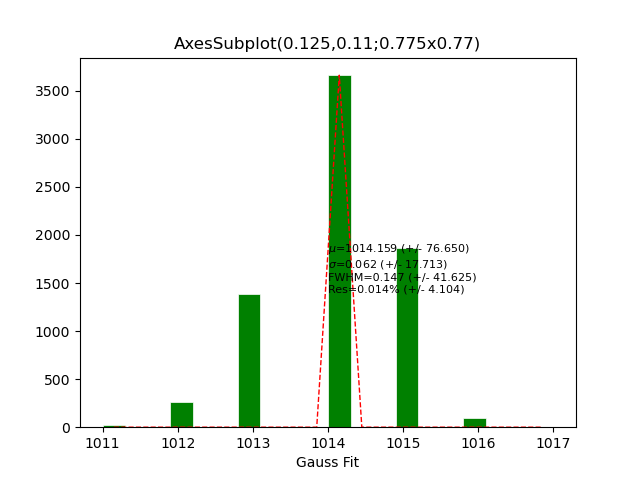

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: overflow encountered in square
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)


In [61]:
channel = 52
tac     = 0
data = pd.read_hdf(filename,key='ch'+str(channel))
data = data[data['tac_id']==tac]
data = data[data['tpulse']==40]
fig = plt.figure()
axis = fig.add_subplot(111)
coeff,coeff_err,chisq_r=TPcal.gauss_fit(data['efine'],20,True,axis,'Gauss Fit','','',[0.5,0.5,"left"])

# GAUSSIAN FITTING FOR SELECTED EFINE DATA

In [21]:
channels = range(0,64)
tacs = range(0,4)
res=[]
for ch in channels:
    data_ch = pd.read_hdf(filename,key='ch'+str(ch))
    for tc in tacs:
        data_tc = data_ch[data_ch['tac_id']==tc]
        # Blind fit
        for i in np.arange(0,300,10):
            data_fit = data_tc[data_tc['tpulse']==i]
            coeff,coeff_err,chisq_r=TPcal.gauss_fit(data_fit['efine'],'sqrt',False)
            print(i,coeff[1],coeff_err[1])
            
            if coeff_err[1]>1:
                print("Fit failure")
            else:
                res.append([ch,tc,i,coeff[1],np.abs(coeff[2])])

df_efine = pd.DataFrame(res,columns=['channel_id','tac_id','tpulse','mu','sigma'])

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 859.5714479760935 859.5714479760935
Fit failure
50 47.934081259946545 0.5318100826549053
60 138.02783006865806 0.6212924179049226
70 206.6833452789008 0.5895213727562197
80 267.10431503215483 0.5055298335369052
90 326.42590173883264 0.658303115955718
100 384.97224028812985 0.7175190687983535
110 443.2790690654209 0.6048538259514231
120 500.09130626290664 0.6729071403533601
130 551.7749037732387 0.6170527405079607
140 598.2449994314613 0.629777915164046
150 635.7173929999229 0.6353469729417127
160 657.7948690465696 0.4745655124093165
170 667.4352303046372 0.6067737559393982
180 670.2820169462183 0.568741305645848
190 671.2513364007323 0.5341949896179309
200 671.5011186284783 0.6063563376274036
210 671.6785481135627 0.5840477499299658
220 671.3623268760109 0.49505901912615374
230 671.6441

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 934.4183645748437 934.4183645748437
Fit failure
50 47.6234372554037 0.5387291184507704
60 137.64843588372824 0.5730586006938375
70 206.30200168635716 0.6197008642140067
80 266.642253057978 0.5556093219538863
90 325.75729184721774 0.648521025432434
100 384.1912286015129 0.6642965968423126
110 442.59608309203037 0.5933726396377765
120 498.9259601165856 0.6617060572438224
130 550.9911103822874 0.6953163159022526
140 597.5130744396474 0.6138906055076205
150 634.7589933501158 0.6687183638187073
160 657.2347869008152 0.40550015477200835
Fitting Problems
170 667.0897970931069 667.0897970931069
Fit failure
Fitting Problems
180 669.9675839216251 669.9675839216251
Fit failure
Fitting Problems
190 671.0438383549907 671.0438383549907
Fit failure
Fitting Problems
200 671.1410565075769 671.1410565075769
Fit failure
Fitting Problems
210 671.2052714510816 671.2052714510816
Fit failure
Fitting Problems
220 671.0808833872555 671.080883387

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
230 671.265563778842 671.265563778842
Fit failure
Fitting Problems
240 671.2214468812305 671.2214468812305
Fit failure
250 670.775594177954 0.4413738317867332
Fitting Problems
260 671.0764570109636 671.0764570109636
Fit failure
Fitting Problems
270 671.1318400907287 671.1318400907287
Fit failure
Fitting Problems
280 671.114991233197 671.114991233197
Fit failure
Fitting Problems
290 670.9772760167897 670.9772760167897
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1022.1146271900041 1022.1146271900041
Fit failure
50 44.2796442397596 0.5396923278870477
60 133.62540851554616 0.5959878356905771
70 202.83098424979397 0.5655096427802099
80 262.8378814687106 0.520992732997767
90 321.8552632485823 0.6055845411900531
100 379.7748521355827 0.7203263317345733
110 437.87662681499785 0.5777048660314537
120 494.013148

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
190 671.042404340377 671.042404340377
Fit failure
Fitting Problems
200 671.2074776943775 671.2074776943775
Fit failure
Fitting Problems
210 671.2959461395216 671.2959461395216
Fit failure
Fitting Problems
220 671.1381541924592 671.1381541924592
Fit failure
Fitting Problems
230 671.2420548541576 671.2420548541576
Fit failure
240 671.2843549609403 0.4670582000294453
Fitting Problems
250 670.7241041433371 670.7241041433371
Fit failure
Fitting Problems
260 671.115567739143 671.115567739143
Fit failure
Fitting Problems
270 671.1455911539553 671.1455911539553
Fit failure
Fitting Problems
280 671.0525931336742 671.0525931336742
Fit failure
Fitting Problems
290 670.9992762015055 670.9992762015055
Fit failure


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
Fitting Problems
50 5.975189234650967 5.975189234650967
Fit failure
60 66.27568225941732 0.3116803117271934
70 154.23434087127572 0.6174385365228314
80 217.90674508678174 0.6514157938623156
90 274.97730520533736 0.6279127741153494
100 330.71535782419403 0.5118698695350135
110 385.88213408847145 0.539527560730901
120 440.9145411138137 0.4702984760346613
130 493.64354103976234 0.6495079753292068
140 543.8509064046586 0.6369944025756997
150 591.1240482348431 0.48768064290307533
160 631.1861026057678 0.45044664646948446
170 663.743732017056 0.4812841609043638
180 683.1473311754562 0.5852959035752526
Fitting Problems
190 691.217347813661 691.217347813661
Fit failure
Fitting Problems
200 694.3833097595474 694.3833097595474
Fit failure
210 695.7188532214955 0.48907195

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
290 695.8468745425267 695.8468745425267
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
Fitting Problems
50 6.065872459705676 6.065872459705676
Fit failure
60 66.74991515066988 0.47788192556311876
70 154.78198471463193 0.715977221696802
80 218.14654918567197 0.661936222940097
90 275.5461358712154 0.4934762689180711
100 331.0574077840193 0.3975751921059075
110 386.120886526082 0.4229118756119863
120 441.15458903438775 0.39387993272119803
130 494.1768807530938 0.6427545617433861
140 544.4112346283287 0.6455824945410034
150 591.3322220430122 0.4200777385347458
160 631.4463495953039 0.4472557059443166
170 663.7974304628578 0.537970394435381
180 683.068002333214 0.5719410946309996
Fitting Problems
190 691.132323521006 691.132323521006
Fit failure
Fitting Problems
200 694.245261669024 

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
250 695.5678994918126 695.5678994918126
Fit failure
Fitting Problems
260 695.6685424101015 695.6685424101015
Fit failure
Fitting Problems
270 695.6484848484848 695.6484848484848
Fit failure
Fitting Problems
280 695.8666194188519 695.8666194188519
Fit failure
Fitting Problems
290 695.6714494875549 695.6714494875549
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
50 4.289447022792467 0.5396808820783517
60 61.80483566200101 0.4928426993338239
70 150.10371809785178 0.7011139336766582
80 214.18041012393104 0.6746771615375815
90 271.11613378601214 0.3444289284148343
100 326.1660889260864 0.39850249300254287
110 381.0213677541557 0.44613784351209684
Fitting Problems
120 435.75899182561307 435.75899182561307
Fit failure
130 488.47626968486713 0.5925027036469093
140 538.810686194931 0.625

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
220 695.5663551401869 695.5663551401869
Fit failure
Fitting Problems
230 695.8860014357501 695.8860014357501
Fit failure
Fitting Problems
240 695.8672465421361 695.8672465421361
Fit failure
Fitting Problems
250 695.7298136645962 695.7298136645962
Fit failure
Fitting Problems
260 695.8223991216031 695.8223991216031
Fit failure
Fitting Problems
270 695.8178669360658 695.8178669360658
Fit failure
Fitting Problems
280 695.9865343727853 695.9865343727853
Fit failure
Fitting Problems
290 695.8528550512445 695.8528550512445
Fit failure


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
50 20.561387386006384 0.5205287084244992
60 95.67737910193098 0.49942568921381236
70 180.3882068048772 0.48366492124901356
80 244.97303557817185 0.491836198119497
90 305.138264874796 0.5320437727208208
100 365.4525877610375 0.49880259707377594
110 424.59373265063914 0.5569426055641172
120 482.1505993921377 0.6104370007295905
130 538.4495061458063 0.6658189290182814
140 591.4285166266164 0.5411175103327871
150 640.6349670466783 0.6293935332437814
160 681.0650690174147 0.5432150339272546
Fitting Problems
170 709.6833568406206 709.6833568406206
Fit failure
180 722.3147563536055 0.46482502183503455
Fitting Problems
190 727.9830436625689 727.9830436625689
Fit failure
200 729.5968429629676 0.4774810391818359
210 729.6853583221206 0.4447016279281639
Fitting Problems
2

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in tru

Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
Fitting Problems
50 20.284300247456695 20.284300247456695
Fit failure
60 95.11494089056237 0.4747881176776144
70 179.82515427575296 0.4665376207924194
80 244.53165094070476 0.5361165931236072
90 304.5742230150556 0.5424754899880214
100 364.9035871794869 0.5311977219464271
110 423.68716533701945 0.6612468577398023
120 481.4234171179266 0.6264747250545423
130 537.4746351402478 0.6599127921024024
140 590.6246168387819 0.5578493842416403
150 639.8149722882702 0.5514909617867972
160 680.4311079619581 0.4853412582699353
170 709.3796812388001 0.5149751294171188
180 722.2894470886608 0.4508868472687637
Fitting Problems
190 728.1044227780133 728.1044227780133
Fit failure
200 729.8359993402815 0.40598685356949005
Fitting Problems
210 729.7492691076152 729.7492691076152
F

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


260 729.7187271736317 0.44788730281623
270 729.5019626012353 0.5647846063627004
280 729.3908645009233 0.4965144488062206
290 729.7122686204907 0.47070958787919015
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
Fitting Problems
50 10.82459266802444 10.82459266802444
Fit failure
60 64.59833974617457 0.5600354260503417
70 155.33289099981164 0.6384182024112678
80 226.87675625579854 0.6722455214596491
90 285.94041361063375 0.6453646947040684
100 342.12359169964253 0.6694683418022686
110 398.49544094581313 0.6603020809699096
120 453.850966125773 0.5828296163738176
130 509.2487011981016 0.6428032965489404
140 561.5516982490653 0.7593813308251849
150 610.8560104003832 0.6920741634488692


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in tru

160 655.0706596381996 0.6010218388386516
170 692.6051422299281 0.6727714996041847
180 717.82434400149 0.5800754765368908
Fitting Problems
190 730.0309263725351 730.0309263725351
Fit failure
Fitting Problems
200 734.8289601554908 734.8289601554908
Fit failure
210 736.4354937080639 0.4842685432371999
220 736.8457223434555 0.4915450250865676
230 736.5913201904145 0.5479086590013877
240 737.7174391075988 0.5670261907138627
250 736.9982284937589 44.3162500087508
Fit failure
Fitting Problems
260 736.82316457522 736.82316457522
Fit failure
270 736.4209862103189 0.47196657997560004
280 736.8176835505091 0.5100024609753697
290 736.7729768093687 0.5233191435532164
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
50 10.80998247636215 0.43462764983174174
60 64.41337320725701 0.5546239545081889
70 155.1471748705109 0.6445

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

Fitting Problems
50 9.159623217922608 9.159623217922608
Fit failure
60 60.202135018555545 0.5907129433317747
70 149.70450623216834 0.5990267935730345
80 222.42359947941588 0.7223038173922676
90 281.47157467130694 0.5809134607270718
100 337.0703518355994 0.7248037229117952
110 393.17780362168736 0.677808543041806
120 448.08351550119113 0.6975265629652991
130 503.12674979995205 0.6909838430139082
140 555.260606030891 0.6062810156937072
150 604.8469639929801 0.6570516843847508
160 649.4119202830141 0.604328208129303
170 688.0925993301767 0.6444936194066644
180 714.7669304342833 0.5062662243703899
Fitting Problems
190 729.0885106382979 729.0885106382979
Fit failure
200 734.6536736433989 0.4654736485665881
210 736.5939614380749 0.5570710724780331
Fitting Problems
220 737.0564874551972 737.0564874551972
Fit failure
Fitting Problems
230 736.9150782361309 736.9150782361309
Fit failure
240 738.0531758259544 0.6720393274191212
250 737.133696010357 0.5300804495418302
260 737.1509051571588 0.45876

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.1406378883695 1010.1406378883695
Fit failure
50 24.33168701491526 0.46105237110986574
60 102.46153996344316 0.5738611336519214
70 176.16534897056536 0.5590750938885447
80 239.84527701814972 0.5264678957516867
90 302.38597701979955 0.5561383749216581
100 362.394844443956 0.5982897415281706
110 423.09321995786866 0.5592280152137747
120 483.2472613238467 0.5022574681737285
130 541.6843229295088 0.6825395299315066
140 596.8064102805658 0.6270067424321234
150 648.5113283331691 0.5214974596397152
160 693.3018474801104 0.578479689312548
170 727.818300014276 0.43537662460963833
180 746.6533928647235 0.5117856257367628
Fitting Problems
190 754.1837405343621 754.1837405343621
Fit failure
Fitting Problems
200 756.737930058049 756.737930058049
Fit failure
210 757.2143155745955 0.45586777707428

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountere

150 647.1818956706306 0.5770107621341035
160 692.0913461913682 0.6430019245217499
170 726.9172002094689 0.5429289174415148
180 746.1571327979498 0.48477339847903517
Fitting Problems
190 754.020145735105 754.020145735105
Fit failure
200 756.7205333568394 0.5910925026512306
Fitting Problems
210 757.1969423210563 757.1969423210563
Fit failure
220 757.6951600222992 0.6051436225721744
230 757.3570974263293 0.502332165341624
240 757.5896119891821 0.47281091136569064
250 757.2645169370711 0.46222282189622027
260 757.3156585099681 0.49704955834682035
270 757.6674192120615 0.4515951444785239
280 757.669571126002 0.41770407223250655
290 757.7031166627451 0.5267046141777444
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
50 21.431137129001385 0.51175422289271
60 97.76200010609621 0.5706945830242983
70 171.9939074953461

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.6343406593406 1010.6343406593406
Fit failure
Fitting Problems
50 9.359591436966559 9.359591436966559
Fit failure
60 65.58435890202493 0.5859549706288087
70 152.94123709305794 0.5152535763336198
80 218.6642938535294 0.533821338771815
90 276.0646823903643 0.6264270747818884
100 331.62906816928927 0.4969495666813114
110 387.4237055579087 0.4927202628518537
120 442.3808527862991 0.5689011266028444
130 495.89407732655974 0.6116947067261999
140 547.2440191400856 0.5119151093893921
150 595.2344060507643 0.6504668613310552
160 639.1589387856807 0.5970939170361491
170 674.9177974609014 0.6408912768342078
180 699.0557703491114 0.4064482681242597
190 711.6890239153 0.5144895303510817
200 714.7455512113138 0.47867927705736557
Fitting Problems
210 716.9305923344948 716.9305923344948
Fit failure

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
240 716.9147253988423 716.9147253988423
Fit failure
Fitting Problems
250 716.7926616191031 716.7926616191031
Fit failure
Fitting Problems
260 716.7694178229152 716.7694178229152
Fit failure
Fitting Problems
270 717.1126680820948 717.1126680820948
Fit failure
Fitting Problems
280 716.7462772878415 716.7462772878415
Fit failure
290 716.722220119015 0.42892494401672177
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.4093406593406 1010.4093406593406
Fit failure


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
50 8.870575066461452 8.870575066461452
Fit failure
60 64.08296220647199 0.4978700796255789
70 151.59928251665528 0.508985738530246
80 217.66316336639062 0.5217784978571112
90 274.79425671191 0.5899168942329602
100 330.3046636660216 0.5996630451919515
110 386.0861141723364 0.5825872084602781
120 441.0533444741894 0.6428436911467827
130 494.3252504845941 0.6314057689583032
140 545.6821338889872 0.6069433189611931
150 593.7305635115821 0.5378987794842456
160 637.6932158989763 0.4696182018478608
170 673.5361435723313 0.47270994460262195
180 698.11455749359 0.4121865377183455
Fitting Problems
190 710.9124785836665 710.9124785836665
Fit failure
Fitting Problems
200 714.1966586436358 714.1966586436358
Fit failure
210 716.6371813725945 0.4987422964132243
Fitting Problems
220 716.874981891931 716.874981891931
Fit failure
Fitting Problems
230 717.1286649587247 717.1286649587247
Fit failure
Fitting Problems
240 716.72049689441 716.72049689441
Fit failure
Fitting Problems
250 716.

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountere

170 670.8533082125181 0.5285384862609256
180 696.494343656058 0.4965860651742321
190 710.1532096586193 0.4185456738761154
Fitting Problems
200 714.1375990939978 714.1375990939978
Fit failure
Fitting Problems
210 716.7075958188153 716.7075958188153
Fit failure
Fitting Problems
220 716.9963789107763 716.9963789107763
Fit failure
Fitting Problems
230 717.3415883859949 717.3415883859949
Fit failure
Fitting Problems
240 716.9387265283073 716.9387265283073
Fit failure
Fitting Problems
250 716.811444379732 716.811444379732
Fit failure
Fitting Problems
260 716.7950221713631 716.7950221713631
Fit failure
Fitting Problems
270 717.1623496107572 717.1623496107572
Fit failure
Fitting Problems
280 716.7781954887218 716.7781954887218
Fit failure
Fitting Problems
290 716.6560619088564 716.6560619088564
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
190 681.2603583426652 681.2603583426652
Fit failure
Fitting Problems
200 683.3197250280583 683.3197250280583
Fit failure
210 685.7931034371201 0.38467570107448434
Fitting Problems
220 685.7315153219005 685.7315153219005
Fit failure
230 685.319714212905 0.5071795819984467
Fitting Problems
240 685.1159116331096 685.1159116331096
Fit failure
250 685.7698774007653 0.47927193538519175
Fitting Problems
260 685.6482965931864 685.6482965931864
Fit failure
Fitting Problems
270 685.1736766809728 685.1736766809728
Fit failure
Fitting Problems
280 684.7040962474936 684.7040962474936
Fit failure
290 685.6386132431082 0.5459164374096251
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
50 6.41279200213537 0.5013350957337583
60 64.2352294265946 0.5438843319173201
70 147.4461368813476 0.4815383595413952
80 21

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


110 375.84649610956836 0.589597628707303
120 428.7520342014201 0.6133204347267073
130 481.89129215794367 0.49779754369594353
140 531.8986414045241 0.4598321622362471
150 577.3675601531043 0.5712176298379219
160 617.7768006740625 0.5194296884317845
170 651.5842847848122 0.4804331351232946
180 671.7590120513278 0.4568812293653682
Fitting Problems
190 681.1173012318029 681.1173012318029
Fit failure
Fitting Problems
200 683.2613636363636 683.2613636363636
Fit failure
210 685.7107821405913 0.5083136511237693
Fitting Problems
220 685.7010120888389 685.7010120888389
Fit failure
230 685.3355747510404 0.5171276873501406
Fitting Problems
240 684.988255033557 684.988255033557
Fit failure
250 685.6274030848369 0.6174783470303701
260 685.7049052677224 0.5848858157352852
Fitting Problems
270 685.1400572246066 685.1400572246066
Fit failure
280 684.6498066700741 0.5201138080597959
290 685.5706795099444 0.5554834321740652


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
Fitting Problems
50 6.293701442841288 6.293701442841288
Fit failure
60 63.4152495356391 0.56615163744846
70 147.05615288954968 0.49860615840080547
80 210.7282471102672 0.4944593077242491
90 266.6071206465868 0.4258163757264153
100 321.1694547473966 0.47936997850759283
110 375.1475561432837 0.5883767416147292
120 428.1527836055608 0.5845747136612465
130 481.1728696191512 0.5316872076044349
140 531.2922332924292 0.5186246426898679
150 576.7357444523041 0.5614256615060311
160 617.0208019368299 0.4994482649206065
170 650.9941006684018 0.4725577354169905
180 671.5070611583297 0.48985128860117416
Fitting Problems
190 680.9678051511759 680.9678051511759
Fit failure
Fitting Problems
200 683.1613355780022 683.1613355780022
Fit failure
210 685.6450777443335 0.53037066363

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
Fitting Problems
50 15.173495262244762 15.173495262244762
Fit failure
60 78.1832447826498 0.5747249282596734
70 157.40406503850508 0.5955916753034081
80 217.33370885105657 0.4519344223367484
90 272.3878236353753 0.5369706190685282
100 325.74790819881804 0.5265074200834645
110 379.65448224671593 0.4981659459377015
120 431.8257696593616 0.5544796991213609
130 483.8053615562554 0.599169728861077
140 532.9393435091594 0.6777999268357093
150 579.247660090698 0.5681413912143377
160 620.1176632445935 0.4909538695932306
170 652.6182611185202 0.5897465122161308
180 672.9699616403412 0.49456957542382823
Fitting Problems
190 682.0079056865465 682.0079056865465
Fit failure
Fitting Problems
200 685.2316596729851 685.2316596729851
Fit failure
210 686.4317639355304 0.45935597

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
250 686.8426187782806 686.8426187782806
Fit failure
Fitting Problems
260 687.0185003503855 687.0185003503855
Fit failure
Fitting Problems
270 687.1746535796767 687.1746535796767
Fit failure
Fitting Problems
280 687.0190326273612 687.0190326273612
Fit failure
Fitting Problems
290 687.1463143254521 687.1463143254521
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
50 14.53901774374775 0.624174348057485
60 76.81260033452487 0.5182893818708177
70 156.33543619133107 0.436376585013927
80 216.46236865633145 0.51670483417012
90 271.3817083448426 0.49174086578340453
100 324.7204038419602 0.52939402636402
110 378.423548897847 0.6030399104717962
120 430.6998417736321 0.574673318121298
130 482.36811984277915 0.5669469164157335
140 531.5959905832312 0.5935882800863768
150 577.7670161157027 0.6

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


220 686.5998760640674 0.5106105910294341
230 686.7041566954011 0.4856913590778667
240 686.6566322604016 0.4828133112193541
Fitting Problems
250 686.8809220760854 686.8809220760854
Fit failure
Fitting Problems
260 687.1297827610372 687.1297827610372
Fit failure
Fitting Problems
270 687.2269380684279 687.2269380684279
Fit failure
Fitting Problems
280 686.9906983400115 686.9906983400115
Fit failure
Fitting Problems
290 687.1941855612741 687.1941855612741
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
Fitting Problems
50 13.07701548318206 13.07701548318206
Fit failure
60 73.92551129246078 0.536573150397048
70 153.26853525950355 0.5526386998226653
80 213.7893657862468 0.556622079531278
90 268.31586669769945 0.5936780284403985
100 321.34222474984716 0.4934127762459775
110 374.71572664946143 0.52297265

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


140 527.5393025982677 0.5855286132121459
150 573.7468422716789 0.6253932135691554
160 615.1114636063357 0.5717067523849555
170 648.9427291462184 0.5202640609072877
180 670.8414540697762 0.4234836597145608
Fitting Problems
190 681.1020946039673 681.1020946039673
Fit failure
Fitting Problems
200 684.8027496382055 684.8027496382055
Fit failure
Fitting Problems
210 686.3102200347423 686.3102200347423
Fit failure
220 686.5802560549077 0.6172023324520166
Fitting Problems
230 686.6830865603645 686.6830865603645
Fit failure
Fitting Problems
240 686.663754227734 686.663754227734
Fit failure
Fitting Problems
250 686.9752510253147 686.9752510253147
Fit failure
Fitting Problems
260 687.1296426068676 687.1296426068676
Fit failure
Fitting Problems
270 687.3167316298542 687.3167316298542
Fit failure
Fitting Problems
280 687.1489696622782 687.1489696622782
Fit failure
Fitting Problems
290 687.2809848379469 687.2809848379469
Fit failure


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 819.6433708780024 819.6433708780024
Fit failure
50 55.732061332059686 0.4791359898848665
60 155.0963147014376 0.5274763351872143
70 227.15044174751 0.6550352405028045
80 289.9129161341427 0.5161323574351145
90 350.75514919877935 0.511651312393103
100 412.48047945863823 0.658881701554556
110 471.8487236264899 0.659272283696259
120 527.9131075492347 0.6573582086844112
130 579.348992565412 0.574520376428034
140 622.1124806630263 0.5233636890516573
150 652.378322759977 0.5300877316185427
Fitting Problems
160 665.9399425287356 665.9399425287356
Fit failure
Fitting Problems
170 670.4680761099365 670.4680761099365
Fit failure
180 671.6543589016114 0.5288999297825896
Fitting Problems
190 671.8088571813165 671.8088571813165
Fit failure
Fitting Problems
200 672.0407000972357 672.0407000972357
Fit

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
200 671.8042511808836 671.8042511808836
Fit failure
Fitting Problems
210 671.7661547377571 671.7661547377571
Fit failure
220 671.5413468060095 0.5345004586574514
Fitting Problems
230 671.7860324759305 671.7860324759305
Fit failure
Fitting Problems
240 671.9228407981025 671.9228407981025
Fit failure
Fitting Problems
250 672.235783829547 672.235783829547
Fit failure
260 671.9999653546228 4.375788549641557
Fit failure
Fitting Problems
270 671.8145044784744 671.8145044784744
Fit failure
Fitting Problems
280 671.8680595306239 671.8680595306239
Fit failure
290 671.5713045594794 0.5294501509655244
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.4603691639522 1010.4603691639522
Fit failure
50 54.45280334986878 0.4897706625910833
60 153.5861844464318 0.6151622514117759
70 225.90623105717762 0.5470348491500894
80 288.7403

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value enco

130 578.0209694058397 0.6414519840492372
140 620.878956372878 0.5102553283768441
150 651.4632796741872 0.4753195462089543
160 665.552128013526 0.4681805373522363
Fitting Problems
170 670.2012684989429 670.2012684989429
Fit failure
180 671.3757044942414 0.6113929268681523
190 671.5852827791139 0.5381068533655591
Fitting Problems
200 671.8332870241734 671.8332870241734
Fit failure
Fitting Problems
210 671.820895522388 671.820895522388
Fit failure
220 671.6689943704503 0.6313449092147937
Fitting Problems
230 671.8211206896551 671.8211206896551
Fit failure
Fitting Problems
240 671.8975861587833 671.8975861587833
Fit failure
250 672.2251698675635 0.46476941650349896
Fitting Problems
260 672.0827731092437 672.0827731092437
Fit failure
Fitting Problems
270 671.8522316914632 671.8522316914632
Fit failure
Fitting Problems
280 671.8375787063537 671.8375787063537
Fit failure
290 671.5935696340481 0.5276239182582843
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


100 407.3119332577097 0.6925537241126338
110 466.57104125522227 0.6044255052355263
120 522.8088320469642 0.5977233847101658
130 574.2396084647712 0.5801644697398612
140 618.0820041249065 0.5874273006607444
150 649.6590582555267 0.4731701026825489
Fitting Problems
160 664.8281115263006 664.8281115263006
Fit failure
Fitting Problems
170 670.1284002818886 670.1284002818886
Fit failure
180 671.597474326348 0.5299361298333111
190 671.8187673119147 0.44983276014386653
Fitting Problems
200 672.0047228781775 672.0047228781775
Fit failure
Fitting Problems
210 672.0131864947109 672.0131864947109
Fit failure
Fitting Problems
220 671.7777616700492 671.7777616700492
Fit failure
Fitting Problems
230 671.9895114942528 671.9895114942528
Fit failure
Fitting Problems
240 672.130859375 672.130859375
Fit failure
250 672.5153757190245 0.5363225912875675
Fitting Problems
260 672.2294117647059 672.2294117647059
Fit failure
Fitting Problems
270 672.0323559150658 672.0323559150658
Fit failure
Fitting Problems


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountere

Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
40 1011.0000585466115 6.195132652326157
Fit failure
50 44.56854893811927 0.43562187456325635
60 126.2748027526194 0.5955457368143129
70 198.31148324148958 0.4585627077182857
80 261.7953185709044 0.6283840441408025
90 323.2834800759157 0.5751127699510646
100 384.6017659014971 0.5625365898171681
110 445.15607641941017 0.5879761948349634
120 504.4476209748457 0.6283823689970209
130 562.9013414778105 0.5783784276904921
140 616.3120607931028 0.6781671956603693
150 664.684462492232 0.5605354351026766
160 704.1588470792988 0.49170335805421217
170 730.5629305132286 0.5755379239160079
Fitting Problems
180 742.7771947241527 742.7771947241527
Fit failure
190 746.6473860333984 0.46861724269611293
200 747.6336274844778 0.4685380904085475
Fitting Problems
210 747.9890062201649 747.9890062201649
Fit failure
Fitting Probl

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountere

170 729.7487012363359 0.522095445204415
180 742.3120038365755 0.5374814283589837
Fitting Problems
190 746.1831823329559 746.1831823329559
Fit failure
200 747.2478353886926 0.4843557833021544
Fitting Problems
210 747.7612847222222 747.7612847222222
Fit failure
Fitting Problems
220 747.9705038918476 747.9705038918476
Fit failure
Fitting Problems
230 748.1676421404683 748.1676421404683
Fit failure
Fitting Problems
240 748.0240460763139 748.0240460763139
Fit failure
250 748.285132471368 0.4829259985006307
260 748.409074388506 0.45680617618107494
Fitting Problems
270 748.7305213004485 748.7305213004485
Fit failure
280 748.7611877814608 0.4158407779989433
290 748.7712313822532 0.44959001260551335
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.3177834322872 1010.3177834322872
Fit failure
50 41.42239307255856 0.5995524556258238
60 122.

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
Fitting Problems
50 1021.7129049823033 1021.7129049823033
Fit failure
60 50.3051174312756 0.5937929341250281
70 137.8446411656646 0.46902628278656844
80 206.65423012156222 0.549283924497558
90 265.5446046818435 0.5991290896862795
100 322.6727413728701 0.5132389744323067
110 378.8820903289199 0.5882202922716531
120 435.0505907473642 0.6204157738694519
130 490.280671766271 0.6421715154425254
140 543.7553421375757 0.6195058081387669
150 594.093727845592 0.5852517614212908
160 639.8400308863023 0.5934331085930337
170 679.2934674701344 0.6017418700509233
180 709.7903404544493 0.5601498620484451
190 726.8577428281159 0.417073927218171
Fitting Problems
200 732.871722182849 732.871722182849
Fit failure
210 735.0772979593804 0.49693647522374396
220 735.8459307094746 0.5

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in tru

Fitting Problems
290 735.9343668501883 735.9343668501883
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
50 1020.4307093799463 0.612731353748464
60 46.118164996576255 0.608619373537457
70 132.91407252962523 0.48065995955872354
80 202.44325434395515 0.5275398558087194
90 261.33962207209765 0.6105550735598846
100 317.9457016130529 0.519544641702573
110 373.7818330384161 0.6189430656528959
120 429.5556503945543 0.6014900054248354
130 484.375091290669 0.6291952750096153
140 537.6359366680944 0.6469687198060151
150 588.0973575351331 0.6042967036221186
160 634.0975532921653 0.6097967111715048
170 674.1417452902334 0.5687054946673843
180 706.1951751269035 0.5581994537355353
190 724.7228809731479 0.5155317563647941
Fitting Problems
200 732.0891439909298 732.0891439909298
Fit failure
210 734.6340038759884

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1020.0825636719843 1020.0825636719843
Fit failure
50 38.19120819855641 0.5588547094751193
60 122.32236253617215 0.544069841455978
70 194.78228505953805 0.625789827161966
80 257.1901859873802 0.5461497336742599
90 317.13123745413685 0.5895600487392078
100 375.8923105071233 0.47938450138192884
110 435.06798148140354 0.5857951463591163
120 493.28616261983154 0.6141590512122568
130 548.2529027103816 0.6501593670005827
140 599.9493967454844 0.6244341423269898
150 646.0524249770715 0.4069057629976624
160 681.7025202857884 0.46044146122038093
170 702.635816898455 0.5096237607695834
Fitting Problems
180 710.7430505545153 710.7430505545153
Fit failure
190 713.3466557361005 0.6227619729771343
Fitting Problems
200 714.0308159722222 714.0308159722222
Fit failure
Fitting Problems
210 714.17310664605

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
270 714.1531010553708 714.1531010553708
Fit failure
Fitting Problems
280 714.0450901803607 714.0450901803607
Fit failure
290 714.2214729831518 0.44479022004384255
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1020.000139918847 1020.000139918847
Fit failure
50 37.05084255114568 0.43377973605295594
60 121.18161411318724 0.46208511255503
70 193.6178444848899 0.5640033405028043
80 256.1035954669994 0.4053391648230405
90 316.0050251778761 0.4584912958127746
100 374.4275268270375 0.5678862813768213
110 433.43670829965066 0.6388444957300534
120 491.56660447539394 0.5442648542227502
130 546.5363977761796 0.4194973151426165
140 598.2806134550385 0.6283845903939314
150 644.4517129253645 0.6204179273387673
160 680.7612110531044 0.39819903631229014
Fitting Problems
170 701.9839363039531 701.9839363039531
Fit failure
180 710.45

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
230 713.815725863785 713.815725863785
Fit failure
240 714.3185731790221 0.47429365520759964
Fitting Problems
250 714.0617095205004 714.0617095205004
Fit failure
260 714.5078138615498 0.5484074047786288
Fitting Problems
270 714.1583056238254 714.1583056238254
Fit failure
Fitting Problems
280 714.0709991411394 714.0709991411394
Fit failure
290 714.2553877784669 0.46448453516154264
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
40 1019.9907160009333 55892.34120664665
Fit failure
50 35.182786765596845 0.6287078009608623
60 117.80780837295258 0.5305075361238645
70 190.87286909961867 0.4412913252652373
80 253.09494488998362 0.605807757956115
90 312.5233838210813 0.6203390318227472
100 371.02297253567593 0.43450660542857333
110 429.4506991678481 0.6974389264488876
120 487.07883151490006 0.5593050888702331
130 542.2951064459774 0.5612129079441

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountere

Fitting Problems
220 714.1207465900933 714.1207465900933
Fit failure
Fitting Problems
230 713.8160625444208 713.8160625444208
Fit failure
240 714.3985430116107 0.5966389708898248
Fitting Problems
250 714.06212647672 714.06212647672
Fit failure
260 714.4716140753068 0.661142126171907
Fitting Problems
270 714.2147194910352 714.2147194910352
Fit failure
Fitting Problems
280 714.1208130546808 714.1208130546808
Fit failure
290 714.3589264609359 0.6265573433554505
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 8.219478039465308 8.219478039465308
Fit failure


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


50 90.26595371613936 0.545603545285878
60 181.80243356067288 0.5580881530780356
70 257.4211201964421 0.5085989253712146
Fitting Problems
80 330.66873152189214 330.66873152189214
Fit failure
90 402.0491227364588 0.6158751664270998
100 473.8149178387285 0.610394268168612
110 543.341132618515 0.6035522101261944
120 609.3352957866598 0.6280655207786143
130 668.1401782422024 0.6571047526179062
140 718.3697280320476 0.5716266769905001
150 749.5456481834823 0.4964752227586669
160 762.8638718840643 0.4935209817607506
170 766.8943593726183 0.43276820803001836
Fitting Problems
180 767.060502283105 767.060502283105
Fit failure
Fitting Problems
190 767.203081232493 767.203081232493
Fit failure
200 767.8163768754289 0.455535372707709
210 767.2478286222486 0.5835636335871182
Fitting Problems
220 766.9693189964157 766.9693189964157
Fit failure
Fitting Problems
230 767.2311193286872 767.2311193286872
Fit failure
240 767.578581491454 0.45371172504254276
250 767.1947378477696 0.4312615771810519
Fitting 

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


50 89.83990356625864 0.5739943166552672
60 181.42365371736827 0.5256359997662322
70 257.0502141748538 0.570084160402465
80 330.11445439881174 0.5453385588819634
90 401.6212129187229 0.5972598485423614
100 473.31770618214296 0.6192233010137945
110 542.7678928142791 0.6110678730433313
120 608.4751034705569 0.6146281534820651
130 667.5114135588109 0.5962238640215243
140 717.9058448184575 0.584197134286084
150 749.2487559500707 0.5300846310150817
160 762.7426912593269 0.47534581773471374
Fitting Problems
170 766.9222826845263 766.9222826845263
Fit failure
Fitting Problems
180 767.1049928673324 767.1049928673324
Fit failure
Fitting Problems
190 767.2491596638655 767.2491596638655
Fit failure
200 767.8621426762184 0.4524952500358117
210 767.2488061210206 0.5082056947264468
Fitting Problems
220 767.0106077981651 767.0106077981651
Fit failure
230 767.2374591505865 0.4004759959671974
240 767.5904327374083 0.5677230803385014
250 767.2261673832659 0.4400439372298388
Fitting Problems
260 767.30883

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
290 767.0311865390195 767.0311865390195
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 6.356797352342159 6.356797352342159
Fit failure
50 85.8147963191315 0.5289752247779406
60 177.6145826645514 0.588064565166905
70 253.17778793495756 0.5405625342691416
80 325.72625420079703 0.5310605147886535
90 396.73422590186595 0.5957795876718548
100 467.91366757145977 0.6145982500376962
110 537.0830457368502 0.5751223845444566
120 602.6704250652671 0.7060198095920669
130 662.0469656260929 0.6307784345471441
140 713.560213381139 0.6662164916894899
150 746.8402726441209 0.5252434256894103
Fitting Problems
160 762.0965189873418 762.0965189873418
Fit failure
170 766.8207598197249 0.40935081996522665
Fitting Problems
180 767.2281678082192 767.2281678082192
Fit failure
190 767.3755423751766 0.47091082025985714
200 768.057

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
290 767.2661348803481 767.2661348803481
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
Fitting Problems
50 19.197086426670403 19.197086426670403
Fit failure
60 105.37232657240544 0.5083021485635065
70 200.67738816341742 0.5273684075650361
80 272.2284525550694 0.5947664938196802
90 338.7330801142766 0.5870845972488828
100 404.5609514508291 0.5403049808176486
110 471.5963302215126 0.6307777035884802
120 535.6407435436917 0.6166311543804863
130 597.3619654544962 0.6107056755859797
140 656.4325278566438 0.6090269455811418
150 708.8356874497966 0.61433809684231
160 753.8213341122397 0.6211967604326724
170 782.8832641820501 0.5783636759692272
180 798.6651088694281 0.47203737825807496


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

Fitting Problems
190 803.3321167883212 803.3321167883212
Fit failure
Fitting Problems
200 804.6774792797943 804.6774792797943
Fit failure
210 803.8930930170508 0.5180947727576342
Fitting Problems
220 804.8915784896362 804.8915784896362
Fit failure
Fitting Problems
230 804.8811031934547 804.8811031934547
Fit failure
240 803.5529075650117 0.5678746453235173
Fitting Problems
250 804.23293982148 804.23293982148
Fit failure
260 804.7543967233721 0.46191265495878975
270 804.1168200294792 0.6249321985745618
Fitting Problems
280 804.8519821404411 804.8519821404411
Fit failure
290 804.7545949298687 0.4277385622092387
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
Fitting Problems
50 19.209862706640514 19.209862706640514
Fit failure
60 105.49479316552164 0.585861640889082
70 200.65128306296344 0.5265713410332413
80 2

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
50 16.3334564907184 0.4373041920202131
60 99.33375600130692 0.565185216620763
70 195.64749469373467 0.5030539236713434
80 267.41341879051964 0.6439915707600277
90 333.46083066522124 0.5777114390717561
100 399.19332173118306 0.5708242126983369
110 465.5689193295051 0.5719081559183201
120 529.5057405344079 0.5762476141716908
130 590.675429293375 0.555752114197919
140 649.7341417253352 0.5699043062255889
150 702.6828754825217 0.677944339079636
160 749.2033981233869 0.5503447478513303
170 780.0162765052701 0.5340266590584927
Fitting Problems
180 797.5933995922528 797.5933995922528
Fit failure
190 803.3292120397582 0.45531898272860255
Fitting Problems
200 804.994284081166 804.994284081166
Fit failure
210 804.2498395144612 0.5420858772432673
Fitting Problems
220 805.1914492753623 805.1914492753623
Fit failure
Fitting Problems
230 805.2218997361477 805.2218997361477
Fit failure
240 803.9843030164602 0.

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountere

Fitting Problems
210 724.8521196653907 724.8521196653907
Fit failure
220 724.277076011787 0.4648181075802802
230 724.465537088054 0.5235729189682462
Fitting Problems
240 725.2149349741295 725.2149349741295
Fit failure
Fitting Problems
250 725.0193897918449 725.0193897918449
Fit failure
Fitting Problems
260 725.1435636946932 725.1435636946932
Fit failure
270 724.6335500624402 0.522458679803408
280 725.3186422133598 0.5866428824741133
Fitting Problems
290 725.0465249856404 725.0465249856404
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
40 1010.0056190225232 148.18557548843697
Fit failure
Fitting Problems
50 21.23283378746594 21.23283378746594
Fit failure
60 91.50694881835663 0.6006803101536182
70 177.98465254491688 0.5121116203635773
80 241.1080622182275 0.5989409920385632
90 300.45607969893274 0.5307466268514848
100 357.0727225013083 0.5906

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountere

180 715.6061660103203 0.5150772914764904
Fitting Problems
190 722.2425315021945 722.2425315021945
Fit failure
200 724.2152935532728 0.4023757920448374
Fitting Problems
210 724.892087351106 724.892087351106
Fit failure
220 724.3625900444991 0.5020638278201667
230 724.559195345273 0.5232879761652482
Fitting Problems
240 725.267794714026 725.267794714026
Fit failure
Fitting Problems
250 725.083119475335 725.083119475335
Fit failure
Fitting Problems
260 725.1739304812834 725.1739304812834
Fit failure
270 724.7381392992327 0.47304454512386834
280 725.3964226940261 0.5134057802681636
Fitting Problems
290 725.0822921154675 725.0822921154675
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
Fitting Problems
50 19.243324250681198 19.243324250681198
Fit failure
60 87.04364769210294 0.5613098503886779
70 174.

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


140 573.2898257381207 0.5664635929211282
150 620.7689831228683 0.5588911433114537
160 662.9908519038948 0.5314511930072804
170 695.4459830551023 0.5456421576390138
180 714.1389973631444 0.46416344017564115
190 721.6968460483216 0.4820784128313213
Fitting Problems
200 724.0078045960399 724.0078045960399
Fit failure
210 724.778985618191 0.46088341522116694
Fitting Problems
220 724.1654328018224 724.1654328018224
Fit failure
230 724.2819749771566 0.5676935466704371
Fitting Problems
240 725.0751048951049 725.0751048951049
Fit failure
Fitting Problems
250 724.8979184488167 724.8979184488167
Fit failure
Fitting Problems
260 725.0205827318898 725.0205827318898
Fit failure
270 724.5143629630497 0.46691325054511923
Fitting Problems
280 725.1663778162912 725.1663778162912
Fit failure
Fitting Problems
290 724.8926058865758 724.8926058865758
Fit failure


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.1576892001077 1010.1576892001077
Fit failure
50 46.74465353905936 0.48880867091549723
60 118.21900429337792 0.5650110467876073
70 188.63826798776753 0.6209284685478208
80 251.01752263796593 0.48602398117644996
90 310.07644421734113 0.4763110058916937
100 367.9880144783522 0.5365253466436208
110 426.9154624396082 0.5304986160318969
120 484.38170736050574 0.5519202489015773
130 539.4994436759632 0.5745542620808493
140 591.811258793929 0.6517070978394593
150 639.1743137875062 0.6332759914242664
160 681.016536748984 0.5798058618052604
170 712.8745367538053 0.5190602209573382
180 730.7573411206494 0.4981764166340891
190 738.2291734344066 0.46154637871165693
200 741.7487005383355 0.4598810701993738
210 741.3212987317912 0.48976808566186036
220 741.3803926427848 0.5275361320926368
230 741

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountere

40 1010.0055930032529 8966.506147235512
Fit failure
50 46.04080884472913 0.4447525864092895
60 117.20208177774252 0.534466824607342
70 187.66850220031938 0.588368684637368
80 250.04225298095537 0.5454522860124441
90 309.03694485176044 0.5165938076525255
100 366.91769444270875 0.5698513358081618
110 425.786466205113 0.5309845840402084
120 483.0807338688734 0.5590095773086114
130 538.1693615173175 0.648251494198849
140 590.5285827258308 0.6770086734872208
150 637.9299676417106 0.6179002654791909
160 679.9965667378485 0.5064942005900973
170 712.102185747112 0.4706729202699129
180 730.3320318200415 0.5216454760215214
Fitting Problems
190 738.134927177796 738.134927177796
Fit failure
200 741.6820662099897 0.4855169865781509
210 741.312439185798 0.44669907310343726
220 741.3833078756314 0.5262551377864341
230 741.5453830891411 0.5404610487249841
240 741.3201447000465 0.414353207818334
250 741.5690396132813 0.6500960444180167
260 741.6231648638479 0.4666493740260788
270 741.8055267245028 0.44

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
50 12.020451043563524 12.020451043563524
Fit failure
60 64.46025827066775 0.6599636122576351
70 149.8135906982449 0.6615405878335813
80 216.37451961590233 0.36468955171121964
90 273.91588648287234 0.6181905349881263
100 329.75975104271157 0.6082709189693415
110 385.101360664009 0.6507895447433852
120 440.01117563039077 0.6607403261959011
130 493.51844667323405 0.6609102592372381
140 547.0725423648818 0.6196591247117641
150 596.7927314270343 0.537609622475717
160 643.6412108806846 0.6093686510126163
170 684.2572842166736 0.6147588387244235
180 716.9011038172932 0.4675519744034995
190 736.5184640462242 0.4734252354799301
200 745.1926335937086 0.4868456366179397
210 747.7456676177405 0.5451416001085794
Fitting Problems
220 748.96001689427 748.96001689427
Fit failure
Fitting Problems
230 749.2828427853553 749.2828427853553
Fit failure
Fitting Problems
240 749.0156577659723 749.0156577659723
Fit failure
Fitting Problems
250 749.2322958309537 749.2322958309537
Fit failure
Fi

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

Fitting Problems
50 11.992861142217246 11.992861142217246
Fit failure
60 64.3441567485103 0.6466536963832693
70 149.5980174090053 0.693166355960573
80 216.22043933873064 0.46355883546856835
90 273.75870500231275 0.5514917965897741
100 329.31774466162784 0.6815834614317217
110 384.89767761614604 0.6735506627389728
120 439.64682399673296 0.7357842828714081
130 493.2385937293534 0.6549823642502784
140 546.5528241831262 0.5840441722559649
150 596.4952990445105 0.5109435804326776
160 643.0028848109782 0.6669892456017871
170 683.5313056990655 0.6853230552331632
180 716.4423824604077 0.38650389267820967
Fitting Problems
190 735.9984585201794 735.9984585201794
Fit failure
200 744.5174020947373 0.5725598142013699
Fitting Problems
210 747.1555370061213 747.1555370061213
Fit failure
220 748.4468589690391 0.5058075651249788
Fitting Problems
230 748.7405226881103 748.7405226881103
Fit failure
240 748.5129784189446 0.4911137684428333
Fitting Problems
250 748.6336520622235 748.6336520622235
Fit failu

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
50 10.667273236282195 10.667273236282195
Fit failure
60 60.192442321580515 0.5610248402753896
70 144.624632938076 0.5818260278719758
80 211.8135650327435 0.5015931447025631
90 269.4209979297134 0.6401623062969609
100 324.7396707831023 0.6312477423935094
110 379.80625622219713 0.7846095898001567
120 434.0991934696244 0.658612623097885
130 487.4576007986655 0.655938009258204
140 540.9652894873894 0.47669048753212073
150 590.8815173439516 0.6305806411154168
160 637.3121407867404 0.5943322576414788
170 678.5208029713972 0.6116505270452217
180 712.6882652536948 0.52494668859627
190 734.0673262144502 0.4551560340383319
Fitting Problems
200 743.9441847287151 743.9441847287151
Fit failure
Fitting Problems
210 747.241508908686 747.241508908686
Fit failure
Fitting Problems
220 748.7091958879031 748.7091958879031
Fit failure
Fitting Problems
230 749.117190866006 749.117190866006
Fit failure
Fitting Problems
240 748.8041410184667 748.8041410184667
Fit failure
Fitting Problems
250 

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

110 387.8902594017417 0.5710069079796635
120 445.7048345798488 0.6568059142498017
130 502.00141481309356 0.5698488298928395
140 557.7856836810158 0.6904989507595808
150 611.0422375689 0.560142629980179
160 660.2736940496183 0.5585079964224191
170 706.4136184268074 0.5811121968086864
180 745.0430256036476 0.5864706379070506
190 773.8349454800348 0.6029324393193832
200 789.231578493727 0.5084541819405513
Fitting Problems
210 795.8540289692027 795.8540289692027
Fit failure
220 797.3289532527722 0.47855122495445707
230 798.1990056971624 0.4422618150165287
Fitting Problems
240 798.0081277627264 798.0081277627264
Fit failure
250 798.5663007105754 0.507238674241115
260 798.5490648395235 0.48956028639414634
270 798.6332446757986 0.5320565047394902
Fitting Problems
280 797.9151254480287 797.9151254480287
Fit failure
290 798.1213398269331 0.45492417608729036
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fi

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in tru

Fitting Problems
50 207.85322211758375 207.85322211758375
Fit failure
60 50.300274932107186 0.5079904428558576
70 134.76717754589455 0.5842282223584427
80 208.65064729696908 0.6020513146315821
90 268.9429712563275 0.65284234478632
100 326.5342303099786 0.513021010572541
110 382.7967785847126 0.6492624117463165
120 440.2199235151817 0.619052850831325
130 496.1569557341 0.5349286036776953
140 551.6808728722275 0.5759629496765147
150 604.8286843329995 0.6213520793128405
160 653.6048857454974 0.6649942474191998
170 700.4339640400061 0.580473252040227
180 739.4952255919221 0.5707867064389647
190 770.1725006821092 0.5741800721393894
Fitting Problems
200 787.1666425784073 787.1666425784073
Fit failure
Fitting Problems
210 794.9659730033745 794.9659730033745
Fit failure
Fitting Problems
220 796.9915929844905 796.9915929844905
Fit failure
230 797.8358440144682 0.48255933490134817
240 797.5320655094819 0.5022126860985845
250 798.1804949400554 0.4896995415441466
260 798.1862327072854 0.4402866962

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
40 1013.6868963566634 0.5483201782356643
Fitting Problems
50 20.119966325242036 20.119966325242036
Fit failure
60 88.16633319558387 0.546423822835491
70 177.77511607937367 0.5728528151207207
80 245.9184080999667 0.5286663112902276
90 308.77354876985214 0.5301427370632475
100 370.0109726393013 0.5568464626784551
110 429.15122998138185 0.585898526920582
120 488.92188069466033 0.6298776369611525
130 547.1949494539066 0.6427025817132686
140 604.4073392871644 0.6014948797170178
150 655.9208430498473 0.6567387794684015
160 703.6547470063995 0.6042980983874537
170 740.3863822597158 0.5329269010449882
180 763.429790460119 0.46193681856351915
Fitting Problems
190 772.901554404145 772.901554404145
Fit failure
Fitting Problems
200 776.0355802640722 776.0355802640722
Fit failure
Fitting Problems
210 776.93730089777 77

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

120 487.65320681884566 0.6795048161499541
130 545.8026674989932 0.6278833392498028
140 602.9536448203129 0.641023790519873
150 654.4528019180678 0.6438254505319201
160 702.155399443132 0.6150762881791656
170 739.1949972366975 0.5154177306890747
180 762.5386192481908 0.4809311599202264
190 772.3478748062498 0.441337739223457
200 775.7292516452941 0.46621421200936425
210 776.5181539190454 0.4793272101686426
Fitting Problems
220 777.0244179443498 777.0244179443498
Fit failure
Fitting Problems
230 776.8176127471902 776.8176127471902
Fit failure
Fitting Problems
240 776.890149861778 776.890149861778
Fit failure
250 777.3732031764197 0.474151955333398
Fitting Problems
260 777.0270117380851 777.0270117380851
Fit failure
Fitting Problems
270 777.0943995381062 777.0943995381062
Fit failure
Fitting Problems
280 777.0379584873472 777.0379584873472
Fit failure
290 777.1653676251102 0.4080692150009843
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
50 12.22269460239454 0.4435030752670583
60 68.45881190161543 0.46003279645777856
70 162.00065347108352 0.6167155915765191
80 234.42284814175332 0.5400065434738315
90 293.83613337457336 0.49893634291180433
100 351.9112770482883 0.6093432496533302
110 408.9322790071896 0.5612216578655108
120 465.43076702948156 0.5340961603773112
130 521.1493223976921 0.6991436529971231
140 574.2980305313846 0.5708020066947476
150 623.8833293725689 0.5180737757594085
160 668.1004404468449 0.6014653512467287
170 704.4929647334776 0.5451832810200811
180 728.9607860000633 0.5185280911063288
190 741.3280749218585 0.5662458409898172
200 745.8545940384125 0.5297829419081077
Fitting Problems
210 746.9707439398161 746.9707439398161
Fit failure
Fitting Problems
220 747.832208985216 747.832

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
50 12.22875515232017 0.44974154307595504
60 68.29374733068249 0.48487273856553303
70 161.95418517532252 0.6161000656132539
80 234.43042629973823 0.4779365305703944
90 293.6266591942831 0.49581590173708523
100 351.6137229443949 0.6368013840075711
110 408.71579988788113 0.5607324277037298
120 464.94877315035797 0.5898611030733435
130 520.7436050042382 0.5946845616013235
140 573.724921158511 0.6058388315965876
150 623.4290838286372 0.5908209953719242
160 667.7339745764065 0.615630959915084
170 704.1937176002778 0.5530269350248518
180 728.5707528991006 0.5207767811405044
190 741.104254689793 0.5542961469330925
200 745.6262422123044 0.5017461744907461
Fitting Problems
210 746.9186516227887 746.9186516227887
Fit failure
220 747.7565077461562 0.43238812801712717
Fitting Problems
230 747.8885255225366 747.8885255225366
Fit failure
Fitting Problems
240 747.95

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
Fitting Problems
50 11.96882969679796 11.96882969679796
Fit failure
60 67.79885289816157 0.5256134927238326
70 160.9609374785697 0.6170326541138555
80 233.80262925737455 0.5215927900066346
90 293.1387033424349 0.5150660856230665
100 350.8995333574836 0.6141711567209921
110 408.09612645865735 0.5725354041447097
120 464.4764987258359 0.4759155199453253
130 520.0142834445369 0.6433938752750953
140 573.1941666672824 0.5691223844505733
150 622.7791685967237 0.6482155461230844
160 667.0404262079057 0.6693170701526349
170 703.7205035086023 0.5361428568218282
180 728.4259310835279 0.4979711414593044
190 740.94155945951 0.46805836144422625
200 745.664734073453 0.49213512896007694
Fitting Problems
210 746.9146001671775 746.9146001671775
Fit failure
Fitting Problems
220 7

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
280 748.2320675105485 748.2320675105485
Fit failure
Fitting Problems
290 748.0902299692398 748.0902299692398
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
50 8.376776242448459 0.4681190556523831
60 58.13255329155102 0.5350360758357678
70 127.00468005623051 0.5351027648721524
80 185.26880994232948 0.5482482767788344
90 236.62274835396437 0.4636417222321681
100 286.2341743386617 0.6447133560897828
110 335.2701382274944 0.5755249725107069
120 383.89434817499165 0.5985913001073152
130 432.8730631538455 0.545389551205932
140 481.6329350068291 0.6210699066392519
150 527.4788993665359 0.616702204855938
160 568.3627876895966 0.5956840589532708
170 607.8529387230209 0.5872785924053694


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

180 640.1081140436578 0.7160145536207871
190 662.428545137735 0.5321122296587003
200 672.5767633685947 0.5530764852686862
210 678.1010322859491 0.638602008672454
220 680.0230539743551 0.8744836342248227
230 680.5284486491678 0.7639148803162924
240 680.5923330530122 0.7532580476392519
250 680.022416030914 0.5637129265112677
260 680.8731355770586 0.7499935783162992
270 681.6692800751186 0.46458911473697645
Fitting Problems
280 680.2663993125179 680.2663993125179
Fit failure
290 680.8907920268081 0.7816426295290574
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
50 8.201135245022861 0.4431970126692443
60 57.91566455693956 0.5259693103388168
70 126.86535355065686 0.46740184997488987
80 184.79595827809652 0.5541859198640929
90 236.36342439269558 0.5072705678501707
100 286.1472100087005 0.6152706377653754
110 334.

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
50 7.746939588694448 0.424339077143106
60 57.100887126964054 0.3407069278416067
70 125.53134857838354 0.5848344544398908
80 183.9574266096973 0.5298422531216106
90 235.22530652683963 0.5490253752726584
100 284.75639459472 0.6146608022624256
110 333.83379680528157 0.5559675816303696
120 382.4643153076815 0.5331734956925673
130 431.27873724707797 0.600333556902021
140 479.8866482882337 0.7482412288713983
150 525.8351528259303 0.692027154275673
160 566.767679592638 0.5293314772736366
170 606.4051578806285 0.60454131159363
180 638.6779737700053 0.6350645125438701
190 661.6178947416914 0.4708822610162189
200 672.1104778384718 0.49942008175553954
210 677.7133800745755 0.5792621372984659
220 679.7226896234894 0.7462532873087337
230 680.2965275377319 0.9830040426846253

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

100 394.81138908161824 0.6691007895712583
110 455.8710493725087 0.505814779283815
120 514.5369714186701 0.7077581642809199
130 571.609466426559 0.5177096997258583
140 622.6380071796399 0.6300660303641128
150 669.4411613922033 0.6665178078995089
160 705.573961269888 0.4633119145630867
170 726.7195195193889 0.48524555074058373
Fitting Problems
180 736.2217086834734 736.2217086834734
Fit failure
190 739.260045254935 0.5434728751193826
200 740.073038530231 0.5491124080359123
Fitting Problems
210 740.6567832167832 740.6567832167832
Fit failure
Fitting Problems
220 740.6679014104574 740.6679014104574
Fit failure
Fitting Problems
230 740.6768387006047 740.6768387006047
Fit failure
Fitting Problems
240 740.971624126622 740.971624126622
Fit failure
Fitting Problems
250 740.8383809387111 740.8383809387111
Fit failure
260 740.7299325801412 0.3865001619506006
270 740.5581313054665 0.4645258413385755
Fitting Problems
280 740.9306875349357 740.9306875349357
Fit failure
290 740.5997659724286 0.486308

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

120 514.181460339879 0.7097799140461601
130 571.234289628428 0.4713152685141429
140 621.7604615249983 0.5458821126170122
150 668.914579987239 0.6121217315656124
160 704.6976948079516 0.6597730897873422
170 726.1959055269976 0.405162436165349
Fitting Problems
180 736.0847101652198 736.0847101652198
Fit failure
190 738.9757544311237 0.5911305403210622
200 739.8858892628855 0.49855843489184665
210 740.5042162357934 0.49774525289607835
220 740.5346445590158 0.503763752340606
230 740.550422167772 0.44724179921233104
Fitting Problems
240 740.8630893388079 740.8630893388079
Fit failure
250 740.7699666938408 0.41296750787145803
260 740.18448712892 0.5201401853937042
270 740.1183362600033 0.5278874320125411
Fitting Problems
280 740.6791689905186 740.6791689905186
Fit failure
290 740.2241739821528 0.48519537326153245
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failur

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


150 664.363479716412 0.658467768915446
160 701.1589779814828 0.44278514595935925
170 724.5529189781673 0.5835590190648997
Fitting Problems
180 735.4704979774027 735.4704979774027
Fit failure
190 738.7235433134103 0.5602238299354736
200 739.7306013649511 0.5983535650689987
210 740.445098155068 0.4563573792033418
220 740.5254784662317 0.5142176523903103
230 740.5806028809806 0.5074344814580498
Fitting Problems
240 740.846132048739 740.846132048739
Fit failure
250 740.771756438357 0.41098739820053853
260 740.1579561590443 0.5324050774048044
270 740.1769395682027 0.4249738038817322
Fitting Problems
280 740.672838646805 740.672838646805
Fit failure
290 740.2347011247756 0.6530751483944949
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


50 23.663535022379357 0.5763901267960253
60 97.16393854838154 0.7257200399077283
70 175.58013462421843 0.59619535049543
80 243.37018813817093 0.7262673921708357
90 306.0654957614066 0.7461669018160619
100 365.705312410797 0.6292158718370592
110 428.5504313243016 0.829941167036406
120 488.1956818776126 0.8633866805589826
130 545.883338129181 0.6306196127983195
140 602.2107319382196 0.8100534557157136
150 656.4680147756718 0.8141453058122995
160 703.2467668463706 0.8576855436825381
170 738.8019398000264 0.6623473159660358
180 761.1466637973258 0.5027260109675185
190 770.4915716249393 0.473195885433558
Fitting Problems
200 773.1143394044522 773.1143394044522
Fit failure
Fitting Problems
210 774.4399941314554 774.4399941314554
Fit failure
Fitting Problems
220 774.7088941673264 774.7088941673264
Fit failure
Fitting Problems
230 775.042380762588 775.042380762588
Fit failure
Fitting Problems
240 775.045199366633 775.045199366633
Fit failure
Fitting Problems
250 774.9598765432099 774.959876543

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
230 774.625132837407 774.625132837407
Fit failure
240 774.7007596361442 0.4370906608883733
250 774.6765971626537 0.4451860028595356
Fitting Problems
260 774.7159627773801 774.7159627773801
Fit failure
Fitting Problems
270 774.9479508196721 774.9479508196721
Fit failure
280 775.3384496414515 0.4268899496830508
Fitting Problems
290 775.015787949015 775.015787949015
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
50 22.829393465296462 0.5727423303130093
60 95.83441416819636 0.665083389078107
70 174.4501854625879 0.5566859384279443
80 242.11735050419264 0.7149441652684867
90 304.85998414370994 0.6653006406747227
100 364.45618882570795 0.6776375252656486
110 427.08184586683035 0.8426008696596782
120 486.5192860129136 0.7626783132993579
130 544.435552951256 0.6840658161052148
140 600.7

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

Fitting Problems
260 775.2864702517162 775.2864702517162
Fit failure
270 775.6482438679687 0.535261957781915
Fitting Problems
280 776.1218582321378 776.1218582321378
Fit failure
290 775.7288201443288 0.4332230716513879
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
50 21.012198116389072 0.5305244923877429
60 92.34422089175474 0.6600611969265553
70 171.14214153374797 0.5059916617154359
80 238.83958800671383 0.6764921682659382
90 301.19455430314406 0.7546400830723707
100 360.4814832110558 0.6175337900682858
110 422.6477302472715 0.8440522184188388
120 481.71392502800967 0.8725588908891813
130 539.5313696171526 0.6328861834812963
140 595.8948651266885 0.720828369171186
150 650.1169900643147 0.8603199492201583
160 697.9257082587927 0.8070776713499906
170 734.6918963663211 0.5689989548907322
180 759.457933390504

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
290 775.8675554267497 775.8675554267497
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1017.665684624018 1017.665684624018
Fit failure
Fitting Problems
50 39.155913978494624 39.155913978494624
Fit failure
60 119.65667410676332 0.5443711918218475
70 197.95620434869463 0.610175295011324
80 260.34407174129024 0.6218832093795507
90 319.98846266001505 0.5747832687422472
100 379.3970738639639 0.516380721821317
110 438.2764793915139 0.6190907227235285
120 496.0990938638292 0.6167689326690884
130 550.7038142165769 0.6458377908325158
140 602.0115238338669 0.7262131764290525
150 647.8168922864836 0.6517393368097563
160 682.4182619393108 0.583585265833394
170 701.6662871192224 0.5121286423430893
180 708.5835179567839 0.566475926419644
190 710.7406476989637 0.536821148678221
200 711.3092385732898 0.4995318041609098


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

210 711.089408910181 0.48542188887613813
220 711.0169459207915 0.46664852593330647
230 711.2191027008053 0.4767230121870701
Fitting Problems
240 711.7838029166077 711.7838029166077
Fit failure
250 711.6995047337065 0.4557154037024943
260 711.2583811046178 0.49277668232475075
270 711.6523697575215 0.47817324952012846
280 711.3728095211583 0.4929144354732534
290 711.4913471839301 0.49852740881719904
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1017.6961086226204 1017.6961086226204
Fit failure
Fitting Problems
50 39.132928847214565 39.132928847214565
Fit failure
60 119.51438872753194 0.4884589365900841
70 197.74321874842374 0.6328920537357448
80 260.31022612235125 0.5891591968524733
90 319.7438948000387 0.5268400725991008
100 379.290706446003 0.4709639503383624
110 437.7821812617764 0.6637258970777965
120 495.8532773927142 0.64487003

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
240 711.6370760900542 711.6370760900542
Fit failure
250 711.5744909076159 0.5462119970482135
260 711.091591995419 0.4897600453965686
270 711.4995833072772 0.5092414001666754
280 711.2081585474955 0.49078382895103145
290 711.3097908081346 0.4991010948874651
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
40 1015.5830898964545 0.5346684505878129
50 36.273378027959666 0.6057996123118801
60 114.66646890321509 0.5007970428037278
70 193.80946688836002 0.39584467309430604
80 256.38805466965465 0.6006520016689957
90 315.3904140525232 0.6078139782472731
100 374.4874196103369 0.487565982120877
110 432.58605795825554 0.6983643489495724
120 490.45494044990096 0.5935258002162674
130 544.7437021274472 0.5133439757934203
140 595.9751250190704 0.6722529995494024
150 642.5253141973176 0.6441354568821217
160 678.8336978473103 0.417424423213815
170 699.50

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


220 710.8473108754833 0.5375477856101536
230 711.0981316601626 0.43999014250436386
240 711.7061510212396 0.46118751485654363
250 711.5577133046205 0.48610355647050385
260 711.199145073102 0.49114776113808534
270 711.5486191330504 0.4986463358939451
280 711.2217475073296 0.49008288974749864
290 711.3586936885337 0.5109876114599744


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
40 1020.4999122070976 0.6088002640390783
50 42.191377237161305 0.43848916951067435
60 127.45594417162259 0.5992846790521988
70 208.1363308196976 0.5478677169998606
80 271.81389145026714 0.5797011541209106
90 333.0191870854574 0.5344634722655477
100 393.6075364649843 0.5599629400584386
110 453.6846864454385 0.5372979663881615
120 512.2634843462309 0.6640294855084775
130 568.2286054043504 0.6501843586041289
140 620.068444864451 0.5242834992989348
150 665.3465991925499 0.5759346140453883
160 699.6633149608226 0.4757895968022727
Fitting Problems
170 719.017296250173 719.017296250173
Fit failure
180 727.057086694974 0.47159999841917877
190 729.2643659897144 0.4286746656287869
200 730.1891362112665 0.40223738762938455
210 730.3842467370374 0.471427510759156
220 730.2381719706786 0.3769935033061217
230 730.433412

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
40 1020.1993359760754 0.44625075206929904
50 42.07940351472297 0.4309016945567868
60 127.21952941625672 0.672592682110582
70 207.96343390181391 0.5334291371673219
80 271.6027442221347 0.6098824463845304
90 332.8447418782433 0.5500696285453286
100 393.20126624560623 0.5601694142524951
110 453.4712011797083 0.5567899946924268
120 512.2463041373426 0.6639322256299952
130 568.0154925611504 0.6172912050280527
140 619.7468902416714 0.5962680234091587
150 664.9310301643706 0.556007617393384
160 699.4026434848829 0.5543726642030341
170 718.6079031770482 0.48490769854515564
180 726.7322853759217 0.47805369866651864
Fitting Problems
190 728.8572842998585 728.8572842998585
Fit failure
Fitting Problems
200 729.8766456783056 729.8766456783056
Fit failure
Fitting Problems
210 730.0087560806115 730.0087560806115
Fit fail

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
190 728.9407438834677 728.9407438834677
Fit failure
Fitting Problems
200 730.0038643194504 730.0038643194504
Fit failure
Fitting Problems
210 730.1238187882157 730.1238187882157
Fit failure
Fitting Problems
220 729.9927599189111 729.9927599189111
Fit failure
Fitting Problems
230 730.151570132589 730.151570132589
Fit failure
Fitting Problems
240 730.170731707317 730.170731707317
Fit failure
Fitting Problems
250 729.9037271549863 729.9037271549863
Fit failure
260 729.8137949115367 0.41260981970571514
Fitting Problems
270 729.962877365304 729.962877365304
Fit failure
280 729.792232713911 0.4245677459237808
Fitting Problems
290 729.8027220840041 729.8027220840041
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
40 1018.8472414749099 1018.8472414749099
Fit failure
50 39.41898441869676 0.4192389070336702
60 122.50806303194882 0.6056478762456616
70 204.16936275486384 0.5140014017715937
80 267.82319302341034 0.5398623038220154
90 328.6087823169918 0.4860471326112921
100 388.5514536909133 0.6047042149320058
110 448.5075957421358 0.5458329870708927
120 507.0639564350462 0.6333973054215993
130 562.6616273302488 0.6664566583758684
140 614.7765291299364 0.5683663845572647
150 660.4828646107551 0.4910003986242789
160 696.3009583989055 0.5194097369554675
170 717.1777423105036 0.5015121556147658
180 726.3283930869422 0.5110104923286127
Fitting Problems
190 728.9372171945702 728.9372171945702
Fit failure
Fitting Problems
200 730.0844546235328 730.0844546235328
Fit failure
Fitting Problems
210 730.2476719944406 730.2476719944406
Fit failure
Fitting Problems
220 730.225955967555 730.225955967555
Fit failure
230 730.2414066845334 0.4380268928625603
Fitting Problems
240 730.2994079503806 730.

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

110 344.083560377576 0.5156003849926329
120 397.33131567001504 0.5845275292100381
130 450.9968354555326 0.5807253816168653
140 503.77690170561084 0.6143774879344771
150 554.5404890064036 0.6318062959584222
160 603.5601864003447 0.6543681866642026
170 649.6496611255545 0.6825159674769075
180 691.3948512129213 0.5880474562467654
190 725.0407499097196 0.5520891657911056
200 748.9662704171238 0.4589960393378412
210 760.1513332616514 0.5167857775123502
Fitting Problems
220 764.9583860537044 764.9583860537044
Fit failure
Fitting Problems
230 766.0205400746912 766.0205400746912
Fit failure
Fitting Problems
240 766.9033577878104 766.9033577878104
Fit failure
Fitting Problems
250 766.9940145361265 766.9940145361265
Fit failure
Fitting Problems
260 767.2007640067911 767.2007640067911
Fit failure
270 766.796251873622 0.4290825850032419
Fitting Problems
280 766.8025601780994 766.8025601780994
Fit failure
290 766.3083014425349 0.5106133706699519
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting 

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

Fitting Problems
270 766.7905625619952 766.7905625619952
Fit failure
Fitting Problems
280 766.8937117417919 766.8937117417919
Fit failure
290 766.4059504537672 0.4804097591565335
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
Fitting Problems
50 1010.0 1010.0
Fit failure
Fitting Problems
60 22.99730725623583 22.99730725623583
Fit failure
70 87.66229614284391 0.5303340377395203
80 168.41171005557698 0.507877859511057
90 230.83227291140585 0.5483272877490051
100 286.1839961736086 0.5482976806645956
110 339.5418396812883 0.5438845658183418
120 392.689499289374 0.5181028064076859
130 445.75262723392507 0.6026689855766592
140 498.239331143281 0.5859361932076836
150 548.8903420856064 0.6226040197983764
160 598.1590929049571 0.5649440962239359
170 644.1020424125426 0.6917977611657867
180 686.300695194558 0.5856287

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
270 766.938492063492 766.938492063492
Fit failure
Fitting Problems
280 767.1012940030611 767.1012940030611
Fit failure
290 766.5609961849906 0.4806940485798114
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
40 1010.0056984945494 43330.233679014724
Fit failure
Fitting Problems
50 21.99389736477115 21.99389736477115
Fit failure
60 92.4090217164775 0.5431045796328032
70 169.10482612356924 0.5472351294452531
80 228.2584179902592 0.5347208425850165
90 284.30360438250347 0.6323005848219689
100 339.0003645386182 0.6294619759248012
110 392.9834046838838 0.58630776551436
120 447.3823223065444 0.5712428342408257
130 499.8173366891208 0.5617355780207363
140 549.562287698239 0.6298889647461307


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountere

150 594.9390367731557 0.6960807537728483
160 634.3187415603775 0.6198050006584761
170 662.953979744898 0.4436091353753478
180 678.874208141247 0.4440352594393788
Fitting Problems
190 684.6827303561334 684.6827303561334
Fit failure
200 686.7822416799564 0.5121342532916674
210 687.2985657608136 0.5822069067747545
Fitting Problems
220 687.2702055758941 687.2702055758941
Fit failure
Fitting Problems
230 687.7401608733122 687.7401608733122
Fit failure
240 687.6736457739945 0.5694132919890349
250 687.3292380402665 0.5758906841326691
Fitting Problems
260 687.319954292244 687.319954292244
Fit failure
270 687.3494902182222 0.5818382543396471
280 687.3496707613523 0.5850358982501169
Fitting Problems
290 687.2821343094467 687.2821343094467
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
40 1010.0057175092501 185209.90029139124
Fit failure
50 21.8017631

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)


160 633.9269455872319 0.5451089245769708
170 662.4908414847899 0.46408945388278255
180 678.4712316842531 0.47005548363479316
190 684.4998010238475 0.5447606367606798
200 686.7036877131611 0.5554312633646494
Fitting Problems
210 687.1994844622654 687.1994844622654
Fit failure
Fitting Problems
220 687.1329203041397 687.1329203041397
Fit failure
230 687.6536380709158 0.6125075892974515
240 687.3282500878818 0.4272804074036059
Fitting Problems
250 687.2609573241061 687.2609573241061
Fit failure
Fitting Problems
260 687.177520708369 687.177520708369
Fit failure
Fitting Problems
270 687.2675140834898 687.2675140834898
Fit failure
Fitting Problems
280 687.2715804394047 687.2715804394047
Fit failure
Fitting Problems
290 687.1406447979726 687.1406447979726
Fit failure


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountere

Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
40 1010.0044299680588 1302.1225185231583
Fit failure
Fitting Problems
50 21.138854210015257 21.138854210015257
Fit failure
60 90.76435323184369 0.6138590000854893
70 167.69501823674597 0.547253236796361
80 227.13633192772105 0.5202672838600766
90 282.9420789020708 0.5118071307029859
100 337.68967054812083 0.5317521995333054
110 391.7007567908574 0.5722896441960326
120 446.0448245848885 0.572712420628993
130 498.3266922132896 0.5876283435286874
140 548.1053526788173 0.5275900475077058
150 593.4903978559086 0.6019840868628213
160 633.1600121173138 0.5705026322946556
170 662.2595497361925 0.4795556402398276
180 678.4509600065497 0.47101671186516647
190 684.680293124024 0.4576771922885205
Fitting Problems
200 686.6840185211169 686.6840185211169
Fit failure
210 687.3419172211758 0.6011854102438857
Fitting Probl

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountere

Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
40 1011.0057258334642 405.4473868448548
Fit failure
Fitting Problems
50 20.773503077783996 20.773503077783996
Fit failure
60 99.6214707909581 0.5292813727330516
70 180.3775514806418 0.525895606272594
80 244.6663899266554 0.5125353031000832
90 305.79357451335414 0.5654335098723943
100 365.54050899427085 0.47905271956218587
110 425.02153921347923 0.553521287900329
120 483.91947313651065 0.6213470622133924
130 540.2868873430083 0.5826268127009039
140 593.5350394504298 0.5814347362943058
150 641.4667055019335 0.5463570160447013
160 680.5117239626802 0.4397406442738515
170 706.6533821730155 0.48780514820058307
Fitting Problems
180 717.9759373251259 717.9759373251259
Fit failure
Fitting Problems
190 721.9032258064516 721.9032258064516
Fit failure
Fitting Problems
200 722.7907212024859 722.7907212024859
Fit failu

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountere

Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
40 1011.0056454119596 243.81344315656887
Fit failure
50 20.679155932403074 0.48903442430400934
60 99.35297958344374 0.5329018670965322
70 180.13484058292104 0.46115617656893476
80 244.40491810508777 0.5246832640416154
90 305.46419561969094 0.5620757856172517
100 365.47652301096167 0.538870391753869
110 424.66350778101923 0.585029426970305
120 483.44034714695863 0.6154602409518456
130 539.8118584631395 0.655877983615686
140 592.8058325624007 0.6059421638974347
150 640.9849441245669 0.5421219219142646
160 679.7033473355854 0.541416266253292
170 706.0881837312181 0.4356512548839594
180 717.3613089810112 0.44901005099023805
190 721.4869782618885 0.6240090501377645
Fitting Problems
200 722.3479768786127 722.3479768786127
Fit failure
210 722.7363158575541 0.48141284584495475
Fitting Problems
220 722.934300993124

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1011.0 1011.0
Fit failure
Fitting Problems
50 20.042249580302183 20.042249580302183
Fit failure
60 98.17960709953489 0.5209654393060443
70 179.24139650356142 0.5039520649730327
80 243.47436804298988 0.5670366975182167
90 304.68756892312865 0.508277666510658
100 364.3704745760959 0.5636201069711557
110 423.6325504383043 0.6451290459926223
120 482.41560022683325 0.6340372303762172
130 538.8780289754392 0.54260837005657
140 592.1568313392075 0.6037611360968423
150 640.2121409291285 0.6084886671630401
160 679.4884688949244 0.5248211144492303
170 706.099822234603 0.39416235336925315
180 717.6845389948238 0.5016685650384942
Fitting Problems
190 721.7724807308022 721.7724807308022
Fit failure
200 722.7531153749552 0.4312729440416882
Fitting Problems
210 723.0419204078743 723.0419204078743
Fit 

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
50 15.283063606506973 0.4740036206614732
60 90.57419872752122 0.6342204172117014
70 174.4697160884339 0.4794221811195963
80 241.00035990819333 0.6316998612834003
90 303.93517418664965 0.5841928359087107
100 366.4304770720087 0.558027068070763
110 427.01568453691266 0.6303672964341561
120 488.1577199310068 0.6462084113156663
130 548.0431064331042 0.5761713119837024
140 604.3407886014224 0.6225595904943615
150 656.812748695381 0.6064896596159332
160 704.5648486359715 0.6138423348281834
170 741.8361485304602 0.6548723684558849
180 766.3606660745548 0.4751872903774951
Fitting Problems
190 777.0819216884199 777.0819216884199
Fit failure
Fitting Problems
200 780.9000144279324 780.9000144279324
Fit failure
210 782.2320359664129 0.48104766712327623
220 782.416895830513

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

Fitting Problems
190 776.9015551235768 776.9015551235768
Fit failure
Fitting Problems
200 780.8692829317558 780.8692829317558
Fit failure
210 782.2719014592695 0.5029027245515104
220 782.4831872983802 0.4386570712307982
Fitting Problems
230 783.0457807118255 783.0457807118255
Fit failure
240 782.3265879661367 0.6453577584044751
250 782.7669517853702 0.4832371898285029
Fitting Problems
260 782.1116123399302 782.1116123399302
Fit failure
Fitting Problems
270 782.3379048730668 782.3379048730668
Fit failure
280 782.8290677542245 0.46998938206304225
290 782.4788994039329 0.4455417497628573
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
Fitting Problems
50 13.067996122420718 13.067996122420718
Fit failure
60 85.64128393420276 0.5930320909684936
70 170.12372724244983 0.5483402133097908
80 236.68296460827514 0.6476

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
Fitting Problems
50 1.3591258933479935 1.3591258933479935
Fit failure
Fitting Problems
60 52.86289655172414 52.86289655172414
Fit failure
70 142.74500242801693 0.5419412616283003
80 209.92171128294322 0.5872996912597908
90 267.2622242944144 0.7163462895272982
100 322.0225112066337 0.633755670441502
110 376.2937698511722 0.5895135346309163
120 430.3718240746754 0.619386604223929
130 484.02789199982385 0.5448895886519219
140 534.816061923952 0.6758675374967682
150 583.7736475034255 0.5254095266801772
160 626.6615299003753 0.676486586425967
170 662.6206951985163 0.4560092498939347
Fitting Problems
180 686.1986017976886 686.1986017976886
Fit failure
190 696.7841300525431 0.5035404125823462
Fitting Problems
200 700.8566653295895 700.8566653295895
Fit failure
210 702

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
290 701.2873428821982 701.2873428821982
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
Fitting Problems
50 1.0302322385598461 1.0302322385598461
Fit failure
60 52.124124931559045 0.5591525419112392
70 141.6551633690231 0.6416864210717759
80 209.16151818691077 0.5333806789885652
90 266.41611765637816 0.6712949384261799
100 321.2401582903936 0.5906880664999394
110 375.5694386166654 0.6583508256381592
120 429.55480726914254 0.6001091948201324
130 483.4888118660221 0.4591765282667696
140 534.1552432190009 0.5864770164569922
150 583.2962816346691 0.4478476951634532
160 625.9311871537072 0.6153979143969586
170 662.0151069269187 0.6081524212213121
180 685.839866843804 0.4599507122524269
190 696.556845781963 0.5895812631274272
Fitting Problems
200 700.7127389386445 700.7127389386445
Fit

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
250 702.7506297229219 702.7506297229219
Fit failure
Fitting Problems
260 701.2800461693839 701.2800461693839
Fit failure
270 701.83256251567 0.5035625297202163
Fitting Problems
280 701.8651495996629 701.8651495996629
Fit failure
Fitting Problems
290 701.3720046756283 701.3720046756283
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
Fitting Problems
50 47.2108301264431 47.2108301264431
Fit failure
60 48.71803192323352 0.46400900506076653
70 138.02174756072546 0.43261787939953805
80 206.24973232888698 0.5288098954226987
90 263.20482465569523 0.41751860545854463
100 317.8871277465234 0.4473397583410288
110 371.7733279096031 0.7085567516079133
120 425.7590544443838 0.647397154006857
130 478.831455943317 0.5135415946940016
140 529.782122942635 0.6123935619614479
150 578.5278765985366 

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
230 702.061332589908 702.061332589908
Fit failure
Fitting Problems
240 702.6020129403307 702.6020129403307
Fit failure
Fitting Problems
250 702.8415897005318 702.8415897005318
Fit failure
260 701.3887990419026 0.6290760662944707
Fitting Problems
270 701.9430963530581 701.9430963530581
Fit failure
Fitting Problems
280 701.9629213483146 701.9629213483146
Fit failure
290 701.4141585899782 0.6352915065111857
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
40 1009.9975395045295 6.369026157558229
Fit failure
50 15.180225994016249 0.43442564764109254
60 86.03864335979938 0.5834620506793254


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountere

70 163.82236723334887 0.4970288233706186
80 224.05182102581395 0.44750636270402216
90 282.01246321799573 0.5219793039826527
100 338.03091681232866 0.49096838398440945
110 393.3522631613204 0.5492054699052268
120 449.46465205461976 0.6100657380701179
130 503.08623824187066 0.55033434317375
140 554.64897426359 0.6582614689181022
150 601.2722960140821 0.6184949685501313
160 642.2648166994206 0.5321893647561489
170 672.4536031459826 0.4780652381792713
Fitting Problems
180 688.8890210067381 688.8890210067381
Fit failure
Fitting Problems
190 695.0163282692034 695.0163282692034
Fit failure
200 697.2987671541719 0.46819468061557223
Fitting Problems
210 697.842912986825 697.842912986825
Fit failure
220 697.6507696943415 0.49932156744071443
Fitting Problems
230 697.7976125881714 697.7976125881714
Fit failure
Fitting Problems
240 697.9915385700183 697.9915385700183
Fit failure
Fitting Problems
250 697.8083513318935 697.8083513318935
Fit failure
260 697.7566726060327 0.44511930447661896
Fitting Pr

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
Fitting Problems
50 15.045200111950741 15.045200111950741
Fit failure
60 85.24121803195189 0.658128183141659
70 163.4916184615563 0.5194119283001045
80 223.64148316186032 0.4091975929920906
90 281.5920273030648 0.5971666192156232
100 337.4412908102824 0.5359865167420511
110 392.9134494907628 0.5422755690183538
120 449.09038770520135 0.5865908862128242
130 502.597597562192 0.5389413816997766
140 554.1207853741171 0.5858511824881526
150 600.6391701033101 0.6478737583942754
160 641.6798205458161 0.5603319762583927
170 671.9965899052231 0.47807579150300006
180 688.8191992283307 0.4532812232924014
190 694.8388564342795 0.42925356942633824
Fitting Problems
200 697.1417044167611 697.1417044167611
Fit failure
210 697.7667816964549 0.5683734258610305
220 697.30640831967

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
50 14.586233468852262 0.4721158754178069
60 84.47747618931781 0.5601769315388475
70 162.7844079118592 0.5012250028179124
80 223.0384679055342 0.4257892912563039
90 280.80731639694244 0.6148440965639999
100 336.8042985312113 0.5467585554629653
110 392.01888151552737 0.5708676155952024
120 448.1432827231579 0.5615585217770358
130 501.6412540973162 0.6472784268483724
140 553.1863740423073 0.5598823187823929
150 599.6088962778733 0.6289366024309633
160 640.9029750014666 0.5853297600397067
170 671.4555812809759 0.5104713093974744
180 688.3830134083006 0.41396468218319693
190 694.6958730526725 0.5027904020198721
Fitting Problems
200 697.1469630468639 697.1469630468639
Fit failure
210 697.7903333732035 0.45193420371350573
220 697.3343347383358 0.4847830311227467
230 697.6523524113767 0.623433557454985
Fitting Problems
240 697.8142091908655 697.8142091908655
Fit failure
250 697.7544747493769 0.569303945

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

200 708.0646537712472 0.39496093867904475
Fitting Problems
210 707.8222789115646 707.8222789115646
Fit failure
Fitting Problems
220 708.2562864043188 708.2562864043188
Fit failure
Fitting Problems
230 707.9456150341686 707.9456150341686
Fit failure
Fitting Problems
240 708.138358506697 708.138358506697
Fit failure
250 708.384984683933 0.4745560836799
260 708.1147615252428 0.4493264396770491
270 708.3350720651579 0.4298769623530964
280 708.2691389878266 0.4400291382939678
290 708.4619101308263 0.483640977340301
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
50 32.718503648980814 0.5054720931583421
60 110.8934588416448 0.538320554373401
70 188.64462521260302 0.6093385768502421
80 251.3407493711984 0.5234466404129857
90 310.9229352105654 0.5322071014677693
100 368.95732002344465 0.6178406142263392
110 426.7041

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
220 707.8935264054514 707.8935264054514
Fit failure
230 707.7771188502273 0.42719961142429347
Fitting Problems
240 707.914790538615 707.914790538615
Fit failure
Fitting Problems
250 708.2064200374263 708.2064200374263
Fit failure
260 707.8616278504563 0.44913360281171816
Fitting Problems
270 708.1567196848096 708.1567196848096
Fit failure
Fitting Problems
280 708.1232953746661 708.1232953746661
Fit failure
Fitting Problems
290 708.2864248098304 708.2864248098304
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
50 32.219558837944824 0.39812225419417707
60 110.03716629753875 0.5679684879172551
70 188.0654677502692 0.5681689250327442
80 250.54197326970282 0.5757762439714096
90 310.37188169312145 0.5549354152554522
100 368.3447231059013 0.550622417439338
110 426.2199212617341 0.587960

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
210 707.7300170068028 707.7300170068028
Fit failure
Fitting Problems
220 708.1569379349525 708.1569379349525
Fit failure
Fitting Problems
230 707.8506548974943 707.8506548974943
Fit failure
Fitting Problems
240 708.0370581527936 708.0370581527936
Fit failure
250 708.271807695501 0.44249039204663176
260 708.0346975201492 0.45065518668341736
Fitting Problems
270 708.3028446389496 708.3028446389496
Fit failure
Fitting Problems
280 708.2428290213724 708.2428290213724
Fit failure
290 708.3225234442958 0.45463216051844996
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
50 30.271645490467424 0.47206504427277574
60 106.4691937925193 0.5733049729462036
70 185.06778205717603 0.6077092809293761
80 247.49843693658684 0.5111493369350016
90 306.8523804914122 0.5440623223909934
100 364.60961688014885 0.615

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
220 707.9460457191537 707.9460457191537
Fit failure
230 707.8209838358271 0.4644591083383525
Fitting Problems
240 707.9350149636597 707.9350149636597
Fit failure
Fitting Problems
250 708.2443484521239 708.2443484521239
Fit failure
260 707.9184776938324 0.4297446564380026
Fitting Problems
270 708.1996791131855 708.1996791131855
Fit failure
Fitting Problems
280 708.1564740615773 708.1564740615773
Fit failure
290 708.2530656427169 0.4389741046866229
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1016.6732645270748 1016.6732645270748
Fit failure


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
50 31.958316305680427 31.958316305680427
Fit failure
60 110.82631246864277 0.6023514638869514
70 191.2578294994856 0.558195946787583
80 251.82061978086853 0.564749593844942
90 310.37976050791974 0.5145114782261986
100 367.56058141656985 0.5951816649964785
110 424.6151923551448 0.62571115995653
120 479.7766118048794 0.6037897348802356
130 533.650968362909 0.5745534064747057
140 584.9337980527788 0.6074370533855822
150 629.9802057261568 0.6459715633976695
160 668.5106289325519 0.5356679569277122
170 692.072641083491 0.4505944597556835
Fitting Problems
180 703.8472516603081 703.8472516603081
Fit failure
Fitting Problems
190 707.6407947398513 707.6407947398513
Fit failure
Fitting Problems
200 708.7201716738198 708.7201716738198
Fit failure
Fitting Problems
210 709.1408901251739 709.1408901251739
Fit failure
Fitting Problems
220 709.0732678901693 709.0732678901693
Fit failure
Fitting Problems
230 709.0985655446669 709.0985655446669
Fit failure
Fitting Problems
240 708.96820

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
250 708.8157522624434 708.8157522624434
Fit failure
Fitting Problems
260 708.8838125821048 708.8838125821048
Fit failure
Fitting Problems
270 709.0103786816269 709.0103786816269
Fit failure
Fitting Problems
280 708.8485587265166 708.8485587265166
Fit failure
Fitting Problems
290 709.0264405805432 709.0264405805432
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1015.5856556797283 1015.5856556797283
Fit failure
50 31.407061414079344 0.48895088845985846
60 109.7990008697614 0.5852918507544785
70 190.51265326294893 0.5470003384784902
80 251.0256560854784 0.5100516866246415
90 309.4968180806596 0.5331418864293194
100 366.6269540919693 0.6060111825521697
110 423.61507222587755 0.5782807408956159
120 478.74753534529816 0.6219036588172717
130 532.586192635576 0.5598709623359334
140 583.9021226029058 0.5630704586

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
220 709.06297981234 709.06297981234
Fit failure
Fitting Problems
230 709.055673909956 709.055673909956
Fit failure
Fitting Problems
240 708.9436537902992 708.9436537902992
Fit failure
Fitting Problems
250 708.871675155631 708.871675155631
Fit failure
Fitting Problems
260 708.8514519188676 708.8514519188676
Fit failure
Fitting Problems
270 709.0618773677564 709.0618773677564
Fit failure
Fitting Problems
280 708.8913105821623 708.8913105821623
Fit failure
Fitting Problems
290 709.0630747126437 709.0630747126437
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
40 1011.0406236830262 816027.2274607553
Fit failure
50 29.684297105200933 0.44941991350348015
60 105.62533974820035 0.533250193540911
70 187.45447584764358 0.5973211442256169
80 248.26931578543534 0.5344318578242917
90 306.1698854992178 0.5857251964191909
100 363.098773138

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountere

190 707.5490282618657 0.6325600414058022
Fitting Problems
200 708.7216657126503 708.7216657126503
Fit failure
Fitting Problems
210 709.282871851955 709.282871851955
Fit failure
Fitting Problems
220 709.2294871794871 709.2294871794871
Fit failure
Fitting Problems
230 709.2516687970459 709.2516687970459
Fit failure
Fitting Problems
240 709.2083091226032 709.2083091226032
Fit failure
Fitting Problems
250 709.0582249858677 709.0582249858677
Fit failure
Fitting Problems
260 709.1049328663164 709.1049328663164
Fit failure
Fitting Problems
270 709.2589423481554 709.2589423481554
Fit failure
Fitting Problems
280 709.0860461781156 709.0860461781156
Fit failure
Fitting Problems
290 709.2647988505747 709.2647988505747
Fit failure


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
Fitting Problems
50 116.20998037566582 116.20998037566582
Fit failure
60 40.03228179618189 0.4545112744572209
70 114.801716079267 0.5122948153811688
80 190.4509747204096 0.6019607974243838
90 249.35767082541116 0.42454606642155757
100 304.76597351075276 0.5307926654157716
110 358.89920289834237 0.510770014781596
120 411.2402012651875 0.6561857648970908
130 464.06986027159206 0.5055708721976095
140 516.4934324770319 0.6151045172595234
150 567.5168491563263 0.6551464823428469
160 616.2751620101413 0.6432675207141088
170 660.2648726021323 0.5070680413223951
180 699.7245372900161 0.5198410855282556
190 729.4984692318721 0.4233667813441825
200 747.3631622501186 0.5781848746151212
210 755.1989916774204 0.4702940903989142
Fitting Problems
220 758.9235004346566 758.923

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
Fitting Problems
50 56.432231867824136 56.432231867824136
Fit failure
60 40.382115537989456 0.5229982403744795
70 115.45434262407785 0.5994008630378682
80 191.2220222791309 0.6237707633762761
90 249.81570643289763 0.5248943729975172
100 305.1134356815251 0.571117452207747
110 359.2336122971706 0.4647510667030284
120 412.1003403172503 0.6830923425885768
130 464.52072493501095 0.5340401728306686
140 517.4858867972501 0.623050732671456
150 568.2485226237585 0.6160127326477011
160 617.115304829591 0.6899291914002843
170 660.7238716297437 0.5981983774200009
180 699.96300194836 0.543627032138445
190 729.6994094894006 0.49339467617797184
200 747.5507842093751 0.5714649830576061
210 755.1176267850121 0.482517745677923
Fitting Problems
220 758.7247533372025 758.7247533372025
Fit failure
230 759.5646101541838 0.470

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
Fitting Problems
50 240.77012459750804 240.77012459750804
Fit failure
60 39.70542786484071 0.4880432580043854
70 114.18665837978912 0.48736029464953556
80 190.01791151984955 0.5095967811836918
90 249.07580860013354 0.4921745113474682
100 304.4021402798062 0.4826813467651684
110 358.4465569610237 0.6309469289170876
120 410.7484670332615 0.5864886096772491
130 463.66959623498184 0.6266028177161853
140 515.9540340656383 0.6307916128675924
150 566.95133455612 0.6842607277483158
160 615.6565314559732 0.6000073444559159
170 659.8282130896183 0.5513697798726814
180 699.3174685686046 0.5072067568754813
190 729.1140872145209 0.4017245626194611
200 746.9153956111886 0.5678367249128995
210 754.7527569772692 0.5260516216092396
Fitting Problems
220 758.5773076365745 758.577

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
Fitting Problems
50 980.2734276509315 980.2734276509315
Fit failure
60 37.60326933923525 0.5529115754309982
70 110.32575510775239 0.583820526971378
80 187.1459235309321 0.6126587826664343
90 245.78733203293953 0.5963273969158499
100 300.85308048863027 0.6005124463157718
110 354.539261798532 0.5274786821687255
120 407.16236377865465 0.6437481410127491
130 459.3414307756096 0.5295165129741661
140 511.7830570054339 0.6948678876167814
150 562.28347995492 0.7195284570627992
160 611.2715966211103 0.6153123191638971
170 655.3074539219999 0.6187925685404331
180 695.1271192687835 0.5793701784065295
190 726.0693658646497 0.5779373870441836
200 745.2537790242734 0.5165179969087024
Fitting Problems
210 754.1815023881893 754.1815023881893
Fit failure
220 758.4901430680145 0

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
Fitting Problems
50 3.9632752992383025 3.9632752992383025
Fit failure
60 53.398229439135406 0.5136462168224681
70 132.9964725255922 0.5813188359942583
80 203.14906334996903 0.5354932916684846
90 261.61392501999325 0.6209633076796103
100 318.11995581045835 0.5776565530181831
110 373.0412383429334 0.6160674610660966
120 428.0342651229016 0.6550185706171076
130 482.0438377837747 0.6655878936577342
140 535.012661550049 0.5965945721400581
150 585.9507821585071 0.6624948551228804
160 632.9159335254116 0.6148144995403628
170 674.5620588798354 0.6701186156201978
180 707.9560924814008 0.5489475713785879
190 728.5465739110775 0.5016608026084014
200 738.6343874391195 0.43645867847079545
210 741.6262369756594 0.48139367472831857
Fitting Problems
220 742.6822267323862 742.6

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
Fitting Problems
50 3.7293253536452666 3.7293253536452666
Fit failure
60 53.129190182585354 0.5387598942582661
70 132.39852695906887 0.6150178214868638
80 202.86711651506184 0.5762995868063574
90 261.2259955126825 0.5128210441879596
100 317.75466592449015 0.5956656494407848
110 372.5319999824446 0.5922927264134838
120 427.4560173843581 0.6185390281725278
130 481.35204544498964 0.6580206553000824
140 534.4578858454183 0.6680250247302386
150 585.1521064182838 0.6285201132184689
160 632.2335918531955 0.6390109300646504
170 673.8610054188746 0.5785468469545665
180 707.3294010550343 0.5673821848888535
190 727.9907974111773 0.47243948859993234
Fitting Problems
200 738.0576748997802 738.0576748997802
Fit failure
Fitting Problems
210 741.1706469821971 741.1706469821971

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
50 2.3846416949435887 0.5010096460046618
60 50.13594263668866 0.49795606469909987
70 128.47212050386344 0.614758461788341
80 199.26643928895226 0.4979580338532827
90 257.7309917713231 0.4712881191617817
100 313.7882501268087 0.6040743007136897
110 368.40613604225666 0.5457935489639866
120 422.8785654326043 0.6125570657125111
130 476.60895040895593 0.6380422578477682
140 529.5349447455964 0.6536556744234202
150 580.2122232531572 0.6133267692071772
160 627.3764828300052 0.6440993564697612
170 669.4769800043618 0.59643471110124
180 704.0802031048569 0.5045736949667049
190 726.2845233001559 0.5859586692997133
200 737.6746004811563 0.4471003735952333
210 741.2160741096269 0.4554516062512541
220 742.6288474848446 0.47064975778511553
Fitting Problems
230 742.872797043

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
Fitting Problems
50 15.221164613661815 15.221164613661815
Fit failure
60 97.5089082582881 0.43867446348920974
70 190.08665120659555 0.5512255200055528
80 260.8301336926573 0.6694686651951184
90 326.4343728354265 0.5480572177830463
100 390.4297751069915 0.616275101490733
110 455.5655428119283 0.6490843016927965
120 517.9204004049649 0.5626938882892404
130 577.9767789209726 0.6447721329700256
140 634.2524234506529 0.7197909019072758
150 682.6283624824035 0.5892629535223117
160 721.8110017890499 0.44856018389303304
170 744.8507482187521 0.5269798336655468
Fitting Problems
180 754.1005154639175 754.1005154639175
Fit failure
Fitting Problems
190 757.1497570734496 757.1497570734496
Fit failure
Fitting Problems
200 757.8200339558574 757.8200339558574
Fit failure
210 7

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

Fitting Problems
280 757.692132593541 757.692132593541
Fit failure
290 757.6956015764084 0.4368975010446761
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
50 14.508073540890102 0.48553617817050265
60 96.28107500909007 0.625730444991126
70 188.83272276566902 0.5912109428187544
80 259.63205272172576 0.612048327601541
90 325.3306616628002 0.591703830492936
100 389.2913720855715 0.6226841161872907
110 454.31122643766787 0.6380504250100917
120 516.9630027082294 0.5659247338298217
130 576.9335849788135 0.5512913351382468
140 633.0724023499434 0.5907131954846693
150 681.7259833650759 0.613823979916495
160 720.9451372640765 0.6421365209912852
170 744.2920937190521 0.5454768251975068
Fitting Problems
180 753.8087329992842 753.8087329992842
Fit failure
Fitting Problems
190 756.9768538362623 756.9768538362623
Fit fail

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
280 757.8968558827713 757.8968558827713
Fit failure
Fitting Problems
290 757.8143295232785 757.8143295232785
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1013.7785626952859 1013.7785626952859
Fit failure
50 27.581372774845285 0.4647262746064557
60 93.80186902747084 0.5673155862106485
70 174.0514964037465 0.6043072622946023
80 236.43465145180818 0.4761401262695654
90 293.9669576685152 0.6024553998346681
100 350.52068337989357 0.6212618423198368
110 407.2771475250975 0.5186363282004695
120 463.3447875884701 0.5441838383659255


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


130 517.8064350985076 0.5472642298451048
140 570.7587380174053 0.5963345152078972
150 619.5273564931259 0.6692914840646
160 663.7576090601864 0.5886757520244491
170 698.9082818946165 0.5599546641893888
180 720.9143723101092 0.45276824978721936
190 730.2967858478793 0.5027014531343393
Fitting Problems
200 733.6206945428773 733.6206945428773
Fit failure
Fitting Problems
210 735.0447342588698 735.0447342588698
Fit failure
220 735.1841437252467 0.47307312778594707
Fitting Problems
230 735.1127074905845 735.1127074905845
Fit failure
Fitting Problems
240 734.9149273067511 734.9149273067511
Fit failure
Fitting Problems
250 734.7756556442417 734.7756556442417
Fit failure
Fitting Problems
260 734.7763993075591 734.7763993075591
Fit failure
270 734.4225896049467 0.4917121298867736
Fitting Problems
280 734.7627927146574 734.7627927146574
Fit failure
Fitting Problems
290 734.9819845179451 734.9819845179451
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
F

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
40 1013.8497282608696 1013.8497282608696
Fit failure
50 27.63426518870586 0.45678982533890694
60 93.90890976036223 0.6416205824815187
70 174.07776728413342 0.6101796067398755
80 236.4717210192461 0.46869757446614324
90 293.885995925353 0.5822807234476212
100 350.6570726870389 0.5714911825308314
110 407.14946357646545 0.5326061672516652
120 463.2038032870485 0.5788757891696701
130 517.6142805095758 0.5225781781670713
140 570.74612455437 0.6210586169356612
150 619.100012368928 0.6562904573915632
160 663.0467754797517 0.643414727949598
170 698.4722836792139 0.5695304349365705
180 720.4196950358817 0.5171859270423629
Fitting Problems
190 730.0480555555556 730.0480555555556
Fit failure
200 733.2533529164328 0.45976045839532736
Fitting Problems
210 734.7606226335718 734.7606226335718
Fit failure
Fitting Problems
220 735.031847133758 735.031847133758
Fit failure
Fitting Problems
230 734.8249407169759 734.8249407169759
Fit failure
240 734.7269875785539 0.5053157632071823
250 7

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
50 26.95137809187279 26.95137809187279
Fit failure
60 92.61973673523786 0.5626157772724978
70 172.90178713963402 0.46952401655075704
80 235.44183770321257 0.5102813237834434
90 292.8506870983757 0.5116236171539635
100 349.26410628998786 0.6105155537756473
110 406.07479086789266 0.5617315183285783
120 462.1077270539613 0.5505158931312282
130 516.5775050988317 0.5799899030960436
140 569.1263503682068 0.7121794413068949
150 617.9759385795174 0.6617086508488416
160 662.3077724466987 0.5366738639058416
170 697.706785034856 0.5211878641803369
180 720.0110739358864 0.46763512464828816
190 729.7522960115826 0.4936300012001725
Fitting Problems
200 733.1281360737066 733.1281360737066
Fit failure
210 734.6230205059743 0.6419422925935352
220 734.7837443542303 0.4522819524023666
230 734.6405972377689 0.5245573333896201
240 734.4426585557928 0.6574482218192871
250 734.2888106088305 0.49194276623976296
260 734.2868628388597 0.493313403405611
Fitting Problems
270 733.9244145281167 733

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


70 170.49730089940823 0.5619228788775472
80 232.76313440226392 0.4414664045463246
90 290.22740665794277 0.5768336787845205
100 346.4350546900459 0.5543131111208113
110 402.52987563869806 0.5506192860409214
120 458.39235400468755 0.5858618678687189
130 512.5699687626847 0.5242482355406053
140 565.6104889356343 0.6314826624492695
150 614.0738326833598 0.681799025882016
160 658.4729331038203 0.6577274464815177
170 695.1814265033508 0.6151307304668906
180 718.5482013458511 0.4994210359671312
190 729.6763727614438 0.4751777393271433
200 733.5366649358764 0.5416252680484981
Fitting Problems
210 735.1863955119214 735.1863955119214
Fit failure
220 735.5316946248504 0.4771808708136745
230 735.2499357215411 0.477093603962505
Fitting Problems
240 735.1300028793551 735.1300028793551
Fit failure
Fitting Problems
250 734.9947263397947 734.9947263397947
Fit failure
Fitting Problems
260 735.0278418926716 735.0278418926716
Fit failure
270 734.6551537235955 0.47750231310347463
Fitting Problems
280 735.0

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

Fitting Problems
200 779.0745065332221 779.0745065332221
Fit failure
210 779.278695365028 0.535068411818725
220 779.2329361377359 0.5030714863931021
230 779.3415562915658 0.5312378690840842
Fitting Problems
240 779.3131722307585 779.3131722307585
Fit failure
250 779.3579914649656 0.4937249086224127
Fitting Problems
260 779.5931758530184 779.5931758530184
Fit failure
Fitting Problems
270 779.2319029042046 779.2319029042046
Fit failure
280 779.5929416600839 0.4766403090253658
290 779.5066726572029 0.5635971226782319
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
50 15.462197927273655 0.46960225274114803
60 95.84503160053856 0.5238505771850973
70 192.37513290310704 0.6892459254815113
80 262.2902342011155 0.6066741013599994
90 327.6737286976451 0.5944118972342951
100 391.18919080547835 0.6036085220523099
110 45

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
220 778.913490798435 778.913490798435
Fit failure
Fitting Problems
230 778.9175041876047 778.9175041876047
Fit failure
240 778.9052161586428 0.543442869432508
250 778.9513709186554 0.5435629515549104
260 779.1451055398068 0.4605090444489719
Fitting Problems
270 778.823291431874 778.823291431874
Fit failure
280 779.1407723949794 0.43655198348668256
Fitting Problems
290 779.0252402122472 779.0252402122472
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
Fitting Problems
50 14.884365281311846 14.884365281311846
Fit failure
60 94.53386736880618 0.5352183714147674
70 190.94565549082006 0.5639853177632146
80 260.8610293062066 0.49245683511094357
90 326.1441874633608 0.5712434580784963
100 389.80502377709973 0.5811858030991233
110 452.5134187652228 0.6338667060142159
120 515.927365984295

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in tru

200 779.0001818200041 3.1598753868758678
Fit failure
210 779.16432427787 0.45405228425786476
Fitting Problems
220 779.1128821909869 779.1128821909869
Fit failure
Fitting Problems
230 779.1713886950454 779.1713886950454
Fit failure
Fitting Problems
240 779.1740466545607 779.1740466545607
Fit failure
250 779.2181219291261 0.4790632685719829
260 779.5483401967524 0.44772384652087466
Fitting Problems
270 779.1090882820401 779.1090882820401
Fit failure
280 779.4673768464372 0.5631547394501606
290 779.2730004155342 0.5010429149064258
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
Fitting Problems
50 13.203449738441963 13.203449738441963
Fit failure
60 90.12869788788065 0.5522448848901017
70 187.4233998697908 0.5999923835780702
80 257.6235783197074 0.6003012403937501
90 322.5970655750571 0.5995442867010538
100 385

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
230 779.1704355108877 779.1704355108877
Fit failure
240 779.2050557129322 0.5298173326888759
250 779.2330878130465 0.49799486113719116
260 779.4017849198506 0.4625979869276362
Fitting Problems
270 779.087993064586 779.087993064586
Fit failure
280 779.4274517248807 0.5566544179535122
290 779.3442736588323 0.5674903358487431
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1014.9979009235936 1014.9979009235936
Fit failure
Fitting Problems
50 15.032337966148342 15.032337966148342
Fit failure
60 78.44592714939604 0.5463686920440932


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


70 166.69010036814757 0.5403021019789662
80 232.8402924603845 0.5684758145588908
90 292.2762938989582 0.6463948773303498
100 349.91310306906826 0.5118827278112507
110 407.15382475707725 0.6345882010798269
120 464.43637053711745 0.47505364237513037
130 519.5089696528128 0.607470335938865
140 573.4486990094529 0.6574244115535508
150 624.0511431836371 0.4842143215549704
160 669.042645183907 0.5103264602405013
170 704.3622286632999 0.4100294155637594
180 728.7072976027127 0.40012011460274866
190 739.7877085878812 0.40298270872436615
Fitting Problems
200 743.5994281629736 743.5994281629736
Fit failure
Fitting Problems
210 743.7368274711525 743.7368274711525
Fit failure
Fitting Problems
220 744.0497470489039 744.0497470489039
Fit failure
Fitting Problems
230 744.7408935685828 744.7408935685828
Fit failure
Fitting Problems
240 744.75373555117 744.75373555117
Fit failure
250 744.3291873376791 0.42092086022109026
Fitting Problems
260 744.2518923465096 744.2518923465096
Fit failure
Fitting Probl

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1014.9959417856144 1014.9959417856144
Fit failure
Fitting Problems
50 14.871473785606165 14.871473785606165
Fit failure
60 78.1183916241047 0.5869356209435934
70 166.2932730740138 0.5612742234195063
80 232.4771014016949 0.5805781775501662
90 291.86790811902193 0.6110179975384797
100 349.3380576473746 0.5004790012461223
110 406.76219332214265 0.6356790045907512
120 464.0257917800886 0.44844870517479185
130 519.1122864076842 0.5824936404567665
140 573.0938224913585 0.6337289902403951
150 623.4874138170337 0.6357080194033923
160 668.2411501137301 0.6257239019810524
170 704.0350614390187 0.44274043604977087
180 728.3177119662777 0.5194132244556112
190 739.2950057572777 0.41407891892091014
200 743.2433220336973 0.4739476460092943
210 743.5179912215115 0.5221353574152312
Fitting Problems
220 

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1014.9388469073608 1014.9388469073608
Fit failure
Fitting Problems
50 14.695059859639466 14.695059859639466
Fit failure
60 77.32623869139185 0.6319365894816366
70 165.70114106718637 0.6114948626656508
80 231.9320112472884 0.5280701549234121
90 291.3852069816191 0.5441314084923826
100 349.14067385246324 0.47739598203777894
110 406.19729075919093 0.6769728981772777
120 463.6385635199251 0.5800888930535747
130 518.635969226143 0.649935993342372
140 572.2299303089835 0.6924749687369334
150 623.0831576816986 0.5956208454911898
160 668.0724835822094 0.6758463088986383
170 703.7857040103157 0.46515723572555534
180 728.1270785054486 0.5393499880541839
190 739.5221903430395 0.459987519432297
200 743.6652896743051 0.5134876330441369
Fitting Problems
210 743.7149013066444 743.7149013066444
Fit fai

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
220 744.2033445756043 744.2033445756043
Fit failure
Fitting Problems
230 744.8789129197496 744.8789129197496
Fit failure
Fitting Problems
240 744.9875951508317 744.9875951508317
Fit failure
250 744.5656988309463 0.46058450635454823
Fitting Problems
260 744.3209530483532 744.3209530483532
Fit failure
Fitting Problems
270 744.3267659077642 744.3267659077642
Fit failure
280 744.4374592627731 0.42937504435071294
Fitting Problems
290 744.3761884489854 744.3761884489854
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
50 29.991507430997878 29.991507430997878
Fit failure
60 110.56503310834695 0.518027767688161
70 182.85781254639906 0.4396871808200009
80 244.47244085090614 0.5123470725238229
90 303.96928266822056 0.5149571437872075
100 363.25833535434015 0.47768760846786507
110 421.94499190684405 0.6410963931357041
120 478.62686422289755 0.5167600201983172
130 534.4953302482172 0.5828270343459009
140 585.930752097718 0.6695637068776297
150 633.1843253240924 0.5453980301562937
160 670.7098909797754 0.6262399392982104
Fitting Problems
170 694.0078969243558 694.0078969243558
Fit failure
Fitting Problems
180 703.7571696209828 703.7571696209828
Fit failure
190 706.7511207090186 0.5277957191233275
Fitting Problems
200 707.8580211609951 707.8580211609951
Fit failure
Fitting Problems
210 707.827447163515 707.827447163515
Fit failure
Fitting Problems
220 707.7606775734762 707.7606775734762
Fit failure
Fitting Problems
230 708.0636634929657 708.0636634929657
Fit failure
Fitting Problems
240 708

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

270 707.1361124184184 0.4332543496960062
Fitting Problems
280 707.5909555069293 707.5909555069293
Fit failure
290 707.5455581270983 0.545336222966738
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
50 29.43690371195655 0.5020021676766857
60 109.71497349319036 0.47443741274335777
70 182.2384981697804 0.5518661835831228
80 243.7553201053493 0.4581382242337864
90 303.3054696376927 0.3947822996841411
100 362.6215891430099 0.4494483736905024
110 420.9424951279693 0.6382268532817666
120 477.9847895450032 0.5150534565113719
130 533.5688859895357 0.5137971917674607
140 584.7346094389052 0.6441787481132387
150 632.0900341165145 0.6381673740674473
160 669.8944440407524 0.5121646015520854
170 693.4673869914454 0.4770817999663526
180 703.3620764993417 0.4969547533907532
190 706.3399281739642 0.5073427885086829
Fitting P

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
250 707.6208115368302 707.6208115368302
Fit failure
Fitting Problems
260 707.7174576741604 707.7174576741604
Fit failure
270 707.2762876898813 0.527667976692087
Fitting Problems
280 707.7482497082847 707.7482497082847
Fit failure
Fitting Problems
290 707.602534562212 707.602534562212
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
50 27.53872296996555 0.5001081238590188
60 106.66403107396381 0.5591645949253533
70 179.0203093605048 0.5068998209501504
80 240.9055000532336 0.6797148493955634
90 299.7670085809193 0.5900444702885025
100 358.53067023790027 0.5164527205484567
110 416.8644810815427 0.6377604956566887
120 473.62470229504413 0.42376606880313195
130 528.9351034685767 0.5700572356386044
140 579.91060292026 0.675893956416032
150 627.7616422833062 0.5397087119820271
160 666.71

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
240 707.9854298903635 707.9854298903635
Fit failure
250 707.6028346615586 0.5065808359410916
260 707.677995012451 0.492924450955106
270 707.2198996721988 0.49980711262983285
Fitting Problems
280 707.6448366394399 707.6448366394399
Fit failure
290 707.6323521817701 0.526558667808414
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
Fitting Problems
50 6.951053799223517 6.951053799223517
Fit failure
60 64.35280324480418 0.5324626124057051
70 131.52598486098043 0.5003488823207525
80 188.83305284992167 0.44011999146932523
90 242.27614261662345 0.5799056531970207
100 294.46109074245754 0.5049835540037997
110 346.04181922347624 0.5713619067957567
120 397.43665061175255 0.49112397329235963
130 448.2110372716045 0.5012717118425652
140 498.1671003714896 0.5569515964530614


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

150 545.2699432028286 0.6376738234083396
160 590.1392276710977 0.6704114948811488
170 630.0395979082492 0.5890102023897572
180 662.7124850460591 0.5448503006108053
190 683.8757749698555 0.416576446389002
Fitting Problems
200 694.1685730626251 694.1685730626251
Fit failure
210 698.434237534799 0.4770610543334322
220 699.64886352995 0.5312618668130464
230 699.6454866044562 0.5334148976787731
Fitting Problems
240 699.8897443346891 699.8897443346891
Fit failure
250 700.5915206558021 0.5513993472991832
260 700.2894858422186 0.5055572167204547
Fitting Problems
270 700.7776821572003 700.7776821572003
Fit failure
Fitting Problems
280 700.8726199261993 700.8726199261993
Fit failure
290 700.7453716948186 0.437160532547746
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
Fitting Problems
50 6.961175818080976 6.961175818

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
230 699.8244856855129 699.8244856855129
Fit failure
Fitting Problems
240 700.0916485112564 700.0916485112564
Fit failure
250 700.7142245780013 0.5334760996530499
260 700.6134047949953 0.47150577992969483
Fitting Problems
270 700.9714572576019 700.9714572576019
Fit failure
Fitting Problems
280 701.0847107438017 701.0847107438017
Fit failure
Fitting Problems
290 700.8457347670251 700.8457347670251
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
50 4.865653544574589 0.42401157860676164
60 61.30006455189626 0.5208407648832323
70 128.04979617609712 0.4679116242727442
80 185.5902707844492 0.5353797806298852
90 238.59528429767477 0.5386111053168682
100 290.7317797002162 0.5342175403770281
110 341.84464258698597 0.5760369366218957
120 393.0157150476275 0.5336147388881011
130 443.32801360

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


220 699.3878184953683 0.46893017487871363
230 699.4772061088836 0.5395700567400623
Fitting Problems
240 699.7861708309123 699.7861708309123
Fit failure
250 700.4286605510156 0.5541853790262791
260 700.1686990476861 0.44581644237265083
270 700.7389302030009 0.4407349629542677
Fitting Problems
280 700.7973431734317 700.7973431734317
Fit failure
290 700.6353377418127 0.47319301440952416
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
Fitting Problems
50 969.1944833380005 969.1944833380005
Fit failure
60 50.99241856390903 0.4491282961848791
70 127.90055357465074 0.5447404266197411
80 191.35521455939616 0.4941702833243829
90 247.6085333323568 0.5860462034139158
100 302.5256594984197 0.5475999334130613
110 356.591232577813 0.554130182578334
120 411.0458324684301 0.5516798823794017
130 463.6331102943467 0.56258894306193
140 515.3629848164599 0.656920118161441
150 565.2761530184245 0.6426762301425027
160 611.619483949615 0.567169789406179
170 653.9038310333355 0.6395009865183382
180 689.7462858499914 0.5865208365157695
190 713.0962030418052 0.5176734855203577
200 725.2261812835893 0.4933307293314824
Fitting Problems
210 730.0700941143419 730.0700941143419
Fit failure
220 731.6023883528029 0.5184597819822282
Fitting Problems
230 732.3060764133653 732.3060764133653
Fit failure
Fitting Problems
240 732.1037858068231 732.103785806823

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
280 731.9952200196823 731.9952200196823
Fit failure
Fitting Problems
290 732.0602064220184 732.0602064220184
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
Fitting Problems
50 973.4773172780733 973.4773172780733
Fit failure
60 50.919559756801334 0.4928422295799256
70 127.85161926105576 0.5708170523327842
80 191.41773265492276 0.49207534481850684
90 247.72397049265945 0.4926596071917883
100 302.6171452502847 0.5184549712159151
110 356.675330134732 0.5503419041537315
120 411.1446117033442 0.527387922545768
130 463.7921966339368 0.6446326604104052
140 515.3810102376877 0.5955582758737852
150 565.2746479603642 0.6629661670016505
160 611.6561754754106 0.5112283691147779
170 653.7924259035814 0.5756128283108701
180 689.4903521691909 0.5846920790955478
190 712.7885911154146 0.512103066

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
280 731.9419372979053 731.9419372979053
Fit failure
Fitting Problems
290 732.0012901376147 732.0012901376147
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
Fitting Problems
50 1021.6795015401848 1021.6795015401848
Fit failure
60 47.615545019499294 0.5252362709277598
70 124.38120403068831 0.6209176537844237
80 188.0316892131657 0.49055926955832113
90 244.24230766539853 0.6364449461904433
100 298.7513082881197 0.6152261268094245
110 352.4686553629882 0.5416898111024686
120 406.43853862883964 0.5379506172563107
130 459.01580081854775 0.651326382539731
140 510.6873042355148 0.6345508334924328
150 560.2461397680686 0.6509734458249316
160 606.4350842851079 0.5672852667282153
170 649.212538910352 0.6480984456913058
180 685.6605683171406 0.5694751054857036
190 710.6458269235516 0.565465

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
290 732.1006163107353 732.1006163107353
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
40 31.597806440382932 0.5144678884816879
50 137.89833276262794 0.6462328783013931
60 225.25374786387093 0.36216853381160685
70 299.44962800548785 0.538467638486744
80 371.93948221668654 0.5686911330997182
90 444.9962513625475 0.5563183330389421
100 514.7938390911306 0.5292167284163672
110 578.5266340989097 0.6829061738531166
120 635.5916616222949 0.550783536160404
130 675.8618925171265 0.5166830778864346
Fitting Problems
140 694.8690050107373 694.8690050107373
Fit failure
Fitting Problems
150 701.3023484741949 701.3023484741949
Fit failure
Fitting Problems
160 702.8709584710447 702.8709584710447
Fit failure
170 702.7824335084296 0.4546457786566011


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


180 701.868789038456 0.5068014100145697
Fitting Problems
190 702.9240774777322 702.9240774777322
Fit failure
Fitting Problems
200 702.9954083762349 702.9954083762349
Fit failure
Fitting Problems
210 703.063755963568 703.063755963568
Fit failure
220 702.7897746290225 0.4290373322176858
Fitting Problems
230 703.1005513639002 703.1005513639002
Fit failure
240 702.5952403865772 0.5387181806675152
Fitting Problems
250 702.7524710533747 702.7524710533747
Fit failure
Fitting Problems
260 703.2357995921934 703.2357995921934
Fit failure
Fitting Problems
270 702.6218665911344 702.6218665911344
Fit failure
Fitting Problems
280 702.8941057497833 702.8941057497833
Fit failure
Fitting Problems
290 703.0438029584949 703.0438029584949
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 31.269632768361582 31.269632768361582
Fit failure
50 137

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


90 444.66099870968327 0.5362007188786819
100 514.1035559563352 0.6522948686898752
110 578.0744198688092 0.7483115459699934
120 635.3362697242987 0.467162497703989
130 675.496709036267 0.43997196711204906
Fitting Problems
140 694.794673539519 694.794673539519
Fit failure
Fitting Problems
150 701.0878919983124 701.0878919983124
Fit failure
160 702.6322759794505 0.482940263360541
170 702.4880748852212 0.5597211246907405
180 701.7868653156164 0.4887838784325057
Fitting Problems
190 702.7278382581649 702.7278382581649
Fit failure
Fitting Problems
200 702.7929306985806 702.7929306985806
Fit failure
Fitting Problems
210 702.8802949255457 702.8802949255457
Fit failure
220 702.4648347790703 0.4798313651251689
Fitting Problems
230 702.8730596257072 702.8730596257072
Fit failure
240 702.42898570064 0.4632166973201554
250 702.7838577534251 0.4004182358368588
Fitting Problems
260 702.9989804835421 702.9989804835421
Fit failure
270 702.5211919950789 0.4912208362493503
Fitting Problems
280 702.807570

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountere

Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
40 30.792791516301644 0.4115694797417634
50 136.41633665872453 0.6272108032131241
60 224.46327324857614 0.48315311331397287
70 298.38717235687415 0.6254861733335406
80 370.9826375522155 0.48331752203383427
90 443.99476230876104 0.6374977375838642
100 513.6702219778633 0.6672120317952124
110 577.355839236932 0.6597445062151704
120 634.8835127251303 0.5805909027714393
130 675.2822522240749 0.4024252313069036
Fitting Problems
140 694.6251431844215 694.6251431844215
Fit failure
150 701.0001496554798 2.2250037905366264
Fit failure
Fitting Problems
160 702.7761172582268 702.7761172582268
Fit failure
170 702.4835500438999 0.4819283829440117
180 701.7516013034638 0.5329159193773655
Fitting Problems
190 702.8357364998586 702.8357364998586
Fit failure
Fitting Problems
200 702.865850264403 702.865850264403
Fit failur

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
260 703.1983687736673 703.1983687736673
Fit failure
Fitting Problems
270 702.6347542840957 702.6347542840957
Fit failure
Fitting Problems
280 703.0111255598902 703.0111255598902
Fit failure
Fitting Problems
290 703.0501292731974 703.0501292731974
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in tru

50 1016.1747944085805 0.5094269266060093
60 27.232693880306975 0.5561596686493021
70 95.83253535358917 0.5476554163741119
80 172.86430371133056 0.6273377611012442
90 230.50709927648472 0.49121523598896133
100 282.7849901863463 0.6239750767744143
110 333.90815206857053 0.5828483831331357
120 384.980773955188 0.5769838879565385
130 434.77492159922724 0.561886816136528
140 483.4984599047019 0.5692440500050855
150 532.0440359036843 0.6178274510613943
160 578.1167782463252 0.6306620362191115
170 620.5197255192392 0.5390184825541434
180 658.2680268047761 0.5907247304128231
190 688.8697152701557 0.49390218505928624
200 708.3296657588221 0.4555714545315299
210 717.3659311741711 0.5505988378821329
Fitting Problems
220 720.8756564939673 720.8756564939673
Fit failure
230 722.0178946168062 3.535778835000355
Fit failure
240 722.7757905270482 0.4931134290046193
250 722.8265546886585 0.44235570988971334
Fitting Problems
260 722.9568043917943 722.9568043917943
Fit failure
Fitting Problems
270 722.7659

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
Fitting Problems
50 1015.7269925759911 1015.7269925759911
Fit failure
60 26.377583049681743 0.48013254984291415
70 94.52586119634553 0.5541474892123454
80 171.43928875920076 0.5683498456025917
90 229.52863125011785 0.5172526052049389
100 281.5589818405424 0.6029832221193457
110 332.6645534784361 0.6152142509765443
120 383.6816064244379 0.5989239009578495
130 433.4848405649381 0.68353706178725
140 482.0338040371666 0.6653788824705086
150 530.709262846033 0.5536808421759
160 576.68879029599 0.5973210333246634
170 619.4064376630753 0.5349167955829077
180 657.2014065229583 0.5897941287645211
190 688.2968603732281 0.5122630915973052
200 708.08097198763 0.4991998286572743
210 717.5226003805755 0.4964267065273198
Fitting Problems
220 721.1345444223673 721.134544422367

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in tru

Fitting Problems
270 722.7516816945756 722.7516816945756
Fit failure
Fitting Problems
280 722.8961517467249 722.8961517467249
Fit failure
Fitting Problems
290 722.7946069994263 722.7946069994263
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 10.973747353563867 10.973747353563867
Fit failure


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


50 90.07426709807763 0.5797121903268362
60 190.31473522885938 0.4768663869155833
70 266.1678356513334 0.592508755487418
80 337.7372930779092 0.5483310391715819
90 408.5143686659652 0.4650842069399952
100 477.7006970631327 0.6277392231714893
110 544.6594324732627 0.5544417474778337
120 608.9541422184325 0.5667443157170715
130 665.6760989729917 0.6606719953653507
140 711.3361207762185 0.5830320671737458
Fitting Problems
150 738.7757972427239 738.7757972427239
Fit failure
160 748.446191479395 0.5587660491847951
Fitting Problems
170 751.2305922944221 751.2305922944221
Fit failure
Fitting Problems
180 752.0690442225392 752.0690442225392
Fit failure
190 752.3289592821517 0.5197983501150591
Fitting Problems
200 752.1295647093193 752.1295647093193
Fit failure
210 752.6721696722122 0.50881235484364
Fitting Problems
220 753.0087066423255 753.0087066423255
Fit failure
230 752.7072341191184 0.5045780782927736
Fitting Problems
240 753.0068405301411 753.0068405301411
Fit failure
Fitting Problems
250

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
230 752.2427114749389 752.2427114749389
Fit failure
240 752.6278626826256 0.4724730411785537
Fitting Problems
250 752.7504992867332 752.7504992867332
Fit failure
260 752.3300027160236 0.50136915180006
270 752.5920256134369 0.6497283651715965
280 752.3766166438363 0.5248713816699105
Fitting Problems
290 751.9639460610362 751.9639460610362
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 10.701623147494708 10.701623147494708
Fit failure
50 89.58756309297841 0.528672944567387
60 189.87897751160324 0.4417607150936258
70 265.7987217322453 0.5866112621857373
80 337.47398710861245 0.49003289543077344
90 408.1703401406542 0.5113523078925066
100 477.3506259236412 0.6175170421005044
110 544.3711598970442 0.5356126231192969
120 608.74917938508 0.5759496447303043
130 665.3477304541769 0.6494436173195709
140 710.989735

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountere

Fitting Problems
200 752.0089103125913 752.0089103125913
Fit failure
210 752.4343803533538 0.47492126588191347
Fitting Problems
220 752.875719702289 752.875719702289
Fit failure
230 752.4724512877416 0.5283386166563971
Fitting Problems
240 752.8931014823261 752.8931014823261
Fit failure
Fitting Problems
250 752.9522043087459 752.9522043087459
Fit failure
260 752.7661671999613 0.5264602764602636
Fitting Problems
270 752.8013409124035 752.8013409124035
Fit failure
Fitting Problems
280 752.6759219088937 752.6759219088937
Fit failure
Fitting Problems
290 752.1982966643009 752.1982966643009
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
40 9.679544943934497 0.5590148319093016
50 86.01827401674082 0.6570090202826091
60 186.59890303262674 0.5816099275442173
70 262.8089270222054 0.5189519782156912
80 333.9558434203891 0.49839246594668485
90 404.213

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
160 747.7034787410271 747.7034787410271
Fit failure
Fitting Problems
170 750.840569292697 750.840569292697
Fit failure
Fitting Problems
180 751.8003994863747 751.8003994863747
Fit failure
Fitting Problems
190 752.142276992018 752.142276992018
Fit failure
Fitting Problems
200 752.0097867367806 752.0097867367806
Fit failure
210 752.3347533722782 0.4590530881007444
Fitting Problems
220 752.7121190843983 752.7121190843983
Fit failure
230 752.2893064904529 0.43480796020413853
240 752.8067821163049 0.46863452031959085
Fitting Problems
250 752.8701669282351 752.8701669282351
Fit failure
260 752.552653971759 0.4660647493637624
Fitting Problems
270 752.7042274052478 752.7042274052478
Fit failure
280 752.5186404597381 0.481872160318893
Fitting Problems
290 752.1163946061037 752.1163946061037
Fit failure


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountere

Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
40 1010.9980352902114 4.544703894778221
Fit failure
Fitting Problems
50 32.84906444906445 32.84906444906445
Fit failure
60 103.71844580919708 0.5158781770106149
70 187.2005955231644 0.5094914649337084
80 254.57057385882902 0.5102554368897826
90 317.5233108751679 0.5639569979266366
100 378.3876392225716 0.5040300169243975
110 438.43215204706985 0.536067932123117
120 498.8614732483651 0.5264093454197185
130 557.2003225423413 0.5496579674718937
140 613.2425693390988 0.49079408906944627
150 665.1602100172062 0.6845603450869778
160 711.4176080379762 0.6089553360212533
170 749.0944374238148 0.4797907412364409
180 771.75794915584 0.5141962262301017
Fitting Problems
190 781.0320210701414 781.0320210701414
Fit failure
200 784.6049302149086 0.5497331103771883
210 785.6963649596914 0.49816610398360406
220 786.2185071

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

190 780.7693649136033 0.40858236947228466
Fitting Problems
200 784.3223565374461 784.3223565374461
Fit failure
210 785.2925015825033 0.49436146156479194
Fitting Problems
220 785.9032620922385 785.9032620922385
Fit failure
230 785.9964670370066 0.47066508961556575
Fitting Problems
240 786.0807610993658 786.0807610993658
Fit failure
Fitting Problems
250 786.0075581395349 786.0075581395349
Fit failure
Fitting Problems
260 786.0597140454163 786.0597140454163
Fit failure
270 786.4738537382229 0.4956378566510113
Fitting Problems
280 785.0230692076228 785.0230692076228
Fit failure
Fitting Problems
290 785.8653232821108 785.8653232821108
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
40 1010.9998318746713 85.99438484455955
Fit failure
Fitting Problems
50 31.102286902286902 31.102286902286902
Fit failure
60 100.63514618606197 0.5593589902225586
70 1

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)


170 746.3593149566606 0.5291396186188582
180 770.0426553805543 0.5450778952434382
190 780.6120415386116 0.5084046921168116
200 784.4870693882274 0.4856743595676589
210 785.8189689469111 0.4654657164357073
220 786.2854541057031 0.47097793081256817
230 786.3554195537176 0.501870737977002
240 786.4916704243133 0.5001679666585206
250 786.5285278796784 0.5844654856252421
260 786.7513826494778 0.4425219863669197
Fitting Problems
270 786.9242660615515 786.9242660615515
Fit failure
280 785.5478634586347 0.4970435047113239
290 786.4151371298301 0.5593938337115616
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

Fitting Problems
30 1010.4330526887561 1010.4330526887561
Fit failure
Fitting Problems
40 1011.8680682940595 1011.8680682940595
Fit failure
Fitting Problems
50 9.280648289236737 9.280648289236737
Fit failure
60 64.56905650054831 0.5929482546801873
70 164.61276352350131 0.6916558508934864
80 238.91224984663717 0.5743305576739569
90 299.19121663863183 0.579837868211794
100 359.147910040026 0.6579345563001295
110 418.5174001014715 0.6000331732789264
120 478.1087872314914 0.6124320900011376
130 535.1601523252199 0.6534618290127098
140 589.7494716535683 0.6768778470009857
150 639.5923553945235 0.6826751628187899
160 684.2974683778464 0.6491236647535396
170 718.3451638039031 0.474682335417674
180 738.8297837634183 0.5109814029579173
Fitting Problems
190 747.1556655665566 747.1556655665566
Fit failure
200 750.2717084998089 0.4679231615292407
Fitting Problems
210 751.0783841247343 751.0783841247343
Fit failure
220 751.5828914738648 0.6294015682107381
230 751.6056760518474 0.4610882781941719
24

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
50 9.036021058464948 9.036021058464948
Fit failure
60 63.83367100205287 0.606291526841409
70 163.77157653987106 0.6528464800958077
80 238.29164621076163 0.4856628904689952
90 298.5336937638385 0.5442268610719665
100 358.43178855390283 0.5921521024356333
110 417.7742850383297 0.5743422285044023
120 477.34562829520956 0.5864938020961978
130 534.1838350510573 0.6048128168057472
140 588.8121282919482 0.6478962331873185
150 638.5241457467642 0.617765580450039
160 683.3788001165548 0.5625506074204543
170 717.7113317180463 0.5058312495797996
180 738.4208677839586 0.4428245122465772
Fitting Problems
190 747.0013751375137 747.0013751375137
Fit failure
200 750.2134765525915 0.3795014509466533
Fitting Problems
210 751.0517436915226 751.0517436915226
Fit failure
220 751.5644794519202 0.6303438158972331
230 751.5284960986415 0.525690057232498
240 751.659373746722 0.44460973279714117
250 751.3753549327612 0.5087869398910181
260 751.4450723901535 0.6374555505162816
270 751.5894856040

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)


40 1011.011523448164 202201.34694386562
Fit failure
Fitting Problems
50 7.740648379052369 7.740648379052369
Fit failure
60 59.89777607514296 0.6065260036368266
70 158.95531045288317 0.6597230373045374
80 234.73636714017877 0.5467701170755203
90 294.8879881374832 0.5505934938990081
100 354.452066838902 0.6173564835080522
110 413.3084706480152 0.5893695976803089
120 472.7429382248869 0.5711990055192109
130 529.2625022070906 0.6218281262603496
140 584.0072103380862 0.6572324769054657
150 633.766098322146 0.5618839924258813
160 679.1545418863021 0.6120617534005612
170 714.5846203906834 0.6038991224006738
180 736.7717220658889 0.47583070510021747
190 746.2578677265532 0.4089852730117601
Fitting Problems
200 749.9354166666667 749.9354166666667
Fit failure
Fitting Problems
210 750.8768249468462 750.8768249468462
Fit failure
220 751.4089124041648 0.5150942263440674
230 751.4627503370657 0.4653346794976499
240 751.4762605517827 0.5159493062437073
250 751.3134495083862 0.4792997457387869
260 751

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
Fitting Problems
50 17.023220665017863 17.023220665017863
Fit failure
60 74.89463932239161 0.4870597296855794
70 151.99130668966563 0.4675022436996825
80 217.03129770368852 0.476493449005225
90 275.5329076827637 0.4784057728570749
100 331.31770952843317 0.5248817142978864
110 386.8377475723834 0.5130931772118756
120 442.9626214549992 0.6231620671127731
130 498.3134167747465 0.6106361968522048
140 551.4513993278754 0.6054697834751572
150 602.0666306241176 0.6016802973284162
160 648.6218934785918 0.6279869768353404
170 690.620972553072 0.48311631443301445
180 723.1080990258104 0.5851760605451262
190 741.8570867277863 0.3629154771837532
200 750.4333900855034 0.5239998611260102
Fitting Problems
210 754.7573413551067 754.7573413551067
Fit failure
220 754.68189654156

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
290 753.9843727598567 753.9843727598567
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
Fitting Problems
50 15.19307406898447 15.19307406898447
Fit failure
60 71.31837681828581 0.46426456902621716
70 147.98590222449215 0.5675535640083663
80 213.35856384257755 0.5899199291613147
90 271.4682410517674 0.5327432215872193
100 327.11356135321176 0.5755502502092583
110 382.05838135113174 0.5715417506775156
120 437.8680489855136 0.6232390396845803
130 492.7639935320973 0.6401763343261367
140 545.4813655954431 0.5844118341002444
150 596.2566695218171 0.5218798246483741
160 643.1166613319534 0.6610976177227943
170 685.4221662424765 0.5645334925977469
180 719.0084792559592 0.5906224250778828
190 739.6689937067414 0.5241283748885679
200 749.1771066724306 0.4444319634832789
210 754.1161087799

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
290 754.0563360091743 754.0563360091743
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
40 21.96285534838204 0.5299570562142497
50 109.35711391970594 0.6388894507821128
60 200.51655092521617 0.6691730006326504
70 276.28417526373073 0.6954268375254713
80 349.3867237605124 0.6400524623687327
90 422.2642559753379 0.7961960822190624
100 493.42444483455813 0.8009357001109098
110 562.1757665010466 0.8331763437304992
120 627.1645013229333 0.8495583828200278
130 684.3498104151446 0.7323357701188974
140 730.097559142993 0.7062703562078074
150 757.6412334256978 0.6551656879397145
160 767.9927406853561 0.5229665119372698


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

Fitting Problems
170 770.9959126145172 770.9959126145172
Fit failure
180 772.0874858902342 0.42874848767464585
190 772.629757332634 0.4946390499230586
200 771.6512191070633 0.4915647111353321
210 772.433264522291 0.5230725381832159
220 772.4376020005822 0.5088687793046359
230 772.337144463174 0.4959530431380135
240 772.6988372581831 0.4813231137668244
250 772.5550586766394 0.4810848198208334
260 772.6797843936135 0.483883587959938
270 772.4492600294783 0.4881382536010207
280 772.581326390594 0.4642503814480326
290 772.2869822360941 0.49842127969447775
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
40 22.05412477590571 0.6181540158848998
50 109.68855482954234 0.6494247165145722
60 201.05320329958977 0.6536640595246908
70 276.71644392489367 0.6957993093685987
80 349.5243074111283 0.7123669752723417
90 422.78998129339203 0.794324201630936
100 494.21436236

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

100 489.23758093099644 0.7373504079341027
110 557.5594115922986 0.8063780359862149
120 622.3951980702079 0.8228182201883333
130 680.0160773072921 0.733033187532168
140 726.4055058798964 0.7008652125657263
150 755.9367696894894 0.5781606379813131
Fitting Problems
160 767.5869225302062 767.5869225302062
Fit failure
Fitting Problems
170 771.0256554835072 771.0256554835072
Fit failure
180 772.2413090503675 0.4614258445306339
190 772.8798883330525 0.433695950959165
200 771.745505979296 0.5127720819135058
210 772.598559536108 0.5140544493438409
220 772.5619030689795 0.5204680572703596
230 772.554430900643 0.5076661021364534
240 772.789434327511 0.48647079205115584
250 772.755163159604 0.4532107554729761
260 772.9186697077781 0.3958285707500041
270 772.6613280153786 0.4760679424748073
Fitting Problems
280 772.7344945896015 772.7344945896015
Fit failure
290 772.5731639466165 0.5207304259230003


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
50 24.494860302400166 0.4690191107283065
60 105.38029753892748 0.6353986326614489
70 183.5284812755627 0.4565787076261898
80 248.00554641369385 0.40953064833734387
90 309.1561500983629 0.6322349042255266
100 370.3455476355051 0.6412168175111278
110 430.73202518952564 0.6555628485755862
120 489.7379438243234 0.6474272865885792
130 547.3007236682884 0.6569268066136307
140 602.4680655468521 0.6844022455466596
150 651.8707415911703 0.7187129326555896
160 694.5511242296906 0.6403978147375997
170 725.965632144024 0.5747597056027388
180 742.1647392730728 0.5954948134139129
Fitting Problems
190 748.2645617070358 748.2645617070358
Fit failure
200 750.5752368200713 0.486953398381262
Fitting Problems
210 751.0617954070981 751.0617954070981
Fit failure
Fitting Problems
220

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
Fitting Problems
50 24.173457838143747 24.173457838143747
Fit failure
60 104.66865605467179 0.6571666439812109
70 183.15619628228163 0.4265165659240286
80 247.53160193419444 0.5458018496903848
90 308.6365929248467 0.5113877291400976
100 369.61558608643276 0.6479873221667961
110 430.12701590969033 0.7086118438588414
120 488.9947732629364 0.6049750672840322
130 546.5893374715387 0.7106661028722189
140 601.6495972223936 0.6878842170950116
150 651.0813536314018 0.7096609293337086
160 693.8155073113774 0.5718022172090872
170 725.460601822905 0.568934969109038
180 741.4261099764128 0.5197651036411636
Fitting Problems
190 747.8695213379469 747.8695213379469
Fit failure
Fitting Problems
200 749.9431419345781 749.9431419345781
Fit failure
210 750.5142580873651 0.4900257415021372
220 750.3215272008642 0.4144389247204173
230 750.7416955600014 0.4446670549345505

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


130 542.0083997334174 0.6776764556133567
140 597.0298131843136 0.6468647583610737
150 646.7054702199983 0.729190184889913
160 690.000304047253 0.7157164107152908
170 723.0703821638238 0.4590141249206021
180 740.3222072808564 0.49624378039143774
Fitting Problems
190 747.5611303344867 747.5611303344867
Fit failure
Fitting Problems
200 749.8490804436333 749.8490804436333
Fit failure
210 750.6161341637377 0.48043974107530274
220 750.3036513866076 0.47273528889637717
230 750.7288096383382 0.4547988434423561
240 750.6621489932854 0.4743463688913808
250 750.5707681971984 0.4856280972590246
260 750.6841390253402 0.48623767859472533
270 750.4513216982599 0.49098608942083954
280 750.7145887191366 0.42151239766904
Fitting Problems
290 750.7862108922363 750.7862108922363
Fit failure


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1012.2948769665188 1012.2948769665188
Fit failure
50 33.05153059011663 0.37751753255807924
60 118.70480125008874 0.4903615084313216
70 199.2308780658412 0.4903427929335952
80 260.6969195366909 0.6585492729931198
90 320.4877680966588 0.6206753877421819
100 378.7875816621335 0.5429578973463944
110 437.4531378207316 0.5375371908491203
120 494.4071932329023 0.633313651649556
130 548.8422928401011 0.6204023939084324
140 599.2094315251726 0.5772054221655337
150 642.592648873974 0.507229076107446
160 673.3115500070307 0.4358901635167614
Fitting Problems
170 689.9234066876251 689.9234066876251
Fit failure
Fitting Problems
180 694.8216753022452 694.8216753022452
Fit failure
190 696.3291872578883 0.497613799520396
Fitting Problems
200 696.8885072277086 696.8885072277086
Fit failure
Fitting Proble

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
260 696.1335258525853 696.1335258525853
Fit failure
270 696.2393698892192 0.45343594975448376
Fitting Problems
280 695.8450966356478 695.8450966356478
Fit failure
290 695.8512847129873 0.40141484717791703
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1011.7320155976872 1011.7320155976872
Fit failure
50 32.21565840703497 0.427692376155425
60 117.2902901232458 0.5474750719243112
70 198.28316950744627 0.4778561399350104
80 259.4461395933986 0.5006011931704955
90 319.1662102093277 0.6073192477751296
100 377.60015888739184 0.5167513205622924
110 436.10668241667446 0.5936175145567634
120 492.99956379587115 0.5641316815172712
130 547.5433243072195 0.6054499413556843
140 597.9236918102656 0.5421930680443136
150 641.3257735717922 0.5170215904708296
160 672.3463252175275 0.4420885913072758
Fitting Problems
170 689.2226350385

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

Fitting Problems
290 695.8831059220706 695.8831059220706
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
40 1011.0089894222695 3777.161122367052
Fit failure
50 30.28416394191955 0.489474111634613
60 113.5685016772275 0.5264451913084655
70 195.3458240237722 0.5715212626571611
80 256.81966852942804 0.4822819796768937
90 316.00604150990426 0.6700096599048542
100 373.80154110676364 0.5791620618374778
110 432.11158291764923 0.5456897900653775
120 488.92792594105043 0.6432932675573964
130 543.2011119584262 0.584940932982645
140 593.4274884871755 0.5248388419507013
150 637.658675051533 0.5182150648007054
160 669.9719196607108 0.6119748010341055
170 688.3053384441961 0.45495869744069667
Fitting Problems
180 694.1328631063768 694.1328631063768
Fit failure
Fitting Problems
190 695.9337008764489 695.9337008764489
Fit failure
200 696.7614224434571 0.414

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
Fitting Problems
50 5.99147766323024 5.99147766323024
Fit failure
60 57.08565279271849 0.5800762399965378
70 142.33410737598183 0.5368092048871905
80 211.2414868143949 0.5411977999963858
90 268.5487094828641 0.6000033581747206
100 323.30712007534623 0.5588797894028211
110 378.0647264423762 0.5961209891907645
120 432.4720635542734 0.4996231361659735
130 484.83438945572544 0.6175767164294949
140 535.8467330571438 0.6305609997096472
150 583.3569795941839 0.5619580078228947
160 625.9690957416994 0.5469801306402264
170 661.5718934869117 0.49987653541174976
180 684.4730934726516 0.5453751910919339
Fitting Problems
190 695.867437029343 695.867437029343
Fit failure
Fitting Problems
200 699.6933820650046 699.6933820650046
Fit failure
Fitting Problems
210 701.01159627773

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


170 661.4321182089732 0.4546830403191322
180 684.3746044420635 0.5097826049083657
Fitting Problems
190 695.661905998442 695.661905998442
Fit failure
200 699.5051233235138 0.6210202987322473
Fitting Problems
210 700.7885771543087 700.7885771543087
Fit failure
Fitting Problems
220 701.0922005966756 701.0922005966756
Fit failure
Fitting Problems
230 701.3007976794779 701.3007976794779
Fit failure
Fitting Problems
240 701.7768061348042 701.7768061348042
Fit failure
250 701.5100003436646 0.635873283107022
Fitting Problems
260 701.6889700511322 701.6889700511322
Fit failure
270 701.6818253274769 0.5885713283471669
280 701.6579622961392 0.598529535316078
290 701.5872895209083 0.6039201037328911
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
Fitting Problems
50 5.669370360186967 5.669370360186967
Fit failure
60 56.

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

130 483.65605850425663 0.5923334564639203
140 534.7054950600834 0.6933941390342588
150 582.1614361390691 0.5556493941096926
160 624.8182790370953 0.6447278526852684
170 660.6550719501411 0.5277473453704951
180 683.7017345255773 0.4890916743267181
190 695.5158248015454 0.536606596584847
200 699.3775359109925 0.6099978729514071
Fitting Problems
210 700.809735146743 700.809735146743
Fit failure
Fitting Problems
220 701.1376811594203 701.1376811594203
Fit failure
Fitting Problems
230 701.2841601392515 701.2841601392515
Fit failure
Fitting Problems
240 701.8324811625404 701.8324811625404
Fit failure
250 701.5060867134944 0.5358051865307294
Fitting Problems
260 701.7308591466979 701.7308591466979
Fit failure
270 701.6291043161593 0.5067656734273602
280 701.7367624435636 0.5629195793157178
290 701.6177383261878 0.5978240788331006
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
40 1014.1222272479314 0.39786723613052233
50 44.88124327508557 0.4411765883873816
60 125.78402954440011 0.5538200922792132
70 192.51261334680285 0.49815710361102117
80 251.19127330536966 0.5072121932078628
90 307.41442370059275 0.5121167243799564
100 363.3719567638483 0.6814444807836652
110 419.9454981155091 0.5269833232398066
120 473.3651361887599 0.6426981629964691
130 524.789548100958 0.5317299958790784
140 571.4401455816668 0.5047258173690103
150 609.3057747008745 0.556994767607657
Fitting Problems
160 635.0908699397072 635.0908699397072
Fit failure
Fitting Problems
170 646.0161870503597 646.0161870503597
Fit failure
Fitting Problems
180 649.6796829971181 649.6796829971181
Fit failure
Fitting Problems
190 650.7103825136612 650.7103825136612
Fit failure
Fitting Problems
200 651.0577938316198 651.0577938316198
Fit failure
Fitting Problems
210 651.0

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
230 651.0703824825821 651.0703824825821
Fit failure
Fitting Problems
240 650.9453910614525 650.9453910614525
Fit failure
Fitting Problems
250 650.8575748847926 650.8575748847926
Fit failure
Fitting Problems
260 651.0762724223422 651.0762724223422
Fit failure
Fitting Problems
270 650.7909038901602 650.7909038901602
Fit failure
Fitting Problems
280 650.696122506322 650.696122506322
Fit failure
Fitting Problems
290 651.1111916497536 651.1111916497536
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1013.788506377726 1013.788506377726
Fit failure
50 44.635339779403544 0.4873822878786002
60 125.51051311540284 0.5102334972442818
70 192.18425527243474 0.4702321147010457
80 250.8704498664151 0.4850458819289557
90 307.05293259474126 0.5054972287906214
100 362.7581037566437 0.5974042312247049
110 419.35921929108645 

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


190 650.2462796726379 0.5149440169908114
Fitting Problems
200 650.7557994165857 650.7557994165857
Fit failure
Fitting Problems
210 650.718407960199 650.718407960199
Fit failure
220 650.4245749846921 0.5991277778987882
Fitting Problems
230 650.8461757179414 650.8461757179414
Fit failure
Fitting Problems
240 650.7761173184358 650.7761173184358
Fit failure
Fitting Problems
250 650.6461693548387 650.6461693548387
Fit failure
Fitting Problems
260 650.8481843371737 650.8481843371737
Fit failure
270 650.6590774529295 0.597781593072309
280 650.548276854546 0.5975996268317849
Fitting Problems
290 650.8837512682998 650.8837512682998
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
40 1011.0185182677227 119805.38493340701
Fit failure
50 42.30895664428078 0.47562609469301664
60 122.36740599114734 0.49602830973510753
70 189.87044153124802 0.49406960229771

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountere

130 520.5548552138786 0.5772838941314093
140 567.1883019954752 0.5567983184778322
150 605.8946685631159 0.5134154902170389
160 633.0139015163417 0.5525654972948951
Fitting Problems
170 645.2794687327062 645.2794687327062
Fit failure
180 649.5506489948899 0.6138915375169152
190 650.7197039209786 0.5428552283965634
Fitting Problems
200 650.9840233398166 650.9840233398166
Fit failure
Fitting Problems
210 651.0284333238556 651.0284333238556
Fit failure
Fitting Problems
220 650.7715997770346 650.7715997770346
Fit failure
Fitting Problems
230 651.1312384473198 651.1312384473198
Fit failure
Fitting Problems
240 651.0230446927375 651.0230446927375
Fit failure
Fitting Problems
250 650.9635656682028 650.9635656682028
Fit failure
Fitting Problems
260 651.1523990083127 651.1523990083127
Fit failure
Fitting Problems
270 650.8702617651265 650.8702617651265
Fit failure
Fitting Problems
280 650.7835066029784 650.7835066029784
Fit failure
Fitting Problems
290 651.1948390837924 651.1948390837924
Fit fai

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
Fitting Problems
50 8.148676735485658 8.148676735485658
Fit failure
60 69.23941036622787 0.48759436474015894
70 159.8610568410918 0.5709496881836446
80 227.27271698928226 0.6311734588544231
90 285.7919967112705 0.6218799686208709
100 343.9674719986005 0.5149069912156454
110 401.2060244962179 0.6282853660078626
120 459.05747523604356 0.5222057278102488
130 515.1786216470937 0.5714083343445706
140 569.1350830110522 0.5344506493742813
150 619.618592988004 0.602727573814309
160 664.6466468514707 0.4948229457954878
170 701.0670423135372 0.5348737877688122
180 725.7546766572322 0.49654328619051114
Fitting Problems
190 736.850226046376 736.850226046376
Fit failure
200 740.3210676490277 0.4536309600608207
210 741.6139497410303 0.4886838511208945
Fitting Problems
220 74

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

Fitting Problems
40 1010.0 1010.0
Fit failure
50 8.244246330029082 0.48051082406935697
60 69.39245658747068 0.48006393726634616
70 160.14323345374197 0.566169229461551
80 227.44287459596526 0.640197397684942
90 286.0027486822479 0.6183216787507719
100 344.02215799157176 0.5313997516092497
110 401.34665515412325 0.6192516199601683
120 459.13751993752464 0.600043579867438
130 515.1046245290493 0.589714361372681
140 569.1753972579354 0.562882080386878
150 619.5790761952693 0.5589019301492847
160 664.4541900920527 0.46138696972576626
170 700.9319760403482 0.6382499210851988
180 725.4487380566252 0.49606263505101894
190 736.654227927842 0.4481863799476083
Fitting Problems
200 740.1646385110952 740.1646385110952
Fit failure
210 741.3363064302814 0.4679695521421367
220 741.5526430819637 0.48430988773272765
Fitting Problems
230 742.1437814521927 742.1437814521927
Fit failure
240 742.3869029548825 0.4961532405328025
250 741.6859438254785 0.5580059163183699
260 741.8734489618282 0.50144006956022

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


170 697.0313403016895 0.6968469832511502
180 723.4110173918285 0.5527442011442221
Fitting Problems
190 735.854163628409 735.854163628409
Fit failure
Fitting Problems
200 740.021331424481 740.021331424481
Fit failure
210 741.3868077140306 0.4753044316396091
220 741.6481579591151 0.5254326990522942
Fitting Problems
230 742.2696289905091 742.2696289905091
Fit failure
240 742.5447186708165 0.5140915250808331
250 741.8318796951863 0.5248547595659847
Fitting Problems
260 742.0120175314577 742.0120175314577
Fit failure
Fitting Problems
270 742.0128336007 742.0128336007
Fit failure
Fitting Problems
280 742.0655103211009 742.0655103211009
Fit failure
290 742.8104414415149 0.49816646688459304


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
50 9.371397463620259 0.49451539279921525
60 77.21392071390126 0.5982820125580699
70 164.60779660436853 0.5144553005380857
80 229.33733508409094 0.44564574988354855
90 288.50864470960727 0.55966646540415
100 345.62985394594966 0.5652618924943821
110 403.7710488059566 0.5134697626025388
Fitting Problems
120 460.14229024943313 460.14229024943313
Fit failure
130 515.0380170897814 0.6098910942166047
140 565.9443661139827 0.6131367362074779
150 613.0164875975054 0.6444238802366381
160 653.4462232626034 0.5080377411035953
170 682.2718461557304 0.5569462693978328
180 696.3981642609566 0.45633219238260364
190 701.555539003298 0.5014534497013823
Fitting Problems
200 703.0100083402835 703.0100083402835
Fit failure
210 703.63911980588 0.6032786941719839
220 703.72277076553

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

Fitting Problems
270 703.9122807017544 703.9122807017544
Fit failure
Fitting Problems
280 703.7375500858615 703.7375500858615
Fit failure
Fitting Problems
290 703.8131133551415 703.8131133551415
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
Fitting Problems
50 9.069192280200143 9.069192280200143
Fit failure
60 76.25195865073388 0.6190895535584601
70 163.9396186066276 0.5084680306353928
80 228.80387985584454 0.5077319967613466
90 287.8507280055088 0.4685475414278253
100 344.8833149155416 0.5237130304762045
110 402.9420076997137 0.5396293573496258
120 459.3073403478232 0.5008600285470922
130 514.1717872966098 0.5928653169587796
140 565.001283954335 0.6038914272553068
150 612.0135910934807 0.6849942891541158
160 652.6350723656216 0.5440022018597029
170 681.7673862510917 0.5674072984445245
180 696.

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
250 704.0393891822463 704.0393891822463
Fit failure
Fitting Problems
260 703.7111488879444 703.7111488879444
Fit failure
Fitting Problems
270 704.0591397849462 704.0591397849462
Fit failure
Fitting Problems
280 703.8760732684602 703.8760732684602
Fit failure
Fitting Problems
290 703.9405405405405 703.9405405405405
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
50 20.633862402920254 0.4962560056008771
60 93.26536116513466 0.4507510468145253
70 169.36823074414045 0.5007898705675539
80 229.1653543633905 0.43731258364282394
90 285.7601063661323 0.5734532635284703
100 341.50934061518365 0.5269278744019714
110 396.97528351606036 0.5036518942850801
120 451.0591915934318 0.6373952687912277
130 504.6019450115864 0.5297908390297021
140 553.7786733085361 0.6110802684573372


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


150 599.770976358843 0.5647403359765814
160 637.46237425062 0.5072109227107415
170 664.1463275862238 0.4019729230988785
Fitting Problems
180 677.223289994347 677.223289994347
Fit failure
Fitting Problems
190 681.8264069264069 681.8264069264069
Fit failure
200 683.2258382979505 0.44048080573318765
210 683.6925142296102 0.5599757238773071
220 683.6649058647281 0.4863343108482869
Fitting Problems
230 683.7863505747126 683.7863505747126
Fit failure
Fitting Problems
240 683.9360489958696 683.9360489958696
Fit failure
Fitting Problems
250 683.8177854122622 683.8177854122622
Fit failure
Fitting Problems
260 684.0216524973432 684.0216524973432
Fit failure
Fitting Problems
270 683.9592241257257 683.9592241257257
Fit failure
Fitting Problems
280 684.1884468356222 684.1884468356222
Fit failure
Fitting Problems
290 684.1023566155593 684.1023566155593
Fit failure


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
50 20.63523973772476 0.4966749465903722
60 93.24997859168288 0.4613970413315711
70 169.37713288563106 0.5068737046376897
80 229.0946280880531 0.5112694500384446
90 285.73639351584956 0.5286199152655967
100 341.24459042739994 0.5622570566797811
110 396.9093343557118 0.5428198964571979
120 450.92110108934264 0.5342589557775665
130 504.4607398262842 0.6198148084770998
140 553.9108429583205 0.5293520619350928
150 599.5941132523633 0.6548171620958061
160 637.5267266659358 0.4717901475290754
170 664.0713904147451 0.37384137352853586
Fitting Problems
180 677.1273318258903 677.1273318258903
Fit failure
Fitting Problems
190 681.8541336026548 681.8541336026548
Fit failure
200 683.3957809647266 0.5966312764220182
210 683.7610611082093 0.5174770580510298
220 683.7657938372

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
190 681.7136055403261 681.7136055403261
Fit failure
Fitting Problems
200 683.2821747132946 683.2821747132946
Fit failure
210 683.5467955098551 0.6017841184999152
220 683.586140819706 0.5057488074613219
Fitting Problems
230 683.7683908045977 683.7683908045977
Fit failure
Fitting Problems
240 683.8985754985755 683.8985754985755
Fit failure
Fitting Problems
250 683.7948209803144 683.7948209803144
Fit failure
Fitting Problems
260 683.9818012752391 683.9818012752391
Fit failure
Fitting Problems
270 683.9287938844847 683.9287938844847
Fit failure
Fitting Problems
280 684.1581480957101 684.1581480957101
Fit failure
Fitting Problems
290 684.0523924464006 684.0523924464006
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
50 18.606997913468998 0.46982476826175956


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


60 89.12734081134387 0.4997971354610509
70 166.12342570327976 0.5394840317319791
80 225.8382400836954 0.587924656967984
90 282.0354845307309 0.5402463994297132
100 337.239352967167 0.533182885583293
110 392.42967870263004 0.5425566597671362
120 446.27316630542117 0.6305327116290295
130 499.65013865517653 0.6185019903417374
140 549.0560783885805 0.5490685379475125
150 595.0463792665795 0.6293326891715953
160 633.5945176270598 0.4588888771188322
170 661.8038328156191 0.4681007703371972
Fitting Problems
180 676.0866308648954 676.0866308648954
Fit failure
190 681.5953960674748 0.5331653346794165
200 683.3168436604534 0.48945715323875943
210 683.721677138811 0.5490366119318206
Fitting Problems
220 683.6765074502158 683.6765074502158
Fit failure
Fitting Problems
230 683.8903735632184 683.8903735632184
Fit failure
Fitting Problems
240 684.0269192422732 684.0269192422732
Fit failure
Fitting Problems
250 683.901955602537 683.901955602537
Fit failure
Fitting Problems
260 684.0538062973296 684.05

Fitting Problems
270 566.1677145781547 566.1677145781547
Fit failure
Fitting Problems
280 657.3314495991589 657.3314495991589
Fit failure
Fitting Problems
290 612.5263788968825 612.5263788968825
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
40 1010.9992438785488 31.56331054979882
Fit failure
Fitting Problems
50 18.266218299005185 18.266218299005185
Fit failure
60 79.50041834129485 0.5699660967941472
70 173.53488573271156 0.5373841562160613
80 246.32272193536267 0.4577979422788786
90 307.18478273867663 0.6078566987034425
100 365.9372314573561 0.5307557789175212
110 425.275502121795 0.5524306270750284
120 482.90933862147494 0.618394733069522
130 540.6265478879194 0.5226373832061547
140 593.2753672213767 0.7018563370585558
150 644.2832342505903 0.6125182781965837
160 690.0109090871457 0.539790998208892
170 727.3793344523945 0.5250425467139166

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountere

210 763.6249291907238 0.48223976417188347
220 764.3762175864263 0.5015225150266006
230 764.2760857061812 0.4951107861458195
Fitting Problems
240 764.2140463557665 764.2140463557665
Fit failure
250 764.5456281745685 0.446648061901503
260 764.5960422917029 0.48624569845537524
Fitting Problems
270 765.9656984381842 765.9656984381842
Fit failure
280 764.6288529954322 0.4762447595612094
290 764.5557525416122 0.486563066791776
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
40 1011.0007261538093 64.39602407035753
Fit failure
Fitting Problems
50 18.205857623318387 18.205857623318387
Fit failure
60 79.1834616363383 0.5435703438848365
70 173.22867257415382 0.6457143454188978
80 245.98329815238728 0.5314363829708686
90 306.87872635233606 0.5178418282558568
100 365.6954997075635 0.5221618838920088
110 424.8016060340424 0.5998319032492215
120 482.1100131203009 0.61

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountere

Fitting Problems
200 762.9538077403246 762.9538077403246
Fit failure
210 763.5544508483167 0.5592721978119118
220 764.3791043292089 0.5717077955495011
230 764.2156267099114 0.4463541688557588
Fitting Problems
240 764.2048024570711 764.2048024570711
Fit failure
250 764.5523646879976 0.5760386529704697
260 764.6200303826171 0.48221191002074765
Fitting Problems
270 765.9477524810275 765.9477524810275
Fit failure
280 764.6456738379151 0.4686411406800076
290 764.55432928524 0.4866266159003395
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1011.0 1011.0
Fit failure
50 16.55104425565135 0.5044848954022126
60 74.98561223319113 0.5111403151925731
70 168.3737951577066 0.6206125553906369
80 241.93124213760737 0.538372586363284
90 302.7527506810855 0.6428788424936343
100 361.2421163843776 0.467652027246866
110 419.89135036647326 0.5799300827037

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

130 388.3944386088589 0.6596750539949701
140 436.2398955539833 0.7118418994316354
150 484.19587951029365 0.46075588099726605
160 529.9707726418183 0.6419830083669558
170 573.9542854998067 0.5951419312202024
180 614.4265058980664 0.5719126387014372
190 651.8634578101413 0.6262114157359345
200 683.1553471902494 0.6324745794515187
210 705.5995277830798 0.6250977880288383
Fitting Problems
220 719.026984803295 719.026984803295
Fit failure
Fitting Problems
230 725.1241119327244 725.1241119327244
Fit failure
Fitting Problems
240 726.9247749056055 726.9247749056055
Fit failure
250 727.5629746261388 0.5085236743065615
260 728.5636403848755 0.4783946514906477
270 728.4638184146237 0.5001002503565666
280 728.399235158951 0.579361874986648
290 727.9864284079183 0.634373148449874
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit f

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

Fitting Problems
290 727.2801191996595 727.2801191996595
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
Fitting Problems
50 1010.0 1010.0
Fit failure
60 10.458982282333382 0.5924729437693829
70 61.87911906951651 0.6990802509968309
80 129.35548167419492 0.4966493704537014
90 186.50350110350337 0.6535393598011663
100 237.20414835049579 0.6300171281593121
110 286.23221081781924 0.7354209982259436
120 334.55329921697455 0.41495023299845774
130 383.19043072159104 0.644989817168255
140 430.5497935315982 0.6526069779966059
150 478.3928187507897 0.6271985372588001
160 524.054537428745 0.5118687678310818
170 567.801809903954 0.7525227037629056
180 608.3013347235266 0.7254261724027665
190 646.0089828103752 0.6358634288761836
200 678.148096351803 0.6512901772433299
210 702.2637606030991 0.6479272710163871


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


160 711.1304048266389 0.6638361397519419
Fitting Problems
170 737.7197699496764 737.7197699496764
Fit failure
180 750.4059231443921 0.4702607131327059
190 754.5815683829888 0.5325950215761538
Fitting Problems
200 755.7133027522935 755.7133027522935
Fit failure
Fitting Problems
210 756.068028169014 756.068028169014
Fit failure
Fitting Problems
220 756.0861401748602 756.0861401748602
Fit failure
Fitting Problems
230 756.128078817734 756.128078817734
Fit failure
240 756.4600342970134 0.5322025969642625
Fitting Problems
250 756.0927013422819 756.0927013422819
Fit failure
Fitting Problems
260 756.1707035755479 756.1707035755479
Fit failure
Fitting Problems
270 756.0140193466984 756.0140193466984
Fit failure
280 757.5026950572493 3.4241237563069724
Fit failure
290 756.9067361194216 1.030160743242459
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


70 197.19094597126775 0.5918694625084854
80 263.4047413554854 0.3663503593264219
90 325.89415000554305 0.6384436447946525
100 387.5203540010584 0.5940813181598126
110 448.9814408266161 0.5624288106076414
120 509.65204382582664 0.6009466380057463
130 567.8751933597634 0.5055086345424387
140 622.5411425407536 0.5327728748254488
150 671.1460801976099 0.6956760717149006
160 710.9389094231949 0.5346360312117678
Fitting Problems
170 737.5681426106958 737.5681426106958
Fit failure
Fitting Problems
180 750.216303131991 750.216303131991
Fit failure
Fitting Problems
190 754.3554721339879 754.3554721339879
Fit failure
200 755.5257694924608 0.499519348777988
Fitting Problems
210 755.8880281690141 755.8880281690141
Fit failure
Fitting Problems
220 755.9740538990826 755.9740538990826
Fit failure
Fitting Problems
230 755.8765657987333 755.8765657987333
Fit failure
Fitting Problems
240 756.2642787996127 756.2642787996127
Fit failure
Fitting Problems
250 755.9093833030346 755.9093833030346
Fit failure


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1013.0580732700136 1013.0580732700136
Fit failure
Fitting Problems
50 26.215849696284785 26.215849696284785
Fit failure
60 104.87246114536386 0.5887236534056066
70 193.08584384618248 0.4383489301770306
80 259.44886012789294 0.5640450011141517
90 321.8416442146654 0.6138523808650942
100 382.8779091808165 0.42516351488731596
110 443.9241358647251 0.603109612141168
120 504.6050914232165 0.6319254626229032
130 562.6873749566897 0.580658146350048
140 617.3233726719349 0.6700712811396524
150 666.1788116179314 0.649559811915487
160 707.2855105923367 0.5523153305769377
170 735.1836828034791 0.599986587401762
180 749.443033004146 0.48070671486305944
Fitting Problems
190 754.2463182211955 754.2463182211955
Fit failure
200 755.6809975986145 0.5171958573275907
Fitting Problems
210 756.0614084507042

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

190 702.707878579035 0.40784573104855737
200 706.3670368633607 0.5713594787231053
Fitting Problems
210 707.3885892705081 707.3885892705081
Fit failure
220 707.5455799697886 0.4902217082660709
Fitting Problems
230 707.8890469416785 707.8890469416785
Fit failure
Fitting Problems
240 707.9514016058599 707.9514016058599
Fit failure
250 707.2803328610769 0.42599014737511753
260 707.6963530329703 0.4797583265436573
Fitting Problems
270 707.8897705958736 707.8897705958736
Fit failure
280 707.7156458202587 0.4350736890457712
290 707.4003953660807 0.4278753690606761
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
50 20.62496653558584 0.5117739663663645
60 86.20444197104996 0.5847910556950477
70 161.2448999966171 0.5668669565350205
80 221.42281926014735 0.5640205937331387
90 277.2926723832726 0.3895477653698907
100 33

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

250 707.5278259784332 0.5413034100206251
260 707.8657850810973 0.45996429239341236
Fitting Problems
270 708.0282787476555 708.0282787476555
Fit failure
Fitting Problems
280 707.8864399357758 707.8864399357758
Fit failure
290 707.5601082208584 0.5543923750972738
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1010.0 1010.0
Fit failure
50 18.396511764558472 0.4830120049200742
60 82.0517536124971 0.4344069001467387
70 157.20504156545118 0.40010746165258443
80 217.4016427769132 0.4585021363378266
90 273.21312748826534 0.4507556008829902
100 328.8453997887157 0.622875379743061
110 383.4999163805794 0.6063047042018104
120 437.6318887584437 0.4743855541689291
130 490.7122211808873 0.6438421152923585
140 541.3965745595588 0.5995267212693031
150 589.4888554891348 0.5354802635694648
160 632.7005836862323 0.5533330115956984
170 667.728096817777

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


50 91.02346366092371 0.4885242270813946
60 186.29077485742846 0.44603934059026823
70 264.97143772216594 0.5837979305454637
80 339.5695521192196 0.6221105524519533
90 413.08150237293967 0.5795809215682638
100 486.5939341011554 0.6010978675670856
110 557.6169272596642 0.570431137079947
120 624.5890526267747 0.6375559618399502
130 685.9851159732876 0.6009643610573084
140 736.0461030355708 0.4858308230231687
150 767.4378206280353 0.4408242567104928
Fitting Problems
160 780.7918384757571 780.7918384757571
Fit failure
170 784.4920439527141 0.5354407301488497
Fitting Problems
180 786.0985467128028 786.0985467128028
Fit failure
Fitting Problems
190 786.056152758133 786.056152758133
Fit failure
Fitting Problems
200 786.1843971631206 786.1843971631206
Fit failure
Fitting Problems
210 786.2780005729018 786.2780005729018
Fit failure
Fitting Problems
220 786.2753077480087 786.2753077480087
Fit failure
Fitting Problems
230 786.3641992682241 786.3641992682241
Fit failure
Fitting Problems
240 786.2337

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

Fitting Problems
290 784.8325418994414 784.8325418994414
Fit failure
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 6.9990108803165185 6.9990108803165185
Fit failure
50 89.30898449266385 0.6141168812400312
60 184.9546672147956 0.6531127539926285
70 263.44488180631356 0.5240522763319782
80 337.96821312646654 0.6088637960866451
90 411.6316523963941 0.5502713173047433
100 485.025155455634 0.6445384831745095
110 556.1602221700614 0.5285528732795024
120 622.7302167418445 0.5965948333455877
130 684.2798974467696 0.701311418181144
140 734.6314963230745 0.6542191502639267
150 766.5385980577125 0.5093191023632268
160 780.3500715726459 0.5292180364883531
Fitting Problems
170 784.086625282167 784.086625282167
Fit failure
Fitting Problems
180 785.7907266435986 785.7907266435986
Fit failure
Fitting Problems
190 785.7768033946252 785.776803394625

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


180 785.5745792647509 0.46992811255536593
190 785.7068427904785 0.4319802036377009
Fitting Problems
200 785.6658322903629 785.6658322903629
Fit failure
Fitting Problems
210 785.8043540532799 785.8043540532799
Fit failure
Fitting Problems
220 785.8437590501013 785.8437590501013
Fit failure
Fitting Problems
230 785.910779622854 785.910779622854
Fit failure
Fitting Problems
240 785.7175050886885 785.7175050886885
Fit failure
Fitting Problems
250 785.8606139967991 785.8606139967991
Fit failure
Fitting Problems
260 785.6508138711961 785.6508138711961
Fit failure
270 785.7454718085881 0.37126507593991426
280 785.2062648615607 0.47487483959697957
290 785.1855519151968 0.4688051055256636


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
40 1016.6866451431756 0.557180932772181
50 42.14359044111852 0.40982237715819025
60 137.2369646344116 0.5443538195842295
70 220.5631390009454 0.5554156920185378
80 290.0318280286076 0.4703112959226706
90 356.7159552790478 0.5297763436317113
100 422.6608403774964 0.5487373400677674
110 488.2593466696485 0.6756667544256908
120 553.2835946154606 0.6280829228441699
130 615.1665110017802 0.5510091385574409
140 671.0585614466247 0.5422515400881368
150 720.8902291232495 0.5589193402175765
160 757.2817371567024 0.48273917491140045
Fitting Problems
170 777.1729281767956 777.1729281767956
Fit failure
Fitting Problems
180 783.9965044742729 783.9965044742729
Fit failure
190 786.844659017994 0.44593201871840765
Fitting Problems
200 787.104992132742 787.104992132742
Fit failure
210 787.2668420844301 0.4624735398292637
F

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1016.6609370668145 1016.6609370668145
Fit failure
50 42.188350416433515 0.4178839012242312
60 137.4620558246221 0.5351919435757966
70 220.66311429595217 0.5521386433479621
80 290.1617771873325 0.4626235790343344
90 356.8120124034738 0.5170095888517653
100 422.71139101966725 0.6753654323972682
110 488.30369147091875 0.6122137501916133
120 553.0356130490751 0.6323374830612577
130 615.1709686178466 0.5623735942431635
140 671.071654405561 0.6339327325577929
150 720.8734972941527 0.5757567594491259
160 757.3316410694151 0.4842531303420001
170 777.1833230466367 0.4595812788344973
180 784.0131348623898 0.48107817414142845
Fitting Problems
190 786.9927150462314 786.9927150462314
Fit failure
Fitting Problems
200 787.1413043478261 787.1413043478261
Fit failure
210 787.4869108306174 0.514660629097

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum(((self.hist-self.hist_fit)/self.hist_fit)**2)
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:128: RuntimeWarning: invalid value encountere

Fitting Problems
40 1015.3654006099251 1015.3654006099251
Fit failure
50 39.1807440294766 0.4497259489716311
60 132.34810140547097 0.58710095587579
70 216.38755481997833 0.5441812793807568
80 285.7231354343575 0.4874388345278053
90 351.8665509381513 0.5150492244525211
100 417.2285538768223 0.5981135705610271
110 482.33019142531447 0.5549369238162423
120 546.8245769939681 0.5937508764906754
130 608.7939783685546 0.5807242457133877
140 665.0616745712924 0.6484221080205255
150 715.5043952311123 0.6049809015294078
160 753.748780649454 0.5954315670742075
170 775.5866728875634 0.5138627896157862
180 783.2830159511637 0.5102194324360657
190 786.7623477859812 0.4752818627924398
200 786.9938149835515 6.541321725744182
Fit failure
210 787.4092345783029 0.5037889603574669
Fitting Problems
220 787.3050613708454 787.3050613708454
Fit failure
230 787.2687391936348 0.42143348571227385
240 787.2317752903875 0.4630284757179228
250 786.8500669552673 0.4948156143178207
260 787.3977773325346 0.54373912076

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
Fitting Problems
40 1015.9964693101575 1015.9964693101575
Fit failure
50 50.58046559056151 0.5711974903316185
60 142.2694508233773 0.6586273027049989
70 214.43560600987578 0.37891569976550743
80 279.7107083883126 0.47914921461393967
90 343.4991363818996 0.5315882910155209
100 406.6048295482757 0.6623136148596659
110 468.52208575105294 0.5881875204240535
120 528.8919214362242 0.546251614664278
130 584.8940960627215 0.5795979469533045
140 635.0301829868878 0.5144684949854218
150 674.2913872059133 0.34164172284122846
160 696.6416997438992 0.5122930115468508
Fitting Problems
170 704.8472396925227 704.8472396925227
Fit failure
180 707.3991943322746 0.6065888673318118
190 708.2310184822932 0.5464573593549806
Fitting Problems
200 707.979924189246 707.979924189246
Fit failure
Fitting Problems
210 708.073847011286 

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:8: RuntimeWarning: invalid value encountered in true_d

160 695.7122991076353 0.5983732530232521
170 704.4307763638781 0.5961293606397435
Fitting Problems
180 707.2920243699806 707.2920243699806
Fit failure
190 707.9851145313239 0.5619462582900524
200 707.7795735545299 0.5184846655185867
Fitting Problems
210 707.8949421763969 707.8949421763969
Fit failure
Fitting Problems
220 708.0678914884455 708.0678914884455
Fit failure
230 708.1237716945138 0.47851737688205875
240 708.3129189045926 0.5537518615104922
Fitting Problems
250 708.1005291005291 708.1005291005291
Fit failure
260 707.6467706277729 0.6504868606604315
Fitting Problems
270 708.106657223796 708.106657223796
Fit failure
Fitting Problems
280 708.6673963806188 708.6673963806188
Fit failure
290 708.7153304013383 0.49671550001236686
Fitting Problems
0 1010.0 1010.0
Fit failure
Fitting Problems
10 1010.0 1010.0
Fit failure
Fitting Problems
20 1010.0 1010.0
Fit failure
Fitting Problems
30 1010.0 1010.0
Fit failure
40 1014.4067501101081 0.6123762173829571
50 46.8573978224641 0.550348183133

<IPython.core.display.Javascript object>


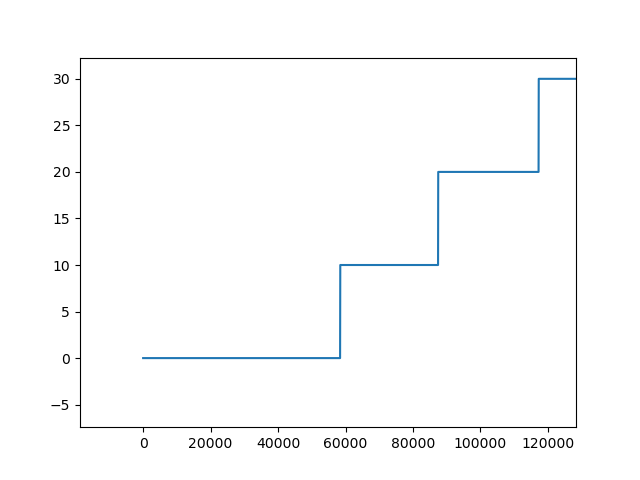

In [15]:
plt.plot(data[data['tac_id']==0]['tpulse'])